#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=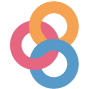)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu'est-ce qu'une API ?  

## Définition

Pour expliquer le principe d'une API, je vais reprendre le début de 
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
> 
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> * Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> * Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> * Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> * Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

L'utilisation accrue d'API dans le cadre de stratégies open-data est l'un
des piliers des 15 feuilles de route ministérielles
en matière d’ouverture, de circulation et de valorisation des données publiques.

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
> 
> * soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> * soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c'est-à-dire un 
compte utilisateur afin de pouvoir accéder aux données. 
Dans un premier temps, 
nous regarderons exclusivement les API ouvertes sans restriction d'accès.  
Certains exercices et exemples permettront néanmoins d'essayer des API
avec restrictions d'accès. 

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
> 
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API. 
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j'emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

* Le __point d’entrée__ d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
l'URL à utiliser pour obtenir des informations sur un produit particulier (l'identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
* Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation. 
* Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).

Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d'excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l'URL de 
requête pour faciliter le travail sur les données Insee. 

## Exemple avec l'API de la Banque Mondiale

Avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1. Le point d'entrée est l'URL <http://api.worldbank.org/v2>
2. Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
que celles telles que `incomeLevel=LMC` (*"Lower middle income"*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

Avec l'API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est *en apparence* joué.


In [ ]:
import requests
req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')
req

```
## <Response [200]>
```

Prenons par exemple les 1000 premiers caractères du résultat:


In [ ]:
print(req.content[:1000])

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?>\r\n<wb:countries page="1" pages="2" per_page="50" total="55" xmlns:wb="http://www.worldbank.org">\r\n  <wb:country id="AGO">\r\n    <wb:iso2Code>AO</wb:iso2Code>\r\n    <wb:name>Angola</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Luanda</wb:capitalCity>\r\n    <wb:longitude>13.242</wb:longitude>\r\n    <wb:latitude>-8.81155</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BEN">\r\n    <wb:iso2Code>BJ</wb:iso2Code>\r\n    <wb:name>Benin</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="'

Quand on regarde de plus près, on voit que les informations suivantes apparaissent: 
 
* Code du pays
* Nom du pays
* Région
* Classification en termes de revenus
* Les types de prêt pour ces pays
* La capitale
* Longitude
* Latitude

Le format XML est fortement balisé, ce qui n'est pas très pratique. 
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json


In [ ]:
import requests
import pandas as pd

req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')

A nouveau, les premiers caractères sont les suivants:


In [ ]:
print(req.content[:1000])

b'[{"page":1,"pages":2,"per_page":"50","total":55},[{"id":"AGO","iso2Code":"AO","name":"Angola","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Luanda","longitude":"13.242","latitude":"-8.81155"},{"id":"BEN","iso2Code":"BJ","name":"Benin","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Porto-Novo","longitude":"2.6323","latitude":"6.4779"},{"id":"BGD","iso2Code":"BD","name":"Bangladesh","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2'

Cela ressemble déjà plus à un dictionnaire `Python`[^1].

[^1]: Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il 
s'agit d'un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

Ici, il n'est même pas nécessaire en première approche 
d'utiliser le package `json`, l'information
étant déjà tabulée dans l'écho renvoyé (on a la même information pour tous les pays):


In [ ]:
wb = req.json()
wb = pd.json_normalize(wb[1])
wb.head(5)

```
##     id iso2Code  ... lendingType.iso2code lendingType.value
## 0  AGO       AO  ...                   XF              IBRD
## 1  BEN       BJ  ...                   XI               IDA
## 2  BGD       BD  ...                   XI               IDA
## 3  BLZ       BZ  ...                   XF              IBRD
## 4  BOL       BO  ...                   XF              IBRD
## 
## [5 rows x 18 columns]
```

Cependant, si on regarde la dimension de l'objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l'API nous apprendrait que c'est le nombre maximal de 
retour possible. Il faut donc faire attention à la documentation et 
ajouter un paramètre `page=2` pour rattraper les derniers échos: 


In [ ]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2])

```
##      id iso2Code  ... lendingType.iso2code lendingType.value
## 0   AGO       AO  ...                   XF              IBRD
## 1   BEN       BJ  ...                   XI               IDA
## 2   BGD       BD  ...                   XI               IDA
## 3   BLZ       BZ  ...                   XF              IBRD
## 4   BOL       BO  ...                   XF              IBRD
## 5   BTN       BT  ...                   XI               IDA
## 6   CIV       CI  ...                   XI               IDA
## 7   CMR       CM  ...                   XH             Blend
## 8   COG       CG  ...                   XH             Blend
## 9   COM       KM  ...                   XI               IDA
## 10  CPV       CV  ...                   XH             Blend
## 11  DJI       DJ  ...                   XI               IDA
## 12  DZA       DZ  ...                   XF              IBRD
## 13  EGY       EG  ...                   XF              IBRD
## 14  FSM       FM  ...                   XI               IDA
## 15  GHA       GH  ...                   XI               IDA
## 16  HND       HN  ...                   XI               IDA
## 17  HTI       HT  ...                   XI               IDA
## 18  IDN       ID  ...                   XF              IBRD
## 19  IND       IN  ...                   XF              IBRD
## 20  IRN       IR  ...                   XF              IBRD
## 21  KEN       KE  ...                   XH             Blend
## 22  KGZ       KG  ...                   XI               IDA
## 23  KHM       KH  ...                   XI               IDA
## 24  KIR       KI  ...                   XI               IDA
## 25  LAO       LA  ...                   XI               IDA
## 26  LKA       LK  ...                   XF              IBRD
## 27  LSO       LS  ...                   XI               IDA
## 28  MAR       MA  ...                   XF              IBRD
## 29  MMR       MM  ...                   XI               IDA
## 30  MNG       MN  ...                   XF              IBRD
## 31  MRT       MR  ...                   XI               IDA
## 32  NGA       NG  ...                   XH             Blend
## 33  NIC       NI  ...                   XI               IDA
## 34  NPL       NP  ...                   XI               IDA
## 35  PAK       PK  ...                   XH             Blend
## 36  PHL       PH  ...                   XF              IBRD
## 37  PNG       PG  ...                   XH             Blend
## 38  PSE       PS  ...                   XX    Not classified
## 39  SEN       SN  ...                   XI               IDA
## 40  SLB       SB  ...                   XI               IDA
## 41  SLV       SV  ...                   XF              IBRD
## 42  STP       ST  ...                   XI               IDA
## 43  SWZ       SZ  ...                   XF              IBRD
## 44  TJK       TJ  ...                   XI               IDA
## 45  TLS       TL  ...                   XH             Blend
## 46  TUN       TN  ...                   XF              IBRD
## 47  TZA       TZ  ...                   XI               IDA
## 48  UKR       UA  ...                   XF              IBRD
## 49  UZB       UZ  ...                   XH             Blend
## 0   VNM       VN  ...                   XF              IBRD
## 1   VUT       VU  ...                   XI               IDA
## 2   WSM       WS  ...                   XI               IDA
## 3   ZMB       ZM  ...                   XI               IDA
## 4   ZWE       ZW  ...                   XH             Blend
## 
## [55 rows x 18 columns]
```

Si on regarde l'information présente dans le DataFrame, on voit qu'elle se
présente sous forme `lendingType.value`. C'est parce que `pandas` a 
concaténé les différents niveaux de notre dictionnaire. Si on désire
s'en assurer, on peut regarder sur un exemple:


In [ ]:
req.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

```
## True
```

## Un catalogue incomplet d'API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-unes très connues : 

- Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
- Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
- Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
- Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci dont les 
données ne sont pas toujours les plus intéressantes. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition 
leurs données sous forme d'API

- [API gouv](https://api.gouv.fr/): beaucoup d'API officielles de l'Etat français 
et accès à de la documentation
- Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589

# L'API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages...) réalisées durant les 5 dernières années

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre
carré d'un quartier ou de comparer des régions entre elles. 
L'API DVF permet d'aller plus loin afin de récupérer les résultats dans 
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)


:one: 
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées. 


In [ ]:
# Question 1
data_immo = requests.get("http://api.cquest.org/dvf?code_commune=29168").json()
data_immo.keys()

```
## dict_keys(['source', 'derniere_maj', 'licence', 'nb_resultats', 'resultats'])
```

In [ ]:
ventes = pd.json_normalize(data_immo["resultats"])

:two: 
N'afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:


In [ ]:
# Question 2
maisons = requests.get("http://api.cquest.org/dvf?code_commune=29168&type_local=Maison").json()
pd.json_normalize(maisons["resultats"])

```
##     code_service_ch reference_document  ... geom.type        geom.coordinates
## 0              None               None  ...     Point  [-4.705626, 48.042047]
## 1              None               None  ...     Point  [-4.709215, 48.038356]
## 2              None               None  ...     Point  [-4.709152, 48.038782]
## 3              None               None  ...     Point  [-4.708496, 48.038467]
## 4              None               None  ...     Point  [-4.708192, 48.038626]
## ..              ...                ...  ...       ...                     ...
## 129            None               None  ...     Point   [-4.70207, 48.039692]
## 130            None               None  ...     Point   [-4.699823, 48.03942]
## 131            None               None  ...     Point  [-4.700808, 48.038956]
## 132            None               None  ...     Point  [-4.700004, 48.037184]
## 133            None               None  ...     Point  [-4.712316, 48.037312]
## 
## [134 rows x 47 columns]
```

:three: Utiliser l'[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff


In [ ]:
import geopandas as gpd
plgf = gpd.read_file("https://geo.api.gouv.fr/communes/29168?fields=nom,code,codesPostaux,codeDepartement,codeRegion,population&format=geojson&geometry=contour")

:four:
Représenter l'histogramme des prix de vente


In [ ]:
p = ventes["valeur_fonciere"].plot(kind = "hist")
p

N'hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five: 
On va faire une carte des ventes en affichant le prix de l'achat.

Supposons que le DataFrame des ventes s'appelle `ventes`. Il faut d'abord le
convertir
en objet `geopandas`. 


In [ ]:
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes

```
##     code_service_ch reference_document  ... geom                   geometry
## 0              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 1              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 2              None               None  ...  NaN  POINT (-4.70949 48.04230)
## 3              None               None  ...  NaN  POINT (-4.70696 48.04313)
## 4              None               None  ...  NaN  POINT (-4.70555 48.04223)
## ..              ...                ...  ...  ...                        ...
## 434            None               None  ...  NaN  POINT (-4.71243 48.03708)
## 435            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 436            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 437            None               None  ...  NaN  POINT (-4.71186 48.03727)
## 438            None               None  ...  NaN  POINT (-4.71601 48.03396)
## 
## [431 rows x 49 columns]
```

Avant de faire une carte, on va convertir 
les limites de la commune de Plogoff en geoJSON pour faciliter 
sa représentation avec `folium`
([voir la doc `geopandas` à ce propos](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):


In [ ]:
geo_j = plgf.to_json()

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l'exécuter). 


In [ ]:
import folium
import numpy as np

ventes['map_color'] = pd.qcut(ventes['valeur_fonciere'], [0,0.8,1], labels = ['lightblue','red'])
ventes['icon'] = np.where(ventes['type_local']== 'Maison', "home", "")
ventes['num_voie_clean'] = np.where(ventes['numero_voie'].isnull(), "", ventes['numero_voie'])
ventes['text'] = ventes.apply(lambda s: "Adresse: {num} {voie} <br>Vente en {annee} <br>Prix {prix:.0f} €".format(
                        num = s['num_voie_clean'],
                        voie = s["voie"],
                        annee = s['date_mutation'].split("-")[0],
                        prix = s["valeur_fonciere"]),
             axis=1)
             
center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']],
                  popup=ventes.iloc[i]['text'],
                  icon=folium.Icon(color=ventes.iloc[i]['map_color'], icon=ventes.iloc[i]['icon'])).add_to(m)

In [ ]:
m.fit_bounds([sw, ne])

In [ ]:
# Afficher la carte
m

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_14c8260a24d249fcbd7ae8a243d1d128%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_14c8260a24d249fcbd7ae8a243d1d128%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_14c8260a24d249fcbd7ae8a243d1d128%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_14c8260a24d249fcbd7ae8a243d1d128%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B48.03477472157772%2C%20-4.671743032482598%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20preferCanvas%3A%20false%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20tile_layer_e4f7bc416825499fb20ed927897adb13%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22https%3A//stamen-tiles-%7Bs%7D.a.ssl.fastly.net/toner/%7Bz%7D/%7Bx%7D/%7By%7D.png%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22attribution%22%3A%20%22Map%20tiles%20by%20%5Cu003ca%20href%3D%5C%22http%3A//stamen.com%5C%22%5Cu003eStamen%20Design%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//creativecommons.org/licenses/by/3.0%5C%22%5Cu003eCC%20BY%203.0%5Cu003c/a%5Cu003e.%20Data%20by%20%5Cu0026copy%3B%20%5Cu003ca%20href%3D%5C%22http%3A//openstreetmap.org%5C%22%5Cu003eOpenStreetMap%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//www.openstreetmap.org/copyright%5C%22%5Cu003eODbL%5Cu003c/a%5Cu003e.%22%2C%20%22detectRetina%22%3A%20false%2C%20%22maxNativeZoom%22%3A%2018%2C%20%22maxZoom%22%3A%2018%2C%20%22minZoom%22%3A%200%2C%20%22noWrap%22%3A%20false%2C%20%22opacity%22%3A%201%2C%20%22subdomains%22%3A%20%22abc%22%2C%20%22tms%22%3A%20false%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca697f2c5e284db1865189a5963cde74%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0bfab01a3668406cb96274493c41a9e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca697f2c5e284db1865189a5963cde74.setIcon%28icon_0bfab01a3668406cb96274493c41a9e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_482c488a7c90454b9c311b82422a5a64%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4ea5b76da4e442af862e066eab0affeb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4ea5b76da4e442af862e066eab0affeb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20176000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_482c488a7c90454b9c311b82422a5a64.setContent%28html_4ea5b76da4e442af862e066eab0affeb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca697f2c5e284db1865189a5963cde74.bindPopup%28popup_482c488a7c90454b9c311b82422a5a64%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38474bdfcf1f4136af36b5a511e38f2a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d765a3a6030e4eb1a45c2ee64f939fe6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38474bdfcf1f4136af36b5a511e38f2a.setIcon%28icon_d765a3a6030e4eb1a45c2ee64f939fe6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5d5b3f9e3e8f4abfaab9495c23ce9c17%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9335ba439c674168b486bd8091e67e3d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9335ba439c674168b486bd8091e67e3d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5d5b3f9e3e8f4abfaab9495c23ce9c17.setContent%28html_9335ba439c674168b486bd8091e67e3d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38474bdfcf1f4136af36b5a511e38f2a.bindPopup%28popup_5d5b3f9e3e8f4abfaab9495c23ce9c17%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c17ee745e9c945a299bf17998e067fb7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042296%2C%20-4.709488%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_546e928e50f3472dbff9885e00b9a734%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c17ee745e9c945a299bf17998e067fb7.setIcon%28icon_546e928e50f3472dbff9885e00b9a734%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_881fe5ce010c4d49ada8ae7446f3fda7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae97e9b8726245a399385c100d6b56b5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae97e9b8726245a399385c100d6b56b5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_881fe5ce010c4d49ada8ae7446f3fda7.setContent%28html_ae97e9b8726245a399385c100d6b56b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c17ee745e9c945a299bf17998e067fb7.bindPopup%28popup_881fe5ce010c4d49ada8ae7446f3fda7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ce6aa5d99f914bcba6a72a6a8d02e925%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.043125%2C%20-4.706963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d9a175b902e442e5bd27d4c5cfc6a813%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ce6aa5d99f914bcba6a72a6a8d02e925.setIcon%28icon_d9a175b902e442e5bd27d4c5cfc6a813%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5530f6c215b94520b441ec9fa4f40368%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c17f8ef51cb84e8b8a95e485870cf837%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c17f8ef51cb84e8b8a95e485870cf837%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5530f6c215b94520b441ec9fa4f40368.setContent%28html_c17f8ef51cb84e8b8a95e485870cf837%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ce6aa5d99f914bcba6a72a6a8d02e925.bindPopup%28popup_5530f6c215b94520b441ec9fa4f40368%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1f4d62909e2b4122b3d64b9795688a0e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042232%2C%20-4.705553%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c40cdb902bbb4bf6a3d6d2a65d1ceb6a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1f4d62909e2b4122b3d64b9795688a0e.setIcon%28icon_c40cdb902bbb4bf6a3d6d2a65d1ceb6a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_09a04c19ed9a45b3b7d9590eb9fe52ac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_29cb5d379147453e93fe7fe1cd9a830a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_29cb5d379147453e93fe7fe1cd9a830a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_09a04c19ed9a45b3b7d9590eb9fe52ac.setContent%28html_29cb5d379147453e93fe7fe1cd9a830a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1f4d62909e2b4122b3d64b9795688a0e.bindPopup%28popup_09a04c19ed9a45b3b7d9590eb9fe52ac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4065ec25b49c44d4aced002d983fe1f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042047%2C%20-4.705626%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c96921b6e55142febf601c0ada2dd163%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4065ec25b49c44d4aced002d983fe1f6.setIcon%28icon_c96921b6e55142febf601c0ada2dd163%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c0c9a551ab0544278d4eafb512633f2f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_39c14bf00ae24489bb6141684fa1eec5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_39c14bf00ae24489bb6141684fa1eec5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c0c9a551ab0544278d4eafb512633f2f.setContent%28html_39c14bf00ae24489bb6141684fa1eec5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4065ec25b49c44d4aced002d983fe1f6.bindPopup%28popup_c0c9a551ab0544278d4eafb512633f2f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c6e06f57aae34d20b3555ede0716f5b1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038236%2C%20-4.709329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d83f7a383998485390f1c104df1ab409%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c6e06f57aae34d20b3555ede0716f5b1.setIcon%28icon_d83f7a383998485390f1c104df1ab409%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c88de934d7834cf589ca06b1c246b173%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_49f1883bb1e6415a8151fad3df622f0b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_49f1883bb1e6415a8151fad3df622f0b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c88de934d7834cf589ca06b1c246b173.setContent%28html_49f1883bb1e6415a8151fad3df622f0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c6e06f57aae34d20b3555ede0716f5b1.bindPopup%28popup_c88de934d7834cf589ca06b1c246b173%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a6772087dba24661804707f954f479f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038356%2C%20-4.709215%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dfe4218b5933427fa0b595176ab51b2c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a6772087dba24661804707f954f479f0.setIcon%28icon_dfe4218b5933427fa0b595176ab51b2c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e5b0dcf21b274fd2b9a63c880248488c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_28f32c49ddd14bdead9389f26fa31048%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_28f32c49ddd14bdead9389f26fa31048%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20220%20KREIZ%20AN%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e5b0dcf21b274fd2b9a63c880248488c.setContent%28html_28f32c49ddd14bdead9389f26fa31048%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a6772087dba24661804707f954f479f0.bindPopup%28popup_e5b0dcf21b274fd2b9a63c880248488c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5432e9414e664c74bedfbc4dc830bddf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039437%2C%20-4.710305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6ef78b2a7b144afbbf674ebcc3ec9ae2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5432e9414e664c74bedfbc4dc830bddf.setIcon%28icon_6ef78b2a7b144afbbf674ebcc3ec9ae2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ff6722333a904c34b389767af13d0640%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_313346f8fd514eceb0a052319d481e75%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_313346f8fd514eceb0a052319d481e75%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ff6722333a904c34b389767af13d0640.setContent%28html_313346f8fd514eceb0a052319d481e75%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5432e9414e664c74bedfbc4dc830bddf.bindPopup%28popup_ff6722333a904c34b389767af13d0640%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c66a5a4119c64cd287f57d3de210d157%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038782%2C%20-4.709152%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c03800256cc348bca30960b23c13c7e8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c66a5a4119c64cd287f57d3de210d157.setIcon%28icon_c03800256cc348bca30960b23c13c7e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_88353194b98943bda4fdacf68485981d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_85bb8623dd4d4e57b5a2adec90008ff6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_85bb8623dd4d4e57b5a2adec90008ff6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20215%20AR%20VEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_88353194b98943bda4fdacf68485981d.setContent%28html_85bb8623dd4d4e57b5a2adec90008ff6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c66a5a4119c64cd287f57d3de210d157.bindPopup%28popup_88353194b98943bda4fdacf68485981d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_acd7c0c877ce4481a787339730347305%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038442%2C%20-4.709021%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8efdae9e0acd4a1ca79cd944c48d8563%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_acd7c0c877ce4481a787339730347305.setIcon%28icon_8efdae9e0acd4a1ca79cd944c48d8563%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_21f2df47926d495b84f6525587466510%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f8eed4b24c1d4f9b8fb13d89ca7a4e5b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f8eed4b24c1d4f9b8fb13d89ca7a4e5b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_21f2df47926d495b84f6525587466510.setContent%28html_f8eed4b24c1d4f9b8fb13d89ca7a4e5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_acd7c0c877ce4481a787339730347305.bindPopup%28popup_21f2df47926d495b84f6525587466510%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bf3bec6619054b04bfe68f2ddd0ddd94%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038467%2C%20-4.708496%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1cab4350f1444385bb7bf4edbdb3c4e0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bf3bec6619054b04bfe68f2ddd0ddd94.setIcon%28icon_1cab4350f1444385bb7bf4edbdb3c4e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_48a66d21a98f43aeb23c6d2756347213%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_31e7edc6a517457990bdce6fef95a00d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_31e7edc6a517457990bdce6fef95a00d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20208%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_48a66d21a98f43aeb23c6d2756347213.setContent%28html_31e7edc6a517457990bdce6fef95a00d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bf3bec6619054b04bfe68f2ddd0ddd94.bindPopup%28popup_48a66d21a98f43aeb23c6d2756347213%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd5f195836614004b815c6e1ef60664f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038626%2C%20-4.708192%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_39070fec64a340b8859d4509ef8b8671%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd5f195836614004b815c6e1ef60664f.setIcon%28icon_39070fec64a340b8859d4509ef8b8671%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_523e1b1581fe4a89ab0fcc5f5e7f8aad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93074638d9084801aa88153cd7dfee1c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93074638d9084801aa88153cd7dfee1c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20206%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_523e1b1581fe4a89ab0fcc5f5e7f8aad.setContent%28html_93074638d9084801aa88153cd7dfee1c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd5f195836614004b815c6e1ef60664f.bindPopup%28popup_523e1b1581fe4a89ab0fcc5f5e7f8aad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b205712a782d4ab68faa655d918cb292%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03872%2C%20-4.707889%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5e9536f112994f178845ebb9d069db88%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b205712a782d4ab68faa655d918cb292.setIcon%28icon_5e9536f112994f178845ebb9d069db88%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d834477713e34a5fbf58591b97e3f02a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b85de71fff1c4808b04484505e247aa0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b85de71fff1c4808b04484505e247aa0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d834477713e34a5fbf58591b97e3f02a.setContent%28html_b85de71fff1c4808b04484505e247aa0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b205712a782d4ab68faa655d918cb292.bindPopup%28popup_d834477713e34a5fbf58591b97e3f02a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_51d01dda38164b9180b500e8d133122c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039763%2C%20-4.706615%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a60b9c49cdaa4af7925f9a1e0b1fb0d4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_51d01dda38164b9180b500e8d133122c.setIcon%28icon_a60b9c49cdaa4af7925f9a1e0b1fb0d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c84b154e29d043288de934650bd7ed2a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e591b79bec8c499db9b8f56be83413bb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e591b79bec8c499db9b8f56be83413bb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2010000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c84b154e29d043288de934650bd7ed2a.setContent%28html_e591b79bec8c499db9b8f56be83413bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_51d01dda38164b9180b500e8d133122c.bindPopup%28popup_c84b154e29d043288de934650bd7ed2a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6fb3b75346374bab96c4d77b066cbae4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039617%2C%20-4.706066%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f8fbf52853fd4922a87aa2c1384e0f0f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6fb3b75346374bab96c4d77b066cbae4.setIcon%28icon_f8fbf52853fd4922a87aa2c1384e0f0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0279644ecc64da9bcd4a73e793d6db4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_47764a27e55048daa9e36244b0b1fbcc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_47764a27e55048daa9e36244b0b1fbcc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20198%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0279644ecc64da9bcd4a73e793d6db4.setContent%28html_47764a27e55048daa9e36244b0b1fbcc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6fb3b75346374bab96c4d77b066cbae4.bindPopup%28popup_d0279644ecc64da9bcd4a73e793d6db4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4bec4c3547614bc98b5b92feb2d9240c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bb21a689520349fea49abf8141aa22a9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4bec4c3547614bc98b5b92feb2d9240c.setIcon%28icon_bb21a689520349fea49abf8141aa22a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6888be7d147b4d24ad8d7c2b481e54c0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46dc488003bc4c378d5388b76031a2bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46dc488003bc4c378d5388b76031a2bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6888be7d147b4d24ad8d7c2b481e54c0.setContent%28html_46dc488003bc4c378d5388b76031a2bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4bec4c3547614bc98b5b92feb2d9240c.bindPopup%28popup_6888be7d147b4d24ad8d7c2b481e54c0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1c0d349e269e47cf85f76f8cbd8f3456%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_733d816688514f8086a96f3b5c6c90f3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1c0d349e269e47cf85f76f8cbd8f3456.setIcon%28icon_733d816688514f8086a96f3b5c6c90f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_88fd2626f80e4b31836303bee51c2cd8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_785cce8797934702b56a34fa6fde0edf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_785cce8797934702b56a34fa6fde0edf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_88fd2626f80e4b31836303bee51c2cd8.setContent%28html_785cce8797934702b56a34fa6fde0edf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1c0d349e269e47cf85f76f8cbd8f3456.bindPopup%28popup_88fd2626f80e4b31836303bee51c2cd8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3751d56ea2b247e281c30f39f4e1417f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039561%2C%20-4.705858%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3b916f3596844634b438970c2cc06bee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3751d56ea2b247e281c30f39f4e1417f.setIcon%28icon_3b916f3596844634b438970c2cc06bee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0a7e709e7e2d4d9aadb5131e1d8fb312%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a072a5252e434fa0ae1e7272201de413%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a072a5252e434fa0ae1e7272201de413%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20197%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0a7e709e7e2d4d9aadb5131e1d8fb312.setContent%28html_a072a5252e434fa0ae1e7272201de413%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3751d56ea2b247e281c30f39f4e1417f.bindPopup%28popup_0a7e709e7e2d4d9aadb5131e1d8fb312%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4fc564314f6b4f02b334e5740d91fbb9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039599%2C%20-4.70426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e0e667aa522241dcb54d62b4a724916a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4fc564314f6b4f02b334e5740d91fbb9.setIcon%28icon_e0e667aa522241dcb54d62b4a724916a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_47c8a885e9eb449e9a1a595f2025a15f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b857b13dbfdd4fceb39bb15ac41dabdd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b857b13dbfdd4fceb39bb15ac41dabdd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20236%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2027500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_47c8a885e9eb449e9a1a595f2025a15f.setContent%28html_b857b13dbfdd4fceb39bb15ac41dabdd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4fc564314f6b4f02b334e5740d91fbb9.bindPopup%28popup_47c8a885e9eb449e9a1a595f2025a15f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7bf79d4df88a4c319979377ef8fe3837%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039585%2C%20-4.704422%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7a017a03ea6f4be08ea103ec663f8718%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7bf79d4df88a4c319979377ef8fe3837.setIcon%28icon_7a017a03ea6f4be08ea103ec663f8718%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b00ad600f4b46bea102cb1251de1ee3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad4c5ad61b644a039ede2e4690635a9f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad4c5ad61b644a039ede2e4690635a9f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20235%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b00ad600f4b46bea102cb1251de1ee3.setContent%28html_ad4c5ad61b644a039ede2e4690635a9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7bf79d4df88a4c319979377ef8fe3837.bindPopup%28popup_1b00ad600f4b46bea102cb1251de1ee3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_562548cf28ed406a8446743450b6ca14%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039474%2C%20-4.704727%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb736ce7f51044c1a5919469423e27db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_562548cf28ed406a8446743450b6ca14.setIcon%28icon_cb736ce7f51044c1a5919469423e27db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cf30b21355184187bfc5507b4b09e022%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7010eaa6d154430d968c268a88df076f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7010eaa6d154430d968c268a88df076f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20234%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cf30b21355184187bfc5507b4b09e022.setContent%28html_7010eaa6d154430d968c268a88df076f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_562548cf28ed406a8446743450b6ca14.bindPopup%28popup_cf30b21355184187bfc5507b4b09e022%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c642af7ac45d44d087b5bf0a7fc0e83c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036863%2C%20-4.709276%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a86c43743c034fb2ae2aec4b9d62322c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c642af7ac45d44d087b5bf0a7fc0e83c.setIcon%28icon_a86c43743c034fb2ae2aec4b9d62322c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4eee7cbd1e854f2eafc7e42c8c3a5310%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be4554eafb6644989d7a77d4b1be13c5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be4554eafb6644989d7a77d4b1be13c5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4eee7cbd1e854f2eafc7e42c8c3a5310.setContent%28html_be4554eafb6644989d7a77d4b1be13c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c642af7ac45d44d087b5bf0a7fc0e83c.bindPopup%28popup_4eee7cbd1e854f2eafc7e42c8c3a5310%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_569821eaccf64f3f95b799b288a4eeb0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036781%2C%20-4.709462%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e28064b8ef6489485ddd4396e283ef5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_569821eaccf64f3f95b799b288a4eeb0.setIcon%28icon_3e28064b8ef6489485ddd4396e283ef5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_85392f6f327547e28a47ea339a480ee3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7091fe978d4f4765a282299b12d8cd89%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7091fe978d4f4765a282299b12d8cd89%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_85392f6f327547e28a47ea339a480ee3.setContent%28html_7091fe978d4f4765a282299b12d8cd89%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_569821eaccf64f3f95b799b288a4eeb0.bindPopup%28popup_85392f6f327547e28a47ea339a480ee3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dbabe8d679b44115aa40ba3eda26562b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036899%2C%20-4.709473%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aafb6e70a3554bafa938006ccdfc38fa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dbabe8d679b44115aa40ba3eda26562b.setIcon%28icon_aafb6e70a3554bafa938006ccdfc38fa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f7b5e715edad45f6986072b42f7e712a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_549121414ad64ec6b6ebd29ca9ecd2df%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_549121414ad64ec6b6ebd29ca9ecd2df%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20278%20DU%20SOLDAT%20DUVAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f7b5e715edad45f6986072b42f7e712a.setContent%28html_549121414ad64ec6b6ebd29ca9ecd2df%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dbabe8d679b44115aa40ba3eda26562b.bindPopup%28popup_f7b5e715edad45f6986072b42f7e712a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f9df116cb99b44c883a2ff28b6c7cf15%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038238%2C%20-4.707333%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f68401ef7841405da26c82e312d76ec0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f9df116cb99b44c883a2ff28b6c7cf15.setIcon%28icon_f68401ef7841405da26c82e312d76ec0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_37001677e6fb440e87db347a0d20ee8c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_67e05e35ac054bc1873b7b7a1b0e4f6f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_67e05e35ac054bc1873b7b7a1b0e4f6f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20268%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_37001677e6fb440e87db347a0d20ee8c.setContent%28html_67e05e35ac054bc1873b7b7a1b0e4f6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f9df116cb99b44c883a2ff28b6c7cf15.bindPopup%28popup_37001677e6fb440e87db347a0d20ee8c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ae2d298cb00d4c31808c70b10c854407%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038774%2C%20-4.708101%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_58a4ee71d4ed4123a5957ab9701acb4f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ae2d298cb00d4c31808c70b10c854407.setIcon%28icon_58a4ee71d4ed4123a5957ab9701acb4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf1cb6729b0a442297c6b5d16d3bb24f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f20088a4eb88418aa6babf02a778467e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f20088a4eb88418aa6babf02a778467e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf1cb6729b0a442297c6b5d16d3bb24f.setContent%28html_f20088a4eb88418aa6babf02a778467e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ae2d298cb00d4c31808c70b10c854407.bindPopup%28popup_bf1cb6729b0a442297c6b5d16d3bb24f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d6c8e6e7436742698d7a5c5bee0da89c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039593%2C%20-4.703711%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_46aeb7bce3114b3abc70e1d6fa692e06%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d6c8e6e7436742698d7a5c5bee0da89c.setIcon%28icon_46aeb7bce3114b3abc70e1d6fa692e06%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_21711e0276ea4f43b9aa89a6d1e44ba6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f1100f81e83148df82c706c51763e42d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f1100f81e83148df82c706c51763e42d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_21711e0276ea4f43b9aa89a6d1e44ba6.setContent%28html_f1100f81e83148df82c706c51763e42d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d6c8e6e7436742698d7a5c5bee0da89c.bindPopup%28popup_21711e0276ea4f43b9aa89a6d1e44ba6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9aa6b2ad14574d6fbc7981d5acb0cb3d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039118%2C%20-4.709662%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_610291143e0842f2941e5cf9c171d184%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9aa6b2ad14574d6fbc7981d5acb0cb3d.setIcon%28icon_610291143e0842f2941e5cf9c171d184%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bbfa0e90587a447c9598ccf004da5339%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_70fcdb015ad44f909a63e4f55df23048%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_70fcdb015ad44f909a63e4f55df23048%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201268%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bbfa0e90587a447c9598ccf004da5339.setContent%28html_70fcdb015ad44f909a63e4f55df23048%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9aa6b2ad14574d6fbc7981d5acb0cb3d.bindPopup%28popup_bbfa0e90587a447c9598ccf004da5339%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bd74623e34a34bfa8c2ae51059d50619%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039244%2C%20-4.709273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d67c5f204f11462b95319bb0e8c4bdd9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bd74623e34a34bfa8c2ae51059d50619.setIcon%28icon_d67c5f204f11462b95319bb0e8c4bdd9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ba5e6e16502e4a7aa11c99ff2b2862f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a61e001f538045b8a77cb1aa7dbc9b4d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a61e001f538045b8a77cb1aa7dbc9b4d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201238%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ba5e6e16502e4a7aa11c99ff2b2862f0.setContent%28html_a61e001f538045b8a77cb1aa7dbc9b4d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bd74623e34a34bfa8c2ae51059d50619.bindPopup%28popup_ba5e6e16502e4a7aa11c99ff2b2862f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c6ef0f6231ff4fcb82851fa866d29f38%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04302%2C%20-4.702863%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0ace08a88ae64b0ea8847ecb83c620c9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c6ef0f6231ff4fcb82851fa866d29f38.setIcon%28icon_0ace08a88ae64b0ea8847ecb83c620c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81d1c44b28294f7ea97eaadc0bbba148%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f7db185dbe9448e1bd0fded84f25be40%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f7db185dbe9448e1bd0fded84f25be40%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2084%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81d1c44b28294f7ea97eaadc0bbba148.setContent%28html_f7db185dbe9448e1bd0fded84f25be40%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c6ef0f6231ff4fcb82851fa866d29f38.bindPopup%28popup_81d1c44b28294f7ea97eaadc0bbba148%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a536e1a783334890afd2674beeb6c3af%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041793%2C%20-4.705125%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6e9ad4787a694016a62e4955772750bc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a536e1a783334890afd2674beeb6c3af.setIcon%28icon_6e9ad4787a694016a62e4955772750bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_87db1ecdf69b425f805a87b92c56d26c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6421628308684228ad287609c7217650%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6421628308684228ad287609c7217650%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20291%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_87db1ecdf69b425f805a87b92c56d26c.setContent%28html_6421628308684228ad287609c7217650%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a536e1a783334890afd2674beeb6c3af.bindPopup%28popup_87db1ecdf69b425f805a87b92c56d26c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a60eda8d5e9e414aaa2dd8da77e7811e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041517%2C%20-4.70501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_35964f760eb54544975eb8f6d84a927d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a60eda8d5e9e414aaa2dd8da77e7811e.setIcon%28icon_35964f760eb54544975eb8f6d84a927d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_783810efd70647aeb908f42e64ab4cf1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74c5e6d5ebbc4f3e8374d5f3255f4a67%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74c5e6d5ebbc4f3e8374d5f3255f4a67%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20213%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_783810efd70647aeb908f42e64ab4cf1.setContent%28html_74c5e6d5ebbc4f3e8374d5f3255f4a67%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a60eda8d5e9e414aaa2dd8da77e7811e.bindPopup%28popup_783810efd70647aeb908f42e64ab4cf1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5cc8bdd907c24246bd7dffbad90d6708%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040483%2C%20-4.697976%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2868e68a403e4bebae679b0d9ae86711%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5cc8bdd907c24246bd7dffbad90d6708.setIcon%28icon_2868e68a403e4bebae679b0d9ae86711%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a9653ff3da644c3585fd665894d7e14f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b722a555c3024c0aa6dde72d18c78ba3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b722a555c3024c0aa6dde72d18c78ba3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a9653ff3da644c3585fd665894d7e14f.setContent%28html_b722a555c3024c0aa6dde72d18c78ba3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5cc8bdd907c24246bd7dffbad90d6708.bindPopup%28popup_a9653ff3da644c3585fd665894d7e14f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8631e46679384660984b8450a6cb2821%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041406%2C%20-4.700591%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d70fc3aa28974e6fade8aa6ed38ce38b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8631e46679384660984b8450a6cb2821.setIcon%28icon_d70fc3aa28974e6fade8aa6ed38ce38b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ee863b069b1e4c65af9abe12d1de1823%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e782cb4fb7f9462eb5971b83560a8b38%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e782cb4fb7f9462eb5971b83560a8b38%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20137%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20125000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ee863b069b1e4c65af9abe12d1de1823.setContent%28html_e782cb4fb7f9462eb5971b83560a8b38%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8631e46679384660984b8450a6cb2821.bindPopup%28popup_ee863b069b1e4c65af9abe12d1de1823%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e3b5e626e464905b8d9d197a78a9604%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041625%2C%20-4.700293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_15bda6dcd43147dc844a548171befef6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e3b5e626e464905b8d9d197a78a9604.setIcon%28icon_15bda6dcd43147dc844a548171befef6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0a38f0ae94b84553ba480a7e32c5532d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_79f31cacaf0f4b2bbe9b66ae46a492e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_79f31cacaf0f4b2bbe9b66ae46a492e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20138%20KERHERNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20178675%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0a38f0ae94b84553ba480a7e32c5532d.setContent%28html_79f31cacaf0f4b2bbe9b66ae46a492e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e3b5e626e464905b8d9d197a78a9604.bindPopup%28popup_0a38f0ae94b84553ba480a7e32c5532d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_15cb3f6c06044937b08ef19b5a7b918c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_66e4d1816e1e43c8ab3588b2dfb9bca7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_15cb3f6c06044937b08ef19b5a7b918c.setIcon%28icon_66e4d1816e1e43c8ab3588b2dfb9bca7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2823723b50d94f03aae4191466d5d0d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be52b1d52ba7427e9c721b7171d1f251%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be52b1d52ba7427e9c721b7171d1f251%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2823723b50d94f03aae4191466d5d0d6.setContent%28html_be52b1d52ba7427e9c721b7171d1f251%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_15cb3f6c06044937b08ef19b5a7b918c.bindPopup%28popup_2823723b50d94f03aae4191466d5d0d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_85a18f7f3d324ddb89ef4e34871d5770%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2ef667a538246a7ba2435627dce1c38%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_85a18f7f3d324ddb89ef4e34871d5770.setIcon%28icon_e2ef667a538246a7ba2435627dce1c38%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2aa8096186214126afd76b671e253e85%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7a11954b31304192b9aa58b76dd478a1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7a11954b31304192b9aa58b76dd478a1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2aa8096186214126afd76b671e253e85.setContent%28html_7a11954b31304192b9aa58b76dd478a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_85a18f7f3d324ddb89ef4e34871d5770.bindPopup%28popup_2aa8096186214126afd76b671e253e85%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01e1740e9f2c4e92bd2276e9598092a1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040302%2C%20-4.703544%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d6a2f2bf5a9f46dc99bb8143e3fb6b36%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01e1740e9f2c4e92bd2276e9598092a1.setIcon%28icon_d6a2f2bf5a9f46dc99bb8143e3fb6b36%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_62bfc340aeb545c6a3539c709e3bd039%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_db57f984eb38482b801619c0e30028a7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_db57f984eb38482b801619c0e30028a7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_62bfc340aeb545c6a3539c709e3bd039.setContent%28html_db57f984eb38482b801619c0e30028a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01e1740e9f2c4e92bd2276e9598092a1.bindPopup%28popup_62bfc340aeb545c6a3539c709e3bd039%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_337eb94f1eee4ac392a1b55d4f9f01bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0401%2C%20-4.703612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f751e9788a64c63b3caad737d5eb5c9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_337eb94f1eee4ac392a1b55d4f9f01bc.setIcon%28icon_6f751e9788a64c63b3caad737d5eb5c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_39f5430053154fe3bf177aad812fe534%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_774b529316ec444facff0fe9f85a5737%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_774b529316ec444facff0fe9f85a5737%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20162%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_39f5430053154fe3bf177aad812fe534.setContent%28html_774b529316ec444facff0fe9f85a5737%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_337eb94f1eee4ac392a1b55d4f9f01bc.bindPopup%28popup_39f5430053154fe3bf177aad812fe534%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6283f863355f4bbfb50c4edea97efad8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04055%2C%20-4.699342%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ce07bb5b03694f5dbc13ba049e24236d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6283f863355f4bbfb50c4edea97efad8.setIcon%28icon_ce07bb5b03694f5dbc13ba049e24236d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a5e402148e1a480ab01620cc7b05f020%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c71810343d2b48dda59e7fe18f560815%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c71810343d2b48dda59e7fe18f560815%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20144%20D%20IROISE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a5e402148e1a480ab01620cc7b05f020.setContent%28html_c71810343d2b48dda59e7fe18f560815%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6283f863355f4bbfb50c4edea97efad8.bindPopup%28popup_a5e402148e1a480ab01620cc7b05f020%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d493b97774a24965883502d0a71b44d8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039907%2C%20-4.703508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b3665cb22eb413ba71e167d20a46ea1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d493b97774a24965883502d0a71b44d8.setIcon%28icon_5b3665cb22eb413ba71e167d20a46ea1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bc20e6c176a4472a8f725d05a3ef1a39%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2cf98e3f5f3d4fcb8f448a3c8dc992f6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2cf98e3f5f3d4fcb8f448a3c8dc992f6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20161%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bc20e6c176a4472a8f725d05a3ef1a39.setContent%28html_2cf98e3f5f3d4fcb8f448a3c8dc992f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d493b97774a24965883502d0a71b44d8.bindPopup%28popup_bc20e6c176a4472a8f725d05a3ef1a39%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bc47eb138ecf4bac82ed1ba677d3b34e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039851%2C%20-4.703561%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_04c0ae605ef54820aea6ef0f7aaf1f26%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bc47eb138ecf4bac82ed1ba677d3b34e.setIcon%28icon_04c0ae605ef54820aea6ef0f7aaf1f26%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c3d4989c00f04a9b965c7f0278ae9b83%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6354a60428f46278eaf6775d84091b9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6354a60428f46278eaf6775d84091b9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c3d4989c00f04a9b965c7f0278ae9b83.setContent%28html_d6354a60428f46278eaf6775d84091b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bc47eb138ecf4bac82ed1ba677d3b34e.bindPopup%28popup_c3d4989c00f04a9b965c7f0278ae9b83%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e88a605956694e4fba391545b7f20c4f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7011432c43cd4e6c94da6b8512f9d865%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e88a605956694e4fba391545b7f20c4f.setIcon%28icon_7011432c43cd4e6c94da6b8512f9d865%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2d16adc2662b45038cd80a4f33f2a80f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_622d1ec5e4524869be7e05bae856b423%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_622d1ec5e4524869be7e05bae856b423%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2d16adc2662b45038cd80a4f33f2a80f.setContent%28html_622d1ec5e4524869be7e05bae856b423%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e88a605956694e4fba391545b7f20c4f.bindPopup%28popup_2d16adc2662b45038cd80a4f33f2a80f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4c3428b0fb44cc9ad2ea843baf84403%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_943d3b7a55204613ac0838bc65fbedac%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4c3428b0fb44cc9ad2ea843baf84403.setIcon%28icon_943d3b7a55204613ac0838bc65fbedac%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8f8c6072ab0645fb8598d709fdee571c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_06db34b81b4041c2b7c5bc17eadbb445%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_06db34b81b4041c2b7c5bc17eadbb445%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8f8c6072ab0645fb8598d709fdee571c.setContent%28html_06db34b81b4041c2b7c5bc17eadbb445%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4c3428b0fb44cc9ad2ea843baf84403.bindPopup%28popup_8f8c6072ab0645fb8598d709fdee571c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e53fbddbfe6142c3a310eb45f3de5098%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041286%2C%20-4.705006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_227047d6b42842d9998da87d18c46268%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e53fbddbfe6142c3a310eb45f3de5098.setIcon%28icon_227047d6b42842d9998da87d18c46268%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_61e55dfb547b4f57bda25b2896a3fcdb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3a72bd00820e41a08d32cc5b3b985298%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3a72bd00820e41a08d32cc5b3b985298%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_61e55dfb547b4f57bda25b2896a3fcdb.setContent%28html_3a72bd00820e41a08d32cc5b3b985298%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e53fbddbfe6142c3a310eb45f3de5098.bindPopup%28popup_61e55dfb547b4f57bda25b2896a3fcdb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7bca179c1fbf48049c8c7b0141254142%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041188%2C%20-4.70479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_171f33b3ff444ee8bb462d979bc44ea3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7bca179c1fbf48049c8c7b0141254142.setIcon%28icon_171f33b3ff444ee8bb462d979bc44ea3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_75f7a459de5046c5ad80711e8a5d6643%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_05a966c0522b4a35bc18ed30d8b8a07e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_05a966c0522b4a35bc18ed30d8b8a07e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_75f7a459de5046c5ad80711e8a5d6643.setContent%28html_05a966c0522b4a35bc18ed30d8b8a07e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7bca179c1fbf48049c8c7b0141254142.bindPopup%28popup_75f7a459de5046c5ad80711e8a5d6643%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e0b25b3cd3f94dfbabb114ded2f17343%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041079%2C%20-4.70486%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7b7bd1392eaa4099bdb2b4d4fdceb79a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e0b25b3cd3f94dfbabb114ded2f17343.setIcon%28icon_7b7bd1392eaa4099bdb2b4d4fdceb79a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd98532df36c4c069ffac87a89d0b27f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_12c1f0f806ad4fe284303c9685faa73b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_12c1f0f806ad4fe284303c9685faa73b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd98532df36c4c069ffac87a89d0b27f.setContent%28html_12c1f0f806ad4fe284303c9685faa73b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e0b25b3cd3f94dfbabb114ded2f17343.bindPopup%28popup_cd98532df36c4c069ffac87a89d0b27f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b6080316c30e43a1b9c61be88be44e97%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041902%2C%20-4.705415%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5204c3d492354a61b0950eee123cc671%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b6080316c30e43a1b9c61be88be44e97.setIcon%28icon_5204c3d492354a61b0950eee123cc671%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_94263327b29c47e0926c24cfd3ddc044%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb7ee8ad6f7144688f2ca71170ad15fc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb7ee8ad6f7144688f2ca71170ad15fc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2050%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_94263327b29c47e0926c24cfd3ddc044.setContent%28html_bb7ee8ad6f7144688f2ca71170ad15fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b6080316c30e43a1b9c61be88be44e97.bindPopup%28popup_94263327b29c47e0926c24cfd3ddc044%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_19fe46942b0d4bf0a4542488683ae8a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040589%2C%20-4.690298%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1032b5ed0a4e4bb89443f02e410ff4eb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_19fe46942b0d4bf0a4542488683ae8a5.setIcon%28icon_1032b5ed0a4e4bb89443f02e410ff4eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_69ff529817034d37a7734f977a500270%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae952f83b4a64f949cc85868cfa0d22f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae952f83b4a64f949cc85868cfa0d22f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_69ff529817034d37a7734f977a500270.setContent%28html_ae952f83b4a64f949cc85868cfa0d22f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_19fe46942b0d4bf0a4542488683ae8a5.bindPopup%28popup_69ff529817034d37a7734f977a500270%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_035216855b284659bb302e19536557f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040075%2C%20-4.69014%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bc9e6cbce6ec47e9a49614fc8f6ea9f4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_035216855b284659bb302e19536557f6.setIcon%28icon_bc9e6cbce6ec47e9a49614fc8f6ea9f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a71302e4fe3d41198d75da61c81c7bcb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f131782f782a4cd39a7f2483bc9620f7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f131782f782a4cd39a7f2483bc9620f7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20110%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a71302e4fe3d41198d75da61c81c7bcb.setContent%28html_f131782f782a4cd39a7f2483bc9620f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_035216855b284659bb302e19536557f6.bindPopup%28popup_a71302e4fe3d41198d75da61c81c7bcb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6664531ad763430d87abcfe92162de8b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041337%2C%20-4.691061%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d7b6936f90146a3b4367ac805248858%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6664531ad763430d87abcfe92162de8b.setIcon%28icon_8d7b6936f90146a3b4367ac805248858%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a8d71b43adc747269dedb2bc70beb162%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4badc3f7a5034f5fad032a2b639ae249%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4badc3f7a5034f5fad032a2b639ae249%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a8d71b43adc747269dedb2bc70beb162.setContent%28html_4badc3f7a5034f5fad032a2b639ae249%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6664531ad763430d87abcfe92162de8b.bindPopup%28popup_a8d71b43adc747269dedb2bc70beb162%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fcaca0bf50a74926976793ce587db07e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040514%2C%20-4.691955%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb7942b7e0b04d45a93b2a66fbba6a8b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fcaca0bf50a74926976793ce587db07e.setIcon%28icon_cb7942b7e0b04d45a93b2a66fbba6a8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10f1cd0e1e244fdc9c541ec3ba3df752%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_80bc344593e9420ebb7db12e4f7c03fe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_80bc344593e9420ebb7db12e4f7c03fe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10f1cd0e1e244fdc9c541ec3ba3df752.setContent%28html_80bc344593e9420ebb7db12e4f7c03fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fcaca0bf50a74926976793ce587db07e.bindPopup%28popup_10f1cd0e1e244fdc9c541ec3ba3df752%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_555e5de54311499493f1ac502719d692%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040574%2C%20-4.691787%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c96e64c6f4a340779476321a80e5b083%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_555e5de54311499493f1ac502719d692.setIcon%28icon_c96e64c6f4a340779476321a80e5b083%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1629c3255a904d58bae16d3e646c842f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7b6898e8eab24694a2d183ee6e2893ca%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7b6898e8eab24694a2d183ee6e2893ca%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1629c3255a904d58bae16d3e646c842f.setContent%28html_7b6898e8eab24694a2d183ee6e2893ca%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_555e5de54311499493f1ac502719d692.bindPopup%28popup_1629c3255a904d58bae16d3e646c842f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c8ea75a2dc8c4c7e81c1b93bae321745%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040049%2C%20-4.690408%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_164d94641c0a42aaa98611b3a315d9c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c8ea75a2dc8c4c7e81c1b93bae321745.setIcon%28icon_164d94641c0a42aaa98611b3a315d9c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3cd55dcb5ff8459eb9ddc21a2fe1caff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_633da998f514429dab34591df87c106f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_633da998f514429dab34591df87c106f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20111%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3cd55dcb5ff8459eb9ddc21a2fe1caff.setContent%28html_633da998f514429dab34591df87c106f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c8ea75a2dc8c4c7e81c1b93bae321745.bindPopup%28popup_3cd55dcb5ff8459eb9ddc21a2fe1caff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f97f6df3003f4036b7b55c593e1b86f3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039988%2C%20-4.683359%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_599be26c547d40088ad40e85439a902a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f97f6df3003f4036b7b55c593e1b86f3.setIcon%28icon_599be26c547d40088ad40e85439a902a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_765634022b38422d9b192a7f61c52d9c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_38e5e0374d9a42b9b749fa555fe50d28%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_38e5e0374d9a42b9b749fa555fe50d28%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2098%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_765634022b38422d9b192a7f61c52d9c.setContent%28html_38e5e0374d9a42b9b749fa555fe50d28%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f97f6df3003f4036b7b55c593e1b86f3.bindPopup%28popup_765634022b38422d9b192a7f61c52d9c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a850d8b1c7a6495e9ce05e16931c85ef%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040099%2C%20-4.68336%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_db20e1b61a30404fa6947e51ce222287%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a850d8b1c7a6495e9ce05e16931c85ef.setIcon%28icon_db20e1b61a30404fa6947e51ce222287%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91c205bdb3074b7b94aef4c8b2d5c2f3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a746d54585e04166955fa4f8bcf94b1b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a746d54585e04166955fa4f8bcf94b1b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91c205bdb3074b7b94aef4c8b2d5c2f3.setContent%28html_a746d54585e04166955fa4f8bcf94b1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a850d8b1c7a6495e9ce05e16931c85ef.bindPopup%28popup_91c205bdb3074b7b94aef4c8b2d5c2f3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6a434cf8a1044fa4bccddf43e9e97eac%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040522%2C%20-4.688371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_17244d9c74374e4da1863e2165f3cf48%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6a434cf8a1044fa4bccddf43e9e97eac.setIcon%28icon_17244d9c74374e4da1863e2165f3cf48%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ec14c5ae893481f87095ed8f734bde7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ea703752766d48b6aa4536c7758eb26c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ea703752766d48b6aa4536c7758eb26c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ec14c5ae893481f87095ed8f734bde7.setContent%28html_ea703752766d48b6aa4536c7758eb26c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6a434cf8a1044fa4bccddf43e9e97eac.bindPopup%28popup_4ec14c5ae893481f87095ed8f734bde7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0997b3519b6742a390240ddcd536c6e4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040618%2C%20-4.68813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21ac5bb307cc407ca07691fc1120011b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0997b3519b6742a390240ddcd536c6e4.setIcon%28icon_21ac5bb307cc407ca07691fc1120011b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4b6a96abf1814ab9aa3472d62fdf5145%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5a49d8615a39400da9cb4cede5c6230d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5a49d8615a39400da9cb4cede5c6230d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4b6a96abf1814ab9aa3472d62fdf5145.setContent%28html_5a49d8615a39400da9cb4cede5c6230d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0997b3519b6742a390240ddcd536c6e4.bindPopup%28popup_4b6a96abf1814ab9aa3472d62fdf5145%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1adbbbdf3f5e4d9ca26c3de8ec9cba1b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040487%2C%20-4.688305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e7b06dab4ff34ba2994df2404e4fb981%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1adbbbdf3f5e4d9ca26c3de8ec9cba1b.setIcon%28icon_e7b06dab4ff34ba2994df2404e4fb981%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_caae86f37a2c42f18d4c53c75fef2e4c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_567a140c9b7f4496be92053702021618%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_567a140c9b7f4496be92053702021618%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20453%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_caae86f37a2c42f18d4c53c75fef2e4c.setContent%28html_567a140c9b7f4496be92053702021618%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1adbbbdf3f5e4d9ca26c3de8ec9cba1b.bindPopup%28popup_caae86f37a2c42f18d4c53c75fef2e4c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5e9d261cd594a549198831ac1539420%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_446880b70b96459699413881841205fa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5e9d261cd594a549198831ac1539420.setIcon%28icon_446880b70b96459699413881841205fa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a28dcf3995a84b0b815054d9a588709f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fca4f0f9bf9f4afdb22d5752ffe5f086%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fca4f0f9bf9f4afdb22d5752ffe5f086%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a28dcf3995a84b0b815054d9a588709f.setContent%28html_fca4f0f9bf9f4afdb22d5752ffe5f086%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5e9d261cd594a549198831ac1539420.bindPopup%28popup_a28dcf3995a84b0b815054d9a588709f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0bdb733060a542d4ae691faedfd8f0dc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a441f1160f6a4aa79ef3bb99cee1822f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0bdb733060a542d4ae691faedfd8f0dc.setIcon%28icon_a441f1160f6a4aa79ef3bb99cee1822f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_89e2ff6474514b22aa67e27ca741d71f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7609cfe4f47a4521816dacea8bd78dc3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7609cfe4f47a4521816dacea8bd78dc3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_89e2ff6474514b22aa67e27ca741d71f.setContent%28html_7609cfe4f47a4521816dacea8bd78dc3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0bdb733060a542d4ae691faedfd8f0dc.bindPopup%28popup_89e2ff6474514b22aa67e27ca741d71f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b5c8aced47914028b7b2d839350c99eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04061%2C%20-4.688259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ca4aca8c8ac4bca8487c6088e6fb11f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b5c8aced47914028b7b2d839350c99eb.setIcon%28icon_7ca4aca8c8ac4bca8487c6088e6fb11f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_18249c3f54e24804a3590b540883f1b2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5088d2f5ea0e452cb15b1b177b59612e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5088d2f5ea0e452cb15b1b177b59612e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_18249c3f54e24804a3590b540883f1b2.setContent%28html_5088d2f5ea0e452cb15b1b177b59612e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b5c8aced47914028b7b2d839350c99eb.bindPopup%28popup_18249c3f54e24804a3590b540883f1b2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_418588eee72742ccb5352e6046ada936%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042198%2C%20-4.6794%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cec2837bd661474986142a0b90de2207%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_418588eee72742ccb5352e6046ada936.setIcon%28icon_cec2837bd661474986142a0b90de2207%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d4c147697e7445e5980b7a9a38601def%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_66c79c3422f34ac6bc084e45abd3b1d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_66c79c3422f34ac6bc084e45abd3b1d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201055%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d4c147697e7445e5980b7a9a38601def.setContent%28html_66c79c3422f34ac6bc084e45abd3b1d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_418588eee72742ccb5352e6046ada936.bindPopup%28popup_d4c147697e7445e5980b7a9a38601def%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d01748be22384cf6a9310f8438809eb8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041142%2C%20-4.681685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3a1af72371145ebbab5d1f7d5cd42f6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d01748be22384cf6a9310f8438809eb8.setIcon%28icon_e3a1af72371145ebbab5d1f7d5cd42f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_452b9ac8255541399ad68a2ed0b0844a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1805ebcee1f644e888eaca9f4527e4fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1805ebcee1f644e888eaca9f4527e4fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_452b9ac8255541399ad68a2ed0b0844a.setContent%28html_1805ebcee1f644e888eaca9f4527e4fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d01748be22384cf6a9310f8438809eb8.bindPopup%28popup_452b9ac8255541399ad68a2ed0b0844a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ab80592bc70b4eb09590e17df13cb612%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041191%2C%20-4.681444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_16735ed194b54c72ae753c3fa801e531%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ab80592bc70b4eb09590e17df13cb612.setIcon%28icon_16735ed194b54c72ae753c3fa801e531%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9452ca3df75b4016abc05c7d0e7c83c2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f14c49c2f69a475f99a9d7e493306050%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f14c49c2f69a475f99a9d7e493306050%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9452ca3df75b4016abc05c7d0e7c83c2.setContent%28html_f14c49c2f69a475f99a9d7e493306050%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ab80592bc70b4eb09590e17df13cb612.bindPopup%28popup_9452ca3df75b4016abc05c7d0e7c83c2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dcf54dbd148b49d8a5c5f6625cd007b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_02e6dafe7cd44205b52662a147ed1847%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dcf54dbd148b49d8a5c5f6625cd007b9.setIcon%28icon_02e6dafe7cd44205b52662a147ed1847%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d8f1057b25dc49cb891c1520dca49dd3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6286051220344f37b22863ba41e4ce33%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6286051220344f37b22863ba41e4ce33%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d8f1057b25dc49cb891c1520dca49dd3.setContent%28html_6286051220344f37b22863ba41e4ce33%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dcf54dbd148b49d8a5c5f6625cd007b9.bindPopup%28popup_d8f1057b25dc49cb891c1520dca49dd3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_48d46c85c2214ed79a2c7b2096550081%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_da71fd5c00594610961cff4a8abd7df2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_48d46c85c2214ed79a2c7b2096550081.setIcon%28icon_da71fd5c00594610961cff4a8abd7df2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3b42ba123f7043b4a12931d0af626008%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_702d9f65b4874e99bfd8780af7ccfb0f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_702d9f65b4874e99bfd8780af7ccfb0f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3b42ba123f7043b4a12931d0af626008.setContent%28html_702d9f65b4874e99bfd8780af7ccfb0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_48d46c85c2214ed79a2c7b2096550081.bindPopup%28popup_3b42ba123f7043b4a12931d0af626008%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_60f9ddd30635423a81ed41bb1f543028%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4a7134c1db134425be93ac7bc993fe3b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_60f9ddd30635423a81ed41bb1f543028.setIcon%28icon_4a7134c1db134425be93ac7bc993fe3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_60cfbe2480894a278771045ab5adf48c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_94db62aff3804f43a744f93e91c43602%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_94db62aff3804f43a744f93e91c43602%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_60cfbe2480894a278771045ab5adf48c.setContent%28html_94db62aff3804f43a744f93e91c43602%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_60f9ddd30635423a81ed41bb1f543028.bindPopup%28popup_60cfbe2480894a278771045ab5adf48c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5ab95ec9673f43f4b999909ca93fa182%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_478d7f12b4f749cfa4d8b31d0e3d3fac%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5ab95ec9673f43f4b999909ca93fa182.setIcon%28icon_478d7f12b4f749cfa4d8b31d0e3d3fac%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_16d5dd4ab89647cd8e578a24d91a8dc3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4e42ed99f2d649d0b1bc86f9909cba1b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4e42ed99f2d649d0b1bc86f9909cba1b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_16d5dd4ab89647cd8e578a24d91a8dc3.setContent%28html_4e42ed99f2d649d0b1bc86f9909cba1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5ab95ec9673f43f4b999909ca93fa182.bindPopup%28popup_16d5dd4ab89647cd8e578a24d91a8dc3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4cc4cb46a9d44a70b76786a815c9dfd0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037827%2C%20-4.674444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb54912926864dc4a18b252975b624ab%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4cc4cb46a9d44a70b76786a815c9dfd0.setIcon%28icon_cb54912926864dc4a18b252975b624ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_50f9c55d03a4423386c0b4fb0409a165%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e99fb57556824e50bc50616fa27df204%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e99fb57556824e50bc50616fa27df204%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_50f9c55d03a4423386c0b4fb0409a165.setContent%28html_e99fb57556824e50bc50616fa27df204%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4cc4cb46a9d44a70b76786a815c9dfd0.bindPopup%28popup_50f9c55d03a4423386c0b4fb0409a165%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dff273c815da409083cfb1b500a2bcf8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4bd0c0a712b54e8a816c88b37e335e77%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dff273c815da409083cfb1b500a2bcf8.setIcon%28icon_4bd0c0a712b54e8a816c88b37e335e77%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d211920c54974bcc89a25cb639121673%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_97897528daf3483e9c5a3b9e70802385%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_97897528daf3483e9c5a3b9e70802385%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d211920c54974bcc89a25cb639121673.setContent%28html_97897528daf3483e9c5a3b9e70802385%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dff273c815da409083cfb1b500a2bcf8.bindPopup%28popup_d211920c54974bcc89a25cb639121673%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fe9a8c9da3d2465c9aa647f64caa141d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_59366f85a83f476d8f458987894b6834%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fe9a8c9da3d2465c9aa647f64caa141d.setIcon%28icon_59366f85a83f476d8f458987894b6834%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c83f08d70e1c48d6a6fbc0b81e7890d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9b38602f23b1457d919e325ba7824491%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9b38602f23b1457d919e325ba7824491%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c83f08d70e1c48d6a6fbc0b81e7890d5.setContent%28html_9b38602f23b1457d919e325ba7824491%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fe9a8c9da3d2465c9aa647f64caa141d.bindPopup%28popup_c83f08d70e1c48d6a6fbc0b81e7890d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_622216c9e9014b44a6cc984e2bd075ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038092%2C%20-4.67556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_13215d8c6f944955b3febc5dba2a663a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_622216c9e9014b44a6cc984e2bd075ee.setIcon%28icon_13215d8c6f944955b3febc5dba2a663a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_081752e7fd7a4629a4c0fccb4c5467d7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1f7c4f861b2247adbee6c32997fbf8b9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1f7c4f861b2247adbee6c32997fbf8b9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_081752e7fd7a4629a4c0fccb4c5467d7.setContent%28html_1f7c4f861b2247adbee6c32997fbf8b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_622216c9e9014b44a6cc984e2bd075ee.bindPopup%28popup_081752e7fd7a4629a4c0fccb4c5467d7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_46d98b9045ef415f9a70db753cb8306e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040436%2C%20-4.678833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a38be17a555c4dbead74dd07d0f70941%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_46d98b9045ef415f9a70db753cb8306e.setIcon%28icon_a38be17a555c4dbead74dd07d0f70941%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3e88d06f03fa458abcc7f49b8037c2e2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_90342e67fce3438f819d98ae69172d49%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_90342e67fce3438f819d98ae69172d49%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3e88d06f03fa458abcc7f49b8037c2e2.setContent%28html_90342e67fce3438f819d98ae69172d49%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_46d98b9045ef415f9a70db753cb8306e.bindPopup%28popup_3e88d06f03fa458abcc7f49b8037c2e2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b301a593f9074a47840584f7333474c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040259%2C%20-4.679053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b351364fb6fc49f3b770874aafaa4902%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b301a593f9074a47840584f7333474c5.setIcon%28icon_b351364fb6fc49f3b770874aafaa4902%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10e2792d278e4e91869228d96cbe2c2e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd1644eacba54a82bea83e902b56595d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd1644eacba54a82bea83e902b56595d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10e2792d278e4e91869228d96cbe2c2e.setContent%28html_bd1644eacba54a82bea83e902b56595d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b301a593f9074a47840584f7333474c5.bindPopup%28popup_10e2792d278e4e91869228d96cbe2c2e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1834a3eb7a1248da984f72d7615038da%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040209%2C%20-4.679209%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_656cadb1b6414ed7a91f850054707b6f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1834a3eb7a1248da984f72d7615038da.setIcon%28icon_656cadb1b6414ed7a91f850054707b6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ed501a1eaa444a72aa0c6073b5c908fb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1a12565e786b48dc81aa0501f9f19578%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1a12565e786b48dc81aa0501f9f19578%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205061%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ed501a1eaa444a72aa0c6073b5c908fb.setContent%28html_1a12565e786b48dc81aa0501f9f19578%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1834a3eb7a1248da984f72d7615038da.bindPopup%28popup_ed501a1eaa444a72aa0c6073b5c908fb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ebc7610323044a0d8947663909da9dc7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040547%2C%20-4.679162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4621cd295c5646c1aa72a004856315db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ebc7610323044a0d8947663909da9dc7.setIcon%28icon_4621cd295c5646c1aa72a004856315db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_17a11d932e164a8b877fd7096a4ffc8a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6b0767a223d462e93915125f1a1e969%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6b0767a223d462e93915125f1a1e969%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_17a11d932e164a8b877fd7096a4ffc8a.setContent%28html_d6b0767a223d462e93915125f1a1e969%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ebc7610323044a0d8947663909da9dc7.bindPopup%28popup_17a11d932e164a8b877fd7096a4ffc8a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5a57ec01f0b9471ca2b1e68c0c4bdc89%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040569%2C%20-4.679556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a6330a98e87648f993fb7c42339ab903%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5a57ec01f0b9471ca2b1e68c0c4bdc89.setIcon%28icon_a6330a98e87648f993fb7c42339ab903%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4d1614252bba435ba9399084a65bd54c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_63e156cbb9984301a5a13cbe49c6d338%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_63e156cbb9984301a5a13cbe49c6d338%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4d1614252bba435ba9399084a65bd54c.setContent%28html_63e156cbb9984301a5a13cbe49c6d338%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5a57ec01f0b9471ca2b1e68c0c4bdc89.bindPopup%28popup_4d1614252bba435ba9399084a65bd54c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d68c3e69cdbe426c95fa5d1b34cd3212%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040599%2C%20-4.67922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_01d21e5638ba4ef48827893b0002288c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d68c3e69cdbe426c95fa5d1b34cd3212.setIcon%28icon_01d21e5638ba4ef48827893b0002288c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_667a41fd8a4948f1b91a1687a8731c8d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f600a3a197f04baca74b62936c3f03c0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f600a3a197f04baca74b62936c3f03c0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_667a41fd8a4948f1b91a1687a8731c8d.setContent%28html_f600a3a197f04baca74b62936c3f03c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d68c3e69cdbe426c95fa5d1b34cd3212.bindPopup%28popup_667a41fd8a4948f1b91a1687a8731c8d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_07b8b55752b04739b785308f51b4669e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040654%2C%20-4.679536%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_186096ebe8224e2691c4db6b3861ddf0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_07b8b55752b04739b785308f51b4669e.setIcon%28icon_186096ebe8224e2691c4db6b3861ddf0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68999bff2bd640999f5f1c40724a76f9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_04dce20db1814d64814367a6b02bbc14%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_04dce20db1814d64814367a6b02bbc14%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2085%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68999bff2bd640999f5f1c40724a76f9.setContent%28html_04dce20db1814d64814367a6b02bbc14%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_07b8b55752b04739b785308f51b4669e.bindPopup%28popup_68999bff2bd640999f5f1c40724a76f9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e8b97f034a3e45f1b1bcb0c6b1c6a632%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038994%2C%20-4.678002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3f5ac1c6550c496bb919fdd0ecf73a5a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e8b97f034a3e45f1b1bcb0c6b1c6a632.setIcon%28icon_3f5ac1c6550c496bb919fdd0ecf73a5a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8291cf713a6947d0bcb132030f6fbe7e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3f75400a8fc74cc3bee3a7cd4ba7ad09%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3f75400a8fc74cc3bee3a7cd4ba7ad09%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8291cf713a6947d0bcb132030f6fbe7e.setContent%28html_3f75400a8fc74cc3bee3a7cd4ba7ad09%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e8b97f034a3e45f1b1bcb0c6b1c6a632.bindPopup%28popup_8291cf713a6947d0bcb132030f6fbe7e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_16707e10a77e4887a11b0d755a6e9bfe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039681%2C%20-4.67822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7a2aedf006464cdeaa35443736ad4976%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_16707e10a77e4887a11b0d755a6e9bfe.setIcon%28icon_7a2aedf006464cdeaa35443736ad4976%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c97b438f449247b1a9cff9a8e67ff5ab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b19115fed2e940749be12e70eff38ec1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b19115fed2e940749be12e70eff38ec1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20344%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c97b438f449247b1a9cff9a8e67ff5ab.setContent%28html_b19115fed2e940749be12e70eff38ec1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_16707e10a77e4887a11b0d755a6e9bfe.bindPopup%28popup_c97b438f449247b1a9cff9a8e67ff5ab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bf57f67c00ab4010a7c835b83e4cad15%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037644%2C%20-4.666085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f84378cf3e3e44b48435fe9d0fa083e6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bf57f67c00ab4010a7c835b83e4cad15.setIcon%28icon_f84378cf3e3e44b48435fe9d0fa083e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ad1d25d5ff4e4630b492b36b91a9e674%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_49a3372d5f674592ba11b89a03b713c3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_49a3372d5f674592ba11b89a03b713c3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2027%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ad1d25d5ff4e4630b492b36b91a9e674.setContent%28html_49a3372d5f674592ba11b89a03b713c3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bf57f67c00ab4010a7c835b83e4cad15.bindPopup%28popup_ad1d25d5ff4e4630b492b36b91a9e674%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c219c65277854889b19f9a818bc97440%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036503%2C%20-4.665601%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0aff3a82a57d4d7595ba55601087d659%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c219c65277854889b19f9a818bc97440.setIcon%28icon_0aff3a82a57d4d7595ba55601087d659%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b8c9c8563fb54f6e994f927be5d43744%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_27a74c4d26614857b8c6adc09d33293a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_27a74c4d26614857b8c6adc09d33293a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b8c9c8563fb54f6e994f927be5d43744.setContent%28html_27a74c4d26614857b8c6adc09d33293a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c219c65277854889b19f9a818bc97440.bindPopup%28popup_b8c9c8563fb54f6e994f927be5d43744%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fa535bba117044358b75d9705c35727b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036537%2C%20-4.665724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b2de1dda997944de9d611cb34ec9dda1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fa535bba117044358b75d9705c35727b.setIcon%28icon_b2de1dda997944de9d611cb34ec9dda1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9a4d81fca5cb48e19005ad638d93fdbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_179c799fe8d74a4b99487680888c2215%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_179c799fe8d74a4b99487680888c2215%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9a4d81fca5cb48e19005ad638d93fdbb.setContent%28html_179c799fe8d74a4b99487680888c2215%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fa535bba117044358b75d9705c35727b.bindPopup%28popup_9a4d81fca5cb48e19005ad638d93fdbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a33e37e622ce49f584c0bb97b5bffea5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_31daa9249263499ea4cce775aa94de04%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a33e37e622ce49f584c0bb97b5bffea5.setIcon%28icon_31daa9249263499ea4cce775aa94de04%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_51865f70ab1f441e8df9ee22ce8d4855%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_505b28c41f154adda24689e1f2744859%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_505b28c41f154adda24689e1f2744859%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_51865f70ab1f441e8df9ee22ce8d4855.setContent%28html_505b28c41f154adda24689e1f2744859%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a33e37e622ce49f584c0bb97b5bffea5.bindPopup%28popup_51865f70ab1f441e8df9ee22ce8d4855%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b8f0da5e02140ba8d0f1b22da0cf7d0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_58de27eee7b64ee0ad92c733dd3a5a88%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b8f0da5e02140ba8d0f1b22da0cf7d0.setIcon%28icon_58de27eee7b64ee0ad92c733dd3a5a88%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f0b12cd39cce456f86833dbe221b320a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_90305463213044819e2186ee80370897%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_90305463213044819e2186ee80370897%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f0b12cd39cce456f86833dbe221b320a.setContent%28html_90305463213044819e2186ee80370897%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b8f0da5e02140ba8d0f1b22da0cf7d0.bindPopup%28popup_f0b12cd39cce456f86833dbe221b320a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_261cfe9b19e04b3b8019dfd80b703f7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_29a1e80bc8a74bd2aeeb3eeb13d5f13f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_261cfe9b19e04b3b8019dfd80b703f7a.setIcon%28icon_29a1e80bc8a74bd2aeeb3eeb13d5f13f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_99dc54d88dc54ac5958e8398550e4652%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b2ac1329d58a4edfb3b161a76ed6f48c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b2ac1329d58a4edfb3b161a76ed6f48c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_99dc54d88dc54ac5958e8398550e4652.setContent%28html_b2ac1329d58a4edfb3b161a76ed6f48c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_261cfe9b19e04b3b8019dfd80b703f7a.bindPopup%28popup_99dc54d88dc54ac5958e8398550e4652%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f48de6961b2b4a289b09e800a24aa961%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_59c7578785aa4030ae4b9b062f89bb42%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f48de6961b2b4a289b09e800a24aa961.setIcon%28icon_59c7578785aa4030ae4b9b062f89bb42%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c9d99d272f6443109113f7cdf641cfa9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae0ba424cb0c49a3a356eb8720786810%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae0ba424cb0c49a3a356eb8720786810%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c9d99d272f6443109113f7cdf641cfa9.setContent%28html_ae0ba424cb0c49a3a356eb8720786810%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f48de6961b2b4a289b09e800a24aa961.bindPopup%28popup_c9d99d272f6443109113f7cdf641cfa9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e9a02c60fd9b4991a5e596a521a865fe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03823%2C%20-4.666243%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b6d092126761466ca6b509828b94b913%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e9a02c60fd9b4991a5e596a521a865fe.setIcon%28icon_b6d092126761466ca6b509828b94b913%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6e1f995c5631410eaff6441f81e03249%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_66da5881d81448a8931f8bc21a04a5e7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_66da5881d81448a8931f8bc21a04a5e7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2023%20PONT%20YANN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2032000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6e1f995c5631410eaff6441f81e03249.setContent%28html_66da5881d81448a8931f8bc21a04a5e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e9a02c60fd9b4991a5e596a521a865fe.bindPopup%28popup_6e1f995c5631410eaff6441f81e03249%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2891655e74074926b54c443b4df0fc99%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037832%2C%20-4.666753%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9396b4645d544d88c1fdb1f15a31f9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2891655e74074926b54c443b4df0fc99.setIcon%28icon_c9396b4645d544d88c1fdb1f15a31f9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b43fbc84c64c4b28897de79cc1e055a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_abf81a34154345b9907d7845f290a54c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_abf81a34154345b9907d7845f290a54c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2012%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2049000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b43fbc84c64c4b28897de79cc1e055a4.setContent%28html_abf81a34154345b9907d7845f290a54c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2891655e74074926b54c443b4df0fc99.bindPopup%28popup_b43fbc84c64c4b28897de79cc1e055a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_89701fe23e09449b94f06921e26e59dc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e91d21ca78ec4ef7b906f95b516e1b68%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_89701fe23e09449b94f06921e26e59dc.setIcon%28icon_e91d21ca78ec4ef7b906f95b516e1b68%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cfcb7cd8a7ed493c88ca1a8eecc87304%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74374ca878b64db89471502eef106bbc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74374ca878b64db89471502eef106bbc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cfcb7cd8a7ed493c88ca1a8eecc87304.setContent%28html_74374ca878b64db89471502eef106bbc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_89701fe23e09449b94f06921e26e59dc.bindPopup%28popup_cfcb7cd8a7ed493c88ca1a8eecc87304%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_49265fa3b35b408f92eb659e0794f24f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9fa91f1b6fc842d29892dd4d6af3fb32%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_49265fa3b35b408f92eb659e0794f24f.setIcon%28icon_9fa91f1b6fc842d29892dd4d6af3fb32%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0192dcde8fc9428aaf8cc496bfd5ea24%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3f4d7e5dc17c4bc3bb1711c257f835a2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3f4d7e5dc17c4bc3bb1711c257f835a2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0192dcde8fc9428aaf8cc496bfd5ea24.setContent%28html_3f4d7e5dc17c4bc3bb1711c257f835a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_49265fa3b35b408f92eb659e0794f24f.bindPopup%28popup_0192dcde8fc9428aaf8cc496bfd5ea24%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d62eb507e1d48aeb17d3ccb96995d26%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036936%2C%20-4.665258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ede76c3eea0b4a569c13c631d39a55d8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d62eb507e1d48aeb17d3ccb96995d26.setIcon%28icon_ede76c3eea0b4a569c13c631d39a55d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8fd202e15b114858b26d226f7727568e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae5122489d4147dd9df85030e05b9527%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae5122489d4147dd9df85030e05b9527%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205267%20DES%20DEMOISELLES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20114000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8fd202e15b114858b26d226f7727568e.setContent%28html_ae5122489d4147dd9df85030e05b9527%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d62eb507e1d48aeb17d3ccb96995d26.bindPopup%28popup_8fd202e15b114858b26d226f7727568e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_062a0d71d5094a6d81fa43f1602d874c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c6fc9f2fe96f41ab929476d260b25278%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_062a0d71d5094a6d81fa43f1602d874c.setIcon%28icon_c6fc9f2fe96f41ab929476d260b25278%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3753da35617341ef9404f19219d3986b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_af55c349d850436ba4159f6e2573a000%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_af55c349d850436ba4159f6e2573a000%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3753da35617341ef9404f19219d3986b.setContent%28html_af55c349d850436ba4159f6e2573a000%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_062a0d71d5094a6d81fa43f1602d874c.bindPopup%28popup_3753da35617341ef9404f19219d3986b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8d24eb807ba141d28a3d8579e5be0ef9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8de6e685046749a2b9054a2298110d76%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8d24eb807ba141d28a3d8579e5be0ef9.setIcon%28icon_8de6e685046749a2b9054a2298110d76%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2342edbcb3e2421b85b0cced396ca16d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e16e8b91b4314361852cc239035e8cc3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e16e8b91b4314361852cc239035e8cc3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2342edbcb3e2421b85b0cced396ca16d.setContent%28html_e16e8b91b4314361852cc239035e8cc3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8d24eb807ba141d28a3d8579e5be0ef9.bindPopup%28popup_2342edbcb3e2421b85b0cced396ca16d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a13ad07f90aa4f5fa17fdcf3d76dd96f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034854%2C%20-4.659846%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0ffb6ef9205a43a590002879c214dc36%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a13ad07f90aa4f5fa17fdcf3d76dd96f.setIcon%28icon_0ffb6ef9205a43a590002879c214dc36%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e99a5003876040abb385b50fb58d0af6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fc24586038284838bd303920a9cea157%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fc24586038284838bd303920a9cea157%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLAER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e99a5003876040abb385b50fb58d0af6.setContent%28html_fc24586038284838bd303920a9cea157%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a13ad07f90aa4f5fa17fdcf3d76dd96f.bindPopup%28popup_e99a5003876040abb385b50fb58d0af6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f196ab0c93c94c70a27cad2a659c57ae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba2d4ef3ab394786ae2ca9dbe1bfbb98%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f196ab0c93c94c70a27cad2a659c57ae.setIcon%28icon_ba2d4ef3ab394786ae2ca9dbe1bfbb98%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5d61a3a84c724200bcb88269d91a5900%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f24e77d4ec6943c3a1a71f244ee2e192%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f24e77d4ec6943c3a1a71f244ee2e192%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5d61a3a84c724200bcb88269d91a5900.setContent%28html_f24e77d4ec6943c3a1a71f244ee2e192%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f196ab0c93c94c70a27cad2a659c57ae.bindPopup%28popup_5d61a3a84c724200bcb88269d91a5900%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c77c693caef04fbbb6296f4bd0faff9d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_da36aac48cbe4c87a463b10fa80c4145%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c77c693caef04fbbb6296f4bd0faff9d.setIcon%28icon_da36aac48cbe4c87a463b10fa80c4145%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3f36024cd31a4f9dace7e5f9cbc51d9a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4e228d2e4720419da473f72737eeac98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4e228d2e4720419da473f72737eeac98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3f36024cd31a4f9dace7e5f9cbc51d9a.setContent%28html_4e228d2e4720419da473f72737eeac98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c77c693caef04fbbb6296f4bd0faff9d.bindPopup%28popup_3f36024cd31a4f9dace7e5f9cbc51d9a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_26d9d125bff94658bd9df63f8500e0c6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fbf836cb3dde4dd1b5f0d37678ad873e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_26d9d125bff94658bd9df63f8500e0c6.setIcon%28icon_fbf836cb3dde4dd1b5f0d37678ad873e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4e55330c996a4abe8a5eb43744c7fbaa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a60ffeaeb53f405bb27d78cb3be8ba71%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a60ffeaeb53f405bb27d78cb3be8ba71%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4e55330c996a4abe8a5eb43744c7fbaa.setContent%28html_a60ffeaeb53f405bb27d78cb3be8ba71%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_26d9d125bff94658bd9df63f8500e0c6.bindPopup%28popup_4e55330c996a4abe8a5eb43744c7fbaa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_794be365efea48dba28f224bb77acadb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b7cb4eefdda4fa6a35ebb96becb8474%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_794be365efea48dba28f224bb77acadb.setIcon%28icon_6b7cb4eefdda4fa6a35ebb96becb8474%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_52d4d01fe1714adc81aa50d16aa884a1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_205b727d1913489588ad7b3f14f49cd8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_205b727d1913489588ad7b3f14f49cd8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_52d4d01fe1714adc81aa50d16aa884a1.setContent%28html_205b727d1913489588ad7b3f14f49cd8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_794be365efea48dba28f224bb77acadb.bindPopup%28popup_52d4d01fe1714adc81aa50d16aa884a1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_43d8a5fb99f64abe8217886eca00ed89%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_51fb767fb77b4b4581e7f432b9b82e9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_43d8a5fb99f64abe8217886eca00ed89.setIcon%28icon_51fb767fb77b4b4581e7f432b9b82e9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9456d79152de4b45b17bc52800697172%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8f99ec39ee7d434281faaf4409ac56ed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8f99ec39ee7d434281faaf4409ac56ed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9456d79152de4b45b17bc52800697172.setContent%28html_8f99ec39ee7d434281faaf4409ac56ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_43d8a5fb99f64abe8217886eca00ed89.bindPopup%28popup_9456d79152de4b45b17bc52800697172%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_406943430e6846219134968f23e2bbf8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_31ce9328a0234341a5ba6b88452b1948%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_406943430e6846219134968f23e2bbf8.setIcon%28icon_31ce9328a0234341a5ba6b88452b1948%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b76f9292835f4912ae9057b241796e37%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0652b8de607e42a9a6c5602ce9202097%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0652b8de607e42a9a6c5602ce9202097%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b76f9292835f4912ae9057b241796e37.setContent%28html_0652b8de607e42a9a6c5602ce9202097%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_406943430e6846219134968f23e2bbf8.bindPopup%28popup_b76f9292835f4912ae9057b241796e37%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_60a986a304d94da79a90a877cf42c47b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1897f89d2fbe43e38f4ed3bba9992946%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_60a986a304d94da79a90a877cf42c47b.setIcon%28icon_1897f89d2fbe43e38f4ed3bba9992946%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bc6db57cdd2f472282d0822f771b4d58%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1114e1e0d7e04dafa08376c93bcf0992%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1114e1e0d7e04dafa08376c93bcf0992%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bc6db57cdd2f472282d0822f771b4d58.setContent%28html_1114e1e0d7e04dafa08376c93bcf0992%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_60a986a304d94da79a90a877cf42c47b.bindPopup%28popup_bc6db57cdd2f472282d0822f771b4d58%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_41376cbe6b7741fc922913f4b1c5616d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d7a0912a73e44090a12de53ca83811ab%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_41376cbe6b7741fc922913f4b1c5616d.setIcon%28icon_d7a0912a73e44090a12de53ca83811ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4fdf276d3ddd4434a29d79885457b676%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_837c194b4b8a4447ab057e2bf0dff7b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_837c194b4b8a4447ab057e2bf0dff7b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4fdf276d3ddd4434a29d79885457b676.setContent%28html_837c194b4b8a4447ab057e2bf0dff7b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_41376cbe6b7741fc922913f4b1c5616d.bindPopup%28popup_4fdf276d3ddd4434a29d79885457b676%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_27b9fcfc054e4b0296281e8b66c41d01%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034369%2C%20-4.663451%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9b7affcdc1b74693b0dab360b6be2776%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_27b9fcfc054e4b0296281e8b66c41d01.setIcon%28icon_9b7affcdc1b74693b0dab360b6be2776%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_58eff655a6e44b479aa6514ae680f4fb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b7a9c0927422452b81858ab97e6a440a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b7a9c0927422452b81858ab97e6a440a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20553%20DU%20STADE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_58eff655a6e44b479aa6514ae680f4fb.setContent%28html_b7a9c0927422452b81858ab97e6a440a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_27b9fcfc054e4b0296281e8b66c41d01.bindPopup%28popup_58eff655a6e44b479aa6514ae680f4fb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a3e878b268994da8a4b137811ba64437%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035872%2C%20-4.665043%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc32c3f1f1b4403cad74a37067e5b89a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a3e878b268994da8a4b137811ba64437.setIcon%28icon_dc32c3f1f1b4403cad74a37067e5b89a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a9a1140065d4cdc8c236130239ec6f2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0f84ea8457044f83b0e41f7103be7889%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0f84ea8457044f83b0e41f7103be7889%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20539%20DU%20STADE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20180000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a9a1140065d4cdc8c236130239ec6f2.setContent%28html_0f84ea8457044f83b0e41f7103be7889%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a3e878b268994da8a4b137811ba64437.bindPopup%28popup_6a9a1140065d4cdc8c236130239ec6f2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_44d749331eb9438fbd8b912395941d15%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035915%2C%20-4.665145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_208183f7b3ff49f69dde88cbd07a09a4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_44d749331eb9438fbd8b912395941d15.setIcon%28icon_208183f7b3ff49f69dde88cbd07a09a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ab80a12a1eea4f4c9161f9fb5e9b51b2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ff248f2d66b349dc8101b373f368c395%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ff248f2d66b349dc8101b373f368c395%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20366%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20158000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ab80a12a1eea4f4c9161f9fb5e9b51b2.setContent%28html_ff248f2d66b349dc8101b373f368c395%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_44d749331eb9438fbd8b912395941d15.bindPopup%28popup_ab80a12a1eea4f4c9161f9fb5e9b51b2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e80b39eea884b0fb0c525b9975528ad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035314%2C%20-4.661167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7bdced57e11c40e9a361865dabfd770b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e80b39eea884b0fb0c525b9975528ad.setIcon%28icon_7bdced57e11c40e9a361865dabfd770b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd93b06037134140b9dfc1481ab69703%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_07689c7b4b3d40b5b8600be47061d760%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_07689c7b4b3d40b5b8600be47061d760%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2018000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd93b06037134140b9dfc1481ab69703.setContent%28html_07689c7b4b3d40b5b8600be47061d760%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e80b39eea884b0fb0c525b9975528ad.bindPopup%28popup_cd93b06037134140b9dfc1481ab69703%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9b657999a15f4b1f9d8cf073f2df1ac5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a0ed493a44e44a278a80b426d652c25e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9b657999a15f4b1f9d8cf073f2df1ac5.setIcon%28icon_a0ed493a44e44a278a80b426d652c25e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5e4ed2c3ed09459bb5b21a5821d176e3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e0271f849edb46eabf0540006cbda159%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e0271f849edb46eabf0540006cbda159%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5e4ed2c3ed09459bb5b21a5821d176e3.setContent%28html_e0271f849edb46eabf0540006cbda159%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9b657999a15f4b1f9d8cf073f2df1ac5.bindPopup%28popup_5e4ed2c3ed09459bb5b21a5821d176e3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dfc25f8203444d17a42fff95b055027f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_636dd8f4c9c74991a9f795884b2b07de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dfc25f8203444d17a42fff95b055027f.setIcon%28icon_636dd8f4c9c74991a9f795884b2b07de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b79400bee18b45c0a9117db87215cd0e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d0b013d6747944b58dc8d71b4aa5ea55%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d0b013d6747944b58dc8d71b4aa5ea55%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b79400bee18b45c0a9117db87215cd0e.setContent%28html_d0b013d6747944b58dc8d71b4aa5ea55%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dfc25f8203444d17a42fff95b055027f.bindPopup%28popup_b79400bee18b45c0a9117db87215cd0e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f4f16cc87fa24dcc9dd168e392828443%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035181%2C%20-4.663474%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_795c73ce1aa24c268d908eafaed5b644%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f4f16cc87fa24dcc9dd168e392828443.setIcon%28icon_795c73ce1aa24c268d908eafaed5b644%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_182a3b3e2f3146769afc92d9ceed861c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c1c030cd44bc4ddb9bab8f846a29f810%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c1c030cd44bc4ddb9bab8f846a29f810%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_182a3b3e2f3146769afc92d9ceed861c.setContent%28html_c1c030cd44bc4ddb9bab8f846a29f810%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f4f16cc87fa24dcc9dd168e392828443.bindPopup%28popup_182a3b3e2f3146769afc92d9ceed861c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0c8f1163ab964b3eaf58bd6e0dfeea13%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036215%2C%20-4.662535%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bbca3333a00549eca79639c02aabfb2b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0c8f1163ab964b3eaf58bd6e0dfeea13.setIcon%28icon_bbca3333a00549eca79639c02aabfb2b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e5f3ef623bd84eeeb413b4b59638b8f9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aab89553366d4d41a08b2b68d6bccb88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aab89553366d4d41a08b2b68d6bccb88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e5f3ef623bd84eeeb413b4b59638b8f9.setContent%28html_aab89553366d4d41a08b2b68d6bccb88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0c8f1163ab964b3eaf58bd6e0dfeea13.bindPopup%28popup_e5f3ef623bd84eeeb413b4b59638b8f9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8bd3e5417ada4aec9838ab173507620c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0343%2C%20-4.663426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2a35da37f7d5451ca6ee4c20298deb01%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8bd3e5417ada4aec9838ab173507620c.setIcon%28icon_2a35da37f7d5451ca6ee4c20298deb01%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ff4b64fd40440fdb3275901efc95ea7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b2b27e3529b74a34b3892908c344bc53%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b2b27e3529b74a34b3892908c344bc53%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ff4b64fd40440fdb3275901efc95ea7.setContent%28html_b2b27e3529b74a34b3892908c344bc53%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8bd3e5417ada4aec9838ab173507620c.bindPopup%28popup_0ff4b64fd40440fdb3275901efc95ea7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_95f77603ddee42b5811d1bf246a3771e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036046%2C%20-4.662337%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eab70c3fee654b578527d8f9311e61fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_95f77603ddee42b5811d1bf246a3771e.setIcon%28icon_eab70c3fee654b578527d8f9311e61fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8fb078ea472441178d5e17ed8668c5f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_319e995fd11c47809932d6fc01105922%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_319e995fd11c47809932d6fc01105922%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205195%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8fb078ea472441178d5e17ed8668c5f0.setContent%28html_319e995fd11c47809932d6fc01105922%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_95f77603ddee42b5811d1bf246a3771e.bindPopup%28popup_8fb078ea472441178d5e17ed8668c5f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e2cd0c8f0a5440d0964668681198872a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036173%2C%20-4.662448%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_013b11002bf146fb8de8d1c475126132%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e2cd0c8f0a5440d0964668681198872a.setIcon%28icon_013b11002bf146fb8de8d1c475126132%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65ab701c30194ace829770e0499d8733%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_da930801e9e44969a7ffc9b5abf1ac1b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_da930801e9e44969a7ffc9b5abf1ac1b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65ab701c30194ace829770e0499d8733.setContent%28html_da930801e9e44969a7ffc9b5abf1ac1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e2cd0c8f0a5440d0964668681198872a.bindPopup%28popup_65ab701c30194ace829770e0499d8733%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ccda5a601b624091bd6f24f29acb5530%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035448%2C%20-4.661123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed3d405b94134ed9978370d26a164784%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ccda5a601b624091bd6f24f29acb5530.setIcon%28icon_ed3d405b94134ed9978370d26a164784%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_401ffd566a184a42b93a1f30611f9776%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_14f230bf0dbf4b90b95225a1755cd3b1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_14f230bf0dbf4b90b95225a1755cd3b1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_401ffd566a184a42b93a1f30611f9776.setContent%28html_14f230bf0dbf4b90b95225a1755cd3b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ccda5a601b624091bd6f24f29acb5530.bindPopup%28popup_401ffd566a184a42b93a1f30611f9776%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6bc1084571e84f319d4590909ce74d9c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035284%2C%20-4.661045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_90289f6ccf0c4ab584fdb85e2a0bab34%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6bc1084571e84f319d4590909ce74d9c.setIcon%28icon_90289f6ccf0c4ab584fdb85e2a0bab34%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b66ca728d970415b900f64a663e6bfac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cb248aa69d8b436eaae49a3738fdd99b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cb248aa69d8b436eaae49a3738fdd99b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b66ca728d970415b900f64a663e6bfac.setContent%28html_cb248aa69d8b436eaae49a3738fdd99b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6bc1084571e84f319d4590909ce74d9c.bindPopup%28popup_b66ca728d970415b900f64a663e6bfac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_61e60ff8eb154a3d92eed6b5240892a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039444%2C%20-4.65788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_af0cab3f547c415488c3862d542c4862%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_61e60ff8eb154a3d92eed6b5240892a0.setIcon%28icon_af0cab3f547c415488c3862d542c4862%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_44b684dcf22b4934b2b8d3ea7a18f493%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f1f124be8f674dc0a7925128158b4cf0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f1f124be8f674dc0a7925128158b4cf0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_44b684dcf22b4934b2b8d3ea7a18f493.setContent%28html_f1f124be8f674dc0a7925128158b4cf0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_61e60ff8eb154a3d92eed6b5240892a0.bindPopup%28popup_44b684dcf22b4934b2b8d3ea7a18f493%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1cf7268e6d8445f19b4d736fba4aa355%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039855%2C%20-4.656933%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_de1e7a2f144045d1a7f5df39847c7b2f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1cf7268e6d8445f19b4d736fba4aa355.setIcon%28icon_de1e7a2f144045d1a7f5df39847c7b2f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1e90b895bded459b9d259ceaacc8e34c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c98cffb7a9b9476aada0da8327177bda%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c98cffb7a9b9476aada0da8327177bda%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1e90b895bded459b9d259ceaacc8e34c.setContent%28html_c98cffb7a9b9476aada0da8327177bda%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1cf7268e6d8445f19b4d736fba4aa355.bindPopup%28popup_1e90b895bded459b9d259ceaacc8e34c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b0747b066c441e5871691bc8a25301b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040807%2C%20-4.655411%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4c7eefffd25e49a3b959d8652ae510b9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b0747b066c441e5871691bc8a25301b.setIcon%28icon_4c7eefffd25e49a3b959d8652ae510b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_db6359a2b74d45cd9ac688287bca8003%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4b1418067f154b06817690e5530e631a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4b1418067f154b06817690e5530e631a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_db6359a2b74d45cd9ac688287bca8003.setContent%28html_4b1418067f154b06817690e5530e631a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b0747b066c441e5871691bc8a25301b.bindPopup%28popup_db6359a2b74d45cd9ac688287bca8003%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff0f81a331ad47928f84fbcf364f4b79%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040194%2C%20-4.655155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d95fe3e2b20845b7910d43cbe9ee697f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff0f81a331ad47928f84fbcf364f4b79.setIcon%28icon_d95fe3e2b20845b7910d43cbe9ee697f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_de74a9b3b95a40b2b88c9af58634dcc8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_86b3beba067b4b2db367af44726ccd05%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_86b3beba067b4b2db367af44726ccd05%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_de74a9b3b95a40b2b88c9af58634dcc8.setContent%28html_86b3beba067b4b2db367af44726ccd05%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff0f81a331ad47928f84fbcf364f4b79.bindPopup%28popup_de74a9b3b95a40b2b88c9af58634dcc8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b52241dad63b497ebdaaf7d71c11a50d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038705%2C%20-4.656586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f9658acd3b784aa2a487a32411067850%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b52241dad63b497ebdaaf7d71c11a50d.setIcon%28icon_f9658acd3b784aa2a487a32411067850%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fe978c7972cd48c382688525e391d8e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c61414cd5dca49a6871a0405f7324fa4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c61414cd5dca49a6871a0405f7324fa4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fe978c7972cd48c382688525e391d8e5.setContent%28html_c61414cd5dca49a6871a0405f7324fa4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b52241dad63b497ebdaaf7d71c11a50d.bindPopup%28popup_fe978c7972cd48c382688525e391d8e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2ac21f8f1de9423b91beacccbd4e5d0d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038894%2C%20-4.657775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_546ead8640614aa286f750dd0fb06795%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2ac21f8f1de9423b91beacccbd4e5d0d.setIcon%28icon_546ead8640614aa286f750dd0fb06795%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14ed61024eba46c18a9dd140b951fc8f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_65c57328b1164e6db4779a9f5415489c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_65c57328b1164e6db4779a9f5415489c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14ed61024eba46c18a9dd140b951fc8f.setContent%28html_65c57328b1164e6db4779a9f5415489c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2ac21f8f1de9423b91beacccbd4e5d0d.bindPopup%28popup_14ed61024eba46c18a9dd140b951fc8f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_25a59853ad8742f1a627eb54989a3b3c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040666%2C%20-4.657822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d975711f5345404ea6734c786e8723bf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_25a59853ad8742f1a627eb54989a3b3c.setIcon%28icon_d975711f5345404ea6734c786e8723bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_088ba71146f946f599758bcc24f02a40%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93a5d4c669b947499bea04af8427db76%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93a5d4c669b947499bea04af8427db76%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_088ba71146f946f599758bcc24f02a40.setContent%28html_93a5d4c669b947499bea04af8427db76%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_25a59853ad8742f1a627eb54989a3b3c.bindPopup%28popup_088ba71146f946f599758bcc24f02a40%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ffdd86e34124503b264b5c9599f7a1f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041186%2C%20-4.658173%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b21f3801b061421ebb6c0c29e713fcf1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ffdd86e34124503b264b5c9599f7a1f.setIcon%28icon_b21f3801b061421ebb6c0c29e713fcf1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_74d34dfe463a4193ba503e270541023e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2a090f43372a4f28826709a3384dc93c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2a090f43372a4f28826709a3384dc93c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_74d34dfe463a4193ba503e270541023e.setContent%28html_2a090f43372a4f28826709a3384dc93c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ffdd86e34124503b264b5c9599f7a1f.bindPopup%28popup_74d34dfe463a4193ba503e270541023e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e9fd7258b06a44b2807902c67a3738ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040056%2C%20-4.661341%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f3172add9d974b77b974212a2376db96%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e9fd7258b06a44b2807902c67a3738ee.setIcon%28icon_f3172add9d974b77b974212a2376db96%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_73305341aafa4e768b383777e48368de%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_660c1962df15478b806e7d1b1e55a8f2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_660c1962df15478b806e7d1b1e55a8f2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_73305341aafa4e768b383777e48368de.setContent%28html_660c1962df15478b806e7d1b1e55a8f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e9fd7258b06a44b2807902c67a3738ee.bindPopup%28popup_73305341aafa4e768b383777e48368de%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d737b25b44f043d08b53386a7aeda504%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039981%2C%20-4.661334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_25068cacc16a4e11afe7f28ca7adba3b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d737b25b44f043d08b53386a7aeda504.setIcon%28icon_25068cacc16a4e11afe7f28ca7adba3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bc53ceb881f4419aa229142099705045%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e560667396164757ab97ffc9b442d0a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e560667396164757ab97ffc9b442d0a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bc53ceb881f4419aa229142099705045.setContent%28html_e560667396164757ab97ffc9b442d0a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d737b25b44f043d08b53386a7aeda504.bindPopup%28popup_bc53ceb881f4419aa229142099705045%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9d4b857a24542e68ceb058ad9c425c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035011%2C%20-4.652971%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4406ce96d5df426cb08c563337a5ed1a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9d4b857a24542e68ceb058ad9c425c4.setIcon%28icon_4406ce96d5df426cb08c563337a5ed1a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14b12eaabc114fff9db71868388315a0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e267c65840d4eaf9c2038c06b736f88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e267c65840d4eaf9c2038c06b736f88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20689%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14b12eaabc114fff9db71868388315a0.setContent%28html_2e267c65840d4eaf9c2038c06b736f88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9d4b857a24542e68ceb058ad9c425c4.bindPopup%28popup_14b12eaabc114fff9db71868388315a0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7fee27a7ffe74c8bb7540740b74c6de7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034606%2C%20-4.648016%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6aeedaf1a41a4808ba53377acf5ecb89%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7fee27a7ffe74c8bb7540740b74c6de7.setIcon%28icon_6aeedaf1a41a4808ba53377acf5ecb89%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_636f315f7c584cb7ac2d1b282ed90327%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4ce571c7fbf749359d1184c68c24986c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4ce571c7fbf749359d1184c68c24986c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20719%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_636f315f7c584cb7ac2d1b282ed90327.setContent%28html_4ce571c7fbf749359d1184c68c24986c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7fee27a7ffe74c8bb7540740b74c6de7.bindPopup%28popup_636f315f7c584cb7ac2d1b282ed90327%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d24369aaf7694bafac9799062c0c96bd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034506%2C%20-4.647731%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_88ea0eb5b80646cf82337c8c85b221dc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d24369aaf7694bafac9799062c0c96bd.setIcon%28icon_88ea0eb5b80646cf82337c8c85b221dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e968ec1a70054eccae37f4d555d2bd86%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b8a4e059b1584cab869c487716bc6eb3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b8a4e059b1584cab869c487716bc6eb3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e968ec1a70054eccae37f4d555d2bd86.setContent%28html_b8a4e059b1584cab869c487716bc6eb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d24369aaf7694bafac9799062c0c96bd.bindPopup%28popup_e968ec1a70054eccae37f4d555d2bd86%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c61f5cba7bb45988b47c2639c92fbae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ffb5ff780f8431798cae5105fc83e49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c61f5cba7bb45988b47c2639c92fbae.setIcon%28icon_5ffb5ff780f8431798cae5105fc83e49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3f2a260b25b440d1b8261f7f8653330f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aad7ee8228374dd4884a8ea148141891%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aad7ee8228374dd4884a8ea148141891%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3f2a260b25b440d1b8261f7f8653330f.setContent%28html_aad7ee8228374dd4884a8ea148141891%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c61f5cba7bb45988b47c2639c92fbae.bindPopup%28popup_3f2a260b25b440d1b8261f7f8653330f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6bbca7caf9234fcdbda595379b93c0ba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_982029ef84b649e1967e96922d319cff%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6bbca7caf9234fcdbda595379b93c0ba.setIcon%28icon_982029ef84b649e1967e96922d319cff%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cc6e67e024df4c6a8d17e62213997adf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_af0b6697c5d040e3bc2cbbb8130d75d1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_af0b6697c5d040e3bc2cbbb8130d75d1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cc6e67e024df4c6a8d17e62213997adf.setContent%28html_af0b6697c5d040e3bc2cbbb8130d75d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6bbca7caf9234fcdbda595379b93c0ba.bindPopup%28popup_cc6e67e024df4c6a8d17e62213997adf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2bff45d3020f4ea2a27ee8d36431954f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0f18390c885e41ba877af998a501b27e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2bff45d3020f4ea2a27ee8d36431954f.setIcon%28icon_0f18390c885e41ba877af998a501b27e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c530f27ffa6c48f89060fb8acca2c610%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_57c5ea738d944d988efbb50d8ad238f1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_57c5ea738d944d988efbb50d8ad238f1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c530f27ffa6c48f89060fb8acca2c610.setContent%28html_57c5ea738d944d988efbb50d8ad238f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2bff45d3020f4ea2a27ee8d36431954f.bindPopup%28popup_c530f27ffa6c48f89060fb8acca2c610%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f45e72cdb341421dae0e8c6ea634f897%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e45d0d2fbced4e22827da0447998b4b3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f45e72cdb341421dae0e8c6ea634f897.setIcon%28icon_e45d0d2fbced4e22827da0447998b4b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_494627c6a49e494ebf7a6f8caf33ca2f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2bf81db5860e473d8e217d62ef6964f1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2bf81db5860e473d8e217d62ef6964f1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_494627c6a49e494ebf7a6f8caf33ca2f.setContent%28html_2bf81db5860e473d8e217d62ef6964f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f45e72cdb341421dae0e8c6ea634f897.bindPopup%28popup_494627c6a49e494ebf7a6f8caf33ca2f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_58a5b674ba4645fea72d89c7f96b4cd9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033976%2C%20-4.64739%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0457241749aa457599264dafcc9fab4a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_58a5b674ba4645fea72d89c7f96b4cd9.setIcon%28icon_0457241749aa457599264dafcc9fab4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81c258c48da849b2b698da11e6d5ba06%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_debbbb69c60241c3b61d1439723a6c88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_debbbb69c60241c3b61d1439723a6c88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81c258c48da849b2b698da11e6d5ba06.setContent%28html_debbbb69c60241c3b61d1439723a6c88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_58a5b674ba4645fea72d89c7f96b4cd9.bindPopup%28popup_81c258c48da849b2b698da11e6d5ba06%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f5a66ae4af4a477ca0234b2fe43535ec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03423%2C%20-4.647783%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95bcb8da47e7457bb38774b107e251ba%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f5a66ae4af4a477ca0234b2fe43535ec.setIcon%28icon_95bcb8da47e7457bb38774b107e251ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_172a312d23dd4a289e10bcebd207292f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_de052b20d73e47fc8356e4ce0a3db13b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_de052b20d73e47fc8356e4ce0a3db13b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20728%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_172a312d23dd4a289e10bcebd207292f.setContent%28html_de052b20d73e47fc8356e4ce0a3db13b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f5a66ae4af4a477ca0234b2fe43535ec.bindPopup%28popup_172a312d23dd4a289e10bcebd207292f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3546325ccc85486d89e7bad3e4a00b8d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033912%2C%20-4.647668%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5a68e28c5a6148a0bc02e55315628760%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3546325ccc85486d89e7bad3e4a00b8d.setIcon%28icon_5a68e28c5a6148a0bc02e55315628760%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3cb50baa71404a0db8e6a970e75de21d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d90dda8a9eff4a678732577d82362700%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d90dda8a9eff4a678732577d82362700%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3cb50baa71404a0db8e6a970e75de21d.setContent%28html_d90dda8a9eff4a678732577d82362700%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3546325ccc85486d89e7bad3e4a00b8d.bindPopup%28popup_3cb50baa71404a0db8e6a970e75de21d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c36440dee124fbcb32c72cf084d365d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.647744%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ae4a1249b9064489b74c5f5c171e4ef2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c36440dee124fbcb32c72cf084d365d.setIcon%28icon_ae4a1249b9064489b74c5f5c171e4ef2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cf1895b7f18c4ebe9c1f995cbe49efa3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_57b045b2d8ed428ea545a394069a2df8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_57b045b2d8ed428ea545a394069a2df8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cf1895b7f18c4ebe9c1f995cbe49efa3.setContent%28html_57b045b2d8ed428ea545a394069a2df8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c36440dee124fbcb32c72cf084d365d.bindPopup%28popup_cf1895b7f18c4ebe9c1f995cbe49efa3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_89145685cd9d4f6f8c4f2192a36ecfe5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0349%2C%20-4.653065%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_213b3ef9b22b4868bbc7fa8d344d3211%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_89145685cd9d4f6f8c4f2192a36ecfe5.setIcon%28icon_213b3ef9b22b4868bbc7fa8d344d3211%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e04471bd10840418568e0e5ef063e78%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f0a58f83b2d4534bbfcab1d3cd70f35%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f0a58f83b2d4534bbfcab1d3cd70f35%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e04471bd10840418568e0e5ef063e78.setContent%28html_9f0a58f83b2d4534bbfcab1d3cd70f35%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_89145685cd9d4f6f8c4f2192a36ecfe5.bindPopup%28popup_8e04471bd10840418568e0e5ef063e78%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_20e13df600244886863ad27c88a9e42e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035251%2C%20-4.652811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a9fd559011af49d1ae58988147433deb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_20e13df600244886863ad27c88a9e42e.setIcon%28icon_a9fd559011af49d1ae58988147433deb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_42424070ec794eeaa30feed3138ea774%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ddc7f4c869d74b61b01383f49a97a9c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ddc7f4c869d74b61b01383f49a97a9c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_42424070ec794eeaa30feed3138ea774.setContent%28html_ddc7f4c869d74b61b01383f49a97a9c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_20e13df600244886863ad27c88a9e42e.bindPopup%28popup_42424070ec794eeaa30feed3138ea774%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8bf9dac41ca94ab1af5afd037c1f932c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034188%2C%20-4.641871%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_571fa5730a2645aca4e103066ab5abe5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8bf9dac41ca94ab1af5afd037c1f932c.setIcon%28icon_571fa5730a2645aca4e103066ab5abe5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_920f6a55b7a8469ab5910d3db16b5061%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5fc8b52c547c4d32849c00555a4e1f57%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5fc8b52c547c4d32849c00555a4e1f57%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_920f6a55b7a8469ab5910d3db16b5061.setContent%28html_5fc8b52c547c4d32849c00555a4e1f57%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8bf9dac41ca94ab1af5afd037c1f932c.bindPopup%28popup_920f6a55b7a8469ab5910d3db16b5061%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01653f558d324d4a847e6172ad0a2566%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034458%2C%20-4.641992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cec15c9c1aeb4666ba7cc55395f6e392%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01653f558d324d4a847e6172ad0a2566.setIcon%28icon_cec15c9c1aeb4666ba7cc55395f6e392%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a4d7a7d294f3405d8135ab2709f75c10%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_95c2bfecc29f467fa2970047719cc2b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_95c2bfecc29f467fa2970047719cc2b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a4d7a7d294f3405d8135ab2709f75c10.setContent%28html_95c2bfecc29f467fa2970047719cc2b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01653f558d324d4a847e6172ad0a2566.bindPopup%28popup_a4d7a7d294f3405d8135ab2709f75c10%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ae747bfc9a540d784a2dcc73ebe34bb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9146794563d42d8bea464e7a814e485%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ae747bfc9a540d784a2dcc73ebe34bb.setIcon%28icon_c9146794563d42d8bea464e7a814e485%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7a5a17f16f414063bfa577e3867a9b03%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8e9a680d8cee4c0996923cdec0bfe571%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8e9a680d8cee4c0996923cdec0bfe571%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7a5a17f16f414063bfa577e3867a9b03.setContent%28html_8e9a680d8cee4c0996923cdec0bfe571%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ae747bfc9a540d784a2dcc73ebe34bb.bindPopup%28popup_7a5a17f16f414063bfa577e3867a9b03%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aaa52e60432d423289a73690c3f729c9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d8350d7fc934ad59c7295dddbfee727%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aaa52e60432d423289a73690c3f729c9.setIcon%28icon_5d8350d7fc934ad59c7295dddbfee727%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_39fb76629f634181ab5c4609bf418f22%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_89d6caa74cea46028f443703a4cb1a67%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_89d6caa74cea46028f443703a4cb1a67%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_39fb76629f634181ab5c4609bf418f22.setContent%28html_89d6caa74cea46028f443703a4cb1a67%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aaa52e60432d423289a73690c3f729c9.bindPopup%28popup_39fb76629f634181ab5c4609bf418f22%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fce9512252ad4675b3ba1ccbdd11e144%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034718%2C%20-4.641516%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba3492fdc2bc4505b6fc790032ec3d0a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fce9512252ad4675b3ba1ccbdd11e144.setIcon%28icon_ba3492fdc2bc4505b6fc790032ec3d0a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_56ad528911ea4d11877b312d1245ff5e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2c037c6525d04bc5af6c63718aa8b998%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2c037c6525d04bc5af6c63718aa8b998%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20883%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_56ad528911ea4d11877b312d1245ff5e.setContent%28html_2c037c6525d04bc5af6c63718aa8b998%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fce9512252ad4675b3ba1ccbdd11e144.bindPopup%28popup_56ad528911ea4d11877b312d1245ff5e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5ae07bef1bf24734a5e3a290dc2b6200%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034035%2C%20-4.63992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e255eba6ae254fb687de4559d2feadc9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5ae07bef1bf24734a5e3a290dc2b6200.setIcon%28icon_e255eba6ae254fb687de4559d2feadc9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_72c29edc1f4444f9aabe1a83090d4eb8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_03c4adfdaea242e4a9d724344fe5955d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_03c4adfdaea242e4a9d724344fe5955d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_72c29edc1f4444f9aabe1a83090d4eb8.setContent%28html_03c4adfdaea242e4a9d724344fe5955d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5ae07bef1bf24734a5e3a290dc2b6200.bindPopup%28popup_72c29edc1f4444f9aabe1a83090d4eb8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4289a6c63dec46939b1a97a2da5cf984%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033365%2C%20-4.641745%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_26334d22bc57416899acd389cc001bf1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4289a6c63dec46939b1a97a2da5cf984.setIcon%28icon_26334d22bc57416899acd389cc001bf1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e38996d8f0084f9ba9aa2b247db6ba5f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d489bc588e3490086c387913886ed9f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d489bc588e3490086c387913886ed9f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e38996d8f0084f9ba9aa2b247db6ba5f.setContent%28html_5d489bc588e3490086c387913886ed9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4289a6c63dec46939b1a97a2da5cf984.bindPopup%28popup_e38996d8f0084f9ba9aa2b247db6ba5f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_520b2e51c4f8482a81f5a603a2a56d09%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03465%2C%20-4.641562%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_30930fd7263d4473b3bf11f93ce45824%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_520b2e51c4f8482a81f5a603a2a56d09.setIcon%28icon_30930fd7263d4473b3bf11f93ce45824%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_76513cf202034081aafc36bd75642d76%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8574d182eb294c3c8ec95a1f200b1706%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8574d182eb294c3c8ec95a1f200b1706%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_76513cf202034081aafc36bd75642d76.setContent%28html_8574d182eb294c3c8ec95a1f200b1706%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_520b2e51c4f8482a81f5a603a2a56d09.bindPopup%28popup_76513cf202034081aafc36bd75642d76%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e051ab2d08cb465e8d9e5df1c8b3ce7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034452%2C%20-4.643022%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2a1a185c90f84d08b0e5e8b85f0128b4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e051ab2d08cb465e8d9e5df1c8b3ce7a.setIcon%28icon_2a1a185c90f84d08b0e5e8b85f0128b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ca133bdb9d8d44888061ed5de1d9a587%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c955493df5294183a94372c42f976e3e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c955493df5294183a94372c42f976e3e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20890%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ca133bdb9d8d44888061ed5de1d9a587.setContent%28html_c955493df5294183a94372c42f976e3e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e051ab2d08cb465e8d9e5df1c8b3ce7a.bindPopup%28popup_ca133bdb9d8d44888061ed5de1d9a587%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7c50a08b9f39457599e51f66a04d4a76%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034468%2C%20-4.642943%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0452298baa5a43d18d485a42f4826d9c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7c50a08b9f39457599e51f66a04d4a76.setIcon%28icon_0452298baa5a43d18d485a42f4826d9c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4f1868f41b574ea5b535bcf86f02e8db%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a8f4a423694e44d9ae11bcb05bbdf6e4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a8f4a423694e44d9ae11bcb05bbdf6e4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4f1868f41b574ea5b535bcf86f02e8db.setContent%28html_a8f4a423694e44d9ae11bcb05bbdf6e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7c50a08b9f39457599e51f66a04d4a76.bindPopup%28popup_4f1868f41b574ea5b535bcf86f02e8db%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9fcafe3e92ff48b9bd2c8cba076a4d10%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034629%2C%20-4.643036%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_655f47a91375493784ee24317b361d21%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9fcafe3e92ff48b9bd2c8cba076a4d10.setIcon%28icon_655f47a91375493784ee24317b361d21%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_09d150c8e34d4f13aa873c256d5f0974%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1117b5c8ea7c4693b8a81e8036004b82%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1117b5c8ea7c4693b8a81e8036004b82%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205244%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_09d150c8e34d4f13aa873c256d5f0974.setContent%28html_1117b5c8ea7c4693b8a81e8036004b82%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9fcafe3e92ff48b9bd2c8cba076a4d10.bindPopup%28popup_09d150c8e34d4f13aa873c256d5f0974%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_83a900170049455fb458a3ce1f3091d0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b509c2dcde0b40799c73abef1cd5f2c9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_83a900170049455fb458a3ce1f3091d0.setIcon%28icon_b509c2dcde0b40799c73abef1cd5f2c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_457b8e70c9da4131b06e2003bc02fcd0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_916c41e17d41477eb60e63b7bec512d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_916c41e17d41477eb60e63b7bec512d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_457b8e70c9da4131b06e2003bc02fcd0.setContent%28html_916c41e17d41477eb60e63b7bec512d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_83a900170049455fb458a3ce1f3091d0.bindPopup%28popup_457b8e70c9da4131b06e2003bc02fcd0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_17bc65bcf6d4499d8c3315104c59ff97%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c465b9bc1c2d410aae406c985839b676%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_17bc65bcf6d4499d8c3315104c59ff97.setIcon%28icon_c465b9bc1c2d410aae406c985839b676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4852adc4a8ca48c2acbcc61b5b4951d7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fc0859b333e04592856745161338d252%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fc0859b333e04592856745161338d252%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4852adc4a8ca48c2acbcc61b5b4951d7.setContent%28html_fc0859b333e04592856745161338d252%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_17bc65bcf6d4499d8c3315104c59ff97.bindPopup%28popup_4852adc4a8ca48c2acbcc61b5b4951d7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2c87abcdc12f4d20abb7fbea377a326b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034453%2C%20-4.64313%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_80a39d259ba64c7f961fe3d6c5878e47%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2c87abcdc12f4d20abb7fbea377a326b.setIcon%28icon_80a39d259ba64c7f961fe3d6c5878e47%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4bf868c3db3040558184e75d40732aa5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7f756aee0c5b4527a014463f411136ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7f756aee0c5b4527a014463f411136ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4bf868c3db3040558184e75d40732aa5.setContent%28html_7f756aee0c5b4527a014463f411136ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2c87abcdc12f4d20abb7fbea377a326b.bindPopup%28popup_4bf868c3db3040558184e75d40732aa5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8a97ced8697f4420becbe4882a616705%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034679%2C%20-4.643321%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7e5d673ae116460dae9d05f0ecc2acb2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8a97ced8697f4420becbe4882a616705.setIcon%28icon_7e5d673ae116460dae9d05f0ecc2acb2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0dfe1960a1964f9d9c387864c346a478%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1b32ccb8641a43cba6d6de8b605c255a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1b32ccb8641a43cba6d6de8b605c255a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0dfe1960a1964f9d9c387864c346a478.setContent%28html_1b32ccb8641a43cba6d6de8b605c255a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8a97ced8697f4420becbe4882a616705.bindPopup%28popup_0dfe1960a1964f9d9c387864c346a478%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_68568793e5b045eeaf7b7fd4e6a82b7f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03437%2C%20-4.64299%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bf397d0e39f24e6fbbee6d1774ea0343%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_68568793e5b045eeaf7b7fd4e6a82b7f.setIcon%28icon_bf397d0e39f24e6fbbee6d1774ea0343%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6826786cab894169879c1b5e4d55ca66%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0f7993624c94475191fbc67f74025b98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0f7993624c94475191fbc67f74025b98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6826786cab894169879c1b5e4d55ca66.setContent%28html_0f7993624c94475191fbc67f74025b98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_68568793e5b045eeaf7b7fd4e6a82b7f.bindPopup%28popup_6826786cab894169879c1b5e4d55ca66%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_061e4360329b4d64b8bf840a6e377803%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033664%2C%20-4.642346%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0a455b2eaad41c1a39d472752eb39f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_061e4360329b4d64b8bf840a6e377803.setIcon%28icon_f0a455b2eaad41c1a39d472752eb39f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_766f45be74ee435eb44bbb1c7b111fa2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_69e2e08b73fa42328850f01f91ecec21%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_69e2e08b73fa42328850f01f91ecec21%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20520%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_766f45be74ee435eb44bbb1c7b111fa2.setContent%28html_69e2e08b73fa42328850f01f91ecec21%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_061e4360329b4d64b8bf840a6e377803.bindPopup%28popup_766f45be74ee435eb44bbb1c7b111fa2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3365bcd5e6a94b28b8eead84bf4fbfe2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_de2297aaa6394818b9f77754a67e056f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3365bcd5e6a94b28b8eead84bf4fbfe2.setIcon%28icon_de2297aaa6394818b9f77754a67e056f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_17c494ef517746a79d4d329d2e36236e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e78d9b1537a543fbac2388928a9b1205%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e78d9b1537a543fbac2388928a9b1205%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_17c494ef517746a79d4d329d2e36236e.setContent%28html_e78d9b1537a543fbac2388928a9b1205%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3365bcd5e6a94b28b8eead84bf4fbfe2.bindPopup%28popup_17c494ef517746a79d4d329d2e36236e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bd50c67b905b40229c0e51d230858f0d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2876b5ee5ad64791b419eda6c792197f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bd50c67b905b40229c0e51d230858f0d.setIcon%28icon_2876b5ee5ad64791b419eda6c792197f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cee7a78e6a61410985f3a524adda448c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ab8cf3eaef2d49759213bd8b2928d6cf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ab8cf3eaef2d49759213bd8b2928d6cf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cee7a78e6a61410985f3a524adda448c.setContent%28html_ab8cf3eaef2d49759213bd8b2928d6cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bd50c67b905b40229c0e51d230858f0d.bindPopup%28popup_cee7a78e6a61410985f3a524adda448c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d0a9621a529e4128b788acbe3a2c9079%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030674%2C%20-4.635427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0e8dfbaf1a764d9da071014585ee8801%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d0a9621a529e4128b788acbe3a2c9079.setIcon%28icon_0e8dfbaf1a764d9da071014585ee8801%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ea46849fbd4c4926942214da8a234bb3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1dad4c939c504db8ae7607b5d510c4e7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1dad4c939c504db8ae7607b5d510c4e7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20DU%20YUN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ea46849fbd4c4926942214da8a234bb3.setContent%28html_1dad4c939c504db8ae7607b5d510c4e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d0a9621a529e4128b788acbe3a2c9079.bindPopup%28popup_ea46849fbd4c4926942214da8a234bb3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8484b159a4fe47458bbe481fa3f12074%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030889%2C%20-4.635429%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bbd97c78dcf24dd7bf0935a6f2e66643%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8484b159a4fe47458bbe481fa3f12074.setIcon%28icon_bbd97c78dcf24dd7bf0935a6f2e66643%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6de50e41f951466fbed40bccd2420db4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_30dae90351144a3a810009d8eef50782%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_30dae90351144a3a810009d8eef50782%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6de50e41f951466fbed40bccd2420db4.setContent%28html_30dae90351144a3a810009d8eef50782%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8484b159a4fe47458bbe481fa3f12074.bindPopup%28popup_6de50e41f951466fbed40bccd2420db4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01d44d6fedde4eaa8aa8b51857440b16%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030399%2C%20-4.635129%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8efc391d58854cec877cc411ef473db8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01d44d6fedde4eaa8aa8b51857440b16.setIcon%28icon_8efc391d58854cec877cc411ef473db8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f6dccd3435444fd39a390bec12755d79%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2f240b0cc364f7ebeb06cbb3234b61c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2f240b0cc364f7ebeb06cbb3234b61c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%204500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f6dccd3435444fd39a390bec12755d79.setContent%28html_f2f240b0cc364f7ebeb06cbb3234b61c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01d44d6fedde4eaa8aa8b51857440b16.bindPopup%28popup_f6dccd3435444fd39a390bec12755d79%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_107913316ddc4cb2a14b1d374d50b404%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d945e1965ee84d1d946eceb6da657e25%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_107913316ddc4cb2a14b1d374d50b404.setIcon%28icon_d945e1965ee84d1d946eceb6da657e25%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f69123aded0f44c392ad32b81a4880f5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef3c1038fad54c80887b20d5a6b5dd31%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef3c1038fad54c80887b20d5a6b5dd31%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f69123aded0f44c392ad32b81a4880f5.setContent%28html_ef3c1038fad54c80887b20d5a6b5dd31%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_107913316ddc4cb2a14b1d374d50b404.bindPopup%28popup_f69123aded0f44c392ad32b81a4880f5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_982e700d780440ca941fecf06a8afbd9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3bc22b854af44adfbd49f8cb127afddc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_982e700d780440ca941fecf06a8afbd9.setIcon%28icon_3bc22b854af44adfbd49f8cb127afddc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_54b617a0110c47f2bf22f4f18246809a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4cada6c8367a45688b9d337becd11e65%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4cada6c8367a45688b9d337becd11e65%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_54b617a0110c47f2bf22f4f18246809a.setContent%28html_4cada6c8367a45688b9d337becd11e65%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_982e700d780440ca941fecf06a8afbd9.bindPopup%28popup_54b617a0110c47f2bf22f4f18246809a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2b37cbaf23a242ac89a9cc0e231bba4c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028923%2C%20-4.639614%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_465a204aa79b45169c91e313fdd1b6c0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2b37cbaf23a242ac89a9cc0e231bba4c.setIcon%28icon_465a204aa79b45169c91e313fdd1b6c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5aa3279e4f6e4ae49f2257ce519ef1df%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a20e0158c9ec4fee90a42eef683efe9b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a20e0158c9ec4fee90a42eef683efe9b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5aa3279e4f6e4ae49f2257ce519ef1df.setContent%28html_a20e0158c9ec4fee90a42eef683efe9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2b37cbaf23a242ac89a9cc0e231bba4c.bindPopup%28popup_5aa3279e4f6e4ae49f2257ce519ef1df%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a853163bf057422f9c02068d532ff174%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_25ffd8082453488f87ce676d1d69cd02%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a853163bf057422f9c02068d532ff174.setIcon%28icon_25ffd8082453488f87ce676d1d69cd02%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6fd6bc7003849d3b12fb96d07620178%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_054a58d9504e4ccfa4afa3fb3f8f4785%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_054a58d9504e4ccfa4afa3fb3f8f4785%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6fd6bc7003849d3b12fb96d07620178.setContent%28html_054a58d9504e4ccfa4afa3fb3f8f4785%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a853163bf057422f9c02068d532ff174.bindPopup%28popup_d6fd6bc7003849d3b12fb96d07620178%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fa7b4a2ec81148258e58b56069ae4a3c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_050567f098bc45c1b167c4a1e3a5a6ca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fa7b4a2ec81148258e58b56069ae4a3c.setIcon%28icon_050567f098bc45c1b167c4a1e3a5a6ca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7d5ac794cb8f4af696eaf63e394fc6b8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9bce06862eb443e0a17b4699c9f617db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9bce06862eb443e0a17b4699c9f617db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7d5ac794cb8f4af696eaf63e394fc6b8.setContent%28html_9bce06862eb443e0a17b4699c9f617db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fa7b4a2ec81148258e58b56069ae4a3c.bindPopup%28popup_7d5ac794cb8f4af696eaf63e394fc6b8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_795b760e085d4aacb5d84155d31b4510%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031144%2C%20-4.639588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5bdd7aaed226477f84a40419f7103c80%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_795b760e085d4aacb5d84155d31b4510.setIcon%28icon_5bdd7aaed226477f84a40419f7103c80%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_56377758389b46a9b1b01347bad4f86f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_981bd2c2daf142a0afde5cc83d23b416%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_981bd2c2daf142a0afde5cc83d23b416%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20848%20DES%20STERNES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_56377758389b46a9b1b01347bad4f86f.setContent%28html_981bd2c2daf142a0afde5cc83d23b416%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_795b760e085d4aacb5d84155d31b4510.bindPopup%28popup_56377758389b46a9b1b01347bad4f86f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2c6a83229cfa4f5e942fea9327b4cbc4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_83dbe00b3f604922b015fbd4aa8e180a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2c6a83229cfa4f5e942fea9327b4cbc4.setIcon%28icon_83dbe00b3f604922b015fbd4aa8e180a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0632c957eab495686d11fe6266c15de%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3b477d9f7abc43d89788f36199212bfb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3b477d9f7abc43d89788f36199212bfb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0632c957eab495686d11fe6266c15de.setContent%28html_3b477d9f7abc43d89788f36199212bfb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2c6a83229cfa4f5e942fea9327b4cbc4.bindPopup%28popup_d0632c957eab495686d11fe6266c15de%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1dd0b739d88d410b991346cb1f53688c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c2801271055436d8191108a9b1a608a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1dd0b739d88d410b991346cb1f53688c.setIcon%28icon_3c2801271055436d8191108a9b1a608a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d3f98cd251b94a7383889cff1d8cbee5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fd7963caf18b4bf3b2bbd3f109537eb8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fd7963caf18b4bf3b2bbd3f109537eb8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d3f98cd251b94a7383889cff1d8cbee5.setContent%28html_fd7963caf18b4bf3b2bbd3f109537eb8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1dd0b739d88d410b991346cb1f53688c.bindPopup%28popup_d3f98cd251b94a7383889cff1d8cbee5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_022334e9f5c14b5f86644241a64d4a65%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_45e1eac71a2b42528b675fd207aab94d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_022334e9f5c14b5f86644241a64d4a65.setIcon%28icon_45e1eac71a2b42528b675fd207aab94d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b986346d318741a8a15e235d59d4dc31%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7fbd462c68e4428e859e46ad9e642491%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7fbd462c68e4428e859e46ad9e642491%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b986346d318741a8a15e235d59d4dc31.setContent%28html_7fbd462c68e4428e859e46ad9e642491%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_022334e9f5c14b5f86644241a64d4a65.bindPopup%28popup_b986346d318741a8a15e235d59d4dc31%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1f56b1e463eb494090b1ecd2b360579d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cf6d05e4fd964b0b914dfcccc920552c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1f56b1e463eb494090b1ecd2b360579d.setIcon%28icon_cf6d05e4fd964b0b914dfcccc920552c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3cfa696cb6b649ee81dff1346a1feaf1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b6e84a7b77e54f6fb17ff3c12ba45a52%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b6e84a7b77e54f6fb17ff3c12ba45a52%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3cfa696cb6b649ee81dff1346a1feaf1.setContent%28html_b6e84a7b77e54f6fb17ff3c12ba45a52%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1f56b1e463eb494090b1ecd2b360579d.bindPopup%28popup_3cfa696cb6b649ee81dff1346a1feaf1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_588e428f89e64df7827bf9e9ce9c0267%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60f749b48955421ebd41cf84d3f26d8b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_588e428f89e64df7827bf9e9ce9c0267.setIcon%28icon_60f749b48955421ebd41cf84d3f26d8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f77ca4ec2ad847ba8ef3172085b9079a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_47c78253421f4c5aa91a87afee5e6034%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_47c78253421f4c5aa91a87afee5e6034%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f77ca4ec2ad847ba8ef3172085b9079a.setContent%28html_47c78253421f4c5aa91a87afee5e6034%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_588e428f89e64df7827bf9e9ce9c0267.bindPopup%28popup_f77ca4ec2ad847ba8ef3172085b9079a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ed25e1fe52ad4cfab78b785f0bb12ec4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_61beb249f9e64da78c2ec4cac0ee4cc7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ed25e1fe52ad4cfab78b785f0bb12ec4.setIcon%28icon_61beb249f9e64da78c2ec4cac0ee4cc7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b59f427ec47643bbaae6fc1cda3c2a9b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_24c28cb0dfde47d98fcb6de45cadc1f9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_24c28cb0dfde47d98fcb6de45cadc1f9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b59f427ec47643bbaae6fc1cda3c2a9b.setContent%28html_24c28cb0dfde47d98fcb6de45cadc1f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ed25e1fe52ad4cfab78b785f0bb12ec4.bindPopup%28popup_b59f427ec47643bbaae6fc1cda3c2a9b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_753035a4a13f4eb48070561b975a2a83%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d08838dee1824847b76a03062a0c979d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_753035a4a13f4eb48070561b975a2a83.setIcon%28icon_d08838dee1824847b76a03062a0c979d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f6c67b62880b4430b98deae9576e9d5a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_95a71ce225ed462ca91c91e740de31b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_95a71ce225ed462ca91c91e740de31b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f6c67b62880b4430b98deae9576e9d5a.setContent%28html_95a71ce225ed462ca91c91e740de31b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_753035a4a13f4eb48070561b975a2a83.bindPopup%28popup_f6c67b62880b4430b98deae9576e9d5a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c0db08aa84154ee6b768d4055f2060dd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6512d74f46f44ff2a4e0bc2cdc504ac7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c0db08aa84154ee6b768d4055f2060dd.setIcon%28icon_6512d74f46f44ff2a4e0bc2cdc504ac7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9d98bf96195b49d18f1765a62b3cbee0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_94b4b2a66acb49ccaedaa40a41e137a7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_94b4b2a66acb49ccaedaa40a41e137a7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9d98bf96195b49d18f1765a62b3cbee0.setContent%28html_94b4b2a66acb49ccaedaa40a41e137a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c0db08aa84154ee6b768d4055f2060dd.bindPopup%28popup_9d98bf96195b49d18f1765a62b3cbee0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9b28c425cc61425f97b0b62bc071a137%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_77c87380fe434c4897ae00735a5765bf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9b28c425cc61425f97b0b62bc071a137.setIcon%28icon_77c87380fe434c4897ae00735a5765bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_913d4a150a9749f89f5c8e3bb9f61d7f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8b68e2feb2a24e9e8216ab5732b3ce59%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8b68e2feb2a24e9e8216ab5732b3ce59%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_913d4a150a9749f89f5c8e3bb9f61d7f.setContent%28html_8b68e2feb2a24e9e8216ab5732b3ce59%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9b28c425cc61425f97b0b62bc071a137.bindPopup%28popup_913d4a150a9749f89f5c8e3bb9f61d7f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4d572140ba684715b4a0a89d23f45831%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_565c1b365eab4b519d2d8636fc51630a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4d572140ba684715b4a0a89d23f45831.setIcon%28icon_565c1b365eab4b519d2d8636fc51630a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c647c83d80414e55a1f9cbc2cf60ea72%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6c0417e701cc45c78b95ce89f70c8adb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6c0417e701cc45c78b95ce89f70c8adb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c647c83d80414e55a1f9cbc2cf60ea72.setContent%28html_6c0417e701cc45c78b95ce89f70c8adb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4d572140ba684715b4a0a89d23f45831.bindPopup%28popup_c647c83d80414e55a1f9cbc2cf60ea72%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e0acf10f69f4245a354a4777e1f0bf2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028267%2C%20-4.639354%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_806e059df7014243a53afeee9ef00aac%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e0acf10f69f4245a354a4777e1f0bf2.setIcon%28icon_806e059df7014243a53afeee9ef00aac%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_70eefe9646c5442496cfffadfb1267d0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_53654faad465499390227f8b84487e81%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_53654faad465499390227f8b84487e81%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_70eefe9646c5442496cfffadfb1267d0.setContent%28html_53654faad465499390227f8b84487e81%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e0acf10f69f4245a354a4777e1f0bf2.bindPopup%28popup_70eefe9646c5442496cfffadfb1267d0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4a1af8049b8b456eb8f397e6bf0709d8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e8949c1e5c9540bb897244ac91afa630%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4a1af8049b8b456eb8f397e6bf0709d8.setIcon%28icon_e8949c1e5c9540bb897244ac91afa630%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4447b56a81f9479082575b0c4e63eaa9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0684a927693247189fc305e0ff328616%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0684a927693247189fc305e0ff328616%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4447b56a81f9479082575b0c4e63eaa9.setContent%28html_0684a927693247189fc305e0ff328616%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4a1af8049b8b456eb8f397e6bf0709d8.bindPopup%28popup_4447b56a81f9479082575b0c4e63eaa9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38c8f7b1f04a4149a272afad13730722%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_89a526b756824465914cd3bf1cba87f9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38c8f7b1f04a4149a272afad13730722.setIcon%28icon_89a526b756824465914cd3bf1cba87f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ea7d7ef4b5e241e09a7d61e9a48213cc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_468556961eae4502a5ae5be0a8d73332%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_468556961eae4502a5ae5be0a8d73332%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ea7d7ef4b5e241e09a7d61e9a48213cc.setContent%28html_468556961eae4502a5ae5be0a8d73332%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38c8f7b1f04a4149a272afad13730722.bindPopup%28popup_ea7d7ef4b5e241e09a7d61e9a48213cc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fb027c2f6a424f49825133dec6145cb5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cdce7b23557d4835a4196494c2b58693%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fb027c2f6a424f49825133dec6145cb5.setIcon%28icon_cdce7b23557d4835a4196494c2b58693%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ec63642aa2254bb2aa66b0f1d5fbf40c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e17af53fb5584e7991eff75fe2890793%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e17af53fb5584e7991eff75fe2890793%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ec63642aa2254bb2aa66b0f1d5fbf40c.setContent%28html_e17af53fb5584e7991eff75fe2890793%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fb027c2f6a424f49825133dec6145cb5.bindPopup%28popup_ec63642aa2254bb2aa66b0f1d5fbf40c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_10965a2438b843afb6d95fe842a77c2c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ddeca5b02a34313b74bc07c6855db84%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_10965a2438b843afb6d95fe842a77c2c.setIcon%28icon_4ddeca5b02a34313b74bc07c6855db84%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0121022cf2864c65a4dcb26e6df85934%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a7d8c9b0ec85419cbd64ecdd95849adf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a7d8c9b0ec85419cbd64ecdd95849adf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0121022cf2864c65a4dcb26e6df85934.setContent%28html_a7d8c9b0ec85419cbd64ecdd95849adf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_10965a2438b843afb6d95fe842a77c2c.bindPopup%28popup_0121022cf2864c65a4dcb26e6df85934%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ad804072d5d247f1b190f735c5863df0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030041%2C%20-4.633801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0889d8cbb76e4a5a8f547cdb23522207%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ad804072d5d247f1b190f735c5863df0.setIcon%28icon_0889d8cbb76e4a5a8f547cdb23522207%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a43821161cf34101ac7bf77243980ed9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d0608c7df1f498b8b52dbcb1ea90ca2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d0608c7df1f498b8b52dbcb1ea90ca2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a43821161cf34101ac7bf77243980ed9.setContent%28html_8d0608c7df1f498b8b52dbcb1ea90ca2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ad804072d5d247f1b190f735c5863df0.bindPopup%28popup_a43821161cf34101ac7bf77243980ed9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff4c64ae9a124c9d87c38cf29407c9ba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029785%2C%20-4.634077%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c4edb468169f41e2bad99f0ebae9759a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff4c64ae9a124c9d87c38cf29407c9ba.setIcon%28icon_c4edb468169f41e2bad99f0ebae9759a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7311f7ab57b34084b4cfe17e9b614ac0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b0ab04ea87964f84bccfd39f6d4420b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b0ab04ea87964f84bccfd39f6d4420b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7311f7ab57b34084b4cfe17e9b614ac0.setContent%28html_b0ab04ea87964f84bccfd39f6d4420b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff4c64ae9a124c9d87c38cf29407c9ba.bindPopup%28popup_7311f7ab57b34084b4cfe17e9b614ac0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_be8a1a3bdaaa48049d02e851c505a3eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029924%2C%20-4.633868%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f6d38c4a86a54031bb600b114d84b1ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_be8a1a3bdaaa48049d02e851c505a3eb.setIcon%28icon_f6d38c4a86a54031bb600b114d84b1ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1bff29f696814707bbacd3ca301bea07%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93f108498af64f8498d267f20fcead88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93f108498af64f8498d267f20fcead88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205167%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1bff29f696814707bbacd3ca301bea07.setContent%28html_93f108498af64f8498d267f20fcead88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_be8a1a3bdaaa48049d02e851c505a3eb.bindPopup%28popup_1bff29f696814707bbacd3ca301bea07%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a51dab1487484a4e814653084f98752e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030961%2C%20-4.637232%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9b3e1385efd4969834edfa2490ade56%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a51dab1487484a4e814653084f98752e.setIcon%28icon_c9b3e1385efd4969834edfa2490ade56%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_16e82cb792c446d1a5f9e4afdca94413%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_95efa71a6af6426caea7f3b31f31b775%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_95efa71a6af6426caea7f3b31f31b775%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_16e82cb792c446d1a5f9e4afdca94413.setContent%28html_95efa71a6af6426caea7f3b31f31b775%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a51dab1487484a4e814653084f98752e.bindPopup%28popup_16e82cb792c446d1a5f9e4afdca94413%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_072af987d67e4cbeafedcf2b31b49095%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03099%2C%20-4.636993%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc01bf4b950d477191092042b0cfcc4a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_072af987d67e4cbeafedcf2b31b49095.setIcon%28icon_dc01bf4b950d477191092042b0cfcc4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24691f3fc4384c738d348e0b19c5cd08%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0a226a22fe58417fae4e49178d56a926%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0a226a22fe58417fae4e49178d56a926%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24691f3fc4384c738d348e0b19c5cd08.setContent%28html_0a226a22fe58417fae4e49178d56a926%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_072af987d67e4cbeafedcf2b31b49095.bindPopup%28popup_24691f3fc4384c738d348e0b19c5cd08%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9316316395440c183cb30a2d7b02f6a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028939%2C%20-4.637948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1819f8e95e84430e8b6f74b43e031509%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9316316395440c183cb30a2d7b02f6a.setIcon%28icon_1819f8e95e84430e8b6f74b43e031509%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_59caabea23af40f0a94cb1e1c268f92a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d95b9ed25e9471aace8410cd448db94%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d95b9ed25e9471aace8410cd448db94%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_59caabea23af40f0a94cb1e1c268f92a.setContent%28html_8d95b9ed25e9471aace8410cd448db94%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9316316395440c183cb30a2d7b02f6a.bindPopup%28popup_59caabea23af40f0a94cb1e1c268f92a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_49ec463c11094f9987b84c15a357f14c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b3afca32686d477384b1f2864e9db474%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_49ec463c11094f9987b84c15a357f14c.setIcon%28icon_b3afca32686d477384b1f2864e9db474%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_851d4e8cc7f040d68d8a9dd4d8c6cb3a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6b98036275094aae911cd36d59084697%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6b98036275094aae911cd36d59084697%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_851d4e8cc7f040d68d8a9dd4d8c6cb3a.setContent%28html_6b98036275094aae911cd36d59084697%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_49ec463c11094f9987b84c15a357f14c.bindPopup%28popup_851d4e8cc7f040d68d8a9dd4d8c6cb3a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_545d0211b91a45e3aaf02f44c9aba769%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c51f9a75696f4ad1854263de296a62b8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_545d0211b91a45e3aaf02f44c9aba769.setIcon%28icon_c51f9a75696f4ad1854263de296a62b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_67689be1510e4e72b08d11eee93b3c4d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_974c1ba128bb4bd288b2b214a85abd79%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_974c1ba128bb4bd288b2b214a85abd79%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_67689be1510e4e72b08d11eee93b3c4d.setContent%28html_974c1ba128bb4bd288b2b214a85abd79%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_545d0211b91a45e3aaf02f44c9aba769.bindPopup%28popup_67689be1510e4e72b08d11eee93b3c4d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b0842200952b434ba5c9a179233480c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.638978%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9ebec7e366d74637be0cc8565d08e46f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b0842200952b434ba5c9a179233480c4.setIcon%28icon_9ebec7e366d74637be0cc8565d08e46f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_859649a11cfc4431b558b0cef2110a1c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e75f0b3059f4837938dc4360bd49899%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e75f0b3059f4837938dc4360bd49899%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_859649a11cfc4431b558b0cef2110a1c.setContent%28html_2e75f0b3059f4837938dc4360bd49899%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b0842200952b434ba5c9a179233480c4.bindPopup%28popup_859649a11cfc4431b558b0cef2110a1c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_516ffd25d6f54863a0720984d2b276da%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031284%2C%20-4.638403%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_520051160ebb42bcbabfde7b315bf1e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_516ffd25d6f54863a0720984d2b276da.setIcon%28icon_520051160ebb42bcbabfde7b315bf1e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_15a6997646df4e96971c9ae41bc1b003%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f880100fc47744048afe60055e12e3f2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f880100fc47744048afe60055e12e3f2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_15a6997646df4e96971c9ae41bc1b003.setContent%28html_f880100fc47744048afe60055e12e3f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_516ffd25d6f54863a0720984d2b276da.bindPopup%28popup_15a6997646df4e96971c9ae41bc1b003%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_725e196fb07f4677b85e37f9ef2b1aa9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031255%2C%20-4.638835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e23fa6fed524bcca009cb1c94764a77%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_725e196fb07f4677b85e37f9ef2b1aa9.setIcon%28icon_3e23fa6fed524bcca009cb1c94764a77%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3df42dd2ea9049989243b70b56fb5c48%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e184f3802d6544f2bc22f6936ac03a00%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e184f3802d6544f2bc22f6936ac03a00%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205248%20DU%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3df42dd2ea9049989243b70b56fb5c48.setContent%28html_e184f3802d6544f2bc22f6936ac03a00%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_725e196fb07f4677b85e37f9ef2b1aa9.bindPopup%28popup_3df42dd2ea9049989243b70b56fb5c48%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6b465d25b024a94b335545b41fd78ce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030932%2C%20-4.637457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_660f60cf2cd646d0aad575e151140085%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6b465d25b024a94b335545b41fd78ce.setIcon%28icon_660f60cf2cd646d0aad575e151140085%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b3aa8072d307401ea40f7faf91bf2044%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6bfd0a5e88164ddf87ceb8e0cc7138b1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6bfd0a5e88164ddf87ceb8e0cc7138b1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b3aa8072d307401ea40f7faf91bf2044.setContent%28html_6bfd0a5e88164ddf87ceb8e0cc7138b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6b465d25b024a94b335545b41fd78ce.bindPopup%28popup_b3aa8072d307401ea40f7faf91bf2044%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_84193080963e4abf8a5e12a58fae5189%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031303%2C%20-4.637572%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3ba87abc89a4b6cb9edbe87b327f645%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_84193080963e4abf8a5e12a58fae5189.setIcon%28icon_a3ba87abc89a4b6cb9edbe87b327f645%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3d243e6e9ae843309b05d72a3adf3e9e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a57a3739195d47f9a19e0e289f8ff1fa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a57a3739195d47f9a19e0e289f8ff1fa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2033%20DU%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3d243e6e9ae843309b05d72a3adf3e9e.setContent%28html_a57a3739195d47f9a19e0e289f8ff1fa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_84193080963e4abf8a5e12a58fae5189.bindPopup%28popup_3d243e6e9ae843309b05d72a3adf3e9e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a794c75a80754679836253aa911fe873%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031569%2C%20-4.637401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_34038b16e0ce4b4db9540966413c1eaf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a794c75a80754679836253aa911fe873.setIcon%28icon_34038b16e0ce4b4db9540966413c1eaf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0702dcdbb8d146089d8c6f0b8e6fec3b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c06bd9c9dde740af9cac5d419e37eb67%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c06bd9c9dde740af9cac5d419e37eb67%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0702dcdbb8d146089d8c6f0b8e6fec3b.setContent%28html_c06bd9c9dde740af9cac5d419e37eb67%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a794c75a80754679836253aa911fe873.bindPopup%28popup_0702dcdbb8d146089d8c6f0b8e6fec3b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ba537b11d4f844c5b98808286400db77%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031601%2C%20-4.637284%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f508c10afaf487c8ceaa5939c5e5719%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ba537b11d4f844c5b98808286400db77.setIcon%28icon_2f508c10afaf487c8ceaa5939c5e5719%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1528744244784492a8403b7082082d77%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4dcff8278da0470e8d68e9ba380839be%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4dcff8278da0470e8d68e9ba380839be%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1528744244784492a8403b7082082d77.setContent%28html_4dcff8278da0470e8d68e9ba380839be%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ba537b11d4f844c5b98808286400db77.bindPopup%28popup_1528744244784492a8403b7082082d77%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8b5ea16583a2402eb94da76ac93dcfe5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028933%2C%20-4.642586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2eb39f36a6214d93ad485e410df1e39e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8b5ea16583a2402eb94da76ac93dcfe5.setIcon%28icon_2eb39f36a6214d93ad485e410df1e39e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_075a224b2b1744a08567280f5fa3b84a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_09ad0fbbdea54327b3ebc90d1a57fe04%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_09ad0fbbdea54327b3ebc90d1a57fe04%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20560%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_075a224b2b1744a08567280f5fa3b84a.setContent%28html_09ad0fbbdea54327b3ebc90d1a57fe04%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8b5ea16583a2402eb94da76ac93dcfe5.bindPopup%28popup_075a224b2b1744a08567280f5fa3b84a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea210e48254740d18cf4e54224be7adb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030008%2C%20-4.646097%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c8ed6a035a9349e08f7fcd36c2a6acf5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea210e48254740d18cf4e54224be7adb.setIcon%28icon_c8ed6a035a9349e08f7fcd36c2a6acf5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f9f9428c478e447fb66e3c7f04b35dcd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e9f7a0a720e04f58ae150a3ec95436bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e9f7a0a720e04f58ae150a3ec95436bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f9f9428c478e447fb66e3c7f04b35dcd.setContent%28html_e9f7a0a720e04f58ae150a3ec95436bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea210e48254740d18cf4e54224be7adb.bindPopup%28popup_f9f9428c478e447fb66e3c7f04b35dcd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_65c1cbae45474da5b291b8215921e341%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030147%2C%20-4.645953%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0bf48547cda4f3da39fc2f60f432fd2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_65c1cbae45474da5b291b8215921e341.setIcon%28icon_f0bf48547cda4f3da39fc2f60f432fd2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3e3958c0124847eda62c349a5d5aee7c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a7e37e41c7a941da85b62840be595be4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a7e37e41c7a941da85b62840be595be4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3e3958c0124847eda62c349a5d5aee7c.setContent%28html_a7e37e41c7a941da85b62840be595be4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_65c1cbae45474da5b291b8215921e341.bindPopup%28popup_3e3958c0124847eda62c349a5d5aee7c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38751412b2004101afc2684be2d91a2f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032362%2C%20-4.648255%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6c61754897924b41a77faab6a485d579%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38751412b2004101afc2684be2d91a2f.setIcon%28icon_6c61754897924b41a77faab6a485d579%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43a86a77ac594cf5ab304b03f9e2fc24%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1b615f742b3c4c2593154ae997dc4969%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1b615f742b3c4c2593154ae997dc4969%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43a86a77ac594cf5ab304b03f9e2fc24.setContent%28html_1b615f742b3c4c2593154ae997dc4969%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38751412b2004101afc2684be2d91a2f.bindPopup%28popup_43a86a77ac594cf5ab304b03f9e2fc24%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_beb61d12b3844552adc2cf021a30ee95%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_532c8898265e4e1cb2fd226ccf58025b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_beb61d12b3844552adc2cf021a30ee95.setIcon%28icon_532c8898265e4e1cb2fd226ccf58025b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_117b93b2ad304107815ba6924903c182%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7a089a32d943427d8a7921914808b984%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7a089a32d943427d8a7921914808b984%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_117b93b2ad304107815ba6924903c182.setContent%28html_7a089a32d943427d8a7921914808b984%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_beb61d12b3844552adc2cf021a30ee95.bindPopup%28popup_117b93b2ad304107815ba6924903c182%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a875f58f5a8c447e8115a335645b03e4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a80e59a6caf24c509362664f00b54d84%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a875f58f5a8c447e8115a335645b03e4.setIcon%28icon_a80e59a6caf24c509362664f00b54d84%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cc5838f79e5c4d5ab3ff93a36de9cfd1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5255ac3a18374b2bb45d1493071b8b8d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5255ac3a18374b2bb45d1493071b8b8d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cc5838f79e5c4d5ab3ff93a36de9cfd1.setContent%28html_5255ac3a18374b2bb45d1493071b8b8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a875f58f5a8c447e8115a335645b03e4.bindPopup%28popup_cc5838f79e5c4d5ab3ff93a36de9cfd1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1faa88577066449eab51691564bc93b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031123%2C%20-4.645797%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f27d3aa2040f44bdb42490f6a97dc8b9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1faa88577066449eab51691564bc93b8.setIcon%28icon_f27d3aa2040f44bdb42490f6a97dc8b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_626a9012c6474e8485adb135350053e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77ef56869397424cbda90eb8d07e076f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77ef56869397424cbda90eb8d07e076f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_626a9012c6474e8485adb135350053e0.setContent%28html_77ef56869397424cbda90eb8d07e076f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1faa88577066449eab51691564bc93b8.bindPopup%28popup_626a9012c6474e8485adb135350053e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f73e1def2718477eb7c36eb5dea33312%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031165%2C%20-4.645752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_80a67e62d8f541a0a4d5e4baa0c2f8fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f73e1def2718477eb7c36eb5dea33312.setIcon%28icon_80a67e62d8f541a0a4d5e4baa0c2f8fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_242de005516c40f2ae3f752c621770c2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56d827ff5e8c44d980b2618f2c42b5ba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56d827ff5e8c44d980b2618f2c42b5ba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_242de005516c40f2ae3f752c621770c2.setContent%28html_56d827ff5e8c44d980b2618f2c42b5ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f73e1def2718477eb7c36eb5dea33312.bindPopup%28popup_242de005516c40f2ae3f752c621770c2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_84cb342815f44dd0ac508a19f02441ca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030417%2C%20-4.644902%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b1bb0b1e1d2842bd9b90de56340324a4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_84cb342815f44dd0ac508a19f02441ca.setIcon%28icon_b1bb0b1e1d2842bd9b90de56340324a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_785945d2638b4d50a7cd207b55e69f54%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0d508da2e3b84d01bcac9e7e1d888932%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0d508da2e3b84d01bcac9e7e1d888932%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_785945d2638b4d50a7cd207b55e69f54.setContent%28html_0d508da2e3b84d01bcac9e7e1d888932%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_84cb342815f44dd0ac508a19f02441ca.bindPopup%28popup_785945d2638b4d50a7cd207b55e69f54%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e09b2a4b096949429b0f9798436b3030%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030485%2C%20-4.644543%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2415d429fc9f40a080251e15b2e81381%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e09b2a4b096949429b0f9798436b3030.setIcon%28icon_2415d429fc9f40a080251e15b2e81381%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9585b85276514b779ad94774a2d3b638%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c290a0397bea4f5ab88562b9a3525deb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c290a0397bea4f5ab88562b9a3525deb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20767%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9585b85276514b779ad94774a2d3b638.setContent%28html_c290a0397bea4f5ab88562b9a3525deb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e09b2a4b096949429b0f9798436b3030.bindPopup%28popup_9585b85276514b779ad94774a2d3b638%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4c29153c996642858e2e5edce7b47e5b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02989%2C%20-4.644552%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ccf8b4cb25d4c3b8bce21f02b76fba9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4c29153c996642858e2e5edce7b47e5b.setIcon%28icon_4ccf8b4cb25d4c3b8bce21f02b76fba9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_512d66a3b8734e2bbbd187463eb8c826%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_462581ec64974ce89a167cf72105e36d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_462581ec64974ce89a167cf72105e36d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PEN%20A%20LEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_512d66a3b8734e2bbbd187463eb8c826.setContent%28html_462581ec64974ce89a167cf72105e36d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4c29153c996642858e2e5edce7b47e5b.bindPopup%28popup_512d66a3b8734e2bbbd187463eb8c826%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_10d646f64d9e429b8cc16b1344cabbbf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029767%2C%20-4.644502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b0bb24025d749e883d7438d74713cb4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_10d646f64d9e429b8cc16b1344cabbbf.setIcon%28icon_5b0bb24025d749e883d7438d74713cb4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ce4b5f66f72a44c99f663e24e0ada6b4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7a48170d599d4e3180aa6400ea640204%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7a48170d599d4e3180aa6400ea640204%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ce4b5f66f72a44c99f663e24e0ada6b4.setContent%28html_7a48170d599d4e3180aa6400ea640204%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_10d646f64d9e429b8cc16b1344cabbbf.bindPopup%28popup_ce4b5f66f72a44c99f663e24e0ada6b4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_888b008b26ed4d0f8a40e5f89f5f08cb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030563%2C%20-4.644659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dd058b19beac4ca08b77e99d4fcd0386%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_888b008b26ed4d0f8a40e5f89f5f08cb.setIcon%28icon_dd058b19beac4ca08b77e99d4fcd0386%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e9ae140882be4c4fba9e5b1ff30dda6c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_102f2d5a85f84c3189d7ea1c722e022f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_102f2d5a85f84c3189d7ea1c722e022f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e9ae140882be4c4fba9e5b1ff30dda6c.setContent%28html_102f2d5a85f84c3189d7ea1c722e022f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_888b008b26ed4d0f8a40e5f89f5f08cb.bindPopup%28popup_e9ae140882be4c4fba9e5b1ff30dda6c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_020342e9a49d411dba2bfc5cfacd4005%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031085%2C%20-4.645836%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_37c96e3fc7594538a2cc49c5aafeda6c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_020342e9a49d411dba2bfc5cfacd4005.setIcon%28icon_37c96e3fc7594538a2cc49c5aafeda6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_07b46ef0fe2c42efa7a8c9a65ca997a9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_626f326dd3dd4309a4495d0544284d71%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_626f326dd3dd4309a4495d0544284d71%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_07b46ef0fe2c42efa7a8c9a65ca997a9.setContent%28html_626f326dd3dd4309a4495d0544284d71%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_020342e9a49d411dba2bfc5cfacd4005.bindPopup%28popup_07b46ef0fe2c42efa7a8c9a65ca997a9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4bdce305e4e549dd8252989048777520%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029711%2C%20-4.644406%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_488d40fbe44a40a98b9d23ec398f856f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4bdce305e4e549dd8252989048777520.setIcon%28icon_488d40fbe44a40a98b9d23ec398f856f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da12efb0c55e449a8a02eac9172dbfdb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_16fc6cbfebfb43958d86ef1f90e5d0df%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_16fc6cbfebfb43958d86ef1f90e5d0df%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205179%20DES%20COURLIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da12efb0c55e449a8a02eac9172dbfdb.setContent%28html_16fc6cbfebfb43958d86ef1f90e5d0df%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4bdce305e4e549dd8252989048777520.bindPopup%28popup_da12efb0c55e449a8a02eac9172dbfdb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8f33b3b7ffc94ee68fa4125758af9427%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02926%2C%20-4.644694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7496ea7b68bc45588ed69af8a72a0fec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8f33b3b7ffc94ee68fa4125758af9427.setIcon%28icon_7496ea7b68bc45588ed69af8a72a0fec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_67f9f0067dd04d0c8c345492a1188f4b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_365948c08fe4402aa44fc88c7af52072%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_365948c08fe4402aa44fc88c7af52072%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20787%20DES%20CANARIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_67f9f0067dd04d0c8c345492a1188f4b.setContent%28html_365948c08fe4402aa44fc88c7af52072%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8f33b3b7ffc94ee68fa4125758af9427.bindPopup%28popup_67f9f0067dd04d0c8c345492a1188f4b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_90508ad1ca864166a663e3e1e5f3508e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029383%2C%20-4.644508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ccfeebc244d64c71bbabefb08ee5a957%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_90508ad1ca864166a663e3e1e5f3508e.setIcon%28icon_ccfeebc244d64c71bbabefb08ee5a957%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b430e5ce20034fdab8e2ccc8033e0e71%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_096e4cf8d0514d92a34cb407da50f7b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_096e4cf8d0514d92a34cb407da50f7b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20100%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b430e5ce20034fdab8e2ccc8033e0e71.setContent%28html_096e4cf8d0514d92a34cb407da50f7b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_90508ad1ca864166a663e3e1e5f3508e.bindPopup%28popup_b430e5ce20034fdab8e2ccc8033e0e71%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b00e439008c74efc9cbbe83039f7ede5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029287%2C%20-4.644565%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60e9cd477a354eedab234258aac3d380%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b00e439008c74efc9cbbe83039f7ede5.setIcon%28icon_60e9cd477a354eedab234258aac3d380%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_833ee75ed765441e98d4dc0943816e4e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_793bb517764d4e39b36619a7c8331749%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_793bb517764d4e39b36619a7c8331749%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_833ee75ed765441e98d4dc0943816e4e.setContent%28html_793bb517764d4e39b36619a7c8331749%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b00e439008c74efc9cbbe83039f7ede5.bindPopup%28popup_833ee75ed765441e98d4dc0943816e4e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea47f90615604e8e9c20f1bdaa83c516%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029233%2C%20-4.644453%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d6acf1fa93f54cabb93d12f86933568d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea47f90615604e8e9c20f1bdaa83c516.setIcon%28icon_d6acf1fa93f54cabb93d12f86933568d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3f33ec33167c4c57a3767e4f5d02f92f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d0f04758487a43e8af3dd3834fb05f1e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d0f04758487a43e8af3dd3834fb05f1e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3f33ec33167c4c57a3767e4f5d02f92f.setContent%28html_d0f04758487a43e8af3dd3834fb05f1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea47f90615604e8e9c20f1bdaa83c516.bindPopup%28popup_3f33ec33167c4c57a3767e4f5d02f92f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9ab3402d953e4ab4b3427850a77fb12c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028687%2C%20-4.64324%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c5ea53611b194c6f80e7d758018a57f4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9ab3402d953e4ab4b3427850a77fb12c.setIcon%28icon_c5ea53611b194c6f80e7d758018a57f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8f6d248cfd9f4ee99f930c435190f12d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa3a287711aa47fe9bf9894427046cf3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa3a287711aa47fe9bf9894427046cf3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20470%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8f6d248cfd9f4ee99f930c435190f12d.setContent%28html_aa3a287711aa47fe9bf9894427046cf3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9ab3402d953e4ab4b3427850a77fb12c.bindPopup%28popup_8f6d248cfd9f4ee99f930c435190f12d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6107c9cda6b441828a2d772e0829d4fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028761%2C%20-4.64309%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_14ec6f1193f64a10b6edeb5027ceb86e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6107c9cda6b441828a2d772e0829d4fd.setIcon%28icon_14ec6f1193f64a10b6edeb5027ceb86e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_82b73fed0dbe44668ef8202551871c47%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ba205699bd2947c9b270389e46bd6115%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ba205699bd2947c9b270389e46bd6115%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_82b73fed0dbe44668ef8202551871c47.setContent%28html_ba205699bd2947c9b270389e46bd6115%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6107c9cda6b441828a2d772e0829d4fd.bindPopup%28popup_82b73fed0dbe44668ef8202551871c47%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c1b0154c705b46449d749816f4f15dcf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028075%2C%20-4.642873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_210a212e93774bd1b7702471c1932ed6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c1b0154c705b46449d749816f4f15dcf.setIcon%28icon_210a212e93774bd1b7702471c1932ed6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_902e290d3ae64b19838f5addabb9888d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6389a2b076374b86bbfa4f50480b85cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6389a2b076374b86bbfa4f50480b85cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20252%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_902e290d3ae64b19838f5addabb9888d.setContent%28html_6389a2b076374b86bbfa4f50480b85cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c1b0154c705b46449d749816f4f15dcf.bindPopup%28popup_902e290d3ae64b19838f5addabb9888d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7b2f46c3a4424f7e8d68f9da1f804d1a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028192%2C%20-4.659539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0adaaacc814e45f094a6e7224d1b8083%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7b2f46c3a4424f7e8d68f9da1f804d1a.setIcon%28icon_0adaaacc814e45f094a6e7224d1b8083%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d87d2c35e6304c5cb7b39fa617aef0e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_167c5e5d85774c1c82996d7252db0ad3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_167c5e5d85774c1c82996d7252db0ad3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20627%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d87d2c35e6304c5cb7b39fa617aef0e7.setContent%28html_167c5e5d85774c1c82996d7252db0ad3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7b2f46c3a4424f7e8d68f9da1f804d1a.bindPopup%28popup_d87d2c35e6304c5cb7b39fa617aef0e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6c3243351a934cc1be9bd7f24342ee0b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027647%2C%20-4.660189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ed1e179416f4778a822eff28fa59e3f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6c3243351a934cc1be9bd7f24342ee0b.setIcon%28icon_5ed1e179416f4778a822eff28fa59e3f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0ff465034434485b526f06703523986%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e7879fc459b44693b78ad816af15abb4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e7879fc459b44693b78ad816af15abb4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20624%20MAURICE%20BARLIER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0ff465034434485b526f06703523986.setContent%28html_e7879fc459b44693b78ad816af15abb4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6c3243351a934cc1be9bd7f24342ee0b.bindPopup%28popup_d0ff465034434485b526f06703523986%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_45924fbb07cd4525be1ae4eb62cd9fed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cffcc8843316436b8a7970f82e0a5d5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_45924fbb07cd4525be1ae4eb62cd9fed.setIcon%28icon_cffcc8843316436b8a7970f82e0a5d5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_83f22bf763184a95808f27d1ccd10454%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fd5bfd9c5d874e26b0ca3849131441ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fd5bfd9c5d874e26b0ca3849131441ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_83f22bf763184a95808f27d1ccd10454.setContent%28html_fd5bfd9c5d874e26b0ca3849131441ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_45924fbb07cd4525be1ae4eb62cd9fed.bindPopup%28popup_83f22bf763184a95808f27d1ccd10454%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7fe0ebd8fa2f4e74a319805eb8faeaf9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e7dbdd40bef94f05b4a0e34ef7016aa4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7fe0ebd8fa2f4e74a319805eb8faeaf9.setIcon%28icon_e7dbdd40bef94f05b4a0e34ef7016aa4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2acd64dea6a04af9b47eac1cde90cfde%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1fbc8fc53f1c446ba445df14089b8270%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1fbc8fc53f1c446ba445df14089b8270%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2acd64dea6a04af9b47eac1cde90cfde.setContent%28html_1fbc8fc53f1c446ba445df14089b8270%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7fe0ebd8fa2f4e74a319805eb8faeaf9.bindPopup%28popup_2acd64dea6a04af9b47eac1cde90cfde%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a1f97b549b824178bd2594b47139666a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027649%2C%20-4.660502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b9c3eda2c1fe4d208ccea9ce2cf55656%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a1f97b549b824178bd2594b47139666a.setIcon%28icon_b9c3eda2c1fe4d208ccea9ce2cf55656%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_58edae01b66a4d348927941d5b7bb353%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_569f97c94ed5412b8c10581978c8f892%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_569f97c94ed5412b8c10581978c8f892%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_58edae01b66a4d348927941d5b7bb353.setContent%28html_569f97c94ed5412b8c10581978c8f892%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a1f97b549b824178bd2594b47139666a.bindPopup%28popup_58edae01b66a4d348927941d5b7bb353%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3292e0f114524544ae6723fbb0f1c386%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027566%2C%20-4.659833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_583c1c38d97940c99bfe1cc710d2daa6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3292e0f114524544ae6723fbb0f1c386.setIcon%28icon_583c1c38d97940c99bfe1cc710d2daa6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3594456965d945f1a5b587bd7ec5ac26%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_32dbbb4a17f4466db595bdc51520c76c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_32dbbb4a17f4466db595bdc51520c76c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3594456965d945f1a5b587bd7ec5ac26.setContent%28html_32dbbb4a17f4466db595bdc51520c76c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3292e0f114524544ae6723fbb0f1c386.bindPopup%28popup_3594456965d945f1a5b587bd7ec5ac26%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a41ba085e68d41d485d65153e03514ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027423%2C%20-4.659046%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6fbcff5740fe40fbbaf252184c979cb6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a41ba085e68d41d485d65153e03514ee.setIcon%28icon_6fbcff5740fe40fbbaf252184c979cb6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ebe941f50c1849a79db80fccdb20c2f9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_54c86941b02e4558988abc210080cefb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_54c86941b02e4558988abc210080cefb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ebe941f50c1849a79db80fccdb20c2f9.setContent%28html_54c86941b02e4558988abc210080cefb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a41ba085e68d41d485d65153e03514ee.bindPopup%28popup_ebe941f50c1849a79db80fccdb20c2f9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_86b34c6b01584acfa327efd053d50309%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027025%2C%20-4.659069%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_12d5ca66c64b4969bfd370ab0280fa89%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_86b34c6b01584acfa327efd053d50309.setIcon%28icon_12d5ca66c64b4969bfd370ab0280fa89%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43ebf016fafc42d7b740f6238c6411fb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3deca4b47ffb45bfa1044b9b8c642a04%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3deca4b47ffb45bfa1044b9b8c642a04%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43ebf016fafc42d7b740f6238c6411fb.setContent%28html_3deca4b47ffb45bfa1044b9b8c642a04%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_86b34c6b01584acfa327efd053d50309.bindPopup%28popup_43ebf016fafc42d7b740f6238c6411fb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_58f6c50976e144f9ae591a3202b76ed0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_33f1515651274db59617d69409e962d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_58f6c50976e144f9ae591a3202b76ed0.setIcon%28icon_33f1515651274db59617d69409e962d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a1012a9d04a84004b37a2e5fee3d198e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1897f4684c9e4945b1e5cba28fc0f59e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1897f4684c9e4945b1e5cba28fc0f59e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a1012a9d04a84004b37a2e5fee3d198e.setContent%28html_1897f4684c9e4945b1e5cba28fc0f59e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_58f6c50976e144f9ae591a3202b76ed0.bindPopup%28popup_a1012a9d04a84004b37a2e5fee3d198e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_21a64e3a8c904570acfc5818d574ed0c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_70d07ed99f4d4779a8ffd6dc8cb889d1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_21a64e3a8c904570acfc5818d574ed0c.setIcon%28icon_70d07ed99f4d4779a8ffd6dc8cb889d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35b5f99dbc104276a0f1af1b85d3795c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c899e156add744eb8c42cd1cbc523032%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c899e156add744eb8c42cd1cbc523032%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35b5f99dbc104276a0f1af1b85d3795c.setContent%28html_c899e156add744eb8c42cd1cbc523032%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_21a64e3a8c904570acfc5818d574ed0c.bindPopup%28popup_35b5f99dbc104276a0f1af1b85d3795c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7fddfe71e0ef4e77815558f70cc67c46%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027655%2C%20-4.658694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0d004454bdce48008e80db0627cc6234%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7fddfe71e0ef4e77815558f70cc67c46.setIcon%28icon_0d004454bdce48008e80db0627cc6234%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd71eea429404fb0bdc13ad0c5b1e1b8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be6ab7f1780f40ccaca26ae8ba0a1b72%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be6ab7f1780f40ccaca26ae8ba0a1b72%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd71eea429404fb0bdc13ad0c5b1e1b8.setContent%28html_be6ab7f1780f40ccaca26ae8ba0a1b72%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7fddfe71e0ef4e77815558f70cc67c46.bindPopup%28popup_bd71eea429404fb0bdc13ad0c5b1e1b8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01bb1c518e82434e9fb9cd32da55889c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02769%2C%20-4.658873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7e50768495e54f3ba0b514c558d1aaba%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01bb1c518e82434e9fb9cd32da55889c.setIcon%28icon_7e50768495e54f3ba0b514c558d1aaba%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0fb5903edb4d4fc5847d552126ba235c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7366d2031d514d6fa2eea8b62fef2a24%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7366d2031d514d6fa2eea8b62fef2a24%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0fb5903edb4d4fc5847d552126ba235c.setContent%28html_7366d2031d514d6fa2eea8b62fef2a24%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01bb1c518e82434e9fb9cd32da55889c.bindPopup%28popup_0fb5903edb4d4fc5847d552126ba235c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1d5808e02b534343a2bf9833ce94ea2a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027744%2C%20-4.659922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_821b6b24603a453c8b7af66fb73f9d0a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1d5808e02b534343a2bf9833ce94ea2a.setIcon%28icon_821b6b24603a453c8b7af66fb73f9d0a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3a920fe8f45145139fa53aff6a8ca40d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9c43e5ac26664d9ea8c35878603a15bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9c43e5ac26664d9ea8c35878603a15bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3a920fe8f45145139fa53aff6a8ca40d.setContent%28html_9c43e5ac26664d9ea8c35878603a15bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1d5808e02b534343a2bf9833ce94ea2a.bindPopup%28popup_3a920fe8f45145139fa53aff6a8ca40d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bc5039cce3e14f01b1f433b7acc43518%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027675%2C%20-4.65945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_977ea858599444eda3e496dd3e635d78%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bc5039cce3e14f01b1f433b7acc43518.setIcon%28icon_977ea858599444eda3e496dd3e635d78%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f9fe938ac85e407fa7353c300db9dbd6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_239c8b100e0043fe87db85ef29bab678%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_239c8b100e0043fe87db85ef29bab678%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f9fe938ac85e407fa7353c300db9dbd6.setContent%28html_239c8b100e0043fe87db85ef29bab678%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bc5039cce3e14f01b1f433b7acc43518.bindPopup%28popup_f9fe938ac85e407fa7353c300db9dbd6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_057aea2a6325458a9a0eb23bf1f54d0c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027479%2C%20-4.659153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3250476f452d4d1d9f1bfea2776a9a2d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_057aea2a6325458a9a0eb23bf1f54d0c.setIcon%28icon_3250476f452d4d1d9f1bfea2776a9a2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_01f736cb62274360956a56e9b3e16bf1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8c9f3f606d454cec96f120ac554dbe29%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8c9f3f606d454cec96f120ac554dbe29%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_01f736cb62274360956a56e9b3e16bf1.setContent%28html_8c9f3f606d454cec96f120ac554dbe29%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_057aea2a6325458a9a0eb23bf1f54d0c.bindPopup%28popup_01f736cb62274360956a56e9b3e16bf1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_314cb274b18f430998c1914b8a38e785%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027548%2C%20-4.659151%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_92c76020911741ada0ef59a1b854094f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_314cb274b18f430998c1914b8a38e785.setIcon%28icon_92c76020911741ada0ef59a1b854094f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4d3ce2ae277a4853941136e728cbcca5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5c8a0e2a12654e74adf3ad9e62e65bac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5c8a0e2a12654e74adf3ad9e62e65bac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4d3ce2ae277a4853941136e728cbcca5.setContent%28html_5c8a0e2a12654e74adf3ad9e62e65bac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_314cb274b18f430998c1914b8a38e785.bindPopup%28popup_4d3ce2ae277a4853941136e728cbcca5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_46e01c1eddd74592828517e9afe95d32%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027683%2C%20-4.659608%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95719e3e3e7e413aa486da7afdebe7e6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_46e01c1eddd74592828517e9afe95d32.setIcon%28icon_95719e3e3e7e413aa486da7afdebe7e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_862ffcea56084903b5b475b4f56981f7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_95b0f8b5a77f4f70985d3b1f66be5c16%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_95b0f8b5a77f4f70985d3b1f66be5c16%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_862ffcea56084903b5b475b4f56981f7.setContent%28html_95b0f8b5a77f4f70985d3b1f66be5c16%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_46e01c1eddd74592828517e9afe95d32.bindPopup%28popup_862ffcea56084903b5b475b4f56981f7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_526f26bdace9429d912fd3e9bf37c0f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3c53535495b4f2b98f3c8d8fba509e0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_526f26bdace9429d912fd3e9bf37c0f0.setIcon%28icon_e3c53535495b4f2b98f3c8d8fba509e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_514da0b2c6c340ff9abf8fd2e436a6e9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b1b5e32cdf264e8485af8cd11c6f14a8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b1b5e32cdf264e8485af8cd11c6f14a8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_514da0b2c6c340ff9abf8fd2e436a6e9.setContent%28html_b1b5e32cdf264e8485af8cd11c6f14a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_526f26bdace9429d912fd3e9bf37c0f0.bindPopup%28popup_514da0b2c6c340ff9abf8fd2e436a6e9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d9bf95fb040e4379ae769044ea8f3a2d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_995c11a98cc143228fe581d2a5037da5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d9bf95fb040e4379ae769044ea8f3a2d.setIcon%28icon_995c11a98cc143228fe581d2a5037da5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_162e875776cf47e48212cef677913775%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0df6f2cbf6d94ce9ab830e9bfcd914d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0df6f2cbf6d94ce9ab830e9bfcd914d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_162e875776cf47e48212cef677913775.setContent%28html_0df6f2cbf6d94ce9ab830e9bfcd914d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d9bf95fb040e4379ae769044ea8f3a2d.bindPopup%28popup_162e875776cf47e48212cef677913775%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ccdf3353ca38424e8276cad700576379%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02952%2C%20-4.658273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7833e906fc0a4362809a1a3a23a400f1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ccdf3353ca38424e8276cad700576379.setIcon%28icon_7833e906fc0a4362809a1a3a23a400f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_61446661743e42228f452ccf009260f8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_df13b2a0c717446598a2eb92c5ac8896%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_df13b2a0c717446598a2eb92c5ac8896%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20643%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_61446661743e42228f452ccf009260f8.setContent%28html_df13b2a0c717446598a2eb92c5ac8896%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ccdf3353ca38424e8276cad700576379.bindPopup%28popup_61446661743e42228f452ccf009260f8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_94abde39f2d846f08a7a8e1491cf447e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02942%2C%20-4.657944%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_af62d50bb4e34b76840be319bb7ff2d4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_94abde39f2d846f08a7a8e1491cf447e.setIcon%28icon_af62d50bb4e34b76840be319bb7ff2d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_01946e5ceb5c4d4588de470b38642741%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9320a90ca9dc466f97d60eaa9624415e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9320a90ca9dc466f97d60eaa9624415e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20642%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_01946e5ceb5c4d4588de470b38642741.setContent%28html_9320a90ca9dc466f97d60eaa9624415e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_94abde39f2d846f08a7a8e1491cf447e.bindPopup%28popup_01946e5ceb5c4d4588de470b38642741%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2443c5caf84b4938a0266f7c92d1109b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029433%2C%20-4.657617%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_86b7d4ebdf1745028cb063eb56785c54%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2443c5caf84b4938a0266f7c92d1109b.setIcon%28icon_86b7d4ebdf1745028cb063eb56785c54%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6aafcac0934a418abb4ae6f2cba5561a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e444e30ba3664e94baae04146c58503b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e444e30ba3664e94baae04146c58503b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6aafcac0934a418abb4ae6f2cba5561a.setContent%28html_e444e30ba3664e94baae04146c58503b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2443c5caf84b4938a0266f7c92d1109b.bindPopup%28popup_6aafcac0934a418abb4ae6f2cba5561a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_576c0d18c94c4f3f87caa12bf2937ad7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029721%2C%20-4.657327%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_59b5cd7a5ee14409807bb19c10a37473%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_576c0d18c94c4f3f87caa12bf2937ad7.setIcon%28icon_59b5cd7a5ee14409807bb19c10a37473%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6d4ea84f8e243efa8e19bfe6b4fcc5b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce17de0a0fb04415b588ee989142a46e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce17de0a0fb04415b588ee989142a46e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6d4ea84f8e243efa8e19bfe6b4fcc5b.setContent%28html_ce17de0a0fb04415b588ee989142a46e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_576c0d18c94c4f3f87caa12bf2937ad7.bindPopup%28popup_d6d4ea84f8e243efa8e19bfe6b4fcc5b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5801f7bbcd4d4d159c4e767624db0340%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029753%2C%20-4.652942%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1c959e9a91384f53af270da8e6a0585c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5801f7bbcd4d4d159c4e767624db0340.setIcon%28icon_1c959e9a91384f53af270da8e6a0585c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7bd9e25afb434d25aa812f3125d3085d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2a9cf26338404b609eedc4f525f54b9a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2a9cf26338404b609eedc4f525f54b9a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20698%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7bd9e25afb434d25aa812f3125d3085d.setContent%28html_2a9cf26338404b609eedc4f525f54b9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5801f7bbcd4d4d159c4e767624db0340.bindPopup%28popup_7bd9e25afb434d25aa812f3125d3085d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9906d018ae2b4c0a86568fbecc6ee7de%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029434%2C%20-4.652941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60d3fe923a3845949a57ea763f2858db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9906d018ae2b4c0a86568fbecc6ee7de.setIcon%28icon_60d3fe923a3845949a57ea763f2858db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_84e5ddaf85744a5f81e565d9ef09f411%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_76d9041d153d4a1eac8c1e004c9a15f6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_76d9041d153d4a1eac8c1e004c9a15f6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_84e5ddaf85744a5f81e565d9ef09f411.setContent%28html_76d9041d153d4a1eac8c1e004c9a15f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9906d018ae2b4c0a86568fbecc6ee7de.bindPopup%28popup_84e5ddaf85744a5f81e565d9ef09f411%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4837590b5db24242a034bdfa93b4020e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029533%2C%20-4.652801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6503854ed1ad44a4923d3685e6097163%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4837590b5db24242a034bdfa93b4020e.setIcon%28icon_6503854ed1ad44a4923d3685e6097163%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a24e95854c6474abe917b2078cfbd1c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fd86cadaf37045a0b2868e15e2232554%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fd86cadaf37045a0b2868e15e2232554%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a24e95854c6474abe917b2078cfbd1c.setContent%28html_fd86cadaf37045a0b2868e15e2232554%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4837590b5db24242a034bdfa93b4020e.bindPopup%28popup_6a24e95854c6474abe917b2078cfbd1c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ffa060e94d034ae1a578bddace94ec62%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029117%2C%20-4.653558%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dd1f6e58390c4e448d9f6316128faa86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ffa060e94d034ae1a578bddace94ec62.setIcon%28icon_dd1f6e58390c4e448d9f6316128faa86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_36481b1a9f6f4a53b2c0ac1fc2c6c04d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cfc9705442284b029aa46acca157a450%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cfc9705442284b029aa46acca157a450%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_36481b1a9f6f4a53b2c0ac1fc2c6c04d.setContent%28html_cfc9705442284b029aa46acca157a450%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ffa060e94d034ae1a578bddace94ec62.bindPopup%28popup_36481b1a9f6f4a53b2c0ac1fc2c6c04d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e945a1bff1754eb3a5640ca5d86b36be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028654%2C%20-4.65709%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_80e7a9db05954ef1b17bb134233c63ed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e945a1bff1754eb3a5640ca5d86b36be.setIcon%28icon_80e7a9db05954ef1b17bb134233c63ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fe1d4416e4464a1c9ad31afd20111ae5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8440e08c2fdf43e985965863abebe23f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8440e08c2fdf43e985965863abebe23f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fe1d4416e4464a1c9ad31afd20111ae5.setContent%28html_8440e08c2fdf43e985965863abebe23f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e945a1bff1754eb3a5640ca5d86b36be.bindPopup%28popup_fe1d4416e4464a1c9ad31afd20111ae5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_35e9f4ff190f4df68e3d1d244c690131%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02875%2C%20-4.657401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_56ac533bd4934459841cec36d7ed83f3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_35e9f4ff190f4df68e3d1d244c690131.setIcon%28icon_56ac533bd4934459841cec36d7ed83f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_def058d40d464fa58a6793c6c2f7ac01%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8cd0a01c91794aed982fc1996c432b35%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8cd0a01c91794aed982fc1996c432b35%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20639%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_def058d40d464fa58a6793c6c2f7ac01.setContent%28html_8cd0a01c91794aed982fc1996c432b35%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_35e9f4ff190f4df68e3d1d244c690131.bindPopup%28popup_def058d40d464fa58a6793c6c2f7ac01%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_22379211a808405297ac4d5b8f7c41fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028419%2C%20-4.658882%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cfb2e66f170d48598fcef06bc7e049da%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_22379211a808405297ac4d5b8f7c41fd.setIcon%28icon_cfb2e66f170d48598fcef06bc7e049da%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_63dca8beb3d546db81b6d4b381d2cf8a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_992b61ef0dcb41928592e5e3be348582%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_992b61ef0dcb41928592e5e3be348582%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20659%20LOUIS%20PASTEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_63dca8beb3d546db81b6d4b381d2cf8a.setContent%28html_992b61ef0dcb41928592e5e3be348582%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_22379211a808405297ac4d5b8f7c41fd.bindPopup%28popup_63dca8beb3d546db81b6d4b381d2cf8a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d942265ce2224bc1a9fad9d852ef471f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029315%2C%20-4.658641%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_56c4605069d847b9b35047f8d1076131%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d942265ce2224bc1a9fad9d852ef471f.setIcon%28icon_56c4605069d847b9b35047f8d1076131%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e1b11e3708c14d36ae2b3f2ebc417476%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a8369a06f0c443499a8a307865bb9e05%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a8369a06f0c443499a8a307865bb9e05%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20649%20LAENNEC%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e1b11e3708c14d36ae2b3f2ebc417476.setContent%28html_a8369a06f0c443499a8a307865bb9e05%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d942265ce2224bc1a9fad9d852ef471f.bindPopup%28popup_e1b11e3708c14d36ae2b3f2ebc417476%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ae5880cf5d194597917e713798a47555%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029245%2C%20-4.658772%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d8b35c1cb9e746debc3837b798f9df62%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ae5880cf5d194597917e713798a47555.setIcon%28icon_d8b35c1cb9e746debc3837b798f9df62%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cad092ac2a2d43b8a24aa8bff4277a2e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9cc40eac7c24019807a356a14b56bb9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9cc40eac7c24019807a356a14b56bb9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cad092ac2a2d43b8a24aa8bff4277a2e.setContent%28html_c9cc40eac7c24019807a356a14b56bb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ae5880cf5d194597917e713798a47555.bindPopup%28popup_cad092ac2a2d43b8a24aa8bff4277a2e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1097229ca4114737801745f2a84d89eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029119%2C%20-4.658788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_728ebf1aad274431bed902cdc7bc39c1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1097229ca4114737801745f2a84d89eb.setIcon%28icon_728ebf1aad274431bed902cdc7bc39c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e394e7523ba94f0fb0f81e5d73dce7a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5cc6c29b06db4f59bafb89d9ac5f723d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5cc6c29b06db4f59bafb89d9ac5f723d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20651%20LAENNEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e394e7523ba94f0fb0f81e5d73dce7a4.setContent%28html_5cc6c29b06db4f59bafb89d9ac5f723d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1097229ca4114737801745f2a84d89eb.bindPopup%28popup_e394e7523ba94f0fb0f81e5d73dce7a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8491e59c29cb4beebe406ffdda0644b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028909%2C%20-4.659106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0cd27cff676d4ca5bb78e5dae080bda9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8491e59c29cb4beebe406ffdda0644b8.setIcon%28icon_0cd27cff676d4ca5bb78e5dae080bda9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_269c62958b2f400fb93e6f24d17c1208%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77258625722a4a25ba65b272c416695d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77258625722a4a25ba65b272c416695d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20657%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20106250%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_269c62958b2f400fb93e6f24d17c1208.setContent%28html_77258625722a4a25ba65b272c416695d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8491e59c29cb4beebe406ffdda0644b8.bindPopup%28popup_269c62958b2f400fb93e6f24d17c1208%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cb3b9884fd954156a7122e798a142583%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aa6c535266f340839e39659cb3e99ea2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cb3b9884fd954156a7122e798a142583.setIcon%28icon_aa6c535266f340839e39659cb3e99ea2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_140c175ccbde405099ffdb83b76c4232%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c70969df791643409ddda680a236daca%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c70969df791643409ddda680a236daca%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_140c175ccbde405099ffdb83b76c4232.setContent%28html_c70969df791643409ddda680a236daca%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cb3b9884fd954156a7122e798a142583.bindPopup%28popup_140c175ccbde405099ffdb83b76c4232%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8a3454a08d5f4dd08221210dee9baefc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b1e3b56c76df458684c532bcdb28c0ef%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8a3454a08d5f4dd08221210dee9baefc.setIcon%28icon_b1e3b56c76df458684c532bcdb28c0ef%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9844ae7a841b414f95d0b28df62104f8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98797ef1e9344d72941264f313b85322%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98797ef1e9344d72941264f313b85322%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9844ae7a841b414f95d0b28df62104f8.setContent%28html_98797ef1e9344d72941264f313b85322%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8a3454a08d5f4dd08221210dee9baefc.bindPopup%28popup_9844ae7a841b414f95d0b28df62104f8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01846f8a29fb448aa652dbe1b97a0e2a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029523%2C%20-4.658906%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3971f9cd43374db1871bf878bcba5997%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01846f8a29fb448aa652dbe1b97a0e2a.setIcon%28icon_3971f9cd43374db1871bf878bcba5997%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5fcc1d9f9aa64af9bdd546b5e49997fc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c10a365f7d5f42ae8790f3d54b50be68%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c10a365f7d5f42ae8790f3d54b50be68%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5fcc1d9f9aa64af9bdd546b5e49997fc.setContent%28html_c10a365f7d5f42ae8790f3d54b50be68%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01846f8a29fb448aa652dbe1b97a0e2a.bindPopup%28popup_5fcc1d9f9aa64af9bdd546b5e49997fc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b8d8e312f844f13a09ec029c52b7066%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ea45269464db4b8e9c240e6748330f46%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b8d8e312f844f13a09ec029c52b7066.setIcon%28icon_ea45269464db4b8e9c240e6748330f46%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e3c59c3d6d04564bf292b6af804783f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b009cad904d4c90ac09149ff4026f67%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b009cad904d4c90ac09149ff4026f67%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e3c59c3d6d04564bf292b6af804783f.setContent%28html_5b009cad904d4c90ac09149ff4026f67%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b8d8e312f844f13a09ec029c52b7066.bindPopup%28popup_8e3c59c3d6d04564bf292b6af804783f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_68db76d3f8d24090989838d364083d26%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fc7fc54f442649eb9c79953df063ca26%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_68db76d3f8d24090989838d364083d26.setIcon%28icon_fc7fc54f442649eb9c79953df063ca26%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3544b4f33e6844699ab3334264ee14a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf4dd2d1dc3c4e7795477f5fdb8267d4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf4dd2d1dc3c4e7795477f5fdb8267d4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3544b4f33e6844699ab3334264ee14a4.setContent%28html_bf4dd2d1dc3c4e7795477f5fdb8267d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_68db76d3f8d24090989838d364083d26.bindPopup%28popup_3544b4f33e6844699ab3334264ee14a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_413455fb1cbf4ae5a03041bca960c1ff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029477%2C%20-4.658876%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b8eeb521a0ca42318e1f08e7f6b6276c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_413455fb1cbf4ae5a03041bca960c1ff.setIcon%28icon_b8eeb521a0ca42318e1f08e7f6b6276c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5200f211887a4e5e9b284363fb2a950f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a430d7fd5b7b44b8970777b854c1f50c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a430d7fd5b7b44b8970777b854c1f50c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5200f211887a4e5e9b284363fb2a950f.setContent%28html_a430d7fd5b7b44b8970777b854c1f50c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_413455fb1cbf4ae5a03041bca960c1ff.bindPopup%28popup_5200f211887a4e5e9b284363fb2a950f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_723ec07846084737975c3b3b43a11d26%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032356%2C%20-4.652551%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2e90d52b7f40430fadcfc3abe988b2bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_723ec07846084737975c3b3b43a11d26.setIcon%28icon_2e90d52b7f40430fadcfc3abe988b2bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_59f68c099fed44b5bfe2d106eb75829d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e0d3ed49be0a42fd971aa4d7c899f146%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e0d3ed49be0a42fd971aa4d7c899f146%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_59f68c099fed44b5bfe2d106eb75829d.setContent%28html_e0d3ed49be0a42fd971aa4d7c899f146%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_723ec07846084737975c3b3b43a11d26.bindPopup%28popup_59f68c099fed44b5bfe2d106eb75829d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cbf781f402394bd88bb5523c044e24dd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032596%2C%20-4.652771%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f845b2be6dc644229f1d7f06e96ec120%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cbf781f402394bd88bb5523c044e24dd.setIcon%28icon_f845b2be6dc644229f1d7f06e96ec120%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6ea63a92260d469e9a66048b96820749%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b7dd0294f19a4f89943126963caec1f1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b7dd0294f19a4f89943126963caec1f1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20693%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6ea63a92260d469e9a66048b96820749.setContent%28html_b7dd0294f19a4f89943126963caec1f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cbf781f402394bd88bb5523c044e24dd.bindPopup%28popup_6ea63a92260d469e9a66048b96820749%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f2861d80261d44f48e499d0a455147ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3d05e79f4fb45caa33281ee0a6a6704%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f2861d80261d44f48e499d0a455147ee.setIcon%28icon_a3d05e79f4fb45caa33281ee0a6a6704%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e5b04ee7ffa845dd816a67661efaa4b4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3952ab6219be47009e7109683c67e3cb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3952ab6219be47009e7109683c67e3cb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e5b04ee7ffa845dd816a67661efaa4b4.setContent%28html_3952ab6219be47009e7109683c67e3cb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f2861d80261d44f48e499d0a455147ee.bindPopup%28popup_e5b04ee7ffa845dd816a67661efaa4b4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8d5c8323e9d14bd597af8265395e3233%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_43bfed93ccfe4b789d35dbc864d47265%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8d5c8323e9d14bd597af8265395e3233.setIcon%28icon_43bfed93ccfe4b789d35dbc864d47265%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3400a8cc431f473f882272a17be38c1a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a8e31e7c94594c108709af553910863e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a8e31e7c94594c108709af553910863e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3400a8cc431f473f882272a17be38c1a.setContent%28html_a8e31e7c94594c108709af553910863e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8d5c8323e9d14bd597af8265395e3233.bindPopup%28popup_3400a8cc431f473f882272a17be38c1a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5bb04f91261948a6b78906a149a51b3f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.652685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fbb3cb34a9b44a91bba2f040d95bda9f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5bb04f91261948a6b78906a149a51b3f.setIcon%28icon_fbb3cb34a9b44a91bba2f040d95bda9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_12ce446f211d42c897e1ae4d5c92c09f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6811ed63d53a4bbba3f6e246b513a4d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6811ed63d53a4bbba3f6e246b513a4d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_12ce446f211d42c897e1ae4d5c92c09f.setContent%28html_6811ed63d53a4bbba3f6e246b513a4d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5bb04f91261948a6b78906a149a51b3f.bindPopup%28popup_12ce446f211d42c897e1ae4d5c92c09f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_485588cc268941758fbff4d46db9c929%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0323%2C%20-4.65293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dbe2e7dc40a241d1b150d2f1fcdc8805%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_485588cc268941758fbff4d46db9c929.setIcon%28icon_dbe2e7dc40a241d1b150d2f1fcdc8805%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3905169acc9d493b83fe343c3f98c09a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_60442934f7bb4d8ebc2a5b8b4401d660%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_60442934f7bb4d8ebc2a5b8b4401d660%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3905169acc9d493b83fe343c3f98c09a.setContent%28html_60442934f7bb4d8ebc2a5b8b4401d660%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_485588cc268941758fbff4d46db9c929.bindPopup%28popup_3905169acc9d493b83fe343c3f98c09a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6e53e52a355a4479b393c00c25dae9db%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032208%2C%20-4.653457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fecf22b341b3455380ddd984ad330c51%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6e53e52a355a4479b393c00c25dae9db.setIcon%28icon_fecf22b341b3455380ddd984ad330c51%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_88a1ab060f2240fba679aa6c890e5a91%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d81bc33abb364f0a8e76c0c3cd21dbae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d81bc33abb364f0a8e76c0c3cd21dbae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_88a1ab060f2240fba679aa6c890e5a91.setContent%28html_d81bc33abb364f0a8e76c0c3cd21dbae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6e53e52a355a4479b393c00c25dae9db.bindPopup%28popup_88a1ab060f2240fba679aa6c890e5a91%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dae4a0db377c42c485097be9a6ff10da%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032126%2C%20-4.666187%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f9ba3e533c9f47768dd55a082f37afc2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dae4a0db377c42c485097be9a6ff10da.setIcon%28icon_f9ba3e533c9f47768dd55a082f37afc2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c71d1c4b3c1545c5b988e5bc1d92cd1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c99d2f10d63f497589f9c4b0ffa961f5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c99d2f10d63f497589f9c4b0ffa961f5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c71d1c4b3c1545c5b988e5bc1d92cd1e.setContent%28html_c99d2f10d63f497589f9c4b0ffa961f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dae4a0db377c42c485097be9a6ff10da.bindPopup%28popup_c71d1c4b3c1545c5b988e5bc1d92cd1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ac32a75bf3fc44b18d37bb11e782cdca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032322%2C%20-4.666146%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d208447746464570b213f8ed292d427c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ac32a75bf3fc44b18d37bb11e782cdca.setIcon%28icon_d208447746464570b213f8ed292d427c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_38b0be91093f4c50a2ff95951623588e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4740555779784487809acfe295fcf4e9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4740555779784487809acfe295fcf4e9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20357%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_38b0be91093f4c50a2ff95951623588e.setContent%28html_4740555779784487809acfe295fcf4e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ac32a75bf3fc44b18d37bb11e782cdca.bindPopup%28popup_38b0be91093f4c50a2ff95951623588e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ee79c0ea8db842b48dc0a8bbabe215b5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032069%2C%20-4.666006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_25c0548610d645f3826304c9900d9036%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ee79c0ea8db842b48dc0a8bbabe215b5.setIcon%28icon_25c0548610d645f3826304c9900d9036%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d05e8a432e79486dae4b64d904f858ff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ac214c0cbd5c43d4a8d89ff9078f0fce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ac214c0cbd5c43d4a8d89ff9078f0fce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d05e8a432e79486dae4b64d904f858ff.setContent%28html_ac214c0cbd5c43d4a8d89ff9078f0fce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ee79c0ea8db842b48dc0a8bbabe215b5.bindPopup%28popup_d05e8a432e79486dae4b64d904f858ff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ec4b3cbec3af4144b8d787a8ccb81a76%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f45d275504d64c6dacce0d0ff6400bd0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ec4b3cbec3af4144b8d787a8ccb81a76.setIcon%28icon_f45d275504d64c6dacce0d0ff6400bd0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_528acf56ab434b00bb98ecbc2d9e29f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a29dda80c06846bfbc7e081e529dfd39%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a29dda80c06846bfbc7e081e529dfd39%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_528acf56ab434b00bb98ecbc2d9e29f0.setContent%28html_a29dda80c06846bfbc7e081e529dfd39%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ec4b3cbec3af4144b8d787a8ccb81a76.bindPopup%28popup_528acf56ab434b00bb98ecbc2d9e29f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_725a226bb11f4ebbb6fb4505decfaa59%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_42dbb864f0bc40c1a36ed74b234e9df2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_725a226bb11f4ebbb6fb4505decfaa59.setIcon%28icon_42dbb864f0bc40c1a36ed74b234e9df2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cbe2269add44493c86b8554ea666cece%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77db0ef6cf01448d97c6b06e7ed7a18b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77db0ef6cf01448d97c6b06e7ed7a18b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cbe2269add44493c86b8554ea666cece.setContent%28html_77db0ef6cf01448d97c6b06e7ed7a18b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_725a226bb11f4ebbb6fb4505decfaa59.bindPopup%28popup_cbe2269add44493c86b8554ea666cece%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_07b42bd06f8f4c89bf3e5c5df23d3881%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032342%2C%20-4.663088%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f45152e9ba8248b2b48da661fd33c562%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_07b42bd06f8f4c89bf3e5c5df23d3881.setIcon%28icon_f45152e9ba8248b2b48da661fd33c562%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dcb06a3c5a1c4f7a8c8551ec480794ac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e00de637984e454d8d1b1bcc14e4be51%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e00de637984e454d8d1b1bcc14e4be51%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20JEAN%20JAURES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20138000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dcb06a3c5a1c4f7a8c8551ec480794ac.setContent%28html_e00de637984e454d8d1b1bcc14e4be51%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_07b42bd06f8f4c89bf3e5c5df23d3881.bindPopup%28popup_dcb06a3c5a1c4f7a8c8551ec480794ac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f5604a58b7449e1a0fccf0fde5e29ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029727%2C%20-4.659546%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2ee2c7be2c5742a68893c80853b7df4d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f5604a58b7449e1a0fccf0fde5e29ed.setIcon%28icon_2ee2c7be2c5742a68893c80853b7df4d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2ba56cbf59ca4c3d8b6943799452f765%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8d8a290f85f40eeb2a04ebec30157c8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8d8a290f85f40eeb2a04ebec30157c8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20590%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2076500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2ba56cbf59ca4c3d8b6943799452f765.setContent%28html_e8d8a290f85f40eeb2a04ebec30157c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f5604a58b7449e1a0fccf0fde5e29ed.bindPopup%28popup_2ba56cbf59ca4c3d8b6943799452f765%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6767ae05b3ec4d92927388c9d787a05a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03013%2C%20-4.66045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_12bf7eaa70254296af2e9eee61a27741%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6767ae05b3ec4d92927388c9d787a05a.setIcon%28icon_12bf7eaa70254296af2e9eee61a27741%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0349e2d27e444e62bbb962d0cc9f4f4f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_af4b86de80cd47e6b087dc9b1ab36187%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_af4b86de80cd47e6b087dc9b1ab36187%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0349e2d27e444e62bbb962d0cc9f4f4f.setContent%28html_af4b86de80cd47e6b087dc9b1ab36187%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6767ae05b3ec4d92927388c9d787a05a.bindPopup%28popup_0349e2d27e444e62bbb962d0cc9f4f4f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6c7e097de3eb44848bd4f38434e403b5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029818%2C%20-4.660633%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b288554aa96048438fa11fc6fd34f51b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6c7e097de3eb44848bd4f38434e403b5.setIcon%28icon_b288554aa96048438fa11fc6fd34f51b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f79ad1a469db47eeac059e8e3fa22461%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_41a474ff49504cf386393acd4436fb6d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_41a474ff49504cf386393acd4436fb6d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f79ad1a469db47eeac059e8e3fa22461.setContent%28html_41a474ff49504cf386393acd4436fb6d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6c7e097de3eb44848bd4f38434e403b5.bindPopup%28popup_f79ad1a469db47eeac059e8e3fa22461%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3609fa6c85c543e19b12c86ce5dd09fb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030162%2C%20-4.66053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b5968f7e1274d3b8712fac68e569fee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3609fa6c85c543e19b12c86ce5dd09fb.setIcon%28icon_5b5968f7e1274d3b8712fac68e569fee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c577dc4942c0461090182a681325cb27%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d51182516a145eaadc4893af04b1a9b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d51182516a145eaadc4893af04b1a9b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20581%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c577dc4942c0461090182a681325cb27.setContent%28html_4d51182516a145eaadc4893af04b1a9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3609fa6c85c543e19b12c86ce5dd09fb.bindPopup%28popup_c577dc4942c0461090182a681325cb27%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c73694b413374873bc4656af25847c98%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03093%2C%20-4.660721%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8ad26099f7ee4dadae98a0303e157bdd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c73694b413374873bc4656af25847c98.setIcon%28icon_8ad26099f7ee4dadae98a0303e157bdd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5e7751d21edd409bb7694b5cff39e694%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_48a0e341c4364beea05a6abe368f0d21%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_48a0e341c4364beea05a6abe368f0d21%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGREIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5e7751d21edd409bb7694b5cff39e694.setContent%28html_48a0e341c4364beea05a6abe368f0d21%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c73694b413374873bc4656af25847c98.bindPopup%28popup_5e7751d21edd409bb7694b5cff39e694%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c8c7751ebfef42a6831287a48eb6ee73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03116%2C%20-4.6605%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4462c707e91f46019bd7473e9f1da6e5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c8c7751ebfef42a6831287a48eb6ee73.setIcon%28icon_4462c707e91f46019bd7473e9f1da6e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_82fc41117ad64ae089ea56048e90de9e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e6f4204ffcc44e28be300bcee5c7f72e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e6f4204ffcc44e28be300bcee5c7f72e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_82fc41117ad64ae089ea56048e90de9e.setContent%28html_e6f4204ffcc44e28be300bcee5c7f72e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c8c7751ebfef42a6831287a48eb6ee73.bindPopup%28popup_82fc41117ad64ae089ea56048e90de9e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d44c38e4968b4d7cad7285cde03996fa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029724%2C%20-4.659167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c5258e933fb043fd9f04a500e35caeac%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d44c38e4968b4d7cad7285cde03996fa.setIcon%28icon_c5258e933fb043fd9f04a500e35caeac%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d15964710ec04ee0b7db46905573e3ac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_454c6ff668f645f9b24437eea9f0fe58%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_454c6ff668f645f9b24437eea9f0fe58%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201442%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d15964710ec04ee0b7db46905573e3ac.setContent%28html_454c6ff668f645f9b24437eea9f0fe58%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d44c38e4968b4d7cad7285cde03996fa.bindPopup%28popup_d15964710ec04ee0b7db46905573e3ac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_39faf6f44c2d4cf994d44602c684b88b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d066266cffd42dca7d6c9672014bf06%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_39faf6f44c2d4cf994d44602c684b88b.setIcon%28icon_8d066266cffd42dca7d6c9672014bf06%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b5f432d5e8a84483b7685f64278cfe35%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_125a56f9cd704a15af88eaa3ea99f4de%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_125a56f9cd704a15af88eaa3ea99f4de%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b5f432d5e8a84483b7685f64278cfe35.setContent%28html_125a56f9cd704a15af88eaa3ea99f4de%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_39faf6f44c2d4cf994d44602c684b88b.bindPopup%28popup_b5f432d5e8a84483b7685f64278cfe35%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_21720eba718e4567aa9d132f7ba6fdf4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a4dfc2724728430f86ecdc1490da4870%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_21720eba718e4567aa9d132f7ba6fdf4.setIcon%28icon_a4dfc2724728430f86ecdc1490da4870%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ee41b655db7e43a6854da5fb318bb42b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2a4628e7a38646e5b16e81cee6e1ad58%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2a4628e7a38646e5b16e81cee6e1ad58%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ee41b655db7e43a6854da5fb318bb42b.setContent%28html_2a4628e7a38646e5b16e81cee6e1ad58%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_21720eba718e4567aa9d132f7ba6fdf4.bindPopup%28popup_ee41b655db7e43a6854da5fb318bb42b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_df30f1e91e5e49c7956de598010f8590%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029495%2C%20-4.660315%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_344dd4212dfd4d2abf919b09ad921a20%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_df30f1e91e5e49c7956de598010f8590.setIcon%28icon_344dd4212dfd4d2abf919b09ad921a20%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ecca02d1604e4bdd9397c0ffcb6c4913%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_844f31cb77ab48e9a10683cec2a67d1e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_844f31cb77ab48e9a10683cec2a67d1e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ecca02d1604e4bdd9397c0ffcb6c4913.setContent%28html_844f31cb77ab48e9a10683cec2a67d1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_df30f1e91e5e49c7956de598010f8590.bindPopup%28popup_ecca02d1604e4bdd9397c0ffcb6c4913%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dcd37064fb44411fb540f19ec91d6fa4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0293%2C%20-4.659491%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aadb78a9536d4384acd82d5e769fe66a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dcd37064fb44411fb540f19ec91d6fa4.setIcon%28icon_aadb78a9536d4384acd82d5e769fe66a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_694010f7046443ca890d98b4d920f1f9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6aa3b4b431d54edea1c5bd3f70202fd4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6aa3b4b431d54edea1c5bd3f70202fd4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20608%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_694010f7046443ca890d98b4d920f1f9.setContent%28html_6aa3b4b431d54edea1c5bd3f70202fd4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dcd37064fb44411fb540f19ec91d6fa4.bindPopup%28popup_694010f7046443ca890d98b4d920f1f9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_78008a0a8c504fe6a81d584b5f9b7aa4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028878%2C%20-4.659509%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0f9924d00a24a179ac972a5ae2e4a28%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_78008a0a8c504fe6a81d584b5f9b7aa4.setIcon%28icon_f0f9924d00a24a179ac972a5ae2e4a28%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fd8b9c70a5f34f2fb9b1fae21f58b394%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_974f9e2729eb4ab9a33275256718a183%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_974f9e2729eb4ab9a33275256718a183%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fd8b9c70a5f34f2fb9b1fae21f58b394.setContent%28html_974f9e2729eb4ab9a33275256718a183%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_78008a0a8c504fe6a81d584b5f9b7aa4.bindPopup%28popup_fd8b9c70a5f34f2fb9b1fae21f58b394%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5eb9ff1d20d94dcab870a64fe3fd8f1d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029027%2C%20-4.659334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5c5084c5649d4f4bac0a58b3b3dfd714%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5eb9ff1d20d94dcab870a64fe3fd8f1d.setIcon%28icon_5c5084c5649d4f4bac0a58b3b3dfd714%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95f30afa1a3045958d87f243ba33cbb0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_803a031673e5474983a48c81cc146b88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_803a031673e5474983a48c81cc146b88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20610%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95f30afa1a3045958d87f243ba33cbb0.setContent%28html_803a031673e5474983a48c81cc146b88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5eb9ff1d20d94dcab870a64fe3fd8f1d.bindPopup%28popup_95f30afa1a3045958d87f243ba33cbb0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3709477d69584ca4a927e51e3c47d05b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028546%2C%20-4.659414%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_22c2ada41cbb4d249cb7b9059097fa7f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3709477d69584ca4a927e51e3c47d05b.setIcon%28icon_22c2ada41cbb4d249cb7b9059097fa7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3034eba2dbf345e0beceff932e37b336%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c6440105580445348a646fb3a7c6cfc1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c6440105580445348a646fb3a7c6cfc1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3034eba2dbf345e0beceff932e37b336.setContent%28html_c6440105580445348a646fb3a7c6cfc1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3709477d69584ca4a927e51e3c47d05b.bindPopup%28popup_3034eba2dbf345e0beceff932e37b336%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_54b07f73343342379e5f8548da715c4d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029293%2C%20-4.660225%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eed3af8a0d124b4580a9634b2058f744%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_54b07f73343342379e5f8548da715c4d.setIcon%28icon_eed3af8a0d124b4580a9634b2058f744%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_31bc0c1266a84cf38d8d48d46c7eab29%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a9902b00b67a4d93a1f8b7ba17fa369a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a9902b00b67a4d93a1f8b7ba17fa369a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20602%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_31bc0c1266a84cf38d8d48d46c7eab29.setContent%28html_a9902b00b67a4d93a1f8b7ba17fa369a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_54b07f73343342379e5f8548da715c4d.bindPopup%28popup_31bc0c1266a84cf38d8d48d46c7eab29%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bc49eb943881499eac1ec6ec1c692d75%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029276%2C%20-4.660376%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cab5452cf61c44209dea0207289229db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bc49eb943881499eac1ec6ec1c692d75.setIcon%28icon_cab5452cf61c44209dea0207289229db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ed9e0977ac9f4ac9be61c5e9ed2e25c3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f844c477110347bcbe64fbe21a828ec5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f844c477110347bcbe64fbe21a828ec5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20601%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2035000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ed9e0977ac9f4ac9be61c5e9ed2e25c3.setContent%28html_f844c477110347bcbe64fbe21a828ec5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bc49eb943881499eac1ec6ec1c692d75.bindPopup%28popup_ed9e0977ac9f4ac9be61c5e9ed2e25c3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6d610204a23f411ab740afe9e81568fc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029275%2C%20-4.66055%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bed8ebf023ec48f3886195403ca6f614%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6d610204a23f411ab740afe9e81568fc.setIcon%28icon_bed8ebf023ec48f3886195403ca6f614%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ec1b7567488e403a8f1a93d602de6001%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b0d5f7121dc04a758a02c8b01f642510%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b0d5f7121dc04a758a02c8b01f642510%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ec1b7567488e403a8f1a93d602de6001.setContent%28html_b0d5f7121dc04a758a02c8b01f642510%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6d610204a23f411ab740afe9e81568fc.bindPopup%28popup_ec1b7567488e403a8f1a93d602de6001%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eb0ac73463a64b559fed9045b81e18d5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029015%2C%20-4.660849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_168934ef57bb4f759fe1441b5e8c9e8d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eb0ac73463a64b559fed9045b81e18d5.setIcon%28icon_168934ef57bb4f759fe1441b5e8c9e8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_809cd1871d7c467d92db43e8515df553%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_89d75f1ec963446ea04bd62ea1cda75b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_89d75f1ec963446ea04bd62ea1cda75b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_809cd1871d7c467d92db43e8515df553.setContent%28html_89d75f1ec963446ea04bd62ea1cda75b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eb0ac73463a64b559fed9045b81e18d5.bindPopup%28popup_809cd1871d7c467d92db43e8515df553%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f3366bc842c54dbe95206db018b6007e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028032%2C%20-4.661616%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c63b16ac841e496c84040cfa90d8ad32%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f3366bc842c54dbe95206db018b6007e.setIcon%28icon_c63b16ac841e496c84040cfa90d8ad32%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1a8f789012ce47678d16e57e2c8ad9fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_620c7e01c58b4aea9c9cd572f58d7b0c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_620c7e01c58b4aea9c9cd572f58d7b0c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20617%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1a8f789012ce47678d16e57e2c8ad9fd.setContent%28html_620c7e01c58b4aea9c9cd572f58d7b0c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f3366bc842c54dbe95206db018b6007e.bindPopup%28popup_1a8f789012ce47678d16e57e2c8ad9fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8b1de6f9d6174113bd1b2cf921da722f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029302%2C%20-4.660764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_195f78bf277a4ce29c516829e170ff00%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8b1de6f9d6174113bd1b2cf921da722f.setIcon%28icon_195f78bf277a4ce29c516829e170ff00%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_79aff1c00ea945f98a77e5ecb4bb8ad0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0dca6786d314c0c83f1bc43088a6102%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0dca6786d314c0c83f1bc43088a6102%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_79aff1c00ea945f98a77e5ecb4bb8ad0.setContent%28html_a0dca6786d314c0c83f1bc43088a6102%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8b1de6f9d6174113bd1b2cf921da722f.bindPopup%28popup_79aff1c00ea945f98a77e5ecb4bb8ad0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e254db4dec7247fe9783b4eb59edca0a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029197%2C%20-4.660775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e4f4072b0cec4a70868a3d176ac15f1d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e254db4dec7247fe9783b4eb59edca0a.setIcon%28icon_e4f4072b0cec4a70868a3d176ac15f1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_410bcdaf18de409d9c97c95c96282859%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_253aa6e5a2ce4875af58643ad43df7db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_253aa6e5a2ce4875af58643ad43df7db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_410bcdaf18de409d9c97c95c96282859.setContent%28html_253aa6e5a2ce4875af58643ad43df7db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e254db4dec7247fe9783b4eb59edca0a.bindPopup%28popup_410bcdaf18de409d9c97c95c96282859%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0f4422e6e4a840009eff3ecead425c47%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037475%2C%20-4.671169%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_71d8a0181fe84a6095db2624972b4d52%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0f4422e6e4a840009eff3ecead425c47.setIcon%28icon_71d8a0181fe84a6095db2624972b4d52%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cfd358ea4a3f4f90b78d1779dcba5421%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_415c8406d96d47a8a67dd4abc9edd454%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_415c8406d96d47a8a67dd4abc9edd454%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERISBLEIS%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cfd358ea4a3f4f90b78d1779dcba5421.setContent%28html_415c8406d96d47a8a67dd4abc9edd454%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0f4422e6e4a840009eff3ecead425c47.bindPopup%28popup_cfd358ea4a3f4f90b78d1779dcba5421%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cbf551ef030947609ce33699b6522566%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036994%2C%20-4.670194%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_760e2024e7a5481f9d5b6d932e3dc98c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cbf551ef030947609ce33699b6522566.setIcon%28icon_760e2024e7a5481f9d5b6d932e3dc98c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_554b7c661e2f44b38bb164a4e01ac2f6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d016aff64e57426e9349705070aec1b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d016aff64e57426e9349705070aec1b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%209%20BEL%20AIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_554b7c661e2f44b38bb164a4e01ac2f6.setContent%28html_d016aff64e57426e9349705070aec1b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cbf551ef030947609ce33699b6522566.bindPopup%28popup_554b7c661e2f44b38bb164a4e01ac2f6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c9600c6e085f4e42884c7e5b1efd11c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037585%2C%20-4.670302%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c86306db3354d8caa80258d0baaca03%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c9600c6e085f4e42884c7e5b1efd11c0.setIcon%28icon_3c86306db3354d8caa80258d0baaca03%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e2b462d810c4754aaee48c50dd6fa9f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7da543b866ce4db2a0d2d9ab22937d87%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7da543b866ce4db2a0d2d9ab22937d87%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20413%20BIGORN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e2b462d810c4754aaee48c50dd6fa9f.setContent%28html_7da543b866ce4db2a0d2d9ab22937d87%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c9600c6e085f4e42884c7e5b1efd11c0.bindPopup%28popup_2e2b462d810c4754aaee48c50dd6fa9f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7b3b0d0acf034ade8a669da94a2a9d30%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035438%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_74ead1789d5d4d2e926754af2b703307%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7b3b0d0acf034ade8a669da94a2a9d30.setIcon%28icon_74ead1789d5d4d2e926754af2b703307%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_050083b3b738469fb402171ce751b8e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_69681edde4014f06b1ac3004f6202bb2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_69681edde4014f06b1ac3004f6202bb2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20328%20LESTRIVIN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_050083b3b738469fb402171ce751b8e5.setContent%28html_69681edde4014f06b1ac3004f6202bb2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7b3b0d0acf034ade8a669da94a2a9d30.bindPopup%28popup_050083b3b738469fb402171ce751b8e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ecb6c109750245ea9b29f5d7b45e523e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031937%2C%20-4.667835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_748525b575364dae88957f7a398d0f62%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ecb6c109750245ea9b29f5d7b45e523e.setIcon%28icon_748525b575364dae88957f7a398d0f62%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_def870860cd947ba8f28c67540d0b1ea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_69e0a20b6cd14b308183af922c0de9d7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_69e0a20b6cd14b308183af922c0de9d7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201730%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_def870860cd947ba8f28c67540d0b1ea.setContent%28html_69e0a20b6cd14b308183af922c0de9d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ecb6c109750245ea9b29f5d7b45e523e.bindPopup%28popup_def870860cd947ba8f28c67540d0b1ea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dec9083e73954fb5ba34f0d105f16268%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032216%2C%20-4.669539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_84f999667ed04033b4561bda1b629867%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dec9083e73954fb5ba34f0d105f16268.setIcon%28icon_84f999667ed04033b4561bda1b629867%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_567ad73a188f496a8f06b60f41231195%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a614be7124b4e6d96cd1335dfb5c348%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a614be7124b4e6d96cd1335dfb5c348%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2016864%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_567ad73a188f496a8f06b60f41231195.setContent%28html_9a614be7124b4e6d96cd1335dfb5c348%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dec9083e73954fb5ba34f0d105f16268.bindPopup%28popup_567ad73a188f496a8f06b60f41231195%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1604729476b846b089c231095e859962%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032194%2C%20-4.668708%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c767eda4873c4ff8bc72e577b285e014%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1604729476b846b089c231095e859962.setIcon%28icon_c767eda4873c4ff8bc72e577b285e014%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8da0f519e1da406f8ec76b81e68b465d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a7eb04d680c34381968f56a75078e341%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a7eb04d680c34381968f56a75078e341%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2048500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8da0f519e1da406f8ec76b81e68b465d.setContent%28html_a7eb04d680c34381968f56a75078e341%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1604729476b846b089c231095e859962.bindPopup%28popup_8da0f519e1da406f8ec76b81e68b465d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c1a536f840224016a21daad67ebce917%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0d537fd684cf41c7baf9083e4ecf80ed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c1a536f840224016a21daad67ebce917.setIcon%28icon_0d537fd684cf41c7baf9083e4ecf80ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a3e98efe9eba46bb89b349697b18d917%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_45a731363ee34a38866116b84ee1e7bc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_45a731363ee34a38866116b84ee1e7bc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a3e98efe9eba46bb89b349697b18d917.setContent%28html_45a731363ee34a38866116b84ee1e7bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c1a536f840224016a21daad67ebce917.bindPopup%28popup_a3e98efe9eba46bb89b349697b18d917%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6189ce8eb1c246b1b24f6e77f04df139%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a39d0c4bf55b4058b86370d6097cca7d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6189ce8eb1c246b1b24f6e77f04df139.setIcon%28icon_a39d0c4bf55b4058b86370d6097cca7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_abcef3a7e6dc4de0a9bda3a1b2b52aa3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb6d6a0e6b244211af2b8dac383bdf88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb6d6a0e6b244211af2b8dac383bdf88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_abcef3a7e6dc4de0a9bda3a1b2b52aa3.setContent%28html_bb6d6a0e6b244211af2b8dac383bdf88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6189ce8eb1c246b1b24f6e77f04df139.bindPopup%28popup_abcef3a7e6dc4de0a9bda3a1b2b52aa3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eadd2a3b91ee406fbeae3d694b4855d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035868%2C%20-4.665483%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d08128f62b34459f9ca22ed74d7d3bbe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eadd2a3b91ee406fbeae3d694b4855d1.setIcon%28icon_d08128f62b34459f9ca22ed74d7d3bbe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ac0d8dc5f2c4e9d8c5af587c2236b28%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_defaa8a37b484f8583d01489ea1a8fe6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_defaa8a37b484f8583d01489ea1a8fe6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20324%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ac0d8dc5f2c4e9d8c5af587c2236b28.setContent%28html_defaa8a37b484f8583d01489ea1a8fe6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eadd2a3b91ee406fbeae3d694b4855d1.bindPopup%28popup_4ac0d8dc5f2c4e9d8c5af587c2236b28%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7a2f49343c2c4eaeb9919de14349186e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031773%2C%20-4.668096%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f15bc6be86e84e62a034e3f0d2a564ed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7a2f49343c2c4eaeb9919de14349186e.setIcon%28icon_f15bc6be86e84e62a034e3f0d2a564ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2aba894526f8489bb61bcbb4c99be8fe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_65b71cee451d46c7bdd0d6b3bf0c2757%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_65b71cee451d46c7bdd0d6b3bf0c2757%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2aba894526f8489bb61bcbb4c99be8fe.setContent%28html_65b71cee451d46c7bdd0d6b3bf0c2757%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7a2f49343c2c4eaeb9919de14349186e.bindPopup%28popup_2aba894526f8489bb61bcbb4c99be8fe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ef84a16a0fc44b739e99eb7f2bdbdc91%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031754%2C%20-4.668504%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dacaf6d3a8c747d4b1d27aefb6a59796%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ef84a16a0fc44b739e99eb7f2bdbdc91.setIcon%28icon_dacaf6d3a8c747d4b1d27aefb6a59796%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eb8826c20b1b483985e57cfe5f933aa9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_380cd3f578184d94b3084ebbda7837bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_380cd3f578184d94b3084ebbda7837bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eb8826c20b1b483985e57cfe5f933aa9.setContent%28html_380cd3f578184d94b3084ebbda7837bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ef84a16a0fc44b739e99eb7f2bdbdc91.bindPopup%28popup_eb8826c20b1b483985e57cfe5f933aa9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_56010ea0f35e4983b14a25c993076c62%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032476%2C%20-4.668501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7df45ee56dc0416fa08e13447f51ac33%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_56010ea0f35e4983b14a25c993076c62.setIcon%28icon_7df45ee56dc0416fa08e13447f51ac33%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc1002323fe342129fc9e7062f274909%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_99644dc8f6c547ea8cec1ab0a1497a4e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_99644dc8f6c547ea8cec1ab0a1497a4e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc1002323fe342129fc9e7062f274909.setContent%28html_99644dc8f6c547ea8cec1ab0a1497a4e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_56010ea0f35e4983b14a25c993076c62.bindPopup%28popup_dc1002323fe342129fc9e7062f274909%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bbc9020c36b14c06a1cf20989781fcc0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032028%2C%20-4.668305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_63600141e4ee4ac19025d710f7a2ce4e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bbc9020c36b14c06a1cf20989781fcc0.setIcon%28icon_63600141e4ee4ac19025d710f7a2ce4e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_45335ec655fe47f3bea9d3eba65e9613%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c1a16ce4f5454ef9b8169acd9165eba8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c1a16ce4f5454ef9b8169acd9165eba8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_45335ec655fe47f3bea9d3eba65e9613.setContent%28html_c1a16ce4f5454ef9b8169acd9165eba8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bbc9020c36b14c06a1cf20989781fcc0.bindPopup%28popup_45335ec655fe47f3bea9d3eba65e9613%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fee4ca862ae24b1da9516de5f460f780%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032104%2C%20-4.667031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ef6841eca86b4b1c92e5cf2516940461%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fee4ca862ae24b1da9516de5f460f780.setIcon%28icon_ef6841eca86b4b1c92e5cf2516940461%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5d46badc99c043fab53b050e7bf5ea18%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_127294cc8ca14b04a1233f9dbff8d479%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_127294cc8ca14b04a1233f9dbff8d479%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201380%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5d46badc99c043fab53b050e7bf5ea18.setContent%28html_127294cc8ca14b04a1233f9dbff8d479%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fee4ca862ae24b1da9516de5f460f780.bindPopup%28popup_5d46badc99c043fab53b050e7bf5ea18%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82283b62920d4555bb09b37523fd4a09%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03204%2C%20-4.667037%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a8b986c850f84575ac66dc610aa72aa8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_82283b62920d4555bb09b37523fd4a09.setIcon%28icon_a8b986c850f84575ac66dc610aa72aa8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f0ab87a38cb14a6e907536b7a30f6128%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7360d7c964134630bdf4b010bc5a5987%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7360d7c964134630bdf4b010bc5a5987%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201272%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f0ab87a38cb14a6e907536b7a30f6128.setContent%28html_7360d7c964134630bdf4b010bc5a5987%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82283b62920d4555bb09b37523fd4a09.bindPopup%28popup_f0ab87a38cb14a6e907536b7a30f6128%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1b538c0b81e5493592bdd96218a04e55%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032065%2C%20-4.66746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8e2330091d074fddaf09ed6e5d4069f2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1b538c0b81e5493592bdd96218a04e55.setIcon%28icon_8e2330091d074fddaf09ed6e5d4069f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_80feb6e2c2684f80a8c316776a21039f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_79cb33d0a35d4d268f5368febd992893%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_79cb33d0a35d4d268f5368febd992893%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_80feb6e2c2684f80a8c316776a21039f.setContent%28html_79cb33d0a35d4d268f5368febd992893%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1b538c0b81e5493592bdd96218a04e55.bindPopup%28popup_80feb6e2c2684f80a8c316776a21039f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ef5b73aad9444ed884328f3e7c460b23%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032029%2C%20-4.667945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9f802ddd577a41e9b37fee7cdbfcba0e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ef5b73aad9444ed884328f3e7c460b23.setIcon%28icon_9f802ddd577a41e9b37fee7cdbfcba0e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df8b2d356d0642bb96945d29d5fbb118%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fcaccdadccb647b49ade907233832203%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fcaccdadccb647b49ade907233832203%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20912%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df8b2d356d0642bb96945d29d5fbb118.setContent%28html_fcaccdadccb647b49ade907233832203%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ef5b73aad9444ed884328f3e7c460b23.bindPopup%28popup_df8b2d356d0642bb96945d29d5fbb118%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0c969e6309714ec59b8b6e2a9fa08e26%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035466%2C%20-4.668009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e06f8b1bc2df4efb8213251403d219fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0c969e6309714ec59b8b6e2a9fa08e26.setIcon%28icon_e06f8b1bc2df4efb8213251403d219fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b58e92832789469aa95ea492283f69e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cc1495e7a94d40f39525c92880e18eae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cc1495e7a94d40f39525c92880e18eae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2023940%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b58e92832789469aa95ea492283f69e7.setContent%28html_cc1495e7a94d40f39525c92880e18eae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0c969e6309714ec59b8b6e2a9fa08e26.bindPopup%28popup_b58e92832789469aa95ea492283f69e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9341b79536ca4ae4abaeeaff91056959%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035173%2C%20-4.667774%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bfcf820634f447868ed5f48d26e63abc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9341b79536ca4ae4abaeeaff91056959.setIcon%28icon_bfcf820634f447868ed5f48d26e63abc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2be4928b0d6e4cce92b8fa8fd70affde%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f39481da1795450aabab5b65588e75c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f39481da1795450aabab5b65588e75c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2024500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2be4928b0d6e4cce92b8fa8fd70affde.setContent%28html_f39481da1795450aabab5b65588e75c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9341b79536ca4ae4abaeeaff91056959.bindPopup%28popup_2be4928b0d6e4cce92b8fa8fd70affde%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_894b743239b748a5beda05b592ed524d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035277%2C%20-4.666479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_433ae0b7630b4da680491107c4be9dc9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_894b743239b748a5beda05b592ed524d.setIcon%28icon_433ae0b7630b4da680491107c4be9dc9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd441bddcf68473f913b4f16aac5ca74%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_946ee27d73fe4d86855f1c11d5b1fa45%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_946ee27d73fe4d86855f1c11d5b1fa45%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201370%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd441bddcf68473f913b4f16aac5ca74.setContent%28html_946ee27d73fe4d86855f1c11d5b1fa45%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_894b743239b748a5beda05b592ed524d.bindPopup%28popup_dd441bddcf68473f913b4f16aac5ca74%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fc0437361cf44b2ea7d81d21f1b399fe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031809%2C%20-4.667808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5a8b497dccd49159029a0218330df6b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fc0437361cf44b2ea7d81d21f1b399fe.setIcon%28icon_b5a8b497dccd49159029a0218330df6b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0f36492b773f4886b60f90c353712c46%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d4c57a9c0bba4ec991eb279bcecbea53%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d4c57a9c0bba4ec991eb279bcecbea53%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20STANG%20AR%20GUER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%206460%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0f36492b773f4886b60f90c353712c46.setContent%28html_d4c57a9c0bba4ec991eb279bcecbea53%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fc0437361cf44b2ea7d81d21f1b399fe.bindPopup%28popup_0f36492b773f4886b60f90c353712c46%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f4482921b5754535be1a918dc4e7d685%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_74fb9342a3a941dcb84cfaf9ca68a7c2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f4482921b5754535be1a918dc4e7d685.setIcon%28icon_74fb9342a3a941dcb84cfaf9ca68a7c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_259da579184b4b499058312a0628beb8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a6d76670db9a43b88045011d2c70123d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a6d76670db9a43b88045011d2c70123d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_259da579184b4b499058312a0628beb8.setContent%28html_a6d76670db9a43b88045011d2c70123d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f4482921b5754535be1a918dc4e7d685.bindPopup%28popup_259da579184b4b499058312a0628beb8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_71590feb86874c479773ead9e00f0bb2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_397cad934838450eab78a6f1cea0d315%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_71590feb86874c479773ead9e00f0bb2.setIcon%28icon_397cad934838450eab78a6f1cea0d315%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a235de0060ff439ebf6c7ba280466389%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e4a19686214446a396d1cfbdc1f86fa2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e4a19686214446a396d1cfbdc1f86fa2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a235de0060ff439ebf6c7ba280466389.setContent%28html_e4a19686214446a396d1cfbdc1f86fa2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_71590feb86874c479773ead9e00f0bb2.bindPopup%28popup_a235de0060ff439ebf6c7ba280466389%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8a70e8261cab4a4ba45bac69bd32ff4f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037391%2C%20-4.67533%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f4d927820a294d7f81eef835d77823dd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8a70e8261cab4a4ba45bac69bd32ff4f.setIcon%28icon_f4d927820a294d7f81eef835d77823dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d10c8796a5a84f2397bbb0a531674fcc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e9b4fb340e4244b9ba36ac3aa5b9fec1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e9b4fb340e4244b9ba36ac3aa5b9fec1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20419%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d10c8796a5a84f2397bbb0a531674fcc.setContent%28html_e9b4fb340e4244b9ba36ac3aa5b9fec1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8a70e8261cab4a4ba45bac69bd32ff4f.bindPopup%28popup_d10c8796a5a84f2397bbb0a531674fcc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dbfebae4f6a74a31b0ba021b5ad6b3a1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032151%2C%20-4.669829%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7690edce5e494520b11226e657784579%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dbfebae4f6a74a31b0ba021b5ad6b3a1.setIcon%28icon_7690edce5e494520b11226e657784579%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2eb03599a1864abe93c892f62fd8b1c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9bdd0cdb875b4e03b8d0ab4c4e7c3211%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9bdd0cdb875b4e03b8d0ab4c4e7c3211%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205043%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2eb03599a1864abe93c892f62fd8b1c7.setContent%28html_9bdd0cdb875b4e03b8d0ab4c4e7c3211%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dbfebae4f6a74a31b0ba021b5ad6b3a1.bindPopup%28popup_2eb03599a1864abe93c892f62fd8b1c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7e88ea7530b84dba8bc581c1070ee822%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b2f75d01cdff4f478a6e507e66e828d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7e88ea7530b84dba8bc581c1070ee822.setIcon%28icon_b2f75d01cdff4f478a6e507e66e828d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_666aac8ee74b4d00b284e971036ba912%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6785e98b60cd4955b5902bcbd50a2667%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6785e98b60cd4955b5902bcbd50a2667%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_666aac8ee74b4d00b284e971036ba912.setContent%28html_6785e98b60cd4955b5902bcbd50a2667%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7e88ea7530b84dba8bc581c1070ee822.bindPopup%28popup_666aac8ee74b4d00b284e971036ba912%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0c36f274111f48aa8e35ab57ec1acda3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_16fe47776c564b6d84c6861a8415263e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0c36f274111f48aa8e35ab57ec1acda3.setIcon%28icon_16fe47776c564b6d84c6861a8415263e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fce6c8add1a745faa7e092943c4bbbe8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6cd3bf2c163f49f1b87fab6c104f6c92%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6cd3bf2c163f49f1b87fab6c104f6c92%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fce6c8add1a745faa7e092943c4bbbe8.setContent%28html_6cd3bf2c163f49f1b87fab6c104f6c92%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0c36f274111f48aa8e35ab57ec1acda3.bindPopup%28popup_fce6c8add1a745faa7e092943c4bbbe8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c8a15e5df8b64dff92503d089284427a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033866%2C%20-4.677541%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bb419c90d13843849b13246e22507f9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c8a15e5df8b64dff92503d089284427a.setIcon%28icon_bb419c90d13843849b13246e22507f9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20a29d1884f4479f9ffdae3cec83aecf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b785428d73b54247bdbf3c3bfabc5272%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b785428d73b54247bdbf3c3bfabc5272%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVERGAR%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20a29d1884f4479f9ffdae3cec83aecf.setContent%28html_b785428d73b54247bdbf3c3bfabc5272%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c8a15e5df8b64dff92503d089284427a.bindPopup%28popup_20a29d1884f4479f9ffdae3cec83aecf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b77b907b0b5542718a94b42df377d5f4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035965%2C%20-4.680002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1ab9cd18ccc44dfca0036ef53a15146d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b77b907b0b5542718a94b42df377d5f4.setIcon%28icon_1ab9cd18ccc44dfca0036ef53a15146d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_73f31afddd4a48cbb830e8d9157f6ad1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4a6d52d03de94fafbb845fca3bd088d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4a6d52d03de94fafbb845fca3bd088d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_73f31afddd4a48cbb830e8d9157f6ad1.setContent%28html_4a6d52d03de94fafbb845fca3bd088d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b77b907b0b5542718a94b42df377d5f4.bindPopup%28popup_73f31afddd4a48cbb830e8d9157f6ad1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2032fa5412704be9a3cd0fb24ca6768f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037083%2C%20-4.675469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_05b28a59097d4ff0adf9e613ac35b4a1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2032fa5412704be9a3cd0fb24ca6768f.setIcon%28icon_05b28a59097d4ff0adf9e613ac35b4a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_773b43f09a3b4f9f8dd9df2d68fbd60b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_39c7d4b0e1b84380a39b70abeeeca411%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_39c7d4b0e1b84380a39b70abeeeca411%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_773b43f09a3b4f9f8dd9df2d68fbd60b.setContent%28html_39c7d4b0e1b84380a39b70abeeeca411%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2032fa5412704be9a3cd0fb24ca6768f.bindPopup%28popup_773b43f09a3b4f9f8dd9df2d68fbd60b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_deabcfe4cc374ad7b05970345ff8add8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031265%2C%20-4.675454%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9a01604d21b74fe58c38a4f650dd1651%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_deabcfe4cc374ad7b05970345ff8add8.setIcon%28icon_9a01604d21b74fe58c38a4f650dd1651%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_117a1ec6e4bf47fa8956b36d4bd89417%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_239bf27b970542f688c4d2fe5b4ccbe9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_239bf27b970542f688c4d2fe5b4ccbe9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_117a1ec6e4bf47fa8956b36d4bd89417.setContent%28html_239bf27b970542f688c4d2fe5b4ccbe9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_deabcfe4cc374ad7b05970345ff8add8.bindPopup%28popup_117a1ec6e4bf47fa8956b36d4bd89417%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9c052dc7eb034f038d5f51f2623dd868%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031266%2C%20-4.675849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f813497fae5d4f1298c7089518d3666b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9c052dc7eb034f038d5f51f2623dd868.setIcon%28icon_f813497fae5d4f1298c7089518d3666b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14efec2bf2164cbfb11ec84776bbe0ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef5a9644cb734f9a812d39cb42e949b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef5a9644cb734f9a812d39cb42e949b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20388%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14efec2bf2164cbfb11ec84776bbe0ec.setContent%28html_ef5a9644cb734f9a812d39cb42e949b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9c052dc7eb034f038d5f51f2623dd868.bindPopup%28popup_14efec2bf2164cbfb11ec84776bbe0ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d988c55f53214c8293b8bf7e1d128e99%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039067%2C%20-4.686724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_77201cf1dbfa45c6bb143fc74ab4d167%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d988c55f53214c8293b8bf7e1d128e99.setIcon%28icon_77201cf1dbfa45c6bb143fc74ab4d167%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b3699550169a4245bc0bc76bf19c5b6c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e20399f0c4b14c30a52d143c08c484af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e20399f0c4b14c30a52d143c08c484af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b3699550169a4245bc0bc76bf19c5b6c.setContent%28html_e20399f0c4b14c30a52d143c08c484af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d988c55f53214c8293b8bf7e1d128e99.bindPopup%28popup_b3699550169a4245bc0bc76bf19c5b6c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bde7e14d9326424482a762c8a6f7caee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039609%2C%20-4.686378%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bbe1bb2055f148e48314c01f476189f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bde7e14d9326424482a762c8a6f7caee.setIcon%28icon_bbe1bb2055f148e48314c01f476189f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5418110103c242a58e0341186216f54e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd63d21b1156442cbadd7c6cb36f61b9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd63d21b1156442cbadd7c6cb36f61b9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5418110103c242a58e0341186216f54e.setContent%28html_bd63d21b1156442cbadd7c6cb36f61b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bde7e14d9326424482a762c8a6f7caee.bindPopup%28popup_5418110103c242a58e0341186216f54e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8fc0ce0d2c7047ffa067f2e138077b88%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039488%2C%20-4.687005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ad816ceda4b84bf88a6f5d6a3cf227e7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8fc0ce0d2c7047ffa067f2e138077b88.setIcon%28icon_ad816ceda4b84bf88a6f5d6a3cf227e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dfc7e81d61a54c3d8c5a01c9467551d1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e0a6be66afc34d009e4d79444e498560%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e0a6be66afc34d009e4d79444e498560%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dfc7e81d61a54c3d8c5a01c9467551d1.setContent%28html_e0a6be66afc34d009e4d79444e498560%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8fc0ce0d2c7047ffa067f2e138077b88.bindPopup%28popup_dfc7e81d61a54c3d8c5a01c9467551d1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a2be0dadda7f4013abcee1fcc766eeaf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039714%2C%20-4.687761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_58d54b40248b43ef8d2218d1cdbe6acb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a2be0dadda7f4013abcee1fcc766eeaf.setIcon%28icon_58d54b40248b43ef8d2218d1cdbe6acb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_836c47be1cfd497687edf71fef080a4d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72788e0ae1a0422ea1d73ada0862cf52%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72788e0ae1a0422ea1d73ada0862cf52%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%209500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_836c47be1cfd497687edf71fef080a4d.setContent%28html_72788e0ae1a0422ea1d73ada0862cf52%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a2be0dadda7f4013abcee1fcc766eeaf.bindPopup%28popup_836c47be1cfd497687edf71fef080a4d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c51a243c031c40129c26a6469b69fa2e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038991%2C%20-4.682838%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_71f83b63cedf4a85baad9034b065bebb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c51a243c031c40129c26a6469b69fa2e.setIcon%28icon_71f83b63cedf4a85baad9034b065bebb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2496488af1a141ba868177db6e0bef6a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f67fc2c8314048c9b2a442e2bae6af20%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f67fc2c8314048c9b2a442e2bae6af20%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20450%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2496488af1a141ba868177db6e0bef6a.setContent%28html_f67fc2c8314048c9b2a442e2bae6af20%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c51a243c031c40129c26a6469b69fa2e.bindPopup%28popup_2496488af1a141ba868177db6e0bef6a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8af2c94d12d84daa9ce5c362fc8932f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038853%2C%20-4.68286%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a43c7e89fb804e85b683e3c5bc436bf9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8af2c94d12d84daa9ce5c362fc8932f0.setIcon%28icon_a43c7e89fb804e85b683e3c5bc436bf9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65c0c4c8ea7a479ba5263a33e3210db7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_61c8a4feb2bf4862a5bbc9a91a32899e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_61c8a4feb2bf4862a5bbc9a91a32899e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65c0c4c8ea7a479ba5263a33e3210db7.setContent%28html_61c8a4feb2bf4862a5bbc9a91a32899e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8af2c94d12d84daa9ce5c362fc8932f0.bindPopup%28popup_65c0c4c8ea7a479ba5263a33e3210db7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9143be47709347a285b8762bbf3472a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038866%2C%20-4.683235%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f69bf5d9ae0d45d18526f5e1c5de7a9c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9143be47709347a285b8762bbf3472a9.setIcon%28icon_f69bf5d9ae0d45d18526f5e1c5de7a9c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d1d4f528eccb4412bd7606b06da43eb4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c0d7536a266840cd98ea929280da3294%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c0d7536a266840cd98ea929280da3294%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d1d4f528eccb4412bd7606b06da43eb4.setContent%28html_c0d7536a266840cd98ea929280da3294%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9143be47709347a285b8762bbf3472a9.bindPopup%28popup_d1d4f528eccb4412bd7606b06da43eb4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ae56e1a8b934bf69268c13cf761f48b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038967%2C%20-4.683676%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60717e8fab3e4173a94e35dfe566a89f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ae56e1a8b934bf69268c13cf761f48b.setIcon%28icon_60717e8fab3e4173a94e35dfe566a89f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7ee703502fb546fca6e142b96f1c46bd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_57e3c1e471b14a429f48d00a35256242%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_57e3c1e471b14a429f48d00a35256242%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7ee703502fb546fca6e142b96f1c46bd.setContent%28html_57e3c1e471b14a429f48d00a35256242%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ae56e1a8b934bf69268c13cf761f48b.bindPopup%28popup_7ee703502fb546fca6e142b96f1c46bd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_36dac5d015494e5789b3656415f45e00%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03855%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_667089c2ae9342938af97394ba44feb5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_36dac5d015494e5789b3656415f45e00.setIcon%28icon_667089c2ae9342938af97394ba44feb5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_db9eeaecdd5e426eadf389d257cf4290%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_254798626b1f4c509d1f16344d084937%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_254798626b1f4c509d1f16344d084937%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_db9eeaecdd5e426eadf389d257cf4290.setContent%28html_254798626b1f4c509d1f16344d084937%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_36dac5d015494e5789b3656415f45e00.bindPopup%28popup_db9eeaecdd5e426eadf389d257cf4290%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_00568156528f4af19d2d865386754593%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_18593471690740bbbdaddb4b72632807%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_00568156528f4af19d2d865386754593.setIcon%28icon_18593471690740bbbdaddb4b72632807%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6357ef5d9d7e44099a5fca0d5b3b24ce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b7dd0f4b82d84d709d93428ce84e8723%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b7dd0f4b82d84d709d93428ce84e8723%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6357ef5d9d7e44099a5fca0d5b3b24ce.setContent%28html_b7dd0f4b82d84d709d93428ce84e8723%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_00568156528f4af19d2d865386754593.bindPopup%28popup_6357ef5d9d7e44099a5fca0d5b3b24ce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2461fdd590f4c9bb5ca18bf71ef198f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4e6ffa8aa882465a902f3e2bd695a557%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2461fdd590f4c9bb5ca18bf71ef198f.setIcon%28icon_4e6ffa8aa882465a902f3e2bd695a557%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4613b5c30d5f4e289d11eeeaf7dbbe37%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_078ffedb40ee4ba3a8056cc7293c9389%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_078ffedb40ee4ba3a8056cc7293c9389%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4613b5c30d5f4e289d11eeeaf7dbbe37.setContent%28html_078ffedb40ee4ba3a8056cc7293c9389%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2461fdd590f4c9bb5ca18bf71ef198f.bindPopup%28popup_4613b5c30d5f4e289d11eeeaf7dbbe37%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8cf74ee88c2b478f8107c2c1416d6087%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038181%2C%20-4.68265%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d40a2fca15fb407a9935b9899fc8a9fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8cf74ee88c2b478f8107c2c1416d6087.setIcon%28icon_d40a2fca15fb407a9935b9899fc8a9fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a384eb76c2db48139ef706cf4e9fe31c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5bfdda3068804eb68a342eac046e2a1c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5bfdda3068804eb68a342eac046e2a1c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a384eb76c2db48139ef706cf4e9fe31c.setContent%28html_5bfdda3068804eb68a342eac046e2a1c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8cf74ee88c2b478f8107c2c1416d6087.bindPopup%28popup_a384eb76c2db48139ef706cf4e9fe31c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de40dd36385e4052a3ea6486764ddd25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038468%2C%20-4.682588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ac1bfb8eddc44e1fbfdd0591dcdfc343%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de40dd36385e4052a3ea6486764ddd25.setIcon%28icon_ac1bfb8eddc44e1fbfdd0591dcdfc343%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef0fb46ebd2543a3bb9bfda47f391067%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_634ac0c06ee242dfa78bc49f798eadbc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_634ac0c06ee242dfa78bc49f798eadbc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef0fb46ebd2543a3bb9bfda47f391067.setContent%28html_634ac0c06ee242dfa78bc49f798eadbc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de40dd36385e4052a3ea6486764ddd25.bindPopup%28popup_ef0fb46ebd2543a3bb9bfda47f391067%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_02710a166d4144b1b51630d0ab7775a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038016%2C%20-4.679714%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1d85cf87080140269fe222486649c172%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_02710a166d4144b1b51630d0ab7775a0.setIcon%28icon_1d85cf87080140269fe222486649c172%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2459843562184431b847705c3eb22d86%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d64666a3f18e4833851440d2a46fce4b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d64666a3f18e4833851440d2a46fce4b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20443%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2030000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2459843562184431b847705c3eb22d86.setContent%28html_d64666a3f18e4833851440d2a46fce4b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_02710a166d4144b1b51630d0ab7775a0.bindPopup%28popup_2459843562184431b847705c3eb22d86%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8005ba09a20742cfa667f44aea1a2c9c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036314%2C%20-4.6811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bcb263df200e4eaf8736ab55aafe8ba2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8005ba09a20742cfa667f44aea1a2c9c.setIcon%28icon_bcb263df200e4eaf8736ab55aafe8ba2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a74bd46b4f3348c68b7fd0252759953b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0bd0dae7756447fb9d5bf9b43f948d3c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0bd0dae7756447fb9d5bf9b43f948d3c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a74bd46b4f3348c68b7fd0252759953b.setContent%28html_0bd0dae7756447fb9d5bf9b43f948d3c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8005ba09a20742cfa667f44aea1a2c9c.bindPopup%28popup_a74bd46b4f3348c68b7fd0252759953b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_df5b73cde80e4eac8f03326f46863d4c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036969%2C%20-4.68162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_10b19dc58fb6434fbc1859e8ceb9c244%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_df5b73cde80e4eac8f03326f46863d4c.setIcon%28icon_10b19dc58fb6434fbc1859e8ceb9c244%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_32da6a0534ca44779de2a13c73d37259%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_11645caa92e5416098cffa88409e052f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_11645caa92e5416098cffa88409e052f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20427%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_32da6a0534ca44779de2a13c73d37259.setContent%28html_11645caa92e5416098cffa88409e052f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_df5b73cde80e4eac8f03326f46863d4c.bindPopup%28popup_32da6a0534ca44779de2a13c73d37259%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4ec3dfd54dca47e9b71044f34b073661%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040493%2C%20-4.685761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4e794dd6822a410fb89e0e506d44ef2b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4ec3dfd54dca47e9b71044f34b073661.setIcon%28icon_4e794dd6822a410fb89e0e506d44ef2b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a0bbe36586cf4fbe84ae51ccf0f5f993%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0ccce17595ab45cfbc3dcad51e9d4c1b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0ccce17595ab45cfbc3dcad51e9d4c1b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a0bbe36586cf4fbe84ae51ccf0f5f993.setContent%28html_0ccce17595ab45cfbc3dcad51e9d4c1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4ec3dfd54dca47e9b71044f34b073661.bindPopup%28popup_a0bbe36586cf4fbe84ae51ccf0f5f993%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d92ad17c2bbb4deaa662f074a9669341%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037078%2C%20-4.681764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b61cf3828dd140fbbf8e8b1c563557a6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d92ad17c2bbb4deaa662f074a9669341.setIcon%28icon_b61cf3828dd140fbbf8e8b1c563557a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b3517ccc619490da0ab48d9935b7f92%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd5ce80b86714238a1f1c5d90f34eccc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd5ce80b86714238a1f1c5d90f34eccc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b3517ccc619490da0ab48d9935b7f92.setContent%28html_bd5ce80b86714238a1f1c5d90f34eccc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d92ad17c2bbb4deaa662f074a9669341.bindPopup%28popup_1b3517ccc619490da0ab48d9935b7f92%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b42e7ff286f9458393e6e475fb5ade58%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037095%2C%20-4.681785%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08dadd555a0c43009b122e3f6f0d2c5e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b42e7ff286f9458393e6e475fb5ade58.setIcon%28icon_08dadd555a0c43009b122e3f6f0d2c5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8dac4325156f486e9dc2a05bbe306a86%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8f2febb4a5cf4fa4a1499a5eb82be4f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8f2febb4a5cf4fa4a1499a5eb82be4f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8dac4325156f486e9dc2a05bbe306a86.setContent%28html_8f2febb4a5cf4fa4a1499a5eb82be4f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b42e7ff286f9458393e6e475fb5ade58.bindPopup%28popup_8dac4325156f486e9dc2a05bbe306a86%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e35c3ea191c6434480b66c20d7aaafe8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037774%2C%20-4.690038%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a7243e56ffe145338e8100c7791c9be2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e35c3ea191c6434480b66c20d7aaafe8.setIcon%28icon_a7243e56ffe145338e8100c7791c9be2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bde6485957cb4d0383ee0658144a0554%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f767d76fcda54a0ba2d68f8cebe991e5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f767d76fcda54a0ba2d68f8cebe991e5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bde6485957cb4d0383ee0658144a0554.setContent%28html_f767d76fcda54a0ba2d68f8cebe991e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e35c3ea191c6434480b66c20d7aaafe8.bindPopup%28popup_bde6485957cb4d0383ee0658144a0554%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8e4fa031f93b4c4280b3eaef33da2893%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036453%2C%20-4.688123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e44c2ecba8a84573b431fef458e331d6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8e4fa031f93b4c4280b3eaef33da2893.setIcon%28icon_e44c2ecba8a84573b431fef458e331d6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8d6b9dab10c7418f845c2e730c18aa78%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad9f2eab911f4f7686253ba29a0309bb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad9f2eab911f4f7686253ba29a0309bb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20441%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8d6b9dab10c7418f845c2e730c18aa78.setContent%28html_ad9f2eab911f4f7686253ba29a0309bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8e4fa031f93b4c4280b3eaef33da2893.bindPopup%28popup_8d6b9dab10c7418f845c2e730c18aa78%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_96a907eca7ee4a6fad680137529d7dbd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03416%2C%20-4.686732%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_797187ae0b594f87ad7ea8ada0ac6ccd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_96a907eca7ee4a6fad680137529d7dbd.setIcon%28icon_797187ae0b594f87ad7ea8ada0ac6ccd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_61f4e1180ac441c39c48cd898cb029b4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a67b184cbf484d03abd91cfcee232844%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a67b184cbf484d03abd91cfcee232844%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_61f4e1180ac441c39c48cd898cb029b4.setContent%28html_a67b184cbf484d03abd91cfcee232844%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_96a907eca7ee4a6fad680137529d7dbd.bindPopup%28popup_61f4e1180ac441c39c48cd898cb029b4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_55056eccf8f24c9689973984ea0e67ae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035102%2C%20-4.691314%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b94df676ced54a58a79d5b3d84b4dde2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_55056eccf8f24c9689973984ea0e67ae.setIcon%28icon_b94df676ced54a58a79d5b3d84b4dde2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5fe02cc62336428190fc4a182133a876%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f92687311b9d498197f317c319626ceb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f92687311b9d498197f317c319626ceb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5fe02cc62336428190fc4a182133a876.setContent%28html_f92687311b9d498197f317c319626ceb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_55056eccf8f24c9689973984ea0e67ae.bindPopup%28popup_5fe02cc62336428190fc4a182133a876%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af0f539eab844556940b2e207c389085%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035065%2C%20-4.692017%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ff479b6b0af94dc0a1c07de8408ac544%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_af0f539eab844556940b2e207c389085.setIcon%28icon_ff479b6b0af94dc0a1c07de8408ac544%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_758e9c272a1745cf85d1b6df55ec3f1b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_92641c85466e4c569d7bf9ba5029a437%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_92641c85466e4c569d7bf9ba5029a437%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_758e9c272a1745cf85d1b6df55ec3f1b.setContent%28html_92641c85466e4c569d7bf9ba5029a437%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af0f539eab844556940b2e207c389085.bindPopup%28popup_758e9c272a1745cf85d1b6df55ec3f1b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_56c9d7e8dcfd4d64a20f93c5ad8ffa13%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035476%2C%20-4.691752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f4aa0c23fe7c4993a40e8e46ece93576%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_56c9d7e8dcfd4d64a20f93c5ad8ffa13.setIcon%28icon_f4aa0c23fe7c4993a40e8e46ece93576%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c3a4aaf8d6b045ccb38d7ecf5a361ca0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a1fac4e807a4ee78a2cf234f8ef1c20%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a1fac4e807a4ee78a2cf234f8ef1c20%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c3a4aaf8d6b045ccb38d7ecf5a361ca0.setContent%28html_9a1fac4e807a4ee78a2cf234f8ef1c20%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_56c9d7e8dcfd4d64a20f93c5ad8ffa13.bindPopup%28popup_c3a4aaf8d6b045ccb38d7ecf5a361ca0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a9b5382aca9048669d0c4060af625ace%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036437%2C%20-4.691571%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f81f0acae7da425f88ec7a0280e1b118%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a9b5382aca9048669d0c4060af625ace.setIcon%28icon_f81f0acae7da425f88ec7a0280e1b118%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd21ef1be81e439787c9a2f7f74cda39%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ff498702ec7426a840b6e278789390d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ff498702ec7426a840b6e278789390d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd21ef1be81e439787c9a2f7f74cda39.setContent%28html_9ff498702ec7426a840b6e278789390d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a9b5382aca9048669d0c4060af625ace.bindPopup%28popup_cd21ef1be81e439787c9a2f7f74cda39%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cb436e07ab3e4d4296c3d98e7a8684e6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036606%2C%20-4.691669%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_14b612572eab4f829afd9936db3096d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cb436e07ab3e4d4296c3d98e7a8684e6.setIcon%28icon_14b612572eab4f829afd9936db3096d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4d3384aa74774ec19e2e4d239fab542c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b7dd4a48f0844678b0dfb38e955bb816%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b7dd4a48f0844678b0dfb38e955bb816%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4d3384aa74774ec19e2e4d239fab542c.setContent%28html_b7dd4a48f0844678b0dfb38e955bb816%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cb436e07ab3e4d4296c3d98e7a8684e6.bindPopup%28popup_4d3384aa74774ec19e2e4d239fab542c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_da021f0653fe4d08a1cf4292cecd545a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035953%2C%20-4.692281%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f480a8b2a6804b76a601cd4431177c91%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_da021f0653fe4d08a1cf4292cecd545a.setIcon%28icon_f480a8b2a6804b76a601cd4431177c91%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_27c3cef9b38a464cb510637da070ab39%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0156aac6bc6a4360881bfbf0d2ad0675%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0156aac6bc6a4360881bfbf0d2ad0675%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_27c3cef9b38a464cb510637da070ab39.setContent%28html_0156aac6bc6a4360881bfbf0d2ad0675%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_da021f0653fe4d08a1cf4292cecd545a.bindPopup%28popup_27c3cef9b38a464cb510637da070ab39%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d588e0bdcbb468e83c4f046f32310c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036274%2C%20-4.692947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aba8d16addb0498ab8bf8dbd670df227%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d588e0bdcbb468e83c4f046f32310c0.setIcon%28icon_aba8d16addb0498ab8bf8dbd670df227%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_45fee0f32c5443519194c938ab356576%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_748cbedf82fe4e92b2932b5fe2b52201%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_748cbedf82fe4e92b2932b5fe2b52201%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_45fee0f32c5443519194c938ab356576.setContent%28html_748cbedf82fe4e92b2932b5fe2b52201%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d588e0bdcbb468e83c4f046f32310c0.bindPopup%28popup_45fee0f32c5443519194c938ab356576%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9f3d460e2eb748e2a193a22c2e23c999%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035786%2C%20-4.692659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_335d11f4991140c89850b4c9e0f64026%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9f3d460e2eb748e2a193a22c2e23c999.setIcon%28icon_335d11f4991140c89850b4c9e0f64026%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_062425e9fa624748848293524105dafe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_59deb625a58740f6af397f1d948da91d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_59deb625a58740f6af397f1d948da91d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_062425e9fa624748848293524105dafe.setContent%28html_59deb625a58740f6af397f1d948da91d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9f3d460e2eb748e2a193a22c2e23c999.bindPopup%28popup_062425e9fa624748848293524105dafe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9961286300344726998edafb7076f3cc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039565%2C%20-4.695594%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1df8a8d6fd504e358220dae5b9fe23fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9961286300344726998edafb7076f3cc.setIcon%28icon_1df8a8d6fd504e358220dae5b9fe23fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f9eb941b5b3d4acd95c5fda0c3d8330a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0c138679d1994158a05480a662822627%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0c138679d1994158a05480a662822627%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20532%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f9eb941b5b3d4acd95c5fda0c3d8330a.setContent%28html_0c138679d1994158a05480a662822627%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9961286300344726998edafb7076f3cc.bindPopup%28popup_f9eb941b5b3d4acd95c5fda0c3d8330a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_867f4d4a17be49e3a790c01dc0942f87%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039468%2C%20-4.69537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f122d56017ca41e2a627d4068f70969a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_867f4d4a17be49e3a790c01dc0942f87.setIcon%28icon_f122d56017ca41e2a627d4068f70969a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fd3ab2616b2a4b6796b501fb2efcfe50%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef9970fff3bd4814b18facee62489daf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef9970fff3bd4814b18facee62489daf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20533%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fd3ab2616b2a4b6796b501fb2efcfe50.setContent%28html_ef9970fff3bd4814b18facee62489daf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_867f4d4a17be49e3a790c01dc0942f87.bindPopup%28popup_fd3ab2616b2a4b6796b501fb2efcfe50%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_62778700bc38489c96d002a829d98a13%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038843%2C%20-4.692848%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4082f9e2bc0442a98cdd5fc4d3aa8b94%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_62778700bc38489c96d002a829d98a13.setIcon%28icon_4082f9e2bc0442a98cdd5fc4d3aa8b94%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_487144493a5248b3a04f9c28abce31ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_62e6bbb3ec2d430f80cf0ead968300e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_62e6bbb3ec2d430f80cf0ead968300e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205165%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_487144493a5248b3a04f9c28abce31ec.setContent%28html_62e6bbb3ec2d430f80cf0ead968300e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_62778700bc38489c96d002a829d98a13.bindPopup%28popup_487144493a5248b3a04f9c28abce31ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6b3d6f41a564e3ebe9024658074ff57%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03887%2C%20-4.693093%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c6c7d1d05fe4b3d86411579a6afe0f8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6b3d6f41a564e3ebe9024658074ff57.setIcon%28icon_8c6c7d1d05fe4b3d86411579a6afe0f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bc96089ee0dc4d618c085513fe6067d7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b27807733a3044f7874359580f357466%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b27807733a3044f7874359580f357466%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bc96089ee0dc4d618c085513fe6067d7.setContent%28html_b27807733a3044f7874359580f357466%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6b3d6f41a564e3ebe9024658074ff57.bindPopup%28popup_bc96089ee0dc4d618c085513fe6067d7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04efb71f1ee44e9e86a9ac09b36f4d33%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.693006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6d9323a96e44477b8dbc3693e6620580%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04efb71f1ee44e9e86a9ac09b36f4d33.setIcon%28icon_6d9323a96e44477b8dbc3693e6620580%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b238fceea2d4353854bf59812143116%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b4fa26279d145788efeddae0d6f20fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b4fa26279d145788efeddae0d6f20fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b238fceea2d4353854bf59812143116.setContent%28html_0b4fa26279d145788efeddae0d6f20fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04efb71f1ee44e9e86a9ac09b36f4d33.bindPopup%28popup_6b238fceea2d4353854bf59812143116%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3d88827fea954fa9b72fc9afc95009a8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_54b0ecc78cab4a51909deefffff0fcd6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3d88827fea954fa9b72fc9afc95009a8.setIcon%28icon_54b0ecc78cab4a51909deefffff0fcd6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ff824faed10c476ea996d114896a0348%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d97c6fbb99f04f0cb12ad3507496afa1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d97c6fbb99f04f0cb12ad3507496afa1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ff824faed10c476ea996d114896a0348.setContent%28html_d97c6fbb99f04f0cb12ad3507496afa1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3d88827fea954fa9b72fc9afc95009a8.bindPopup%28popup_ff824faed10c476ea996d114896a0348%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c11a9b00c80b48d6a5c79e4d4925480d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_13482db99b184baf9b5fe2651480aa3a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c11a9b00c80b48d6a5c79e4d4925480d.setIcon%28icon_13482db99b184baf9b5fe2651480aa3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28a59d373a8b4d2eb1ca1aefcfd3b596%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6a00bddedbd4479b87ae30ccbb4fd682%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6a00bddedbd4479b87ae30ccbb4fd682%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28a59d373a8b4d2eb1ca1aefcfd3b596.setContent%28html_6a00bddedbd4479b87ae30ccbb4fd682%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c11a9b00c80b48d6a5c79e4d4925480d.bindPopup%28popup_28a59d373a8b4d2eb1ca1aefcfd3b596%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a44a4c224c28427ca22183408975a4d7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039075%2C%20-4.693155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_71641ec1da6b4c8a96e1c51f70380d29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a44a4c224c28427ca22183408975a4d7.setIcon%28icon_71641ec1da6b4c8a96e1c51f70380d29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ad2455ee42854b24a686dc2f15a3118e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2f4d8c4f8bd04bef81a197e4488b182d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2f4d8c4f8bd04bef81a197e4488b182d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ad2455ee42854b24a686dc2f15a3118e.setContent%28html_2f4d8c4f8bd04bef81a197e4488b182d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a44a4c224c28427ca22183408975a4d7.bindPopup%28popup_ad2455ee42854b24a686dc2f15a3118e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_afefe900b16e4409ac938837f5fe322e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9742e320c8e14954930472dc3e027cb4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_afefe900b16e4409ac938837f5fe322e.setIcon%28icon_9742e320c8e14954930472dc3e027cb4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b2340e3055544ffbed30b98f7474d2d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9890b6166aeb410f8ab8f5f00ae35c1d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9890b6166aeb410f8ab8f5f00ae35c1d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b2340e3055544ffbed30b98f7474d2d.setContent%28html_9890b6166aeb410f8ab8f5f00ae35c1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_afefe900b16e4409ac938837f5fe322e.bindPopup%28popup_6b2340e3055544ffbed30b98f7474d2d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3488a0ca19b7400ab70489914c263bb6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039252%2C%20-4.693005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8e2e7031361c471c841ab7765e9af88d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3488a0ca19b7400ab70489914c263bb6.setIcon%28icon_8e2e7031361c471c841ab7765e9af88d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_40880b9fc5e2483eb4c77f953f159cb7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f86079769bee45549f8f3b907e6de647%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f86079769bee45549f8f3b907e6de647%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_40880b9fc5e2483eb4c77f953f159cb7.setContent%28html_f86079769bee45549f8f3b907e6de647%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3488a0ca19b7400ab70489914c263bb6.bindPopup%28popup_40880b9fc5e2483eb4c77f953f159cb7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fe72529be6ab49b2bb765b0006d17005%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039059%2C%20-4.692348%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ebb75e7ff5b3460f98c9f824e54e200b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fe72529be6ab49b2bb765b0006d17005.setIcon%28icon_ebb75e7ff5b3460f98c9f824e54e200b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d91e1b6f42284c0997555083e3d3d2c9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cf0c1d4a334243efa17314672be03aec%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cf0c1d4a334243efa17314672be03aec%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d91e1b6f42284c0997555083e3d3d2c9.setContent%28html_cf0c1d4a334243efa17314672be03aec%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fe72529be6ab49b2bb765b0006d17005.bindPopup%28popup_d91e1b6f42284c0997555083e3d3d2c9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_caf44659972c4ca1b046303b744795fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.692107%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95dccf7f8b1a4b95897ac095549e6b6d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_caf44659972c4ca1b046303b744795fd.setIcon%28icon_95dccf7f8b1a4b95897ac095549e6b6d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b2ed8a3629394010a869e2cc3c64d496%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6c4bd9e3529e403996db6ac69ccde790%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6c4bd9e3529e403996db6ac69ccde790%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b2ed8a3629394010a869e2cc3c64d496.setContent%28html_6c4bd9e3529e403996db6ac69ccde790%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_caf44659972c4ca1b046303b744795fd.bindPopup%28popup_b2ed8a3629394010a869e2cc3c64d496%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_55c3c65656fe402d975afbf9fbe75372%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039295%2C%20-4.692184%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0bf4f2e9f554ecfbe0ec54e3e698c14%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_55c3c65656fe402d975afbf9fbe75372.setIcon%28icon_f0bf4f2e9f554ecfbe0ec54e3e698c14%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c039747f06a74c41820ad56f69ac0aab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4942774e1a1545dd9b6bbf3ca345feb3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4942774e1a1545dd9b6bbf3ca345feb3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c039747f06a74c41820ad56f69ac0aab.setContent%28html_4942774e1a1545dd9b6bbf3ca345feb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_55c3c65656fe402d975afbf9fbe75372.bindPopup%28popup_c039747f06a74c41820ad56f69ac0aab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9de9b938f81c41148d9b412584ce2b63%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039396%2C%20-4.695612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e957dcbd18244ab3b29ccee454f6ae24%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9de9b938f81c41148d9b412584ce2b63.setIcon%28icon_e957dcbd18244ab3b29ccee454f6ae24%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b555b10528b24f81819f96739aeecac6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ba7f1144bee44a33bddb590e82c8ab91%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ba7f1144bee44a33bddb590e82c8ab91%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b555b10528b24f81819f96739aeecac6.setContent%28html_ba7f1144bee44a33bddb590e82c8ab91%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9de9b938f81c41148d9b412584ce2b63.bindPopup%28popup_b555b10528b24f81819f96739aeecac6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a40cf599286f4f99b1c2d6145be680e4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039341%2C%20-4.695469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f9f8f969c8db4162b286f7713d304db0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a40cf599286f4f99b1c2d6145be680e4.setIcon%28icon_f9f8f969c8db4162b286f7713d304db0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6bbe2e3b75d4264ab0d01f25cbbf917%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56a4b34446ae4b7fb0610fc64de70190%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56a4b34446ae4b7fb0610fc64de70190%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6bbe2e3b75d4264ab0d01f25cbbf917.setContent%28html_56a4b34446ae4b7fb0610fc64de70190%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a40cf599286f4f99b1c2d6145be680e4.bindPopup%28popup_d6bbe2e3b75d4264ab0d01f25cbbf917%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_075fecaa38ba4e37b1ac63de8c8d081d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039154%2C%20-4.696306%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7e40b70c55fa459cb03e6cc964b360bc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_075fecaa38ba4e37b1ac63de8c8d081d.setIcon%28icon_7e40b70c55fa459cb03e6cc964b360bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_94318e987a9a40b79c5ce85ef2a3b176%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_821cf78d2a5641e48f284bd48543966f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_821cf78d2a5641e48f284bd48543966f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20529%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_94318e987a9a40b79c5ce85ef2a3b176.setContent%28html_821cf78d2a5641e48f284bd48543966f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_075fecaa38ba4e37b1ac63de8c8d081d.bindPopup%28popup_94318e987a9a40b79c5ce85ef2a3b176%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1a966ea94a2c4cebb5b913ea463379a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039104%2C%20-4.6964%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_84fc8109c42c4edc905c7d13d1884605%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1a966ea94a2c4cebb5b913ea463379a9.setIcon%28icon_84fc8109c42c4edc905c7d13d1884605%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fac00532840941f79db073c5ed4d9cf1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72e6a62995c04df7a9889ffe869f99f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72e6a62995c04df7a9889ffe869f99f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fac00532840941f79db073c5ed4d9cf1.setContent%28html_72e6a62995c04df7a9889ffe869f99f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1a966ea94a2c4cebb5b913ea463379a9.bindPopup%28popup_fac00532840941f79db073c5ed4d9cf1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_31b34295e2694a7f89dda7c1601ec8f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036976%2C%20-4.690694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d2844e949b5d4adabd1afebfb790302b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_31b34295e2694a7f89dda7c1601ec8f9.setIcon%28icon_d2844e949b5d4adabd1afebfb790302b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1ec8cba0fa9f4acc804f3ca55988c8bc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f939b6c01ba44ed29f5fb80a274c1fb8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f939b6c01ba44ed29f5fb80a274c1fb8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1ec8cba0fa9f4acc804f3ca55988c8bc.setContent%28html_f939b6c01ba44ed29f5fb80a274c1fb8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_31b34295e2694a7f89dda7c1601ec8f9.bindPopup%28popup_1ec8cba0fa9f4acc804f3ca55988c8bc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c06e58a6caca44e98f64be43f4eaccd2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036808%2C%20-4.690624%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_29bed6560b39460da5f0109e7bbc7324%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c06e58a6caca44e98f64be43f4eaccd2.setIcon%28icon_29bed6560b39460da5f0109e7bbc7324%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cc9fa1fef80d44c291e81111a56ae194%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eddb7c727d064250936c8a149824ffab%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eddb7c727d064250936c8a149824ffab%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cc9fa1fef80d44c291e81111a56ae194.setContent%28html_eddb7c727d064250936c8a149824ffab%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c06e58a6caca44e98f64be43f4eaccd2.bindPopup%28popup_cc9fa1fef80d44c291e81111a56ae194%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4e4bc9d396ce40a59d079e97d57e9894%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036033%2C%20-4.693366%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3cfc9cf80cb745bfbc325d562bf034b1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4e4bc9d396ce40a59d079e97d57e9894.setIcon%28icon_3cfc9cf80cb745bfbc325d562bf034b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_faacee8dfa134d7a9da12eea6545c35f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d9d70b33c9449d1bd6ba5e9a0760bc7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d9d70b33c9449d1bd6ba5e9a0760bc7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_faacee8dfa134d7a9da12eea6545c35f.setContent%28html_4d9d70b33c9449d1bd6ba5e9a0760bc7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4e4bc9d396ce40a59d079e97d57e9894.bindPopup%28popup_faacee8dfa134d7a9da12eea6545c35f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_56490f59c51c40a5beeb7479b27a9e25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036084%2C%20-4.693148%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aef06d24619a4135a069378b486cc60d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_56490f59c51c40a5beeb7479b27a9e25.setIcon%28icon_aef06d24619a4135a069378b486cc60d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_83bd850e6df14628910fedf6b77b09ed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c17081a2c2054aae8cdad3930055429d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c17081a2c2054aae8cdad3930055429d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20469%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_83bd850e6df14628910fedf6b77b09ed.setContent%28html_c17081a2c2054aae8cdad3930055429d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_56490f59c51c40a5beeb7479b27a9e25.bindPopup%28popup_83bd850e6df14628910fedf6b77b09ed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6d1d8d0708e84432a6737eda25c3dc8f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_177b4e911f6447f5977edfea53fa878e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6d1d8d0708e84432a6737eda25c3dc8f.setIcon%28icon_177b4e911f6447f5977edfea53fa878e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_498700b2c6674ca1b331cd9237a8f5bd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f9949f4b90154d008e432cb8e54999a1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f9949f4b90154d008e432cb8e54999a1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_498700b2c6674ca1b331cd9237a8f5bd.setContent%28html_f9949f4b90154d008e432cb8e54999a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6d1d8d0708e84432a6737eda25c3dc8f.bindPopup%28popup_498700b2c6674ca1b331cd9237a8f5bd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_326e308ab0624bd086dd4e0a7ff8fde3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e54b9f5d3cf64374a59aa567fd395ad8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_326e308ab0624bd086dd4e0a7ff8fde3.setIcon%28icon_e54b9f5d3cf64374a59aa567fd395ad8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b7bafb55892b4b4d82549fae829607ca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e529b5db18d84ec3b6d0b521738ab7c4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e529b5db18d84ec3b6d0b521738ab7c4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b7bafb55892b4b4d82549fae829607ca.setContent%28html_e529b5db18d84ec3b6d0b521738ab7c4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_326e308ab0624bd086dd4e0a7ff8fde3.bindPopup%28popup_b7bafb55892b4b4d82549fae829607ca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5232decb7e54655837c35734ad72ee0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_df48692d5e2346cc8e5baf943df9b158%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5232decb7e54655837c35734ad72ee0.setIcon%28icon_df48692d5e2346cc8e5baf943df9b158%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b252a8fdb4504dcb931ff2d40798814d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cb437e22fb514561941e5c3944e7d23c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cb437e22fb514561941e5c3944e7d23c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b252a8fdb4504dcb931ff2d40798814d.setContent%28html_cb437e22fb514561941e5c3944e7d23c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5232decb7e54655837c35734ad72ee0.bindPopup%28popup_b252a8fdb4504dcb931ff2d40798814d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e8a05f193d5a470b95280c50f946aa81%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4c6595ad07634424b345bfa55dd26218%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e8a05f193d5a470b95280c50f946aa81.setIcon%28icon_4c6595ad07634424b345bfa55dd26218%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7a1c27a3c1e1430ca5a44d86c1d699ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a213a228d7524fe9900f8bd35e5ed9a7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a213a228d7524fe9900f8bd35e5ed9a7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7a1c27a3c1e1430ca5a44d86c1d699ec.setContent%28html_a213a228d7524fe9900f8bd35e5ed9a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e8a05f193d5a470b95280c50f946aa81.bindPopup%28popup_7a1c27a3c1e1430ca5a44d86c1d699ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_618ee395d38b4ab380b7d2a80fe7027e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036276%2C%20-4.688193%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_31c36977e5fc400f88efd8c611d93a5d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_618ee395d38b4ab380b7d2a80fe7027e.setIcon%28icon_31c36977e5fc400f88efd8c611d93a5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_efda17d9ec3c4d16973d8447ca55a60c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5ac57101bb1346cd930849b210efae6e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5ac57101bb1346cd930849b210efae6e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_efda17d9ec3c4d16973d8447ca55a60c.setContent%28html_5ac57101bb1346cd930849b210efae6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_618ee395d38b4ab380b7d2a80fe7027e.bindPopup%28popup_efda17d9ec3c4d16973d8447ca55a60c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f4aef9375a964e2f915244193771ed1c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039613%2C%20-4.702379%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_31a4b3c2f2f7495395b8e3abdef788b2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f4aef9375a964e2f915244193771ed1c.setIcon%28icon_31a4b3c2f2f7495395b8e3abdef788b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_58d9eff81a20431cb2837f9749259d63%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_344efbe211a34b35be19e9b7711e9669%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_344efbe211a34b35be19e9b7711e9669%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20518%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_58d9eff81a20431cb2837f9749259d63.setContent%28html_344efbe211a34b35be19e9b7711e9669%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f4aef9375a964e2f915244193771ed1c.bindPopup%28popup_58d9eff81a20431cb2837f9749259d63%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5352a18876a3430a9651d83737cb7322%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039673%2C%20-4.702259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_45ae681f8e3d4eab9e4fe6dba4716c07%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5352a18876a3430a9651d83737cb7322.setIcon%28icon_45ae681f8e3d4eab9e4fe6dba4716c07%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f012a93c8dd8462d99a8bfef3eae0569%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0ceca4e0aa3e400ea4803228033f0547%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0ceca4e0aa3e400ea4803228033f0547%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f012a93c8dd8462d99a8bfef3eae0569.setContent%28html_0ceca4e0aa3e400ea4803228033f0547%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5352a18876a3430a9651d83737cb7322.bindPopup%28popup_f012a93c8dd8462d99a8bfef3eae0569%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1385acf5fbac4f1f8f746bcda5701c1d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039692%2C%20-4.70207%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e01dd2cf797f4c0abbc7329676f980fb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1385acf5fbac4f1f8f746bcda5701c1d.setIcon%28icon_e01dd2cf797f4c0abbc7329676f980fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa36907081de4c05ad482e3fbc99226d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_431b53748c1a42a7861b5478f8759a2e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_431b53748c1a42a7861b5478f8759a2e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20519%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa36907081de4c05ad482e3fbc99226d.setContent%28html_431b53748c1a42a7861b5478f8759a2e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1385acf5fbac4f1f8f746bcda5701c1d.bindPopup%28popup_fa36907081de4c05ad482e3fbc99226d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e7ce0f8cc1e247fda14468adbed98b1a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039564%2C%20-4.699931%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dae15ec059cd48588389da90fd630df8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e7ce0f8cc1e247fda14468adbed98b1a.setIcon%28icon_dae15ec059cd48588389da90fd630df8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b6c32b9c613a48bfab2277eb3ec6770e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_551173e4aad448c8b7f86edac7bae190%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_551173e4aad448c8b7f86edac7bae190%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b6c32b9c613a48bfab2277eb3ec6770e.setContent%28html_551173e4aad448c8b7f86edac7bae190%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e7ce0f8cc1e247fda14468adbed98b1a.bindPopup%28popup_b6c32b9c613a48bfab2277eb3ec6770e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7aba2885c11a48348f300957f4f80365%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03942%2C%20-4.699823%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8cee3af8d29a4e07bd8be409c5d9ef35%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7aba2885c11a48348f300957f4f80365.setIcon%28icon_8cee3af8d29a4e07bd8be409c5d9ef35%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0b0119d1f962421f8d2611b33d3af0e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8181981b3c7f4f279387959460bcd09f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8181981b3c7f4f279387959460bcd09f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20522%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0b0119d1f962421f8d2611b33d3af0e7.setContent%28html_8181981b3c7f4f279387959460bcd09f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7aba2885c11a48348f300957f4f80365.bindPopup%28popup_0b0119d1f962421f8d2611b33d3af0e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f9d4cbdc0dc942e2bfdcdca176a6d60a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.700808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_06e62f7d75aa44d2ad9c102115e948c3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f9d4cbdc0dc942e2bfdcdca176a6d60a.setIcon%28icon_06e62f7d75aa44d2ad9c102115e948c3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3a755f175ae142ec8c7f34bd56489c90%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_37be20a53c8841c0b388c2ecdba84804%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_37be20a53c8841c0b388c2ecdba84804%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20512%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3a755f175ae142ec8c7f34bd56489c90.setContent%28html_37be20a53c8841c0b388c2ecdba84804%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f9d4cbdc0dc942e2bfdcdca176a6d60a.bindPopup%28popup_3a755f175ae142ec8c7f34bd56489c90%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9f043081fd2a45d98b30c94f5536ae62%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036296%2C%20-4.697725%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_888aecd5374f472ca117adc85d76e9d7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9f043081fd2a45d98b30c94f5536ae62.setIcon%28icon_888aecd5374f472ca117adc85d76e9d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93b94f07de1a4d2ea21e90653bfe7d50%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b09e5590c2bc42b9a57738aad8da2373%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b09e5590c2bc42b9a57738aad8da2373%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93b94f07de1a4d2ea21e90653bfe7d50.setContent%28html_b09e5590c2bc42b9a57738aad8da2373%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9f043081fd2a45d98b30c94f5536ae62.bindPopup%28popup_93b94f07de1a4d2ea21e90653bfe7d50%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eaee68ec344d43dbbfae9730acf89b9d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036447%2C%20-4.697202%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b218c1c21754470d9ec8ac1a25efab5e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eaee68ec344d43dbbfae9730acf89b9d.setIcon%28icon_b218c1c21754470d9ec8ac1a25efab5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_97d643cdb1b4474baa0f876716f1e132%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2851b428ebcf436bafc845e2ac3d10e3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2851b428ebcf436bafc845e2ac3d10e3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_97d643cdb1b4474baa0f876716f1e132.setContent%28html_2851b428ebcf436bafc845e2ac3d10e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eaee68ec344d43dbbfae9730acf89b9d.bindPopup%28popup_97d643cdb1b4474baa0f876716f1e132%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ede8f7a3c4044ccbe3eb9e67b0d1efd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035864%2C%20-4.697461%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_17416f5396fb42ecb28bd9e4eb229702%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ede8f7a3c4044ccbe3eb9e67b0d1efd.setIcon%28icon_17416f5396fb42ecb28bd9e4eb229702%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5dcf0108b4f342048f8e2a102d027c90%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2410f9f377d8497596e7e15f7846b5ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2410f9f377d8497596e7e15f7846b5ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5dcf0108b4f342048f8e2a102d027c90.setContent%28html_2410f9f377d8497596e7e15f7846b5ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ede8f7a3c4044ccbe3eb9e67b0d1efd.bindPopup%28popup_5dcf0108b4f342048f8e2a102d027c90%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f1ba248b1e91480e80cf317df8eb9187%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035463%2C%20-4.696018%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cef909c6d6c24c6d83b5b810aedaa33e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f1ba248b1e91480e80cf317df8eb9187.setIcon%28icon_cef909c6d6c24c6d83b5b810aedaa33e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_991137063dd74f318426fe8845887ebd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_749f8dceea0f4f2dad5932d059b57288%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_749f8dceea0f4f2dad5932d059b57288%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_991137063dd74f318426fe8845887ebd.setContent%28html_749f8dceea0f4f2dad5932d059b57288%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f1ba248b1e91480e80cf317df8eb9187.bindPopup%28popup_991137063dd74f318426fe8845887ebd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_35bc8340f7d443cba0138d992d409796%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035472%2C%20-4.695434%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2d5cfab96af549c698367ca986dd246f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_35bc8340f7d443cba0138d992d409796.setIcon%28icon_2d5cfab96af549c698367ca986dd246f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_47cba16c39a041f091ac179ceadfa9eb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1d2fa0d787f747ee85b160a39164090f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1d2fa0d787f747ee85b160a39164090f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_47cba16c39a041f091ac179ceadfa9eb.setContent%28html_1d2fa0d787f747ee85b160a39164090f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_35bc8340f7d443cba0138d992d409796.bindPopup%28popup_47cba16c39a041f091ac179ceadfa9eb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7d7471e7d0f74a2f8ffddefd81231663%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.695967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_67e34a691168445bba1bb86d4f2e2602%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7d7471e7d0f74a2f8ffddefd81231663.setIcon%28icon_67e34a691168445bba1bb86d4f2e2602%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0545e377a3ec42999d86daaa111cf297%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98cb81ea37e34e3397d5af7ad705bffc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98cb81ea37e34e3397d5af7ad705bffc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0545e377a3ec42999d86daaa111cf297.setContent%28html_98cb81ea37e34e3397d5af7ad705bffc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7d7471e7d0f74a2f8ffddefd81231663.bindPopup%28popup_0545e377a3ec42999d86daaa111cf297%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4c0ae0f9e25d4b75acbaea4c1bb8d08e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035936%2C%20-4.698135%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_56d34c0f9140490389da870cb529f3bc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4c0ae0f9e25d4b75acbaea4c1bb8d08e.setIcon%28icon_56d34c0f9140490389da870cb529f3bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b1523da95384ca7a84e58ee5bb6fb34%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13e74f51d1144f889d0a28c8aa3c9755%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13e74f51d1144f889d0a28c8aa3c9755%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLEDEC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b1523da95384ca7a84e58ee5bb6fb34.setContent%28html_13e74f51d1144f889d0a28c8aa3c9755%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4c0ae0f9e25d4b75acbaea4c1bb8d08e.bindPopup%28popup_6b1523da95384ca7a84e58ee5bb6fb34%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_42d512fd05804b7aa2ec866de7f27201%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037184%2C%20-4.700004%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_32fdce5ef2fa48c68e84516e92d73b23%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_42d512fd05804b7aa2ec866de7f27201.setIcon%28icon_32fdce5ef2fa48c68e84516e92d73b23%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7ce64b829aa64b2889a58c2ae5478be4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5c807bbf1fdf40f9821419dcf3b1fa6b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5c807bbf1fdf40f9821419dcf3b1fa6b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20501%20KERLEDEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7ce64b829aa64b2889a58c2ae5478be4.setContent%28html_5c807bbf1fdf40f9821419dcf3b1fa6b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_42d512fd05804b7aa2ec866de7f27201.bindPopup%28popup_7ce64b829aa64b2889a58c2ae5478be4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8f8f263c581545fa91c66af4381fecd6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0353%2C%20-4.695154%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6d5a1ab9fd2149108c0112eb0ea7185a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8f8f263c581545fa91c66af4381fecd6.setIcon%28icon_6d5a1ab9fd2149108c0112eb0ea7185a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_249d28c3571245c3824c848ded4fea14%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_696006f13a1748458fdcb8183219c457%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_696006f13a1748458fdcb8183219c457%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_249d28c3571245c3824c848ded4fea14.setContent%28html_696006f13a1748458fdcb8183219c457%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8f8f263c581545fa91c66af4381fecd6.bindPopup%28popup_249d28c3571245c3824c848ded4fea14%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c5fb7a0465b0461f94ba704d00942595%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033405%2C%20-4.697879%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_90433d922ea247ffa32b4a319b418eca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c5fb7a0465b0461f94ba704d00942595.setIcon%28icon_90433d922ea247ffa32b4a319b418eca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8b7eb05c0800480199293516c421fc65%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6874d8b5039d47d0a04d4b98602918e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6874d8b5039d47d0a04d4b98602918e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8b7eb05c0800480199293516c421fc65.setContent%28html_6874d8b5039d47d0a04d4b98602918e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c5fb7a0465b0461f94ba704d00942595.bindPopup%28popup_8b7eb05c0800480199293516c421fc65%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9df4c70ee951417fb3ec95332caf15a7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034132%2C%20-4.697513%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_70cd7cfc95494ca5b1c100a161a7b188%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9df4c70ee951417fb3ec95332caf15a7.setIcon%28icon_70cd7cfc95494ca5b1c100a161a7b188%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0cf074d4b754c2d85aab6c894f727eb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f7d91cc75b104ffeb657bd8334084cb2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f7d91cc75b104ffeb657bd8334084cb2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0cf074d4b754c2d85aab6c894f727eb.setContent%28html_f7d91cc75b104ffeb657bd8334084cb2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9df4c70ee951417fb3ec95332caf15a7.bindPopup%28popup_d0cf074d4b754c2d85aab6c894f727eb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0829b3037ffb41809581b193936c805b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034179%2C%20-4.69737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_38be861c4fe64f948d7b54b32964533e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0829b3037ffb41809581b193936c805b.setIcon%28icon_38be861c4fe64f948d7b54b32964533e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5960ad66cefb483a89d19c3c7645ec1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d5fe1071db2847b1b771134a9f30c856%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d5fe1071db2847b1b771134a9f30c856%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5960ad66cefb483a89d19c3c7645ec1e.setContent%28html_d5fe1071db2847b1b771134a9f30c856%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0829b3037ffb41809581b193936c805b.bindPopup%28popup_5960ad66cefb483a89d19c3c7645ec1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_42b6e02edb7f4baf985286031039c191%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034256%2C%20-4.697217%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_85e61c3aecc1431481dba13041425436%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_42b6e02edb7f4baf985286031039c191.setIcon%28icon_85e61c3aecc1431481dba13041425436%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4724449fc9d0488bb32d1ba7e7d72c41%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_45834d7568e74ded9c6df9563c0c88a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_45834d7568e74ded9c6df9563c0c88a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4724449fc9d0488bb32d1ba7e7d72c41.setContent%28html_45834d7568e74ded9c6df9563c0c88a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_42b6e02edb7f4baf985286031039c191.bindPopup%28popup_4724449fc9d0488bb32d1ba7e7d72c41%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5d03e28189446c8b60787160a5bcd1c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033896%2C%20-4.696278%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f91437be8f614de2b5e2617d088004f7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5d03e28189446c8b60787160a5bcd1c.setIcon%28icon_f91437be8f614de2b5e2617d088004f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cafd1f2afd054d8cafd3d62d70b8bf5a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_283944c5da4048999045daf8c5ed24de%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_283944c5da4048999045daf8c5ed24de%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cafd1f2afd054d8cafd3d62d70b8bf5a.setContent%28html_283944c5da4048999045daf8c5ed24de%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5d03e28189446c8b60787160a5bcd1c.bindPopup%28popup_cafd1f2afd054d8cafd3d62d70b8bf5a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c82c884d64e6465f92cbce5eb7de1d71%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.696386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b80ecc6918084a6185fa7e5c41619d49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c82c884d64e6465f92cbce5eb7de1d71.setIcon%28icon_b80ecc6918084a6185fa7e5c41619d49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c9cedb8cb3fb4b338878fe508933abfc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72b05377005842388d140735f394ef5e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72b05377005842388d140735f394ef5e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c9cedb8cb3fb4b338878fe508933abfc.setContent%28html_72b05377005842388d140735f394ef5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c82c884d64e6465f92cbce5eb7de1d71.bindPopup%28popup_c9cedb8cb3fb4b338878fe508933abfc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bba4d978aef94d43800e482b36e00bd6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033917%2C%20-4.695076%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_98418d75bef145b3a75f163adcb23a86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bba4d978aef94d43800e482b36e00bd6.setIcon%28icon_98418d75bef145b3a75f163adcb23a86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5a3a372d11b040c38fc7638cb526c14b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_89cafeda007a45c182aef2ee6d285326%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_89cafeda007a45c182aef2ee6d285326%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5a3a372d11b040c38fc7638cb526c14b.setContent%28html_89cafeda007a45c182aef2ee6d285326%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bba4d978aef94d43800e482b36e00bd6.bindPopup%28popup_5a3a372d11b040c38fc7638cb526c14b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f4d4d2f4d6549c08084126fa232c840%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034252%2C%20-4.69472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_18bc576b571c4fa68748c512e4587ecf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f4d4d2f4d6549c08084126fa232c840.setIcon%28icon_18bc576b571c4fa68748c512e4587ecf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_870cbc4c9c5c4534a310f6dac5540796%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6c8da56e17ea4671a3f899e130970e02%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6c8da56e17ea4671a3f899e130970e02%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_870cbc4c9c5c4534a310f6dac5540796.setContent%28html_6c8da56e17ea4671a3f899e130970e02%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f4d4d2f4d6549c08084126fa232c840.bindPopup%28popup_870cbc4c9c5c4534a310f6dac5540796%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5f6cf726145478d9dc2502fd6e4f191%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034656%2C%20-4.694467%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9db80c3f2cf44d0babf218f20b1db3ca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5f6cf726145478d9dc2502fd6e4f191.setIcon%28icon_9db80c3f2cf44d0babf218f20b1db3ca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8d1c9fc392954e818c7f3f13625eecfb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e80f1a2cb3ec42e498532ed583e8b369%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e80f1a2cb3ec42e498532ed583e8b369%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8d1c9fc392954e818c7f3f13625eecfb.setContent%28html_e80f1a2cb3ec42e498532ed583e8b369%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5f6cf726145478d9dc2502fd6e4f191.bindPopup%28popup_8d1c9fc392954e818c7f3f13625eecfb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4613179af1e74e7596aab91ee3ce6947%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.693713%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_131bce56c5ac49aab5b3bbb373f559f5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4613179af1e74e7596aab91ee3ce6947.setIcon%28icon_131bce56c5ac49aab5b3bbb373f559f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c67bd50184a46c7a95526529f41e510%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9085bb2f30ec4e0db7cd29226917bfbf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9085bb2f30ec4e0db7cd29226917bfbf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c67bd50184a46c7a95526529f41e510.setContent%28html_9085bb2f30ec4e0db7cd29226917bfbf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4613179af1e74e7596aab91ee3ce6947.bindPopup%28popup_3c67bd50184a46c7a95526529f41e510%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a7aa3c31671841308db29e836478c897%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035019%2C%20-4.692941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_84d6d028dfcb497ca0ef4a9af306631b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a7aa3c31671841308db29e836478c897.setIcon%28icon_84d6d028dfcb497ca0ef4a9af306631b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e530d9afe5d24df9a8fa82ec386ad94f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_40266ff96879496ab7ee6389f9a2dc37%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_40266ff96879496ab7ee6389f9a2dc37%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e530d9afe5d24df9a8fa82ec386ad94f.setContent%28html_40266ff96879496ab7ee6389f9a2dc37%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a7aa3c31671841308db29e836478c897.bindPopup%28popup_e530d9afe5d24df9a8fa82ec386ad94f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a4f053a7ca9a42ea811790ba87d6ea16%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033803%2C%20-4.692637%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5227688425694dbaa2e730679f0cc2ca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a4f053a7ca9a42ea811790ba87d6ea16.setIcon%28icon_5227688425694dbaa2e730679f0cc2ca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_585bdddae2f04f9e9b2d583955d03aa6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a5ab8bb342fe40ada27b2fea977249cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a5ab8bb342fe40ada27b2fea977249cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_585bdddae2f04f9e9b2d583955d03aa6.setContent%28html_a5ab8bb342fe40ada27b2fea977249cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a4f053a7ca9a42ea811790ba87d6ea16.bindPopup%28popup_585bdddae2f04f9e9b2d583955d03aa6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ed338d199db9429c8645bb0c096dc663%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034254%2C%20-4.692985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3700e1319704cefabe8cbc33051e70d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ed338d199db9429c8645bb0c096dc663.setIcon%28icon_a3700e1319704cefabe8cbc33051e70d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a487adcc88234a0681f6bc71fa9ad893%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6dc73f7317a540e492864deb009bb163%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6dc73f7317a540e492864deb009bb163%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a487adcc88234a0681f6bc71fa9ad893.setContent%28html_6dc73f7317a540e492864deb009bb163%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ed338d199db9429c8645bb0c096dc663.bindPopup%28popup_a487adcc88234a0681f6bc71fa9ad893%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f14a4d4cdc8b4bed80c3bcc1a4b2162d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033044%2C%20-4.694456%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_39a687fa7ddb48b7beb15a6a366a2ea2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f14a4d4cdc8b4bed80c3bcc1a4b2162d.setIcon%28icon_39a687fa7ddb48b7beb15a6a366a2ea2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6c45c68d89e54f988564dd652174f63a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e45705c0e3994f3998b7c09bbe41fc34%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e45705c0e3994f3998b7c09bbe41fc34%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6c45c68d89e54f988564dd652174f63a.setContent%28html_e45705c0e3994f3998b7c09bbe41fc34%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f14a4d4cdc8b4bed80c3bcc1a4b2162d.bindPopup%28popup_6c45c68d89e54f988564dd652174f63a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3a2ba8b687d24375b464020ff00383d4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032164%2C%20-4.695861%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4c64db8327bd47fb8effd8c4a5529509%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3a2ba8b687d24375b464020ff00383d4.setIcon%28icon_4c64db8327bd47fb8effd8c4a5529509%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_285a9f98820145fa9478e549ffacc4c0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8adff15f466840d0b84d500a6962f9b0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8adff15f466840d0b84d500a6962f9b0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_285a9f98820145fa9478e549ffacc4c0.setContent%28html_8adff15f466840d0b84d500a6962f9b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3a2ba8b687d24375b464020ff00383d4.bindPopup%28popup_285a9f98820145fa9478e549ffacc4c0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0075ae8edb274cbc9271342bb39c89ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032199%2C%20-4.695948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8df0083093234822919822f7fa02f9f1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0075ae8edb274cbc9271342bb39c89ee.setIcon%28icon_8df0083093234822919822f7fa02f9f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_72a9420e8db842c1a1eab274035a0839%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f41ece9265d84c80a52873c54f15c7b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f41ece9265d84c80a52873c54f15c7b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_72a9420e8db842c1a1eab274035a0839.setContent%28html_f41ece9265d84c80a52873c54f15c7b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0075ae8edb274cbc9271342bb39c89ee.bindPopup%28popup_72a9420e8db842c1a1eab274035a0839%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6b0ff204fdc44c6abe0836894701d4b6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032363%2C%20-4.695963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b763fa3880a8408a8c4dcf1ce78b88f7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6b0ff204fdc44c6abe0836894701d4b6.setIcon%28icon_b763fa3880a8408a8c4dcf1ce78b88f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_569bf20bbf6546e3bfb2a8e8a6aaecb5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_49202949017e4a9db0c315f658dfcd55%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_49202949017e4a9db0c315f658dfcd55%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_569bf20bbf6546e3bfb2a8e8a6aaecb5.setContent%28html_49202949017e4a9db0c315f658dfcd55%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6b0ff204fdc44c6abe0836894701d4b6.bindPopup%28popup_569bf20bbf6546e3bfb2a8e8a6aaecb5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_03b1a70f1f4c436d8d2ba47e467119ae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032829%2C%20-4.695875%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0c7d674c4e7f40dd88e6dd64e71e399e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_03b1a70f1f4c436d8d2ba47e467119ae.setIcon%28icon_0c7d674c4e7f40dd88e6dd64e71e399e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_446d57f8a2514467be790e68b019a92e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d65dbae1bda24432897720996c2f1f7c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d65dbae1bda24432897720996c2f1f7c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_446d57f8a2514467be790e68b019a92e.setContent%28html_d65dbae1bda24432897720996c2f1f7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_03b1a70f1f4c436d8d2ba47e467119ae.bindPopup%28popup_446d57f8a2514467be790e68b019a92e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6251594823d941afb951419c72690a85%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032868%2C%20-4.698845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_32dd95a181ae4ff698144fab53d76c71%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6251594823d941afb951419c72690a85.setIcon%28icon_32dd95a181ae4ff698144fab53d76c71%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_de210cf2f0f9456a96449f7fb85fd804%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fce489c53366402ab3cc54d2efdd2b0b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fce489c53366402ab3cc54d2efdd2b0b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_de210cf2f0f9456a96449f7fb85fd804.setContent%28html_fce489c53366402ab3cc54d2efdd2b0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6251594823d941afb951419c72690a85.bindPopup%28popup_de210cf2f0f9456a96449f7fb85fd804%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_87670ac436834cef8ed154ec1142d7df%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034176%2C%20-4.692413%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_982ad544458f43ef94fbe5e582b54579%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_87670ac436834cef8ed154ec1142d7df.setIcon%28icon_982ad544458f43ef94fbe5e582b54579%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b27e515c385440598c52fb5b6ab21a3e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8be0709117346019b69befd2e413dc7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8be0709117346019b69befd2e413dc7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b27e515c385440598c52fb5b6ab21a3e.setContent%28html_e8be0709117346019b69befd2e413dc7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_87670ac436834cef8ed154ec1142d7df.bindPopup%28popup_b27e515c385440598c52fb5b6ab21a3e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4fc3133c28a4a3f90ed157778aabbce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031321%2C%20-4.699822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_04083693ac7544d794730be02b926027%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4fc3133c28a4a3f90ed157778aabbce.setIcon%28icon_04083693ac7544d794730be02b926027%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f464af3ccd5649a59be9a5f396740e69%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_352fb6185f1b43878556dd739845a43b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_352fb6185f1b43878556dd739845a43b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f464af3ccd5649a59be9a5f396740e69.setContent%28html_352fb6185f1b43878556dd739845a43b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4fc3133c28a4a3f90ed157778aabbce.bindPopup%28popup_f464af3ccd5649a59be9a5f396740e69%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ce47ae34a96a43a7b3fe9ec97212d3a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033613%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a71a4a6e5c7b4bc0b5e5a36dbe4b56f5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ce47ae34a96a43a7b3fe9ec97212d3a0.setIcon%28icon_a71a4a6e5c7b4bc0b5e5a36dbe4b56f5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5b8f5426c7ed4bfd8a0923d754d00988%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_009f93afd44540718472584712dcc05d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_009f93afd44540718472584712dcc05d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5b8f5426c7ed4bfd8a0923d754d00988.setContent%28html_009f93afd44540718472584712dcc05d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ce47ae34a96a43a7b3fe9ec97212d3a0.bindPopup%28popup_5b8f5426c7ed4bfd8a0923d754d00988%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e9d3d082774d47e390342793fb84b4a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031735%2C%20-4.694329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9a9250f0f0634bfe865c4fa8e3634863%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e9d3d082774d47e390342793fb84b4a5.setIcon%28icon_9a9250f0f0634bfe865c4fa8e3634863%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c61fb4bc4d2249229a7d953b9c01c930%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d17aaec1c5c4ffb9df03f3320f5f51f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d17aaec1c5c4ffb9df03f3320f5f51f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c61fb4bc4d2249229a7d953b9c01c930.setContent%28html_8d17aaec1c5c4ffb9df03f3320f5f51f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e9d3d082774d47e390342793fb84b4a5.bindPopup%28popup_c61fb4bc4d2249229a7d953b9c01c930%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2a64bcac1eac49d7b8ab89a5a405c3b3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032211%2C%20-4.693393%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc6a5d3cbd95417aa858d7053f79f14c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2a64bcac1eac49d7b8ab89a5a405c3b3.setIcon%28icon_cc6a5d3cbd95417aa858d7053f79f14c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b3d9de8a9914a98b577391e7f7261c4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6bcfab8bbb084802a6277b56d1330ab2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6bcfab8bbb084802a6277b56d1330ab2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b3d9de8a9914a98b577391e7f7261c4.setContent%28html_6bcfab8bbb084802a6277b56d1330ab2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2a64bcac1eac49d7b8ab89a5a405c3b3.bindPopup%28popup_6b3d9de8a9914a98b577391e7f7261c4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca14861e475942bca2a3779a94dbee3f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032453%2C%20-4.693736%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed634256acae4045945aa3cc32f593d4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca14861e475942bca2a3779a94dbee3f.setIcon%28icon_ed634256acae4045945aa3cc32f593d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_54c8b2d7062e4e5998a096392a3220c0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fc578af818024fd6894db626c477c93e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fc578af818024fd6894db626c477c93e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_54c8b2d7062e4e5998a096392a3220c0.setContent%28html_fc578af818024fd6894db626c477c93e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca14861e475942bca2a3779a94dbee3f.bindPopup%28popup_54c8b2d7062e4e5998a096392a3220c0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_281a242353b0484db842c00a2021acf9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034415%2C%20-4.705258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9c477f65b1fa495eb15330b840484f73%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_281a242353b0484db842c00a2021acf9.setIcon%28icon_9c477f65b1fa495eb15330b840484f73%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7bf0353832a24ba0aa92ca97105c21fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b5b70b370a449048d4553174cc3cd29%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b5b70b370a449048d4553174cc3cd29%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7bf0353832a24ba0aa92ca97105c21fd.setContent%28html_5b5b70b370a449048d4553174cc3cd29%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_281a242353b0484db842c00a2021acf9.bindPopup%28popup_7bf0353832a24ba0aa92ca97105c21fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_77eecdadbebc4f139de146acfec77d43%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037084%2C%20-4.712427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9c159e89a784d0c9104d414aca61a0d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_77eecdadbebc4f139de146acfec77d43.setIcon%28icon_c9c159e89a784d0c9104d414aca61a0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_765aec5444ff40ceb9b449b03de684a1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6cbc46157cc64690b559e5fc369b0831%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6cbc46157cc64690b559e5fc369b0831%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_765aec5444ff40ceb9b449b03de684a1.setContent%28html_6cbc46157cc64690b559e5fc369b0831%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_77eecdadbebc4f139de146acfec77d43.bindPopup%28popup_765aec5444ff40ceb9b449b03de684a1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a6ec3c1b1a74434993ac2dd4fa4cfe7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_98b68d0f48a2432db7ed7d3899171fa1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a6ec3c1b1a74434993ac2dd4fa4cfe7a.setIcon%28icon_98b68d0f48a2432db7ed7d3899171fa1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b53fb6e05d224050ba0c0955549b225f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d46a490b718d4f4eb284c2c772b4fef0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d46a490b718d4f4eb284c2c772b4fef0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b53fb6e05d224050ba0c0955549b225f.setContent%28html_d46a490b718d4f4eb284c2c772b4fef0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a6ec3c1b1a74434993ac2dd4fa4cfe7a.bindPopup%28popup_b53fb6e05d224050ba0c0955549b225f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_020149c4590a46cdb01ce9d69e3b74a8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_448fdfcae68d4e92b3b657ccbbfe87de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_020149c4590a46cdb01ce9d69e3b74a8.setIcon%28icon_448fdfcae68d4e92b3b657ccbbfe87de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e1631eaf7004894953b869c2d595c14%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c46bcc076be641259f605850e1f3b896%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c46bcc076be641259f605850e1f3b896%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e1631eaf7004894953b869c2d595c14.setContent%28html_c46bcc076be641259f605850e1f3b896%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_020149c4590a46cdb01ce9d69e3b74a8.bindPopup%28popup_2e1631eaf7004894953b869c2d595c14%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5779d81b2c00452cb604859f4a5ed8de%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037271%2C%20-4.711856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_50e742a1ae2a4cd4aa2ad9fd81d97177%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5779d81b2c00452cb604859f4a5ed8de.setIcon%28icon_50e742a1ae2a4cd4aa2ad9fd81d97177%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3d03eaeadd424341823092292d4afe03%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7bc38b8a24024bb299ca1ed2be9107e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7bc38b8a24024bb299ca1ed2be9107e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3d03eaeadd424341823092292d4afe03.setContent%28html_7bc38b8a24024bb299ca1ed2be9107e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5779d81b2c00452cb604859f4a5ed8de.bindPopup%28popup_3d03eaeadd424341823092292d4afe03%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ca1b11964dfd462b9e9582971255820a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033956%2C%20-4.716009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_14c8260a24d249fcbd7ae8a243d1d128%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9787cb8b90eb4566a0dfdf61b3bed303%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ca1b11964dfd462b9e9582971255820a.setIcon%28icon_9787cb8b90eb4566a0dfdf61b3bed303%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b9bd9a4a4dfd4951a8fc03e52c7fce42%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98ad8ae0d08c44b58bff82014339ead5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98ad8ae0d08c44b58bff82014339ead5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20BESTREE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b9bd9a4a4dfd4951a8fc03e52c7fce42.setContent%28html_98ad8ae0d08c44b58bff82014339ead5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ca1b11964dfd462b9e9582971255820a.bindPopup%28popup_b9bd9a4a4dfd4951a8fc03e52c7fce42%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20map_14c8260a24d249fcbd7ae8a243d1d128.fitBounds%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B%5B48.027025%2C%20-4.717967%5D%2C%20%5B48.043125%2C%20-4.633439%5D%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%0A%3C/script%3E onload="this.contentDocument.open();this.contentDocument.write(    decodeURIComponent(this.getAttribute('data-html')));this.contentDocument.close();" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>


# Géocoder des données grâce aux API officielles

Jusqu'à présent, nous avons travaillés sur des données où la dimension
géographique était déjà présente ou relativement facile à intégrer. 

Ce cas idéal ne se rencontre pas nécessairement dans la pratique. 
On dispose parfois de localisations plus ou moins précises et plus ou
moins bien formattées pour déterminer la localisation de certains
lieux. 

Depuis quelques années, un service officiel de géocodage a été mis en place.
Celui-ci est gratuit et permet de manière efficace de coder des adresses
à partir d'une API. Cette API, connue sous le nom de la Base d'Adresses Nationale
(BAN) a bénéficié de la mise en commun de données de plusieurs
acteurs (collectivités locales, Poste) et de compétences d'acteurs
comme Etalab. La documentation de celle-ci est disponible à l'adresse
https://api.gouv.fr/les-api/base-adresse-nationale

Pour illustrer la manière de géocoder des données avec `Python`, nous
allons partir de la base
[des résultats des auto-écoles à l'examen du permis sur l'année 2018](https://www.data.gouv.fr/fr/datasets/taux-de-reussite-auto-ecole-par-auto-ecole-en-2018/).

Ces données nécessitent un petit peu de travail pour être propres à une 
analyse statistique. Après avoir renommé les colonnes, nous n'allons conserver que
les informations relatives au permis B (permis voiture classique) et
les auto-écoles ayant présenté au moins 20 personnes à l'examen. 



In [ ]:
import pandas as pd
import xlrd
import geopandas as gpd

df = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/d4b6b072-8a7d-4e04-a029-8cdbdbaf36a5", header = [0,1])

index_0 = ["" if df.columns[i][0].startswith("Unnamed") else df.columns[i][0] for i in range(len(df.columns))]
index_1 = [df.columns[i][1] for i in range(len(df.columns))]
keep_index = [True if el in ('', "B") else False for el in index_0] 

cols = [index_0[i] + " " + index_1[i].replace("+", "_") for i in range(len(df.columns))]
df.columns = cols
df = df.loc[:, keep_index]
df.columns = df.columns.str.replace("(^ |°)", "", regex = True).str.replace(" ", "_")
df = df.dropna(subset = ['B_NB'])
df = df.loc[~df["B_NB"].astype(str).str.contains("(\%|\.)"),:]

```
## <string>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
```

In [ ]:
df['B_NB'] = df['B_NB'].astype(int)
df['B_TR'] = df['B_TR'].str.replace(",", ".").str.replace("%","").astype(float)

df = df.loc[df["B_NB"]>20]

Sur cet échantillon, le taux de réussite moyen était, en 2018, de 58.02%

Nos informations géographiques prennent la forme suivante: 


In [ ]:
df.loc[:,['Adresse','CP','Ville']].head(5)

```
##                  Adresse     CP                  Ville
## 0   56 RUE CHARLES ROBIN  01000        BOURG EN BRESSE
## 2    7, avenue Revermont  01250              Ceyzeriat
## 3  72 PLACE DE LA MAIRIE  01000  SAINT-DENIS LES BOURG
## 4         6 RUE DU LYCEE  01000        BOURG EN BRESSE
## 5  9 place Edgard Quinet  01000        BOURG EN BRESSE
```

Autrement dit, nous disposons d'une adresse, d'un code postal et d'un nom
de ville. Ces informations peuvent servir à faire une recherche
sur la localisation d'une auto-école. 

## Utiliser l'API BAN

La [documentation officielle de l'API](https://adresse.data.gouv.fr/api-doc/adresse)
propose un certain nombre d'exemples de manière de géolocaliser des données. 
Dans notre situation, deux points d'entrée paraissent intéressants:

* L'API `/search/` qui représente un point d'entrée avec des URL de la forme
https://api-adresse.data.gouv.fr/search/?q=\<adresse\>&postcode=\<codepostal\>&limit=1
* L'API `/search/csv` qui prend un CSV en entrée et retourne ce même CSV avec
les observations géocodées. La requête prend la forme suivante, en apparence
moins simple à mettre en oeuvre : 
`curl -X POST -F data=@search.csv -F columns=adresse -F columns=postcode https://api-adresse.data.gouv.fr/search/csv/`

La tentation serait forte d'utiliser la première méthode avec une boucle sur les
lignes de notre DataFrame pour géocoder l'ensemble de notre jeu de données. 
Cela serait néanmoins une mauvaise idée car les communications entre notre
session Python et les serveurs de l'API seraient beaucoup trop nombreuses
pour offrir des performances satisfaisantes. 

Pour vous en convaincre, vous pouvez exécuter le code suivant sur un petit
échantillon de données (par exemple 100 comme ici) et remarquer que le temps
d'exécution est assez important


In [ ]:
import time

dfgeoloc = df.loc[:, ['Adresse','CP','Ville']].apply(lambda s: s.str.lower().str.replace(","," "))
dfgeoloc['url'] = (dfgeoloc['Adresse'] + "+" + dfgeoloc['Ville'].str.replace("-",'+')).str.replace(" ","+")
dfgeoloc['url'] = 'https://api-adresse.data.gouv.fr/search/?q=' + dfgeoloc['url'] + "&postcode=" + df['CP'] + "&limit=1"
dfgeoloc = dfgeoloc.dropna()

start_time = time.time()
local = [gpd.GeoDataFrame.from_features(requests.get(dfgeoloc['url'].loc[i]).json()['features']) for i in range(len(dfgeoloc.head(100)))]

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 1
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "<string>", line 1, in <listcomp>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 931, in __getitem__
##     return self._getitem_axis(maybe_callable, axis=axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1164, in _getitem_axis
##     return self._get_label(key, axis=axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1113, in _get_label
##     return self.obj.xs(label, axis=axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/generic.py", line 3776, in xs
##     loc = index.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3363, in get_loc
##     raise KeyError(key) from err
```

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

```
## --- 0.5597543716430664 seconds ---
```

Comme l'indique la documentation, si on désire industrialiser notre processus
de géocodage, on va privilégier l'API CSV.

Pour obtenir une requête CURL cohérente avec le format désiré par l'API
on va à nouveau utiliser `requests` mais cette fois avec des paramètres
supplémentaires:

* `data` va nous permettre de passer des paramètres à CURL (équivalents aux `-F`
de la requête CURL):
    + `columns`: Les colonnes utilisées pour localiser une donnée. En l'occurrence,
on utilise l'adresse et la ville (car les codes postaux n'étant pas uniques, 
un même nom de voirie peut se trouver dans plusieurs villes partageant le même
code postal)
    + `postcode`: Le code postal de la ville. Idéalement nous aurions utilisé
le code Insee mais nous ne l'avons pas dans nos données. 
    + `result_columns`: on restreint les données échangées avec l'API aux 
colonnes qui nous intéressent. Cela permet d'accélérer les processus (on
échange moins de données) et de réduire l'impact carbone de notre activité
(moins de transferts = moins d'énergie dépensée). En l'occurrence, on ne ressort
que les données géolocalisées et un score de confiance en la géolocalisation.
* `files`: permet d'envoyer un fichier via CURL

Les données sont récupérées avec `request.post`. Comme il s'agit d'une
chaîne de caractère, nous pouvons directement la lire avec `pandas` en 
utilisant `io.StringIO` pour éviter d'écrire des données intermédiaires.

Le nombre d'échos semblant être limité, je propose de procéder par morceaux
(ici je découpe mon jeu de données en 5 morceaux).



In [ ]:
import requests
import io   
import numpy as np

params = {
    'columns': ['Adresse', 'Ville'],
    'postcode': 'CP',
    'result_columns': ['result_score', 'latitude', 'longitude'],
}

df[['Adresse','CP','Ville']] = df.loc[:, ['Adresse','CP','Ville']].apply(lambda s: s.str.lower().str.replace(","," "))

def geoloc_chunk(x):
    dfgeoloc = x.loc[:, ['Adresse','CP','Ville']]
    dfgeoloc.to_csv("datageocodage.csv", index=False)
    response = requests.post('https://api-adresse.data.gouv.fr/search/csv/', data=params, files={'data': ('datageocodage.csv', open('datageocodage.csv', 'rb'))})
    geoloc = pd.read_csv(io.StringIO(response.text), dtype = {'CP': 'str'})
    return geoloc
    
start_time = time.time()
geodata = [geoloc_chunk(dd) for dd in np.array_split(df, 10)]
print("--- %s seconds ---" % (time.time() - start_time))

```
## --- 85.57975482940674 seconds ---
```

Cette méthode est beaucoup plus rapide et permet ainsi, une fois retourné à nos
données initiales, d'avoir un jeu de données géolocalisé


In [ ]:
geodata = pd.concat(geodata, ignore_index = True)
df_xy = df.merge(geodata, on = ['Adresse','CP','Ville'])
df_xy = df_xy.dropna(subset = ['latitude','longitude'])
df_xy['text'] = df_xy['Raison_Sociale'] + '<br>' + df_xy['Adresse'] + '<br>' + df_xy['Ville'] + '<br>Nombre de candidats:' + df_xy['B_NB'].astype(str)

df_xy.filter(['Raison_Sociale','Adresse','CP','Ville','latitude','longitude'], axis = "columns").sample(10)

```
##                    Raison_Sociale  ...  longitude
## 9671                 ASSUR PERMIS  ...   2.555080
## 5251                 SAINT-AUBERT  ...   2.769754
## 626                           AAA  ...  -1.108788
## 9222   ZZ-CER CARPEAUX COURBEVOIE  ...   2.259754
## 1326        1 AUTO ECOLE DU VEXIN  ...   1.418676
## 3146             EUROP'AUTO ECOLE  ...   4.366377
## 4930      AUTO ECOLE POINT PERMIS  ...   3.948417
## 10222         Auto-Ecole JASAWANT  ... -61.345643
## 9328                AUTO ECOLE O2  ...   2.485523
## 6262     TOP CONDUITE ARBRESLOISE  ...   4.616298
## 
## [10 rows x 6 columns]
```

Il ne reste plus qu'à utiliser `geopandas`
et nous serons en mesure de faire une carte des localisations des auto-écoles :


In [ ]:
import geopandas as gpd
dfgeo = gpd.GeoDataFrame(df_xy, geometry=gpd.points_from_xy(df_xy.longitude, df_xy.latitude))

Nous allons représenter les stations dans l'Essonne avec un zoom initialement
sur les villes de Massy et Palaiseau. Le code est le suivant:


In [ ]:
import folium

# Représenter toutes les autoécoles de l'Essonne
df_91 = df_xy.loc[df_xy["Dept"] == "091"]

# Centrer la vue initiale sur Massy-Palaiseau
df_pal = df_xy.loc[df_xy['Ville'].isin(["massy", "palaiseau"])]
center = df_pal[['latitude', 'longitude']].mean().values.tolist()
sw = df_pal[['latitude', 'longitude']].min().values.tolist()
ne = df_pal[['latitude', 'longitude']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(df_91)):
    folium.Marker([df_91.iloc[i]['latitude'], df_91.iloc[i]['longitude']],
                  popup=df_91.iloc[i]['text'],
                  icon=folium.Icon(icon='car', prefix='fa')).add_to(m)

In [ ]:
m.fit_bounds([sw, ne])

Ce qui permet d'obtenir la carte:


In [ ]:
# Afficher la carte
m

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_00a053bc55834470ab35d7954a4a231d%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_00a053bc55834470ab35d7954a4a231d%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_00a053bc55834470ab35d7954a4a231d%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_00a053bc55834470ab35d7954a4a231d%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B48.71988984615385%2C%202.2556746923076925%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20preferCanvas%3A%20false%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20tile_layer_d661e68d932141a88eefe186a86ad144%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22https%3A//stamen-tiles-%7Bs%7D.a.ssl.fastly.net/toner/%7Bz%7D/%7Bx%7D/%7By%7D.png%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22attribution%22%3A%20%22Map%20tiles%20by%20%5Cu003ca%20href%3D%5C%22http%3A//stamen.com%5C%22%5Cu003eStamen%20Design%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//creativecommons.org/licenses/by/3.0%5C%22%5Cu003eCC%20BY%203.0%5Cu003c/a%5Cu003e.%20Data%20by%20%5Cu0026copy%3B%20%5Cu003ca%20href%3D%5C%22http%3A//openstreetmap.org%5C%22%5Cu003eOpenStreetMap%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//www.openstreetmap.org/copyright%5C%22%5Cu003eODbL%5Cu003c/a%5Cu003e.%22%2C%20%22detectRetina%22%3A%20false%2C%20%22maxNativeZoom%22%3A%2018%2C%20%22maxZoom%22%3A%2018%2C%20%22minZoom%22%3A%200%2C%20%22noWrap%22%3A%20false%2C%20%22opacity%22%3A%201%2C%20%22subdomains%22%3A%20%22abc%22%2C%20%22tms%22%3A%20false%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bf187cfbd2a04d10b2c4eb1d6e39058d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.588546%2C%202.452578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c156caa2a1834d6ea08f77d51916d4f2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bf187cfbd2a04d10b2c4eb1d6e39058d.setIcon%28icon_c156caa2a1834d6ea08f77d51916d4f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_859ed5f64339401a818ff23cbd0cee6c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98c86e3e2285404a962a4b6bd7393e10%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98c86e3e2285404a962a4b6bd7393e10%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGENERALISTE%3Cbr%3Eroute%20de%20lisses%3Cbr%3Evillabe%3Cbr%3ENombre%20de%20candidats%3A46%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_859ed5f64339401a818ff23cbd0cee6c.setContent%28html_98c86e3e2285404a962a4b6bd7393e10%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bf187cfbd2a04d10b2c4eb1d6e39058d.bindPopup%28popup_859ed5f64339401a818ff23cbd0cee6c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2ce59d2303224f67bba982a6036e9fb6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.697171%2C%202.522375%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0bbc0616a174c82ba9a792816faf37a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2ce59d2303224f67bba982a6036e9fb6.setIcon%28icon_f0bbc0616a174c82ba9a792816faf37a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc5a06091aa0426783bcc5a3c2cde870%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c4d07c9e5b334f24994384f06ec3f1ac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c4d07c9e5b334f24994384f06ec3f1ac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAS%20CONDUITE%3Cbr%3E5%20%20villa%20hector%20berlioz%3Cbr%3Eepinay%20sous%20senart%3Cbr%3ENombre%20de%20candidats%3A131%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc5a06091aa0426783bcc5a3c2cde870.setContent%28html_c4d07c9e5b334f24994384f06ec3f1ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2ce59d2303224f67bba982a6036e9fb6.bindPopup%28popup_dc5a06091aa0426783bcc5a3c2cde870%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63bdfd56d2fd42a3bd4fd1832df59406%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.71605%2C%202.246954%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6fa0f441452e4f179a524342a580ea3e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63bdfd56d2fd42a3bd4fd1832df59406.setIcon%28icon_6fa0f441452e4f179a524342a580ea3e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dfc8a378aa894beb827260cb8cd8bf06%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_48ae7dc8b40a491598c5ba95e0eaa5ef%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_48ae7dc8b40a491598c5ba95e0eaa5ef%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EOBJECTIF%20CONDUITE%3Cbr%3E57%20bis%20rue%20de%20paris%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dfc8a378aa894beb827260cb8cd8bf06.setContent%28html_48ae7dc8b40a491598c5ba95e0eaa5ef%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63bdfd56d2fd42a3bd4fd1832df59406.bindPopup%28popup_dfc8a378aa894beb827260cb8cd8bf06%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2b60aa7e654c44c1ae0d2d784e88b05e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.400441%2C%202.469892%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0b142c50fc045199ea5332f65633f62%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2b60aa7e654c44c1ae0d2d784e88b05e.setIcon%28icon_f0b142c50fc045199ea5332f65633f62%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a245cd35423e459a9a5b729117bff19d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1f05aef29fbf4de78157a8b9df1a7215%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1f05aef29fbf4de78157a8b9df1a7215%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECOLE%20DE%20CONDUITE%20HARTMANN%3Cbr%3E8%20boulevard%20du%20marechal%20joffre%3Cbr%3Emilly%20la%20foret%3Cbr%3ENombre%20de%20candidats%3A28%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a245cd35423e459a9a5b729117bff19d.setContent%28html_1f05aef29fbf4de78157a8b9df1a7215%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2b60aa7e654c44c1ae0d2d784e88b05e.bindPopup%28popup_a245cd35423e459a9a5b729117bff19d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_257797ecd270471395bf91525fae9f5c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.653289%2C%202.315548%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9a558b1e45cb46a19f7fbf2d9ba27ccf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_257797ecd270471395bf91525fae9f5c.setIcon%28icon_9a558b1e45cb46a19f7fbf2d9ba27ccf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e35a4dbed40846ce94e3b83d98ac59c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_262c66d128504224acf4d51bf59f8d30%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_262c66d128504224acf4d51bf59f8d30%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBONNE%20CONDUITE%3Cbr%3E6%20rue%20antoine%20rocca%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A184%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e35a4dbed40846ce94e3b83d98ac59c7.setContent%28html_262c66d128504224acf4d51bf59f8d30%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_257797ecd270471395bf91525fae9f5c.bindPopup%28popup_e35a4dbed40846ce94e3b83d98ac59c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33192f10adb744f69e9874977475b2bb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.63301%2C%202.41289%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8de571a598794cacad8e327a9d05c45b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33192f10adb744f69e9874977475b2bb.setIcon%28icon_8de571a598794cacad8e327a9d05c45b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93629a1452664ee5994799b3f074b486%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dc70da2ba5c84ee6a022be9263562553%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dc70da2ba5c84ee6a022be9263562553%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECANAL%3Cbr%3E31%20rue%20du%20pont%20amar%3Cbr%3Ecourcouronnes%3Cbr%3ENombre%20de%20candidats%3A154%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93629a1452664ee5994799b3f074b486.setContent%28html_dc70da2ba5c84ee6a022be9263562553%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33192f10adb744f69e9874977475b2bb.bindPopup%28popup_93629a1452664ee5994799b3f074b486%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1d84416d40604747ab1e75c4e86e22f5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.677388%2C%202.356115%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7b6bd47bda084241bdc567e1f71dbbae%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1d84416d40604747ab1e75c4e86e22f5.setIcon%28icon_7b6bd47bda084241bdc567e1f71dbbae%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f2bda61a433e422e963e56d0078cbccf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fb9ee76c8185405fa5e2e7642ee03853%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fb9ee76c8185405fa5e2e7642ee03853%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECLUB%20CONDUITE%3Cbr%3E1%20rue%20de%20chateaubriand%3Cbr%3Esavigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A165%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f2bda61a433e422e963e56d0078cbccf.setContent%28html_fb9ee76c8185405fa5e2e7642ee03853%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1d84416d40604747ab1e75c4e86e22f5.bindPopup%28popup_f2bda61a433e422e963e56d0078cbccf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2747bdab295449c5a3c6c73e9464ec76%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.64628%2C%202.355058%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3ec2043c93d45a4b661872f00e15360%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2747bdab295449c5a3c6c73e9464ec76.setIcon%28icon_e3ec2043c93d45a4b661872f00e15360%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0fc3a1c05821456fabfeb677c82a58d9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_161fce9093b44a618454b738d2bba148%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_161fce9093b44a618454b738d2bba148%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEXPRESS%20AUTO%20ECOLE%3Cbr%3E43%20boulevard%20de%20la%20gribelette%3Cbr%3Emorsang%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A115%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0fc3a1c05821456fabfeb677c82a58d9.setContent%28html_161fce9093b44a618454b738d2bba148%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2747bdab295449c5a3c6c73e9464ec76.bindPopup%28popup_0fc3a1c05821456fabfeb677c82a58d9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_550a31df149249dcbf8e78fe9a1c08dd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.676632%2C%202.388355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a4673250f5d249aebd7aeacdd1682796%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_550a31df149249dcbf8e78fe9a1c08dd.setIcon%28icon_a4673250f5d249aebd7aeacdd1682796%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ec650bde92684b5cb008833fdc4b10c6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1cef6dfb8720438285f60dfcc6c9030e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1cef6dfb8720438285f60dfcc6c9030e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ES.J.T.%3Cbr%3E12%20rue%20de%20ris%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A30%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ec650bde92684b5cb008833fdc4b10c6.setContent%28html_1cef6dfb8720438285f60dfcc6c9030e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_550a31df149249dcbf8e78fe9a1c08dd.bindPopup%28popup_ec650bde92684b5cb008833fdc4b10c6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_965c8150a13e48b08707d0054c80fba2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.588004%2C%202.248526%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8a8ef75a3b84409581f300718bcf594e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_965c8150a13e48b08707d0054c80fba2.setIcon%28icon_8a8ef75a3b84409581f300718bcf594e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1cedd88afab44dc8be86546dfbc56205%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c2e95bb57b1443a9935bb3b8d9ab864a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c2e95bb57b1443a9935bb3b8d9ab864a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGUY%3Cbr%3E4%20rue%20pasteur%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A88%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1cedd88afab44dc8be86546dfbc56205.setContent%28html_c2e95bb57b1443a9935bb3b8d9ab864a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_965c8150a13e48b08707d0054c80fba2.bindPopup%28popup_1cedd88afab44dc8be86546dfbc56205%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2e5c828a039645549060b9ac29792c78%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.621723%2C%202.441047%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e37f1d64511145e69ad7ae1afb3578b0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2e5c828a039645549060b9ac29792c78.setIcon%28icon_e37f1d64511145e69ad7ae1afb3578b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f63ca5fcf2fa49b8a4b6e336f521b9b4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_efa959d420d44140a19df7747ba4dc98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_efa959d420d44140a19df7747ba4dc98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVE%20SCHOOL%3Cbr%3E9%20place%20de%20la%20commune%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A134%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f63ca5fcf2fa49b8a4b6e336f521b9b4.setContent%28html_efa959d420d44140a19df7747ba4dc98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2e5c828a039645549060b9ac29792c78.bindPopup%28popup_f63ca5fcf2fa49b8a4b6e336f521b9b4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d84684a1fb94aa5903f835ff695450d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.714733%2C%202.24724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7cf000ece3a3481297f606ce0e75f408%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d84684a1fb94aa5903f835ff695450d.setIcon%28icon_7cf000ece3a3481297f606ce0e75f408%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6db4d02e64e04c1f987164d1082d6e7a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_66efdf83f1b74695be1a3ed37010b547%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_66efdf83f1b74695be1a3ed37010b547%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECONDUITE%20SURE%3Cbr%3E7%20bis%20rue%20d%20auvergne%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A462%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6db4d02e64e04c1f987164d1082d6e7a.setContent%28html_66efdf83f1b74695be1a3ed37010b547%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d84684a1fb94aa5903f835ff695450d.bindPopup%28popup_6db4d02e64e04c1f987164d1082d6e7a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ab6e883eca4f402c91dc293b8b5dc49c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.598572%2C%202.492607%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_560ba96a04eb4faaa4e711dce77a6606%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ab6e883eca4f402c91dc293b8b5dc49c.setIcon%28icon_560ba96a04eb4faaa4e711dce77a6606%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_412194721c744f22b4d7e4e2f655bc6b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_805aca3d76d246919d5c70bd3cff8746%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_805aca3d76d246919d5c70bd3cff8746%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EUNIVERS%20PERMIS%3Cbr%3E52%2054%20grande%20rue%20charles%20de%20gaulle%3Cbr%3Esaintry%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A26%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_412194721c744f22b4d7e4e2f655bc6b.setContent%28html_805aca3d76d246919d5c70bd3cff8746%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ab6e883eca4f402c91dc293b8b5dc49c.bindPopup%28popup_412194721c744f22b4d7e4e2f655bc6b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5e0bc776790b443d8d9db679768ac53e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.71752%2C%202.247603%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ee62623ca773448ca272ff3a2ee31ace%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5e0bc776790b443d8d9db679768ac53e.setIcon%28icon_ee62623ca773448ca272ff3a2ee31ace%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_09da83267a1f4ef1ad6af071094fec4c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_632f6f90c80141f0a93e52d31adf32d7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_632f6f90c80141f0a93e52d31adf32d7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EFLASH%3Cbr%3E5%20rue%20de%20la%20gare%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A338%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_09da83267a1f4ef1ad6af071094fec4c.setContent%28html_632f6f90c80141f0a93e52d31adf32d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5e0bc776790b443d8d9db679768ac53e.bindPopup%28popup_09da83267a1f4ef1ad6af071094fec4c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_087fa3cea2b7438e8e2c71661a40881a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.632897%2C%202.442926%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c5cad7f4f7af47639b9241fcc9b88590%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_087fa3cea2b7438e8e2c71661a40881a.setIcon%28icon_c5cad7f4f7af47639b9241fcc9b88590%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ac3f177e8a040879264594899b536c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a3153107a3ce4c258d8667a1a0ab9519%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a3153107a3ce4c258d8667a1a0ab9519%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAGUADO%3Cbr%3E2%20rue%20auguste%20renoir%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A208%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ac3f177e8a040879264594899b536c1.setContent%28html_a3153107a3ce4c258d8667a1a0ab9519%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_087fa3cea2b7438e8e2c71661a40881a.bindPopup%28popup_4ac3f177e8a040879264594899b536c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a55231d023464e1b8a87c483d31ff92d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.623076%2C%202.429552%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9f57cbfcb5154ccd8c67c3982b263436%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a55231d023464e1b8a87c483d31ff92d.setIcon%28icon_9f57cbfcb5154ccd8c67c3982b263436%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0dc48e38bd744db5bc9cdb9fea63cea7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_368f958f4d704396a745effff12c64e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_368f958f4d704396a745effff12c64e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECATHEDRALE%3Cbr%3E13%20cours%20monseigneur%20romero%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A256%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0dc48e38bd744db5bc9cdb9fea63cea7.setContent%28html_368f958f4d704396a745effff12c64e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a55231d023464e1b8a87c483d31ff92d.bindPopup%28popup_0dc48e38bd744db5bc9cdb9fea63cea7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ad7dc78c29d94e169f7c84c88178d31e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.642355%2C%202.430613%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0b1cfecdc4114d6398c15cfdca288ba3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ad7dc78c29d94e169f7c84c88178d31e.setIcon%28icon_0b1cfecdc4114d6398c15cfdca288ba3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ca64637909b94efd8b334c16f87588f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5fc496460e024e2ea8018f71554a7267%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5fc496460e024e2ea8018f71554a7267%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20CHAMPS%20ELYSEES%3Cbr%3Ecc%20des%20champs%20elysees%20%20%20%20%20%20%20%20%20%20%2014%20place%20troisdorf%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A201%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ca64637909b94efd8b334c16f87588f0.setContent%28html_5fc496460e024e2ea8018f71554a7267%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ad7dc78c29d94e169f7c84c88178d31e.bindPopup%28popup_ca64637909b94efd8b334c16f87588f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_23b1c9d17e0140d488dac8a2b42feebd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.622599%2C%202.450813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4c9e68ff49064e06ac38ea51eccddae7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_23b1c9d17e0140d488dac8a2b42feebd.setIcon%28icon_4c9e68ff49064e06ac38ea51eccddae7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2d98c97964094f1db376196b1a73bdc6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d1ad0504d0d9428ca6d59cd3c1645219%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d1ad0504d0d9428ca6d59cd3c1645219%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20CLAREVA%20EVRY%3Cbr%3E1%20place%20du%2019%20mars%201962%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A171%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2d98c97964094f1db376196b1a73bdc6.setContent%28html_d1ad0504d0d9428ca6d59cd3c1645219%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_23b1c9d17e0140d488dac8a2b42feebd.bindPopup%28popup_2d98c97964094f1db376196b1a73bdc6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af2685b2313f4d6aa0cf916522020055%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.626966%2C%202.430378%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_353a87ed6f554c3599b13ece20cbc8a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_af2685b2313f4d6aa0cf916522020055.setIcon%28icon_353a87ed6f554c3599b13ece20cbc8a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e32575693e554307b1f203430dcfff28%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_405f77f6b290487f9a264c05b94fc60a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_405f77f6b290487f9a264c05b94fc60a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20AGORA%3Cbr%3E24%20cours%20blaise%20pascal%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A445%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e32575693e554307b1f203430dcfff28.setContent%28html_405f77f6b290487f9a264c05b94fc60a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af2685b2313f4d6aa0cf916522020055.bindPopup%28popup_e32575693e554307b1f203430dcfff28%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8a4d4362d66046288dd36de5124b72c3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.618867%2C%202.43585%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc57c90a76ad4e2c9563d406e77ceeb6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8a4d4362d66046288dd36de5124b72c3.setIcon%28icon_dc57c90a76ad4e2c9563d406e77ceeb6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_72058db416424fb9b4a7746761dabbe0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_665b7391bb154dfabcfcefe3268b5fa7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_665b7391bb154dfabcfcefe3268b5fa7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINDIVIDUELS%20PREF%3Cbr%3Eprefecture%20de%20l%20essonne%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A269%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_72058db416424fb9b4a7746761dabbe0.setContent%28html_665b7391bb154dfabcfcefe3268b5fa7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8a4d4362d66046288dd36de5124b72c3.bindPopup%28popup_72058db416424fb9b4a7746761dabbe0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cb204bb0ee224c109e623eda0e3ef717%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.624739%2C%202.425478%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5eef959203e64f28b828c1b12e81e996%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cb204bb0ee224c109e623eda0e3ef717.setIcon%28icon_5eef959203e64f28b828c1b12e81e996%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_060bb6302f7a430d9df4cab7e6df0394%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a939cea48b23496b98c196ea4e49d0e0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a939cea48b23496b98c196ea4e49d0e0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20EVRY%3Cbr%3E25%20boulevard%20francois%20mitterrand%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A177%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_060bb6302f7a430d9df4cab7e6df0394.setContent%28html_a939cea48b23496b98c196ea4e49d0e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cb204bb0ee224c109e623eda0e3ef717.bindPopup%28popup_060bb6302f7a430d9df4cab7e6df0394%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_740519ef0e4f447dad4e45ca7f94975c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.627059%2C%202.43094%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_619abbab3f394a86a28444afa7ebf85f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_740519ef0e4f447dad4e45ca7f94975c.setIcon%28icon_619abbab3f394a86a28444afa7ebf85f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a90d0e47d0914128b6726808c3e5ed22%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f45847ab880f425fb271385d5baafee8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f45847ab880f425fb271385d5baafee8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESESAM%20CONDUITE%3Cbr%3E15%20travers%C3%A9e%20galil%C3%A9e%3Cbr%3Eevry%3Cbr%3ENombre%20de%20candidats%3A316%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a90d0e47d0914128b6726808c3e5ed22.setContent%28html_f45847ab880f425fb271385d5baafee8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_740519ef0e4f447dad4e45ca7f94975c.bindPopup%28popup_a90d0e47d0914128b6726808c3e5ed22%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_392847cb19974e06b401fdc6b8804cc7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.615159%2C%202.381436%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_403cbe12be8c4880915e654996e6e48d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_392847cb19974e06b401fdc6b8804cc7.setIcon%28icon_403cbe12be8c4880915e654996e6e48d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e6e3421119d3474094516cd0dc11bf23%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b2db2f55a53f4d539ca20326033afb68%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b2db2f55a53f4d539ca20326033afb68%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20START%20UP%3Cbr%3E18%20bis%20rue%20charles%20de%20gaulle%3Cbr%3Ebondoufle%3Cbr%3ENombre%20de%20candidats%3A203%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e6e3421119d3474094516cd0dc11bf23.setContent%28html_b2db2f55a53f4d539ca20326033afb68%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_392847cb19974e06b401fdc6b8804cc7.bindPopup%28popup_e6e3421119d3474094516cd0dc11bf23%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_49c357ef26144e209b80e6d2fc337afd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.620255%2C%202.407407%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0206260b2336452d95a1986dbe781d43%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_49c357ef26144e209b80e6d2fc337afd.setIcon%28icon_0206260b2336452d95a1986dbe781d43%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7a0f9636dd754be18098846d60411c36%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d10afeb7b541480ebb98e4e4c4efabbc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d10afeb7b541480ebb98e4e4c4efabbc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EC%26C%20AUTO%20ECOLE%3Cbr%3Email%20de%20thorigny-%20centre%20commercial%3Cbr%3Ecourcouronnes%3Cbr%3ENombre%20de%20candidats%3A158%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7a0f9636dd754be18098846d60411c36.setContent%28html_d10afeb7b541480ebb98e4e4c4efabbc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_49c357ef26144e209b80e6d2fc337afd.bindPopup%28popup_7a0f9636dd754be18098846d60411c36%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e21971d82726463bb7ab73de8a160da2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.630469%2C%202.413539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d91aaa7dfa346ac968a930a4e8b7bcc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e21971d82726463bb7ab73de8a160da2.setIcon%28icon_8d91aaa7dfa346ac968a930a4e8b7bcc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_533a341f2f1e4546ae71e345b38705b2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98669cbaf77c4e2c97f7cf7cff776bad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98669cbaf77c4e2c97f7cf7cff776bad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGREEN%20CONDUITE%20COURCOURONNES%3Cbr%3E6%20%20all%C3%A9e%20de%20l%27orme%20%C3%A0%20martin%3Cbr%3Ecourcouronnes%3Cbr%3ENombre%20de%20candidats%3A86%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_533a341f2f1e4546ae71e345b38705b2.setContent%28html_98669cbaf77c4e2c97f7cf7cff776bad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e21971d82726463bb7ab73de8a160da2.bindPopup%28popup_533a341f2f1e4546ae71e345b38705b2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_11dca2c298ea4f2a853d10ddc04662eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.630329%2C%202.42444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e5394033709e4629ad990800d6ff4c7c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_11dca2c298ea4f2a853d10ddc04662eb.setIcon%28icon_e5394033709e4629ad990800d6ff4c7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_40d02f54f54248f79487602d7d39f304%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c23c0dc7861447f1b0bf7b82d4be0b96%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c23c0dc7861447f1b0bf7b82d4be0b96%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESABFA%20CONDUITE%3Cbr%3E128%20all%C3%A9e%20des%20champs%20%C3%A9lys%C3%A9es%3Cbr%3Ecourcouronnes%3Cbr%3ENombre%20de%20candidats%3A81%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_40d02f54f54248f79487602d7d39f304.setContent%28html_c23c0dc7861447f1b0bf7b82d4be0b96%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_11dca2c298ea4f2a853d10ddc04662eb.bindPopup%28popup_40d02f54f54248f79487602d7d39f304%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4e1e8db7f8144ea1a9118b67e315c6d8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.632258%2C%202.408837%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0e3179e2fd794d0a861bb725ccfa8ce5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4e1e8db7f8144ea1a9118b67e315c6d8.setIcon%28icon_0e3179e2fd794d0a861bb725ccfa8ce5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7dd2f5c0cb6f44daace809a4fcb7b2df%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_129e9ea3f83143d2a0a9ede002321e55%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_129e9ea3f83143d2a0a9ede002321e55%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EU.E.A.J.%3Cbr%3E14%2018%20rue%20du%20plessis%20briard%20%20%20%20%20zone%20industrielle%20le%20canal%3Cbr%3Ecourcouronnes%3Cbr%3ENombre%20de%20candidats%3A73%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7dd2f5c0cb6f44daace809a4fcb7b2df.setContent%28html_129e9ea3f83143d2a0a9ede002321e55%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4e1e8db7f8144ea1a9118b67e315c6d8.bindPopup%28popup_7dd2f5c0cb6f44daace809a4fcb7b2df%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3d9d6acfb0544a1ebca358421aa443e5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.611549%2C%202.461763%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f9950347a5794e8f8858ede4d002e8a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3d9d6acfb0544a1ebca358421aa443e5.setIcon%28icon_f9950347a5794e8f8858ede4d002e8a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ae710f83b634eb5956b90a09b35817c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5838f5e63b134593b5e6be12c7f87494%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5838f5e63b134593b5e6be12c7f87494%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EABC%20MG%3Cbr%3E106%20boulevard%20jean%20jaures%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A405%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ae710f83b634eb5956b90a09b35817c.setContent%28html_5838f5e63b134593b5e6be12c7f87494%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3d9d6acfb0544a1ebca358421aa443e5.bindPopup%28popup_4ae710f83b634eb5956b90a09b35817c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d1fc94fc875a4998a1048765d82c969e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d9a47fa3beac4d8e9ca29b225ef3c782%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d1fc94fc875a4998a1048765d82c969e.setIcon%28icon_d9a47fa3beac4d8e9ca29b225ef3c782%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_661e94b604ef441babd0a4f0d975bf05%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d25606d37ae4a8096726cffe6eb4099%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d25606d37ae4a8096726cffe6eb4099%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20DU%20STADE%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A37%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_661e94b604ef441babd0a4f0d975bf05.setContent%28html_8d25606d37ae4a8096726cffe6eb4099%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d1fc94fc875a4998a1048765d82c969e.bindPopup%28popup_661e94b604ef441babd0a4f0d975bf05%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_59458214f76b41879752bd52d055e9d4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b6c00fa39154635947a1b1515249efa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_59458214f76b41879752bd52d055e9d4.setIcon%28icon_6b6c00fa39154635947a1b1515249efa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6c148d453cd84e6690a2a2269b700807%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b5740f3abd6f408f9eed9cb65426c61a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b5740f3abd6f408f9eed9cb65426c61a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20DU%20STADE%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A37%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6c148d453cd84e6690a2a2269b700807.setContent%28html_b5740f3abd6f408f9eed9cb65426c61a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_59458214f76b41879752bd52d055e9d4.bindPopup%28popup_6c148d453cd84e6690a2a2269b700807%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b66c542144f645a185c097b9d8cac68f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d3172b9e647a490899e49cb0f165f1a6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b66c542144f645a185c097b9d8cac68f.setIcon%28icon_d3172b9e647a490899e49cb0f165f1a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2004c190ebce4a15a0c75c4c8d237346%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3c4d9a74230947598942f2b3b951571c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3c4d9a74230947598942f2b3b951571c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20STADE%20MC%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A218%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2004c190ebce4a15a0c75c4c8d237346.setContent%28html_3c4d9a74230947598942f2b3b951571c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b66c542144f645a185c097b9d8cac68f.bindPopup%28popup_2004c190ebce4a15a0c75c4c8d237346%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ed733f22ca04a4ea6f32ec5613de32c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_25826ccdc68e4ddda90b7ea7253ae22f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ed733f22ca04a4ea6f32ec5613de32c.setIcon%28icon_25826ccdc68e4ddda90b7ea7253ae22f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dbf78e3e001a4d8db4f8aa69d3b6fd53%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce38cce0d6e64232ab9bfbda01905153%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce38cce0d6e64232ab9bfbda01905153%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20STADE%20MC%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A218%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dbf78e3e001a4d8db4f8aa69d3b6fd53.setContent%28html_ce38cce0d6e64232ab9bfbda01905153%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ed733f22ca04a4ea6f32ec5613de32c.bindPopup%28popup_dbf78e3e001a4d8db4f8aa69d3b6fd53%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4d5df5d3b5594f599ad7c985cebeaa6a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.614308%2C%202.485885%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ac2dd97e1604879b2b3ebfe8ab13add%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4d5df5d3b5594f599ad7c985cebeaa6a.setIcon%28icon_5ac2dd97e1604879b2b3ebfe8ab13add%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_889ff87e6dcd4794ad0afbd675fdebb3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1518be3903e549c0adb2e9a388ecaf79%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1518be3903e549c0adb2e9a388ecaf79%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20GS2%3Cbr%3E1%20place%20saint%20leonard%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_889ff87e6dcd4794ad0afbd675fdebb3.setContent%28html_1518be3903e549c0adb2e9a388ecaf79%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4d5df5d3b5594f599ad7c985cebeaa6a.bindPopup%28popup_889ff87e6dcd4794ad0afbd675fdebb3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b205c891e30f4c319b90afd07cedccdb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.60387%2C%202.468207%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4254998c041e470186841af418be191c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b205c891e30f4c319b90afd07cedccdb.setIcon%28icon_4254998c041e470186841af418be191c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d7b38f888a2e480bb40ed62862f27f8b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a777e88b946c4683a8fd7f1f67eb23e0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a777e88b946c4683a8fd7f1f67eb23e0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20CLAREVA%20N7%3Cbr%3E23%20rue%20de%20paris%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A93%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d7b38f888a2e480bb40ed62862f27f8b.setContent%28html_a777e88b946c4683a8fd7f1f67eb23e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b205c891e30f4c319b90afd07cedccdb.bindPopup%28popup_d7b38f888a2e480bb40ed62862f27f8b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a757f20408a14a769f78db8818e6c01e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.613775%2C%202.485656%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_020e7808c3104c5189f1c6c113c70594%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a757f20408a14a769f78db8818e6c01e.setIcon%28icon_020e7808c3104c5189f1c6c113c70594%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f9fa7826f03d4a24b59134cc2f706423%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_03c25ebdca4346c58b1b126272f7aeee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_03c25ebdca4346c58b1b126272f7aeee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECLAREVA%3Cbr%3E5%20rue%20de%20la%20percherie%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A255%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f9fa7826f03d4a24b59134cc2f706423.setContent%28html_03c25ebdca4346c58b1b126272f7aeee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a757f20408a14a769f78db8818e6c01e.bindPopup%28popup_f9fa7826f03d4a24b59134cc2f706423%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_84366ebac66f4a39834225b79a30f7eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.611887%2C%202.474488%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ac0c04786b4c440c8b9a5409d98ab7c4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_84366ebac66f4a39834225b79a30f7eb.setIcon%28icon_ac0c04786b4c440c8b9a5409d98ab7c4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_360192581b704705a1c266ab7bb09f7f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7868454e9bd34c0abf0d00a6141d233f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7868454e9bd34c0abf0d00a6141d233f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECORBEIL%3Cbr%3E29%20rue%20du%20general%20leclerc%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A121%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_360192581b704705a1c266ab7bb09f7f.setContent%28html_7868454e9bd34c0abf0d00a6141d233f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_84366ebac66f4a39834225b79a30f7eb.bindPopup%28popup_360192581b704705a1c266ab7bb09f7f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_817f15228b324906acc63d1a0dc0d548%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.596741%2C%202.478434%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cf0aa6610b4e4076bfc3e88a85cb1586%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_817f15228b324906acc63d1a0dc0d548.setIcon%28icon_cf0aa6610b4e4076bfc3e88a85cb1586%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_02be6437d1f64661a29d42f6c4b83246%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_44065c90a0b04fdf917e599cac09a315%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_44065c90a0b04fdf917e599cac09a315%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20PLACE%20AUTO%20ECOLE%3Cbr%3E16%20%20place%20des%20victoires%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A71%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_02be6437d1f64661a29d42f6c4b83246.setContent%28html_44065c90a0b04fdf917e599cac09a315%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_817f15228b324906acc63d1a0dc0d548.bindPopup%28popup_02be6437d1f64661a29d42f6c4b83246%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_afac2c929d814692aca91a80fd48e837%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.605725%2C%202.467335%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_952b309d71674eabb364f64561f06e27%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_afac2c929d814692aca91a80fd48e837.setIcon%28icon_952b309d71674eabb364f64561f06e27%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a23d19c97d5e43b5856bc72a511bbccf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5f3a195b8383468d8cf00d3a4c36cb53%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5f3a195b8383468d8cf00d3a4c36cb53%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EESPACE%20SECURITE%3Cbr%3E60%20rue%20du%20marechal%20de%20lattre%20de%20tassigny%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a23d19c97d5e43b5856bc72a511bbccf.setContent%28html_5f3a195b8383468d8cf00d3a4c36cb53%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_afac2c929d814692aca91a80fd48e837.bindPopup%28popup_a23d19c97d5e43b5856bc72a511bbccf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a068f1ff3fd74c039e7aeeca08b6bb77%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607224%2C%202.483705%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7e0089c514c143b4b6eb2c378b5aa202%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a068f1ff3fd74c039e7aeeca08b6bb77.setIcon%28icon_7e0089c514c143b4b6eb2c378b5aa202%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e444b44eb130470c991684982ced7b28%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5566711cd26249cf96da61fd17e4f7bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5566711cd26249cf96da61fd17e4f7bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGMC%20CORBEIL%3Cbr%3E98%20rue%20saint%20spire%3Cbr%3Ecorbeil%20essonne%3Cbr%3ENombre%20de%20candidats%3A65%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e444b44eb130470c991684982ced7b28.setContent%28html_5566711cd26249cf96da61fd17e4f7bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a068f1ff3fd74c039e7aeeca08b6bb77.bindPopup%28popup_e444b44eb130470c991684982ced7b28%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2ec400b9b23f48d0bcc474e5a19aef46%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.585973%2C%202.472127%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_faa816096f9848b88615468973347ffc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2ec400b9b23f48d0bcc474e5a19aef46.setIcon%28icon_faa816096f9848b88615468973347ffc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a20767bcad3346bca40ec143b1aa5e3a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0dc68b5ee06e48f9ae82aecc90a11bff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0dc68b5ee06e48f9ae82aecc90a11bff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EKS%20AUTO%20ECOLE%3Cbr%3E5%20rue%20jules%20alexandre%20geoffroy%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A37%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a20767bcad3346bca40ec143b1aa5e3a.setContent%28html_0dc68b5ee06e48f9ae82aecc90a11bff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2ec400b9b23f48d0bcc474e5a19aef46.bindPopup%28popup_a20767bcad3346bca40ec143b1aa5e3a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b17bd1b3d7a14e8d93bfcf4d9d49fddb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.596813%2C%202.466427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d56cf51f6f734788978a4e1b941d3f18%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b17bd1b3d7a14e8d93bfcf4d9d49fddb.setIcon%28icon_d56cf51f6f734788978a4e1b941d3f18%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f795d4233f154a2f96754b371873127a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_980b3357c8114dcd891747c942d1df7b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_980b3357c8114dcd891747c942d1df7b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20CORBEIL%3Cbr%3E47%20rue%20de%20la%20papeterie%3Cbr%3Ecorbeil%20essonnes%3Cbr%3ENombre%20de%20candidats%3A59%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f795d4233f154a2f96754b371873127a.setContent%28html_980b3357c8114dcd891747c942d1df7b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b17bd1b3d7a14e8d93bfcf4d9d49fddb.bindPopup%28popup_f795d4233f154a2f96754b371873127a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_99ba303566144b29a8f1fd5d6cf565fa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.58828%2C%202.456344%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba1bf835ff5846f2bcbacb40da7a9ed1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_99ba303566144b29a8f1fd5d6cf565fa.setIcon%28icon_ba1bf835ff5846f2bcbacb40da7a9ed1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d022449756e347599a884700377e3479%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bba6217edd01433fb8bf4590df91a215%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bba6217edd01433fb8bf4590df91a215%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVILLABE%3Cbr%3E5%20place%20roland%20vincent%3Cbr%3Evillabe%3Cbr%3ENombre%20de%20candidats%3A195%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d022449756e347599a884700377e3479.setContent%28html_bba6217edd01433fb8bf4590df91a215%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_99ba303566144b29a8f1fd5d6cf565fa.bindPopup%28popup_d022449756e347599a884700377e3479%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_062b00101e214e9d8701d93a81827b06%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.717797%2C%202.240353%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5bddc14cc604453aab40d2783564936%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_062b00101e214e9d8701d93a81827b06.setIcon%28icon_b5bddc14cc604453aab40d2783564936%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c604d6ba18524c169326f140e3216021%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_71611ced913541d58ec460425adc4682%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_71611ced913541d58ec460425adc4682%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3E3C%20AUTO%20ECOLE%3Cbr%3E84-86%20rue%20louise%20bruneau%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A148%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c604d6ba18524c169326f140e3216021.setContent%28html_71611ced913541d58ec460425adc4682%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_062b00101e214e9d8701d93a81827b06.bindPopup%28popup_c604d6ba18524c169326f140e3216021%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bbbf71b8884942659778fec787e803a4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.711726%2C%202.244015%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9e6a639760b94d61bd85b29c662ce5f6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bbbf71b8884942659778fec787e803a4.setIcon%28icon_9e6a639760b94d61bd85b29c662ce5f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_114884504c064d85815af16b49d7e8ca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8846fe1f37f54bba9d91c93949d48e50%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8846fe1f37f54bba9d91c93949d48e50%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20PALAISEAU%3Cbr%3E13%20rue%20du%20docteur%20morere%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A99%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_114884504c064d85815af16b49d7e8ca.setContent%28html_8846fe1f37f54bba9d91c93949d48e50%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bbbf71b8884942659778fec787e803a4.bindPopup%28popup_114884504c064d85815af16b49d7e8ca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_747b70eca391418296ac212fcae0e70a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.712062%2C%202.25701%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a53c9cb948204abf801709e36948e563%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_747b70eca391418296ac212fcae0e70a.setIcon%28icon_a53c9cb948204abf801709e36948e563%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c41426cfc544a22be4b524a251b8084%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cdfa55f3c44a464ea7a34efd146f5d98%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cdfa55f3c44a464ea7a34efd146f5d98%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20VINAY%3Cbr%3E1c%20ave%20du%201%20mai%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A86%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c41426cfc544a22be4b524a251b8084.setContent%28html_cdfa55f3c44a464ea7a34efd146f5d98%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_747b70eca391418296ac212fcae0e70a.bindPopup%28popup_2c41426cfc544a22be4b524a251b8084%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ee61dc605e649f5aff039759489f14b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707787%2C%202.240003%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d6c3bd6215354c7aad4989e668f074ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ee61dc605e649f5aff039759489f14b.setIcon%28icon_d6c3bd6215354c7aad4989e668f074ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3dc0036789d04ee0868b6896a11ee1db%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4c915f37459e44c8b5f7bb06fddb3f13%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4c915f37459e44c8b5f7bb06fddb3f13%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERUE%20DE%20PARIS%3Cbr%3E251%20rue%20de%20paris%3Cbr%3Epalaiseau%3Cbr%3ENombre%20de%20candidats%3A182%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3dc0036789d04ee0868b6896a11ee1db.setContent%28html_4c915f37459e44c8b5f7bb06fddb3f13%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ee61dc605e649f5aff039759489f14b.bindPopup%28popup_3dc0036789d04ee0868b6896a11ee1db%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_87f62066c05e418a9c627fbaebce6d1d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.64893%2C%202.410102%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_677a82d11ab34494a0412a45400016a3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_87f62066c05e418a9c627fbaebce6d1d.setIcon%28icon_677a82d11ab34494a0412a45400016a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8d10260e446f4b669df42dba67c2e851%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e25d29a171744c9e95491fa883b3f3c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e25d29a171744c9e95491fa883b3f3c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20GEORGE%20SAND%3Cbr%3E28%20avenue%20george%20sand%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A167%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8d10260e446f4b669df42dba67c2e851.setContent%28html_e25d29a171744c9e95491fa883b3f3c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_87f62066c05e418a9c627fbaebce6d1d.bindPopup%28popup_8d10260e446f4b669df42dba67c2e851%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0902c346c1ab4dbaae9eca6d69cea658%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.649212%2C%202.408361%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b261cb1056874bcabadb8eba37b5f642%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0902c346c1ab4dbaae9eca6d69cea658.setIcon%28icon_b261cb1056874bcabadb8eba37b5f642%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8458d7d9d2a747b5b6779d7f7e757aa1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bca1c1b4f7c045afb48031a3d2fa8b17%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bca1c1b4f7c045afb48031a3d2fa8b17%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20DU%20MOULIN%20A%20VENT%3Cbr%3E14%20place%20du%20moulin%20a%20vent%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A125%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8458d7d9d2a747b5b6779d7f7e757aa1.setContent%28html_bca1c1b4f7c045afb48031a3d2fa8b17%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0902c346c1ab4dbaae9eca6d69cea658.bindPopup%28popup_8458d7d9d2a747b5b6779d7f7e757aa1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_88ecb19c03f841159995cb6d5c92c96b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.652067%2C%202.399023%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_71a9581ee88e4c7f80b6c07485dfd1ab%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_88ecb19c03f841159995cb6d5c92c96b.setIcon%28icon_71a9581ee88e4c7f80b6c07485dfd1ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_824f0f57f63c44ab94fe6e38ea2c68e6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_175d06f4ec7d4f58af2c79eca2910566%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_175d06f4ec7d4f58af2c79eca2910566%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELES%20IRIS%3Cbr%3E85%20bis%20route%20de%20grigny%3Cbr%3Eris-orangis%3Cbr%3ENombre%20de%20candidats%3A30%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_824f0f57f63c44ab94fe6e38ea2c68e6.setContent%28html_175d06f4ec7d4f58af2c79eca2910566%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_88ecb19c03f841159995cb6d5c92c96b.bindPopup%28popup_824f0f57f63c44ab94fe6e38ea2c68e6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d0903bbba7d440d2934541d5dffc22c6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.652067%2C%202.399023%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d2e4d2f145634445a93f27ded42fb177%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d0903bbba7d440d2934541d5dffc22c6.setIcon%28icon_d2e4d2f145634445a93f27ded42fb177%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e4799f7951f746c2a604601fe58ed1d9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad1b70c7759b49e280e9e88d270295ad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad1b70c7759b49e280e9e88d270295ad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELES%20IRIS%3Cbr%3E85%20bis%20route%20de%20grigny%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A91%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e4799f7951f746c2a604601fe58ed1d9.setContent%28html_ad1b70c7759b49e280e9e88d270295ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d0903bbba7d440d2934541d5dffc22c6.bindPopup%28popup_e4799f7951f746c2a604601fe58ed1d9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_46c60e934be44321a5d191cd0b6f7c7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.6519%2C%202.399947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0cadb1ff203844eeabd886a38c93ef6e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_46c60e934be44321a5d191cd0b6f7c7a.setIcon%28icon_0cadb1ff203844eeabd886a38c93ef6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9ecabbccc9c84d29ac91d688147cae49%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f7d4327f389144cf93e1a8af927fe271%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f7d4327f389144cf93e1a8af927fe271%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EREFLEXE%20RIS%3Cbr%3E79%20rue%20de%20grigny%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A54%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9ecabbccc9c84d29ac91d688147cae49.setContent%28html_f7d4327f389144cf93e1a8af927fe271%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_46c60e934be44321a5d191cd0b6f7c7a.bindPopup%28popup_9ecabbccc9c84d29ac91d688147cae49%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01eb6fb3d47e4f60b5b135de3034800f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.6519%2C%202.399947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a368afdefb464ce3b8d59255802743af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01eb6fb3d47e4f60b5b135de3034800f.setIcon%28icon_a368afdefb464ce3b8d59255802743af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0af2ed1c112d451ba6d85b4c1a78f681%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_629f70429bb4433b90374311729c18bc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_629f70429bb4433b90374311729c18bc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EREFLEXE%20RIS%3Cbr%3E79%20route%20de%20grigny%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A67%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0af2ed1c112d451ba6d85b4c1a78f681.setContent%28html_629f70429bb4433b90374311729c18bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01eb6fb3d47e4f60b5b135de3034800f.bindPopup%28popup_0af2ed1c112d451ba6d85b4c1a78f681%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82d3ecf8b3c74dd3bbf9ab9bfd297f99%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648799%2C%202.408386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3b9e304fb6634e139f074fcfef48a4ed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_82d3ecf8b3c74dd3bbf9ab9bfd297f99.setIcon%28icon_3b9e304fb6634e139f074fcfef48a4ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_17b6057e90374f88b8b9474b6dbdd159%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7d6a093e4c844cca8cc5cdcd40ce637b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7d6a093e4c844cca8cc5cdcd40ce637b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERIS%20ORANGIS%20CONDUITE%20CEDREY%3Cbr%3E71%20rue%20pierre%20brossolette%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A38%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_17b6057e90374f88b8b9474b6dbdd159.setContent%28html_7d6a093e4c844cca8cc5cdcd40ce637b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82d3ecf8b3c74dd3bbf9ab9bfd297f99.bindPopup%28popup_17b6057e90374f88b8b9474b6dbdd159%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ee539c53ed4947f4ae54eb40dc02953d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648799%2C%202.408386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a6a7a38807e345b188ac06433a48fc49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ee539c53ed4947f4ae54eb40dc02953d.setIcon%28icon_a6a7a38807e345b188ac06433a48fc49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_11bd7afdee6c4549a822f6abbdc2474f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d160b88683574c148942a719dfafd143%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d160b88683574c148942a719dfafd143%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERIS%20ORANGIS%20CONDUITE%20CEDREY%3Cbr%3E71%20rue%20pierre%20brossolette%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A38%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_11bd7afdee6c4549a822f6abbdc2474f.setContent%28html_d160b88683574c148942a719dfafd143%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ee539c53ed4947f4ae54eb40dc02953d.bindPopup%28popup_11bd7afdee6c4549a822f6abbdc2474f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_12088345a33c45299f2a366b4520cf35%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648799%2C%202.408386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ddca7e1e05f48c3aea5db20f1b26d77%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_12088345a33c45299f2a366b4520cf35.setIcon%28icon_7ddca7e1e05f48c3aea5db20f1b26d77%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9fd8a5578ad448beb78bc5b3d61aa64c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d3efa6bc1df248a5aadd287ff16162a0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d3efa6bc1df248a5aadd287ff16162a0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERIS%20ORANGIS%20CONDUITE%20CEDREY%3Cbr%3E71%20rue%20pierre%20brossolette%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A65%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9fd8a5578ad448beb78bc5b3d61aa64c.setContent%28html_d3efa6bc1df248a5aadd287ff16162a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_12088345a33c45299f2a366b4520cf35.bindPopup%28popup_9fd8a5578ad448beb78bc5b3d61aa64c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6c702b45c36b4fa5913401b38be8eb47%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648799%2C%202.408386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb9a4be8709840a497070a5c650f6cce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6c702b45c36b4fa5913401b38be8eb47.setIcon%28icon_cb9a4be8709840a497070a5c650f6cce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_628df0fd739d411984147d4a1a0709a2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_352d24fc09fb4343a67803eaa2653b0b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_352d24fc09fb4343a67803eaa2653b0b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERIS%20ORANGIS%20CONDUITE%20CEDREY%3Cbr%3E71%20rue%20pierre%20brossolette%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A65%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_628df0fd739d411984147d4a1a0709a2.setContent%28html_352d24fc09fb4343a67803eaa2653b0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6c702b45c36b4fa5913401b38be8eb47.bindPopup%28popup_628df0fd739d411984147d4a1a0709a2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e1180e546a3a482e83043a3b9b2a4fd8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.658641%2C%202.412706%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1951f694b3754c99815a0f69856a2bfe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e1180e546a3a482e83043a3b9b2a4fd8.setIcon%28icon_1951f694b3754c99815a0f69856a2bfe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da71a465be854d95badbf34864bd4948%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c6361faad9a649b99b7c3803c135c73b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c6361faad9a649b99b7c3803c135c73b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVAL%20DE%20RIS%3Cbr%3E15bis%20rue%20edmond%20nonte%3Cbr%3Eris%20orangis%3Cbr%3ENombre%20de%20candidats%3A137%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da71a465be854d95badbf34864bd4948.setContent%28html_c6361faad9a649b99b7c3803c135c73b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e1180e546a3a482e83043a3b9b2a4fd8.bindPopup%28popup_da71a465be854d95badbf34864bd4948%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33501ad118e7430581cdaa85b0d9ff6c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.43363%2C%202.155981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fbcddd2fb471449c96cb2a23f60d2dcd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33501ad118e7430581cdaa85b0d9ff6c.setIcon%28icon_fbcddd2fb471449c96cb2a23f60d2dcd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68f4ab99d42644689f5fb146b5365da6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_697b7d9fb7c04f01b0caf7a7ffc08d3d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_697b7d9fb7c04f01b0caf7a7ffc08d3d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAED%20AUTO%20ECOLE%3Cbr%3E63%20rue%20saint%20jacques%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A158%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68f4ab99d42644689f5fb146b5365da6.setContent%28html_697b7d9fb7c04f01b0caf7a7ffc08d3d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33501ad118e7430581cdaa85b0d9ff6c.bindPopup%28popup_68f4ab99d42644689f5fb146b5365da6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_167524e1ab1a4236ade956acae02d63e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.431869%2C%202.156248%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cfb92c4f60244409a0b01b42887f24cf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_167524e1ab1a4236ade956acae02d63e.setIcon%28icon_cfb92c4f60244409a0b01b42887f24cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_413220614ebf49bb927d41061ef72f6e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77f74dd67e854c1abf403efacc95d26e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77f74dd67e854c1abf403efacc95d26e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EANTHONY%20auto%20ecole%3Cbr%3E56%20rue%20paul%20%20doumer%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A82%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_413220614ebf49bb927d41061ef72f6e.setContent%28html_77f74dd67e854c1abf403efacc95d26e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_167524e1ab1a4236ade956acae02d63e.bindPopup%28popup_413220614ebf49bb927d41061ef72f6e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_88213248561c4b2aa159cf766b857e2d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.436844%2C%202.164301%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_88309acd8f7b41b595b359fd4b457a38%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_88213248561c4b2aa159cf766b857e2d.setIcon%28icon_88309acd8f7b41b595b359fd4b457a38%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_755218852b8c4cd197bacc94e9005eb6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6e6126083b1b42a5a69e4bf54bdba0cf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6e6126083b1b42a5a69e4bf54bdba0cf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20PORT%3Cbr%3E5%20rue%20des%20archers%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A211%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_755218852b8c4cd197bacc94e9005eb6.setContent%28html_6e6126083b1b42a5a69e4bf54bdba0cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_88213248561c4b2aa159cf766b857e2d.bindPopup%28popup_755218852b8c4cd197bacc94e9005eb6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_509ec280c27a47458c5a59df31d05e76%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.436327%2C%202.158636%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4998fd33ecfc418995a2d7b10665e797%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_509ec280c27a47458c5a59df31d05e76.setIcon%28icon_4998fd33ecfc418995a2d7b10665e797%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5490a70c06d9480fb16822336387093c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7ea0e66c3441463db3af095b96cdb009%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7ea0e66c3441463db3af095b96cdb009%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EE.C.E%20EVASION%3Cbr%3E1%20bd%20henri%20iv%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A144%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5490a70c06d9480fb16822336387093c.setContent%28html_7ea0e66c3441463db3af095b96cdb009%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_509ec280c27a47458c5a59df31d05e76.bindPopup%28popup_5490a70c06d9480fb16822336387093c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_880b68892b63497d8031f0e9a850b117%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.428999%2C%202.146614%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_24b932f41cc14dde98e3e175411d8ba4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_880b68892b63497d8031f0e9a850b117.setIcon%28icon_24b932f41cc14dde98e3e175411d8ba4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c5b717671a9e435f94b7eae29308cd8b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7863f3bd9c5a4a7ea83a0c82c0576eb7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7863f3bd9c5a4a7ea83a0c82c0576eb7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGARE%20SAINT%20MARTIN%20AUTO%20ECOLE%3Cbr%3E16%20rue%20saint%20martin%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A64%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c5b717671a9e435f94b7eae29308cd8b.setContent%28html_7863f3bd9c5a4a7ea83a0c82c0576eb7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_880b68892b63497d8031f0e9a850b117.bindPopup%28popup_c5b717671a9e435f94b7eae29308cd8b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_60ac3e76706c432ca924d2d752e6ae77%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.432733%2C%202.154262%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_450785b9356e430fa2ee7883612c0fa7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_60ac3e76706c432ca924d2d752e6ae77.setIcon%28icon_450785b9356e430fa2ee7883612c0fa7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_402f51356cd64a6193e88d9deff6f150%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6b60e3cc1d343c68454a7cd5fd9e6d0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6b60e3cc1d343c68454a7cd5fd9e6d0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EOBJECTIF%20STAR%20PILOTE%3Cbr%3E101%20%20rue%20saint%20jacques%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A109%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_402f51356cd64a6193e88d9deff6f150.setContent%28html_d6b60e3cc1d343c68454a7cd5fd9e6d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_60ac3e76706c432ca924d2d752e6ae77.bindPopup%28popup_402f51356cd64a6193e88d9deff6f150%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7e92fa2e91a94b5791e15ba13400bb4f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.433038%2C%202.154667%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_58c0ca04948e401b83781d92b3a75cd7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7e92fa2e91a94b5791e15ba13400bb4f.setIcon%28icon_58c0ca04948e401b83781d92b3a75cd7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8d446dd5f7884cfeb864ded7a8e7e1f3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fcf02294c06446099b34a6b034730a35%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fcf02294c06446099b34a6b034730a35%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EZENA%20CONDUITE%3Cbr%3E118%20rue%20saint%20jacques%3Cbr%3Eetampes%3Cbr%3ENombre%20de%20candidats%3A36%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8d446dd5f7884cfeb864ded7a8e7e1f3.setContent%28html_fcf02294c06446099b34a6b034730a35%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7e92fa2e91a94b5791e15ba13400bb4f.bindPopup%28popup_8d446dd5f7884cfeb864ded7a8e7e1f3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0948497ec4a8415c84becc95350df90f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.693012%2C%202.292512%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2b70e2d387d54a2883639f0819029633%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0948497ec4a8415c84becc95350df90f.setIcon%28icon_2b70e2d387d54a2883639f0819029633%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e684b196ef14b8f9d5392880d03fd16%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8defe33a28344bb5bf132ca50b7677d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8defe33a28344bb5bf132ca50b7677d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3E137%3Cbr%3E137%20rue%20du%20president%20francois%20mitterand%3Cbr%3Elongjumeau%3Cbr%3ENombre%20de%20candidats%3A451%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e684b196ef14b8f9d5392880d03fd16.setContent%28html_8defe33a28344bb5bf132ca50b7677d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0948497ec4a8415c84becc95350df90f.bindPopup%28popup_2e684b196ef14b8f9d5392880d03fd16%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_57010046a6024344a941429c74472791%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.695158%2C%202.298565%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b606899e31b44ff79a9c9a2360a37a87%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_57010046a6024344a941429c74472791.setIcon%28icon_b606899e31b44ff79a9c9a2360a37a87%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b914f83f359a4119a60b5e389d3e0b09%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9457c8df0ace40afaad16133ab0da258%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9457c8df0ace40afaad16133ab0da258%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20LONGJUMEAU%20CONDUITE%3Cbr%3E18%20%20avenue%20general%20de%20gaulle%3Cbr%3Elongjumeau%3Cbr%3ENombre%20de%20candidats%3A282%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b914f83f359a4119a60b5e389d3e0b09.setContent%28html_9457c8df0ace40afaad16133ab0da258%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_57010046a6024344a941429c74472791.bindPopup%28popup_b914f83f359a4119a60b5e389d3e0b09%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_18b0af3b484a44b2bbf69303b95a7394%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.661582%2C%202.36376%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_df8da990ceb447aba81ea4e9b92ff452%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_18b0af3b484a44b2bbf69303b95a7394.setIcon%28icon_df8da990ceb447aba81ea4e9b92ff452%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fc956b71a5d44a4a97b88c1aed7d0695%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_570593d9b75541e2a43412dd805722c1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_570593d9b75541e2a43412dd805722c1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EABC%20VIRY%3Cbr%3E60%20avenue%20du%20commandant%20barre%3Cbr%3Eviry-chatillon%3Cbr%3ENombre%20de%20candidats%3A358%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fc956b71a5d44a4a97b88c1aed7d0695.setContent%28html_570593d9b75541e2a43412dd805722c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_18b0af3b484a44b2bbf69303b95a7394.bindPopup%28popup_fc956b71a5d44a4a97b88c1aed7d0695%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_23937b02633a468d9cf496106d8c9f2f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.675887%2C%202.368652%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0d2e580f95cf4d2f88997fafdcc02c45%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_23937b02633a468d9cf496106d8c9f2f.setIcon%28icon_0d2e580f95cf4d2f88997fafdcc02c45%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_34f96c54bdc74d78a1804c47f2d31c13%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_34efd383454544e4b8ea554aab97fef4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_34efd383454544e4b8ea554aab97fef4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EADOLPHE%3Cbr%3E160%20avenue%20gabriel%20peri%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A330%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_34f96c54bdc74d78a1804c47f2d31c13.setContent%28html_34efd383454544e4b8ea554aab97fef4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_23937b02633a468d9cf496106d8c9f2f.bindPopup%28popup_34f96c54bdc74d78a1804c47f2d31c13%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fdc7df51766f4e86be34edcd35e72013%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.648107%2C%202.365923%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_490f651ab0e446ca863ce8d78986cad8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fdc7df51766f4e86be34edcd35e72013.setIcon%28icon_490f651ab0e446ca863ce8d78986cad8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4341b081c51245209b4f9a9fbbf90fe6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c63b2baef50e45c0805952414571db35%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c63b2baef50e45c0805952414571db35%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20VIRY%3Cbr%3E107%20109%20bd%20de%20la%20gribelette%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4341b081c51245209b4f9a9fbbf90fe6.setContent%28html_c63b2baef50e45c0805952414571db35%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fdc7df51766f4e86be34edcd35e72013.bindPopup%28popup_4341b081c51245209b4f9a9fbbf90fe6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_624b249656d947c2af72915c18d460a2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.675156%2C%202.386103%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b1572eb4abcd4c00b003c66c7a73094d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_624b249656d947c2af72915c18d460a2.setIcon%28icon_b1572eb4abcd4c00b003c66c7a73094d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24d64a7574064a4282605c6947a4a74c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2ac50a3676904941a24cf92cff61884a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2ac50a3676904941a24cf92cff61884a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20GARE%20DE%20VIRY%3Cbr%3E39/43%20avenue%20general%20de%20gaulle%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A149%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24d64a7574064a4282605c6947a4a74c.setContent%28html_2ac50a3676904941a24cf92cff61884a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_624b249656d947c2af72915c18d460a2.bindPopup%28popup_24d64a7574064a4282605c6947a4a74c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ce38a5053a774738a1eb5412ee2eb326%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.67472%2C%202.38701%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_01e178c305414fc590014b63f8a8395a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ce38a5053a774738a1eb5412ee2eb326.setIcon%28icon_01e178c305414fc590014b63f8a8395a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cde24249391049f68bd1279391e8b684%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a846aa2476954012bd90a58a662c4366%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a846aa2476954012bd90a58a662c4366%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVIRY%20FORMATION%3Cbr%3E56%20av%20du%20general%20de%20gaulle%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A52%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cde24249391049f68bd1279391e8b684.setContent%28html_a846aa2476954012bd90a58a662c4366%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ce38a5053a774738a1eb5412ee2eb326.bindPopup%28popup_cde24249391049f68bd1279391e8b684%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de4a482c23d4478eae13e18836c98032%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.673256%2C%202.375937%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d78a645f46dc413ca83d323749ffefff%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de4a482c23d4478eae13e18836c98032.setIcon%28icon_d78a645f46dc413ca83d323749ffefff%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b842182c8dd0435ab168670d9113f655%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_04d84b43f1a248ebaa73358ff3da1b8c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_04d84b43f1a248ebaa73358ff3da1b8c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVIRY%20TREMPLIN%3Cbr%3E10%20place%20des%20martyrs%3Cbr%3Eviry%20chatillon%3Cbr%3ENombre%20de%20candidats%3A49%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b842182c8dd0435ab168670d9113f655.setContent%28html_04d84b43f1a248ebaa73358ff3da1b8c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de4a482c23d4478eae13e18836c98032.bindPopup%28popup_b842182c8dd0435ab168670d9113f655%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c04fcfa0d7ac41618322086746993089%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.69898%2C%202.137461%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0e64a470c5894db7ab2448bdef6d8322%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c04fcfa0d7ac41618322086746993089.setIcon%28icon_0e64a470c5894db7ab2448bdef6d8322%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3283d7737efc4a1f97de0cae7669b786%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_822515a1d76e40129a1643a5b01adad9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_822515a1d76e40129a1643a5b01adad9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGIF%20LA%20VALLEE%20-%20%20LL%20CONDUITE%3Cbr%3E7-9%20%20rue%20raoul%20dautry%3Cbr%3Egif%20sur%20yvette%3Cbr%3ENombre%20de%20candidats%3A146%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3283d7737efc4a1f97de0cae7669b786.setContent%28html_822515a1d76e40129a1643a5b01adad9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c04fcfa0d7ac41618322086746993089.bindPopup%28popup_3283d7737efc4a1f97de0cae7669b786%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_abbd138090194b59840d14970d9ddc48%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.688086%2C%202.115665%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bed36d5d4a304eaa998358b204150e09%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_abbd138090194b59840d14970d9ddc48.setIcon%28icon_bed36d5d4a304eaa998358b204150e09%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a53b7feeb1224115b744d9654b143927%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aaf3d8a08d6e4f6ab68ba909d63f3061%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aaf3d8a08d6e4f6ab68ba909d63f3061%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELL%20CONDUITE%3Cbr%3E1%20place%20du%20marche%20neuf%20chevry%202%3Cbr%3Egif%20sur%20yvette%3Cbr%3ENombre%20de%20candidats%3A236%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a53b7feeb1224115b744d9654b143927.setContent%28html_aaf3d8a08d6e4f6ab68ba909d63f3061%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_abbd138090194b59840d14970d9ddc48.bindPopup%28popup_a53b7feeb1224115b744d9654b143927%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd8eba9e5f31401996937455b18b73ce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.712348%2C%202.401416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0a99d06cad8b4ffe89afd3ac835a6e46%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd8eba9e5f31401996937455b18b73ce.setIcon%28icon_0a99d06cad8b4ffe89afd3ac835a6e46%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_831c15d64fa84be1b41252fc8aa3f395%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d00729f2655946b6a6cf3b6797005af2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d00729f2655946b6a6cf3b6797005af2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EATHIS%20TREMPLIN%20AUTO%20ECOLE%3Cbr%3E5a%20rue%20de%20la%20montagne%20mons%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_831c15d64fa84be1b41252fc8aa3f395.setContent%28html_d00729f2655946b6a6cf3b6797005af2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd8eba9e5f31401996937455b18b73ce.bindPopup%28popup_831c15d64fa84be1b41252fc8aa3f395%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6d20280169d4dedb2a7cfc0451990de%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.698926%2C%202.371746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f7732f30e6f947d6af8217ce4829e287%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6d20280169d4dedb2a7cfc0451990de.setIcon%28icon_f7732f30e6f947d6af8217ce4829e287%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_67f2ba4f678d4c32aad60542de61364f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_217f9257434b4c3496e2c6e9b05e07cd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_217f9257434b4c3496e2c6e9b05e07cd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20ATHIS%3Cbr%3E11%20%20rue%20francois%20mitterand%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A51%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_67f2ba4f678d4c32aad60542de61364f.setContent%28html_217f9257434b4c3496e2c6e9b05e07cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6d20280169d4dedb2a7cfc0451990de.bindPopup%28popup_67f2ba4f678d4c32aad60542de61364f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1a6ee957a2824d8dbc0fb430ee3c2514%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.698926%2C%202.371746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4fba1d3ee47848f6bd285b59f5b38c52%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1a6ee957a2824d8dbc0fb430ee3c2514.setIcon%28icon_4fba1d3ee47848f6bd285b59f5b38c52%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5098840c06c1439dbf275a3b2e1aba34%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_242852f83d484a3eb5774ee1919082f7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_242852f83d484a3eb5774ee1919082f7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20ATHIS%3Cbr%3E11%20rue%20francois%20mitterand%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A46%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5098840c06c1439dbf275a3b2e1aba34.setContent%28html_242852f83d484a3eb5774ee1919082f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1a6ee957a2824d8dbc0fb430ee3c2514.bindPopup%28popup_5098840c06c1439dbf275a3b2e1aba34%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eb96b2ff5e0246e0a09d81238f598d33%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.70516%2C%202.391903%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b3c1e611261d4ffbb3065a8587805455%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eb96b2ff5e0246e0a09d81238f598d33.setIcon%28icon_b3c1e611261d4ffbb3065a8587805455%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9b6721de28ad451aaeb106ed97db1ba9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c151b2d2d21e483fad51e59c499cd90b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c151b2d2d21e483fad51e59c499cd90b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20ATHIS%20FORMATION%3Cbr%3E155%20avenue%20du%2018%20avril%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A83%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9b6721de28ad451aaeb106ed97db1ba9.setContent%28html_c151b2d2d21e483fad51e59c499cd90b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eb96b2ff5e0246e0a09d81238f598d33.bindPopup%28popup_9b6721de28ad451aaeb106ed97db1ba9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f62ae28a2caa4c909406fcd422b7969f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.700653%2C%202.357122%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_628d5154fc0f4d16bd564480ca2c430b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f62ae28a2caa4c909406fcd422b7969f.setIcon%28icon_628d5154fc0f4d16bd564480ca2c430b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fe94ec06458c4d8887baaa2b68926bbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_406ba3d982614a4ab918e82d18ad2f1d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_406ba3d982614a4ab918e82d18ad2f1d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20PYRAMIDE%20AUTO%20ECOLE%3Cbr%3E88%20%20rue%20de%20la%20voie%20verte%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A149%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fe94ec06458c4d8887baaa2b68926bbb.setContent%28html_406ba3d982614a4ab918e82d18ad2f1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f62ae28a2caa4c909406fcd422b7969f.bindPopup%28popup_fe94ec06458c4d8887baaa2b68926bbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_14fb43ec97dc4495a8d506bfdcf74914%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.708186%2C%202.388788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7a1c012823f3471e80ede232c3140367%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_14fb43ec97dc4495a8d506bfdcf74914.setIcon%28icon_7a1c012823f3471e80ede232c3140367%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7c1b7d6571524dc5ad95d9a5532b9998%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_399ca99eeb7c4fbe8646a19467ebfa03%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_399ca99eeb7c4fbe8646a19467ebfa03%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EESR%20ATHIS%3Cbr%3E11%20rue%20paul%20vaillant%20couturier%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A42%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7c1b7d6571524dc5ad95d9a5532b9998.setContent%28html_399ca99eeb7c4fbe8646a19467ebfa03%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_14fb43ec97dc4495a8d506bfdcf74914.bindPopup%28popup_7c1b7d6571524dc5ad95d9a5532b9998%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9d2e23ce340940aba038ec401232f7c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.703939%2C%202.371519%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_92a728d0ee30493cafdf73cbd9b11053%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9d2e23ce340940aba038ec401232f7c0.setIcon%28icon_92a728d0ee30493cafdf73cbd9b11053%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f849b9007cc3463a8731148afcd037e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5cfcba4a3ddc43798f3ce7606dd71fe6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5cfcba4a3ddc43798f3ce7606dd71fe6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRIS%20ATHIS%20MONS%20CONDUITE%3Cbr%3E75%20avenue%20francois%20mitterand%3Cbr%3Eathis%20mons%3Cbr%3ENombre%20de%20candidats%3A104%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f849b9007cc3463a8731148afcd037e0.setContent%28html_5cfcba4a3ddc43798f3ce7606dd71fe6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9d2e23ce340940aba038ec401232f7c0.bindPopup%28popup_f849b9007cc3463a8731148afcd037e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0f3e10d55ef84a92bce2693560df0b9d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.681142%2C%202.409145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_abbf021d50e34ed7b40e84d3e5f8c901%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0f3e10d55ef84a92bce2693560df0b9d.setIcon%28icon_abbf021d50e34ed7b40e84d3e5f8c901%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aa6d2aa59eb946a0b53bcb4f38fffa4e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b2cd3ae5019041a9a0c714d9b50eee4b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b2cd3ae5019041a9a0c714d9b50eee4b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20LEFEVRE%3Cbr%3E130%20boulevard%20henri%20barbusse%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A27%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aa6d2aa59eb946a0b53bcb4f38fffa4e.setContent%28html_b2cd3ae5019041a9a0c714d9b50eee4b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0f3e10d55ef84a92bce2693560df0b9d.bindPopup%28popup_aa6d2aa59eb946a0b53bcb4f38fffa4e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f8b8b977de4d4bbebc5795f724c1e9d7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.682943%2C%202.408266%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_535d87d8275e4c4dbd15ad71f6d530ad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f8b8b977de4d4bbebc5795f724c1e9d7.setIcon%28icon_535d87d8275e4c4dbd15ad71f6d530ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_905cb2c2e5314a21a44bad9e145334c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6248a52175e457aadfff46c2407bbcd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6248a52175e457aadfff46c2407bbcd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRAVEIL%20AUTO%20ECOLE%3Cbr%3E170%20avenue%20henri%20barbusse%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A136%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_905cb2c2e5314a21a44bad9e145334c1.setContent%28html_d6248a52175e457aadfff46c2407bbcd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f8b8b977de4d4bbebc5795f724c1e9d7.bindPopup%28popup_905cb2c2e5314a21a44bad9e145334c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4ee0c345208547ee9764d4ec02454a71%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.68089%2C%202.410059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ef173348c9544a9f812b00454fd0fffc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4ee0c345208547ee9764d4ec02454a71.setIcon%28icon_ef173348c9544a9f812b00454fd0fffc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b482ee39a5f44773b1d6dbd05f7f1227%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dbdf610d22b647e4a8b454ebd01b8bed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dbdf610d22b647e4a8b454ebd01b8bed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRAVEIL%20AUTO%20ECOLE%3Cbr%3E170boulevard%20henri%20barbusse%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A49%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b482ee39a5f44773b1d6dbd05f7f1227.setContent%28html_dbdf610d22b647e4a8b454ebd01b8bed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4ee0c345208547ee9764d4ec02454a71.bindPopup%28popup_b482ee39a5f44773b1d6dbd05f7f1227%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_989f7304f2e045dd8432db6d80b2ba21%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686472%2C%202.411134%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2937d0da5f7c4a57984627f9dce2b397%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_989f7304f2e045dd8432db6d80b2ba21.setIcon%28icon_2937d0da5f7c4a57984627f9dce2b397%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc9265bb5675448f8ddb82614f590121%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_43dd4a57c08f43fa8bd1d5a5e2dfddae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_43dd4a57c08f43fa8bd1d5a5e2dfddae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRAVEIL%20TREMPLIN%3Cbr%3E7%20rue%20jean%20moulin%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A56%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc9265bb5675448f8ddb82614f590121.setContent%28html_43dd4a57c08f43fa8bd1d5a5e2dfddae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_989f7304f2e045dd8432db6d80b2ba21.bindPopup%28popup_dc9265bb5675448f8ddb82614f590121%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_731bd7eba72542b3ade84646fd802e32%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686472%2C%202.411134%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0848aad979d942b89db37900a488d40a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_731bd7eba72542b3ade84646fd802e32.setIcon%28icon_0848aad979d942b89db37900a488d40a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dfd9be03373a4b3e97acd7b7383ce989%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_82ea978aa35642019fae5465b276237b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_82ea978aa35642019fae5465b276237b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRAVEIL%20TREMPLIN%3Cbr%3E7%20rue%20jean%20moulin%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A56%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dfd9be03373a4b3e97acd7b7383ce989.setContent%28html_82ea978aa35642019fae5465b276237b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_731bd7eba72542b3ade84646fd802e32.bindPopup%28popup_dfd9be03373a4b3e97acd7b7383ce989%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e7cace80e64c4ba2b97e5c289429c6c9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686472%2C%202.411134%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8328462d60804c3e99569f41fab2d75f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e7cace80e64c4ba2b97e5c289429c6c9.setIcon%28icon_8328462d60804c3e99569f41fab2d75f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fd80527486de4b09a3c9e837abe30998%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_78c24b055b3d4e57bf37166750c1796e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_78c24b055b3d4e57bf37166750c1796e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ETREMPLIN%20DRAVEIL%3Cbr%3E7%20rue%20jean%20moulin%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A21%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fd80527486de4b09a3c9e837abe30998.setContent%28html_78c24b055b3d4e57bf37166750c1796e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e7cace80e64c4ba2b97e5c289429c6c9.bindPopup%28popup_fd80527486de4b09a3c9e837abe30998%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8cf8c87b220f4d14a4f4d0b26670121f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686472%2C%202.411134%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9418980c61454fcd99773c933f219008%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8cf8c87b220f4d14a4f4d0b26670121f.setIcon%28icon_9418980c61454fcd99773c933f219008%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_349731191e6e45db88fd213b764f9903%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_696f91e50eef40f4a9c975291a791373%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_696f91e50eef40f4a9c975291a791373%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ETREMPLIN%20DRAVEIL%3Cbr%3E7%20rue%20jean%20moulin%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A21%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_349731191e6e45db88fd213b764f9903.setContent%28html_696f91e50eef40f4a9c975291a791373%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8cf8c87b220f4d14a4f4d0b26670121f.bindPopup%28popup_349731191e6e45db88fd213b764f9903%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5237878691c34ea0873ca03d54124d2c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686458%2C%202.415581%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_328181bcf50b47f58079d24753843644%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5237878691c34ea0873ca03d54124d2c.setIcon%28icon_328181bcf50b47f58079d24753843644%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f1d9124286d848a9bb4aad692af21f08%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_396c8c8da37148acb0f29109ae6f29c4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_396c8c8da37148acb0f29109ae6f29c4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EFC%20SABRINA%3Cbr%3E32%20rue%20de%20nainville%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A321%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f1d9124286d848a9bb4aad692af21f08.setContent%28html_396c8c8da37148acb0f29109ae6f29c4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5237878691c34ea0873ca03d54124d2c.bindPopup%28popup_f1d9124286d848a9bb4aad692af21f08%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_18946ee18f234eeb8860562e910aaf83%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.681142%2C%202.409145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6015c69bc9cc4de1b0b055a6ff5e8bd7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_18946ee18f234eeb8860562e910aaf83.setIcon%28icon_6015c69bc9cc4de1b0b055a6ff5e8bd7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7ad779a0734f470595d12e5f8d7a3be5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4502e82d81e34bb9bf43d21d2c3f92f3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4502e82d81e34bb9bf43d21d2c3f92f3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELEFEVRE%3Cbr%3E130%20bld%20h%20barbusse%3Cbr%3Edraveil%3Cbr%3ENombre%20de%20candidats%3A86%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7ad779a0734f470595d12e5f8d7a3be5.setContent%28html_4502e82d81e34bb9bf43d21d2c3f92f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_18946ee18f234eeb8860562e910aaf83.bindPopup%28popup_7ad779a0734f470595d12e5f8d7a3be5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_549c7cb2d577469984488f5bacb52740%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.608957%2C%202.312579%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_96264e599abc46258922ecec2edc59b7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_549c7cb2d577469984488f5bacb52740.setIcon%28icon_96264e599abc46258922ecec2edc59b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_97095b45adc54cbebb11e5cb0d0aa2c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_94f862273b134f03a053eb63e671c431%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_94f862273b134f03a053eb63e671c431%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBRETIGNY%20TREMPLIN%3Cbr%3E1%20rue%20henri%20douard%3Cbr%3Ebretigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A91%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_97095b45adc54cbebb11e5cb0d0aa2c1.setContent%28html_94f862273b134f03a053eb63e671c431%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_549c7cb2d577469984488f5bacb52740.bindPopup%28popup_97095b45adc54cbebb11e5cb0d0aa2c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4ee3007a0a9c4fa195c59e5e30b52b30%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.606068%2C%202.302472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6dca7bcf2faf45be847f81e883fa5c9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4ee3007a0a9c4fa195c59e5e30b52b30.setIcon%28icon_6dca7bcf2faf45be847f81e883fa5c9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a42f08309d054a2aa35914af77b1c25e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2deafe86c4c547d1ae2713e2ad5f4f77%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2deafe86c4c547d1ae2713e2ad5f4f77%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20BRETIGNY%20GARE%3Cbr%3E1%20rue%20alfred%20leblanc%3Cbr%3Ebretigny%3Cbr%3ENombre%20de%20candidats%3A323%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a42f08309d054a2aa35914af77b1c25e.setContent%28html_2deafe86c4c547d1ae2713e2ad5f4f77%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4ee3007a0a9c4fa195c59e5e30b52b30.bindPopup%28popup_a42f08309d054a2aa35914af77b1c25e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_18090718b1724b93825b1bb9545f11d8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.609105%2C%202.305028%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f104e0a705f84b05af30693b32f1293e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_18090718b1724b93825b1bb9545f11d8.setIcon%28icon_f104e0a705f84b05af30693b32f1293e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_56e8965c0cdf441d86c348ae4afbde5c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a54c7a2d9d7e4a829e271178d04a9306%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a54c7a2d9d7e4a829e271178d04a9306%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGREEN%20CONDUITE%3Cbr%3E6%20rue%20de%20la%20paix%3Cbr%3Ebretigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A97%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_56e8965c0cdf441d86c348ae4afbde5c.setContent%28html_a54c7a2d9d7e4a829e271178d04a9306%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_18090718b1724b93825b1bb9545f11d8.bindPopup%28popup_56e8965c0cdf441d86c348ae4afbde5c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_930dcc6c2701431fb0f67b3a8084936e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.607321%2C%202.30379%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_85c79ca031ce498da9bf7fa08f3c8fd1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_930dcc6c2701431fb0f67b3a8084936e.setIcon%28icon_85c79ca031ce498da9bf7fa08f3c8fd1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f8193fae79064df797fe6242fac37075%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9b89b2773c249bbb0e0f3fcd589cdb0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9b89b2773c249bbb0e0f3fcd589cdb0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20BRETIGNY%3Cbr%3E18%20rue%20d%20estienne%20d%20orves%3Cbr%3Ebretigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A288%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f8193fae79064df797fe6242fac37075.setContent%28html_c9b89b2773c249bbb0e0f3fcd589cdb0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_930dcc6c2701431fb0f67b3a8084936e.bindPopup%28popup_f8193fae79064df797fe6242fac37075%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fb3dbaf42f2642e592a3f8e35adf787e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.706374%2C%202.455781%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2871c957afba4dd3a4e9f184b8ba317e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fb3dbaf42f2642e592a3f8e35adf787e.setIcon%28icon_2871c957afba4dd3a4e9f184b8ba317e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5a6184bef4d1497b963aca736301e588%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cd4362c2a7054de295684dac03063c12%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cd4362c2a7054de295684dac03063c12%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAMG%20MONTGERON%3Cbr%3E58%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A122%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5a6184bef4d1497b963aca736301e588.setContent%28html_cd4362c2a7054de295684dac03063c12%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fb3dbaf42f2642e592a3f8e35adf787e.bindPopup%28popup_5a6184bef4d1497b963aca736301e588%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3634af9504044d959e2ad2442b6ba90c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.71567%2C%202.443257%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cecf66d81ce4447795cb3aaa9bcd7167%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3634af9504044d959e2ad2442b6ba90c.setIcon%28icon_cecf66d81ce4447795cb3aaa9bcd7167%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dcf5665701294235b328ef3ffc19e889%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5e480a290efe48b298e88b55e026bc89%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5e480a290efe48b298e88b55e026bc89%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20PRO%20CONDUITE%20Montgeron%3Cbr%3E8%20route%20de%20corbeil%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A104%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dcf5665701294235b328ef3ffc19e889.setContent%28html_5e480a290efe48b298e88b55e026bc89%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3634af9504044d959e2ad2442b6ba90c.bindPopup%28popup_dcf5665701294235b328ef3ffc19e889%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_767329de08ff4119830d1d11a19015f2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.704759%2C%202.460538%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_06cb74162bfc451bbab23f880c766ace%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_767329de08ff4119830d1d11a19015f2.setIcon%28icon_06cb74162bfc451bbab23f880c766ace%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_17cdd1d1a07548fb986f9864a5a587e4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8116a288f3ec40aba69ff70499c5206e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8116a288f3ec40aba69ff70499c5206e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDANY%3Cbr%3E95%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A111%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_17cdd1d1a07548fb986f9864a5a587e4.setContent%28html_8116a288f3ec40aba69ff70499c5206e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_767329de08ff4119830d1d11a19015f2.bindPopup%28popup_17cdd1d1a07548fb986f9864a5a587e4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bd54c2a7ee9c492aafc6120946969532%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.708042%2C%202.461764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e6b447704fa8491ea9ae1da31963c250%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bd54c2a7ee9c492aafc6120946969532.setIcon%28icon_e6b447704fa8491ea9ae1da31963c250%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ee4e1fb3cc824b01976f7fc2fd968807%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d28dc1a1cff54102afe2161a9505bd7f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d28dc1a1cff54102afe2161a9505bd7f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGO%20PERMIS%3Cbr%3E52%20ter%20rue%20du%20docteur%20leon%20deglaire%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A159%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ee4e1fb3cc824b01976f7fc2fd968807.setContent%28html_d28dc1a1cff54102afe2161a9505bd7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bd54c2a7ee9c492aafc6120946969532.bindPopup%28popup_ee4e1fb3cc824b01976f7fc2fd968807%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8b48ad56304a4988a098be113a4c370e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707946%2C%202.453813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d8248e079644e669d600188e6a86b32%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8b48ad56304a4988a098be113a4c370e.setIcon%28icon_5d8248e079644e669d600188e6a86b32%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ed51aeb9a5146cda7f2ec19ffe5b587%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0a8623e14f341228afae20015a24da9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0a8623e14f341228afae20015a24da9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20MONTGERON%3Cbr%3E33%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A159%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ed51aeb9a5146cda7f2ec19ffe5b587.setContent%28html_a0a8623e14f341228afae20015a24da9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8b48ad56304a4988a098be113a4c370e.bindPopup%28popup_0ed51aeb9a5146cda7f2ec19ffe5b587%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_52fc634c63bf466eb0870bd2ed8360b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707946%2C%202.453813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_edec688674954d70a15b65ec5967c353%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_52fc634c63bf466eb0870bd2ed8360b8.setIcon%28icon_edec688674954d70a15b65ec5967c353%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_61ad3cf9dedc42d89692c7c8c4025581%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_361806b3e88c4ccc88ff4dcc6ca5df49%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_361806b3e88c4ccc88ff4dcc6ca5df49%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRI%27S%20MONTGERON%3Cbr%3E33%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A159%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_61ad3cf9dedc42d89692c7c8c4025581.setContent%28html_361806b3e88c4ccc88ff4dcc6ca5df49%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_52fc634c63bf466eb0870bd2ed8360b8.bindPopup%28popup_61ad3cf9dedc42d89692c7c8c4025581%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0e950f5f140e4344b04238f546e211f1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707946%2C%202.453813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_57a93c6f3aba4ce495b859ea2a4a64db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0e950f5f140e4344b04238f546e211f1.setIcon%28icon_57a93c6f3aba4ce495b859ea2a4a64db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd815002e0fc4b00b90d017592e4deb8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_962a6446dd8b469697a0fe9e5b944a5b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_962a6446dd8b469697a0fe9e5b944a5b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRIS%20MONTGERON%3Cbr%3E33%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd815002e0fc4b00b90d017592e4deb8.setContent%28html_962a6446dd8b469697a0fe9e5b944a5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0e950f5f140e4344b04238f546e211f1.bindPopup%28popup_bd815002e0fc4b00b90d017592e4deb8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e005af55a06648d28bfb2032da123724%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707946%2C%202.453813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7fb32a08ca624434b03a858fbb1f35c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e005af55a06648d28bfb2032da123724.setIcon%28icon_7fb32a08ca624434b03a858fbb1f35c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b4e4030fa2a846e7ac53af30c034cdaa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_418dd881bdfe4e94ab9fd568995140e4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_418dd881bdfe4e94ab9fd568995140e4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EINRIS%20MONTGERON%3Cbr%3E33%20avenue%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b4e4030fa2a846e7ac53af30c034cdaa.setContent%28html_418dd881bdfe4e94ab9fd568995140e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e005af55a06648d28bfb2032da123724.bindPopup%28popup_b4e4030fa2a846e7ac53af30c034cdaa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c543841f2af441abc90fb40455b69f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.699717%2C%202.46863%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eed007bb7b434068b35fe43db4545b83%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c543841f2af441abc90fb40455b69f6.setIcon%28icon_eed007bb7b434068b35fe43db4545b83%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ff07363a7f1046a9a8675aefb1116f03%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_83c3151988854221966116022b7be592%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_83c3151988854221966116022b7be592%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EROUTE%2091%3Cbr%3E135%20av%20de%20la%20republique%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ff07363a7f1046a9a8675aefb1116f03.setContent%28html_83c3151988854221966116022b7be592%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c543841f2af441abc90fb40455b69f6.bindPopup%28popup_ff07363a7f1046a9a8675aefb1116f03%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9144e7983c444ac6a39a8206588a75de%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.701299%2C%202.466167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bbf2b48de8e648508a4b89888875c749%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9144e7983c444ac6a39a8206588a75de.setIcon%28icon_bbf2b48de8e648508a4b89888875c749%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4db3ab39f38c4f068aea5164c4451b52%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0627f8f98447423dacc6b00b3b9f22cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0627f8f98447423dacc6b00b3b9f22cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESTART%20AUTO%20MOTO%20ECOLE%3Cbr%3E2%20%20rue%20du%20g%C3%A9n%C3%A9ral%20lelong%3Cbr%3Emontgeron%3Cbr%3ENombre%20de%20candidats%3A45%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4db3ab39f38c4f068aea5164c4451b52.setContent%28html_0627f8f98447423dacc6b00b3b9f22cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9144e7983c444ac6a39a8206588a75de.bindPopup%28popup_4db3ab39f38c4f068aea5164c4451b52%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b6701fdf91a845828ab6cdd118979b1e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.63506%2C%202.320784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_94e0eaf1cde04f71a73d3a1830c4fbf8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b6701fdf91a845828ab6cdd118979b1e.setIcon%28icon_94e0eaf1cde04f71a73d3a1830c4fbf8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_29df5bcf3e484294be5b15dedbc8095f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5eebe685aab6461580a7cb6c127d2549%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5eebe685aab6461580a7cb6c127d2549%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECONDUIRE%20C%20EST%20PERMIS%3Cbr%3E19%20bis%20rue%20st%20saens%3Cbr%3Est%20michel%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A54%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_29df5bcf3e484294be5b15dedbc8095f.setContent%28html_5eebe685aab6461580a7cb6c127d2549%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b6701fdf91a845828ab6cdd118979b1e.bindPopup%28popup_29df5bcf3e484294be5b15dedbc8095f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_66b7e91285164ac4b356cc458da7c6a6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.636346%2C%202.321267%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_44c0c2906055473ca53ea9a20cb6515a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_66b7e91285164ac4b356cc458da7c6a6.setIcon%28icon_44c0c2906055473ca53ea9a20cb6515a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9627e8d97fdf4c3b81eeeab51144fa19%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7d30e0ae05b84572ab0e78fd231f1c8c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7d30e0ae05b84572ab0e78fd231f1c8c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEBR%3Cbr%3E38%20rue%20berlioz%3Cbr%3Est%20michel%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A149%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9627e8d97fdf4c3b81eeeab51144fa19.setContent%28html_7d30e0ae05b84572ab0e78fd231f1c8c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_66b7e91285164ac4b356cc458da7c6a6.bindPopup%28popup_9627e8d97fdf4c3b81eeeab51144fa19%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d3e735d692d84ae099d48ba51bb15d24%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.636124%2C%202.305515%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f986c1845c1a47179cc931ef3a0861fc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d3e735d692d84ae099d48ba51bb15d24.setIcon%28icon_f986c1845c1a47179cc931ef3a0861fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a977134dbbc14f96bf42eda1eb7f6c8a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_61c8db4416994b5da9b260bc2e2f0795%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_61c8db4416994b5da9b260bc2e2f0795%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEDUCAT%20ROUTE%3Cbr%3E11%20mail%20de%20l%20europe%3Cbr%3Esaint%20michel%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A171%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a977134dbbc14f96bf42eda1eb7f6c8a.setContent%28html_61c8db4416994b5da9b260bc2e2f0795%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d3e735d692d84ae099d48ba51bb15d24.bindPopup%28popup_a977134dbbc14f96bf42eda1eb7f6c8a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a074949223724bda9c7d9ef28c77fd31%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.635472%2C%202.304795%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_749cbf83d1414cad82dd13a8d30dc56d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a074949223724bda9c7d9ef28c77fd31.setIcon%28icon_749cbf83d1414cad82dd13a8d30dc56d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_46121848cdce477684db64958a21b94a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_64ef0c31035e4760aeb850f5c904c64a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_64ef0c31035e4760aeb850f5c904c64a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELE%20FLAMBOYANT%3Cbr%3E67%20rue%20de%20montlhery%3Cbr%3Esaint%20michel%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A45%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_46121848cdce477684db64958a21b94a.setContent%28html_64ef0c31035e4760aeb850f5c904c64a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a074949223724bda9c7d9ef28c77fd31.bindPopup%28popup_46121848cdce477684db64958a21b94a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2460672571cd4ee0b33ed0ce7a78bb54%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.620372%2C%202.492423%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_49a2b9a5db3b4f23809a1d3abd857ce1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2460672571cd4ee0b33ed0ce7a78bb54.setIcon%28icon_49a2b9a5db3b4f23809a1d3abd857ce1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_57d33c5a9a5844bc970452b252be6725%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7fb7773961224b7492cfb90674c91d68%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7fb7773961224b7492cfb90674c91d68%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EA3%20CONDUITE%3Cbr%3E4%20%20place%20de%20l%20%27europe%3Cbr%3Esaint%20germain%20les%20corbeil%3Cbr%3ENombre%20de%20candidats%3A37%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_57d33c5a9a5844bc970452b252be6725.setContent%28html_7fb7773961224b7492cfb90674c91d68%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2460672571cd4ee0b33ed0ce7a78bb54.bindPopup%28popup_57d33c5a9a5844bc970452b252be6725%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bc63f31ca17648d899c79e1366ec9614%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.619858%2C%202.493637%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c7515e0acba4773a361c4651f0ea728%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bc63f31ca17648d899c79e1366ec9614.setIcon%28icon_8c7515e0acba4773a361c4651f0ea728%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c1167c06c2174d2fbf90ea7300fbf8fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c1ae028d2f7a4366b79f92bc20cd5574%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c1ae028d2f7a4366b79f92bc20cd5574%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20SAINT%20GERMAIN%20LES%20CORBEIL%3Cbr%3E1%20allee%20du%20val%20fleury%3Cbr%3Esaint%20germain%20les%20corbeil%3Cbr%3ENombre%20de%20candidats%3A225%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c1167c06c2174d2fbf90ea7300fbf8fd.setContent%28html_c1ae028d2f7a4366b79f92bc20cd5574%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bc63f31ca17648d899c79e1366ec9614.bindPopup%28popup_c1167c06c2174d2fbf90ea7300fbf8fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7014da6d57724d78b5e9c5f3aec3c282%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.636973%2C%202.512383%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b1d39919a06f44e89742fc300994cb5f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7014da6d57724d78b5e9c5f3aec3c282.setIcon%28icon_b1d39919a06f44e89742fc300994cb5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_87b5cc62d21f4cca9b4bd03c480aa645%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4cd3460b007e4001b2f14fdf1689831e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4cd3460b007e4001b2f14fdf1689831e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERODOLPHE%3Cbr%3E1%20rue%20du%20commandant%20lissac%3Cbr%3Etigery%3Cbr%3ENombre%20de%20candidats%3A52%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_87b5cc62d21f4cca9b4bd03c480aa645.setContent%28html_4cd3460b007e4001b2f14fdf1689831e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7014da6d57724d78b5e9c5f3aec3c282.bindPopup%28popup_87b5cc62d21f4cca9b4bd03c480aa645%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_47c9c555941c45d68df226a7eb8e938f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.686663%2C%202.378295%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_415d4da438b640e98ebfb15ea0b222bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_47c9c555941c45d68df226a7eb8e938f.setIcon%28icon_415d4da438b640e98ebfb15ea0b222bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1f98b27ee6f545918fef387a1910b548%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_efd0a9c59d364ee4a5a4e89e0b07c5d2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_efd0a9c59d364ee4a5a4e89e0b07c5d2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAMG%20CONDUITE%3Cbr%3E34%20rue%20pasteur%3Cbr%3Ejuvisy%3Cbr%3ENombre%20de%20candidats%3A153%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1f98b27ee6f545918fef387a1910b548.setContent%28html_efd0a9c59d364ee4a5a4e89e0b07c5d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_47c9c555941c45d68df226a7eb8e938f.bindPopup%28popup_1f98b27ee6f545918fef387a1910b548%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c1e72f2ea7a749569001bcbc6a04d86c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.690145%2C%202.377198%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b539a2fcf1ab447ca190e78337754696%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c1e72f2ea7a749569001bcbc6a04d86c.setIcon%28icon_b539a2fcf1ab447ca190e78337754696%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_783ffecbdf114847aa030b57f252142c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6797f1c7fa50469c95a4d4ad44771a49%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6797f1c7fa50469c95a4d4ad44771a49%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20MARCHE%3Cbr%3E5%20rue%20paul%20marais%3Cbr%3Ejuvisy%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A43%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_783ffecbdf114847aa030b57f252142c.setContent%28html_6797f1c7fa50469c95a4d4ad44771a49%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c1e72f2ea7a749569001bcbc6a04d86c.bindPopup%28popup_783ffecbdf114847aa030b57f252142c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5ed85efbdf06421893eb2cc9b0fd90c1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.684491%2C%202.375547%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9f998eda1081454083153666f249ac3b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5ed85efbdf06421893eb2cc9b0fd90c1.setIcon%28icon_9f998eda1081454083153666f249ac3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e4297cb3d64f40edbccfc7a9a931b41d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a4eff22af6374c318e095f5f344fd57c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a4eff22af6374c318e095f5f344fd57c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EESR%20JUVISY%3Cbr%3E6%20avenue%20de%20la%20cour%20de%20france%3Cbr%3Ejuvisy%20/%20orge%3Cbr%3ENombre%20de%20candidats%3A108%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e4297cb3d64f40edbccfc7a9a931b41d.setContent%28html_a4eff22af6374c318e095f5f344fd57c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5ed85efbdf06421893eb2cc9b0fd90c1.bindPopup%28popup_e4297cb3d64f40edbccfc7a9a931b41d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c91124d7b4740b7af840f41ed733c0f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.688352%2C%202.381731%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a9caf2d518544a3e8054e428652bdbcc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c91124d7b4740b7af840f41ed733c0f.setIcon%28icon_a9caf2d518544a3e8054e428652bdbcc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9e11cc462a9044d9a0e6031803d52214%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_262c12aaae3848cbb69f1004bbae6557%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_262c12aaae3848cbb69f1004bbae6557%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJUVISY%20CONDUITE%3Cbr%3E19%20%20rue%20pierre%20semard%3Cbr%3Ejuvisy%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A30%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9e11cc462a9044d9a0e6031803d52214.setContent%28html_262c12aaae3848cbb69f1004bbae6557%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c91124d7b4740b7af840f41ed733c0f.bindPopup%28popup_9e11cc462a9044d9a0e6031803d52214%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5385955360b84a64ad0e7b3bc182f7b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.690856%2C%202.378005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_491884dc9d27469eb73b99a81bbf46b2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5385955360b84a64ad0e7b3bc182f7b9.setIcon%28icon_491884dc9d27469eb73b99a81bbf46b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b158ba2e271f4337bcd0a24d43c4c311%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b447b413447d495c9137e9427d22da6f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b447b413447d495c9137e9427d22da6f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJUVISY%20TREMPLIN%3Cbr%3E38%20rue%20victor%20hugo%3Cbr%3Ejuvisy-sur-orge%3Cbr%3ENombre%20de%20candidats%3A184%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b158ba2e271f4337bcd0a24d43c4c311.setContent%28html_b447b413447d495c9137e9427d22da6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5385955360b84a64ad0e7b3bc182f7b9.bindPopup%28popup_b158ba2e271f4337bcd0a24d43c4c311%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f5dced03c6964728abdee039ef2ad5e5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.691081%2C%202.379364%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_313731acebc54301ac28202d08cfaa7a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f5dced03c6964728abdee039ef2ad5e5.setIcon%28icon_313731acebc54301ac28202d08cfaa7a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3f6f0099e2504329915bed409ed9f952%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_39afa47b3c6448a18b705c5e449d7213%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_39afa47b3c6448a18b705c5e449d7213%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EROMEO%20AUTO%20ECOLE%3Cbr%3E13%20avenue%20d%27estienne%20d%27orves%3Cbr%3Ejuvisy%3Cbr%3ENombre%20de%20candidats%3A157%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3f6f0099e2504329915bed409ed9f952.setContent%28html_39afa47b3c6448a18b705c5e449d7213%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f5dced03c6964728abdee039ef2ad5e5.bindPopup%28popup_3f6f0099e2504329915bed409ed9f952%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_007ca95d6c734475a96b36b26fbe15a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.687505%2C%202.38453%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8fad08af7a3c4cf68861d8cf4fd4e55a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_007ca95d6c734475a96b36b26fbe15a9.setIcon%28icon_8fad08af7a3c4cf68861d8cf4fd4e55a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d1e65a249c8b41c1a2cb4c75ae21dc5a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dfb5635866d246b8935fbb8ac697e3b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dfb5635866d246b8935fbb8ac697e3b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESABRINA%20JUVISY%3Cbr%3E30%20rue%20montessuy%3Cbr%3Ejuvisy%20/%20orge%3Cbr%3ENombre%20de%20candidats%3A243%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d1e65a249c8b41c1a2cb4c75ae21dc5a.setContent%28html_dfb5635866d246b8935fbb8ac697e3b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_007ca95d6c734475a96b36b26fbe15a9.bindPopup%28popup_d1e65a249c8b41c1a2cb4c75ae21dc5a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_395b592f3e9b487cbc107382db924c69%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.70449%2C%202.436046%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c22a80eb770c4655a836c502f207b196%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_395b592f3e9b487cbc107382db924c69.setIcon%28icon_c22a80eb770c4655a836c502f207b196%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4de170549dd946c89e3eabfb1d4aeda4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d39722cf40054abca2f716b602a94a0b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d39722cf40054abca2f716b602a94a0b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAVM%20CONDUITE%3Cbr%3E212%20rue%20henri%20barbusse%3Cbr%3Evigneux%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A231%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4de170549dd946c89e3eabfb1d4aeda4.setContent%28html_d39722cf40054abca2f716b602a94a0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_395b592f3e9b487cbc107382db924c69.bindPopup%28popup_4de170549dd946c89e3eabfb1d4aeda4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a9fd0065024d4da087ecd9b9f541df60%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707778%2C%202.413924%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bd0d7be4cea245dfbba0a0a47f86f57c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a9fd0065024d4da087ecd9b9f541df60.setIcon%28icon_bd0d7be4cea245dfbba0a0a47f86f57c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e6e78cb86b5b494793ce6b86d02af6bb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad761036255b4b3fbde1b64fb3bd24e9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad761036255b4b3fbde1b64fb3bd24e9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20GARE%20VIGNEUX%3Cbr%3E2%20place%20du%20president%20robert%20lakota%3Cbr%3Evigneux%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e6e78cb86b5b494793ce6b86d02af6bb.setContent%28html_ad761036255b4b3fbde1b64fb3bd24e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a9fd0065024d4da087ecd9b9f541df60.bindPopup%28popup_e6e78cb86b5b494793ce6b86d02af6bb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_05023c9691894186b81c09ecfad11dbf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.708944%2C%202.431987%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7a0bde9dcaf14e8db167c3b524cea2b1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_05023c9691894186b81c09ecfad11dbf.setIcon%28icon_7a0bde9dcaf14e8db167c3b524cea2b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e9b3081d6ac4407aba8d901ee9271fc5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f1c2bed0029f45688df51e212f84b9b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f1c2bed0029f45688df51e212f84b9b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20PRO%20CONDUITE%3Cbr%3E5%20place%20max%20dormoy%3Cbr%3Evigneux%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e9b3081d6ac4407aba8d901ee9271fc5.setContent%28html_f1c2bed0029f45688df51e212f84b9b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_05023c9691894186b81c09ecfad11dbf.bindPopup%28popup_e9b3081d6ac4407aba8d901ee9271fc5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1dee63063e0745a997dd7d2c7cba66f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.697674%2C%202.431193%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d8ff8ce829246269d12f3af73132661%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1dee63063e0745a997dd7d2c7cba66f6.setIcon%28icon_5d8ff8ce829246269d12f3af73132661%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c2172bc9ee54df78b9d2db8c9a8030e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2d048ea3d75c4cbfb42f5b4b6dfacd5b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2d048ea3d75c4cbfb42f5b4b6dfacd5b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVIGNEUX.NET%20AUTO%20ECOLE%3Cbr%3E79%20%20rue%20gabriel%20peri%3Cbr%3Evigneux%20sur%20seine%3Cbr%3ENombre%20de%20candidats%3A142%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c2172bc9ee54df78b9d2db8c9a8030e.setContent%28html_2d048ea3d75c4cbfb42f5b4b6dfacd5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1dee63063e0745a997dd7d2c7cba66f6.bindPopup%28popup_2c2172bc9ee54df78b9d2db8c9a8030e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f0012c72609c4cf4bbefade70bd6b4a1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.614759%2C%202.506969%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f6cc52a397e9448382b3d385d42897eb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f0012c72609c4cf4bbefade70bd6b4a1.setIcon%28icon_f6cc52a397e9448382b3d385d42897eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_69af0bbe4fbc493ea3388116d0b2a1ea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1925bb43664c43dc9e2c2af06f809bb4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1925bb43664c43dc9e2c2af06f809bb4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EST%20PIERRE%20CONDUITE%3Cbr%3E12%20%20rue%20du%20commerce%3Cbr%3Esaint%20pierre%20du%20perray%3Cbr%3ENombre%20de%20candidats%3A111%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_69af0bbe4fbc493ea3388116d0b2a1ea.setContent%28html_1925bb43664c43dc9e2c2af06f809bb4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f0012c72609c4cf4bbefade70bd6b4a1.bindPopup%28popup_69af0bbe4fbc493ea3388116d0b2a1ea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_74eab881a4584573adf7bff2deaa2960%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.587253%2C%202.247824%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_59dc3dba44eb46cf95c8119e36d12707%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_74eab881a4584573adf7bff2deaa2960.setIcon%28icon_59dc3dba44eb46cf95c8119e36d12707%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e4b61380163541c1bd719e8474950e2c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e4492009fb144abb8e703ae4abf4b590%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e4492009fb144abb8e703ae4abf4b590%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EARPAJON%20AUTO%20ECOLE%3Cbr%3E9%20rue%20abel%20cornaton%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A282%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e4b61380163541c1bd719e8474950e2c.setContent%28html_e4492009fb144abb8e703ae4abf4b590%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_74eab881a4584573adf7bff2deaa2960.bindPopup%28popup_e4b61380163541c1bd719e8474950e2c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_228b88f7b86245339988bf5067d62fb7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.586476%2C%202.24338%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08995d5353884f2f8479fd01aa9916ed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_228b88f7b86245339988bf5067d62fb7.setIcon%28icon_08995d5353884f2f8479fd01aa9916ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d5dc9f5604534835b4ece5a9ea4a8703%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d2d11723365f474cbb4949d0b098e136%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d2d11723365f474cbb4949d0b098e136%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20GARE%20ARPAJON%3Cbr%3E21%20av%20aristide%20briand%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A126%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d5dc9f5604534835b4ece5a9ea4a8703.setContent%28html_d2d11723365f474cbb4949d0b098e136%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_228b88f7b86245339988bf5067d62fb7.bindPopup%28popup_d5dc9f5604534835b4ece5a9ea4a8703%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e3b662132ba14d8d99872df477dd4ee0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.596161%2C%202.246298%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d673c41578fc4abd88017f14dd68e402%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e3b662132ba14d8d99872df477dd4ee0.setIcon%28icon_d673c41578fc4abd88017f14dd68e402%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_76511cc315c946cbaace0ef96859e52d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_66b0e9c5e32843eca21383d6b08979dc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_66b0e9c5e32843eca21383d6b08979dc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20CAMPUS%2091%3Cbr%3E19%20avenue%20de%20la%20division%20leclerc%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A100%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_76511cc315c946cbaace0ef96859e52d.setContent%28html_66b0e9c5e32843eca21383d6b08979dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e3b662132ba14d8d99872df477dd4ee0.bindPopup%28popup_76511cc315c946cbaace0ef96859e52d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_81ddd14de0b04ec882f3c295b30ab6eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.588249%2C%202.250753%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c06afd62166542dfb5ade4b7ffa93c59%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_81ddd14de0b04ec882f3c295b30ab6eb.setIcon%28icon_c06afd62166542dfb5ade4b7ffa93c59%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c6e3dc5426c64baca42b762576a216ab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a2e4e0cf0fdf4acc874f00955ed47294%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a2e4e0cf0fdf4acc874f00955ed47294%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20ARPAJON%20AUTO%20ECOLE%3Cbr%3E1%20%20rue%20gambetta%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A59%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c6e3dc5426c64baca42b762576a216ab.setContent%28html_a2e4e0cf0fdf4acc874f00955ed47294%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_81ddd14de0b04ec882f3c295b30ab6eb.bindPopup%28popup_c6e3dc5426c64baca42b762576a216ab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fc63459af204433c9650ce8b77eb3bf0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.590891%2C%202.247956%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d63b7e01f4764778858b7247a0fd2883%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fc63459af204433c9650ce8b77eb3bf0.setIcon%28icon_d63b7e01f4764778858b7247a0fd2883%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0b8f8894f6bd4339b0f13f242524a45b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_96320ff9d503466ba2947c401c2a93e5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_96320ff9d503466ba2947c401c2a93e5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPERMIS%20ZEN%20AUTO%20ECOLE%3Cbr%3E56%20grande%20rue%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A79%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0b8f8894f6bd4339b0f13f242524a45b.setContent%28html_96320ff9d503466ba2947c401c2a93e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fc63459af204433c9650ce8b77eb3bf0.bindPopup%28popup_0b8f8894f6bd4339b0f13f242524a45b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4c58ffb8665e446eb1ed3e9d667c6484%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.588543%2C%202.249026%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_253d01ec7d674b319b9d649c6a3c9ad8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4c58ffb8665e446eb1ed3e9d667c6484.setIcon%28icon_253d01ec7d674b319b9d649c6a3c9ad8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a1207117c4324784bc36d6d3b8fd3840%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_60532ab194e647afb1badbed7c452e10%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_60532ab194e647afb1badbed7c452e10%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERASPAIL%3Cbr%3E6%20rue%20raspail%3Cbr%3Earpajon%3Cbr%3ENombre%20de%20candidats%3A246%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a1207117c4324784bc36d6d3b8fd3840.setContent%28html_60532ab194e647afb1badbed7c452e10%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4c58ffb8665e446eb1ed3e9d667c6484.bindPopup%28popup_a1207117c4324784bc36d6d3b8fd3840%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5347861dbe5f458ba0d121abaed4195c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.727588%2C%202.255954%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_63760f1eee144ba68b967b4c120e35b2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5347861dbe5f458ba0d121abaed4195c.setIcon%28icon_63760f1eee144ba68b967b4c120e35b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d05a4bd791ed49bbbde86394a99d64aa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6bb557f7bcd640c9bd7b89c9f7febbda%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6bb557f7bcd640c9bd7b89c9f7febbda%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAAC%203000%3Cbr%3Ezac%20de%20vilmorin%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A119%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d05a4bd791ed49bbbde86394a99d64aa.setContent%28html_6bb557f7bcd640c9bd7b89c9f7febbda%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5347861dbe5f458ba0d121abaed4195c.bindPopup%28popup_d05a4bd791ed49bbbde86394a99d64aa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2e3e6640b80d457aa5f5eef0a1ea4591%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.724608%2C%202.260649%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4da45334c19a4c98bb57c24d005c21f2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2e3e6640b80d457aa5f5eef0a1ea4591.setIcon%28icon_4da45334c19a4c98bb57c24d005c21f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c56de2e3eb1340f88fe63405a9691f3b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4fe767081ca64d729e322baa493b998d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4fe767081ca64d729e322baa493b998d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EATLANTIS%3Cbr%3E39%20avenue%20carnot%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A233%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c56de2e3eb1340f88fe63405a9691f3b.setContent%28html_4fe767081ca64d729e322baa493b998d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2e3e6640b80d457aa5f5eef0a1ea4591.bindPopup%28popup_c56de2e3eb1340f88fe63405a9691f3b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2be521a164c1491b8ef5be5a90042086%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.722524%2C%202.262371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bf8bb227d600423c8454e1d1797f529b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2be521a164c1491b8ef5be5a90042086.setIcon%28icon_bf8bb227d600423c8454e1d1797f529b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_550378f4e9dd4e1c925079d9188edcbd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_12685537cce84984ad7a7384e073518e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_12685537cce84984ad7a7384e073518e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVER%20ACADEMY%3Cbr%3E135%20av%20de%20paris%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A67%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_550378f4e9dd4e1c925079d9188edcbd.setContent%28html_12685537cce84984ad7a7384e073518e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2be521a164c1491b8ef5be5a90042086.bindPopup%28popup_550378f4e9dd4e1c925079d9188edcbd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c91b74330e54124a23ab4f2019d8e54%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.732322%2C%202.287786%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a78a3e93e1ee43a5b1a5f7f30416d351%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c91b74330e54124a23ab4f2019d8e54.setIcon%28icon_a78a3e93e1ee43a5b1a5f7f30416d351%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_47801e79d1704277820350f30f47ca39%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_74314ff5877248afaba5766f758432f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_74314ff5877248afaba5766f758432f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAURICE%3Cbr%3E19%20place%20de%20france%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A193%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_47801e79d1704277820350f30f47ca39.setContent%28html_74314ff5877248afaba5766f758432f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c91b74330e54124a23ab4f2019d8e54.bindPopup%28popup_47801e79d1704277820350f30f47ca39%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e98629e1d4764bb0a0fd8a9feab15f97%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.730099%2C%202.274256%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_793cccb9f99643a6b4c1eb9aac54f951%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e98629e1d4764bb0a0fd8a9feab15f97.setIcon%28icon_793cccb9f99643a6b4c1eb9aac54f951%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b9d844ac36254366a506b9ebd20bf733%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3f511b08a2864f44aa288c115ac99ad3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3f511b08a2864f44aa288c115ac99ad3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMN%20AUTOCOLE%3Cbr%3E17-19%20rue%20de%20la%20division%20leclerc%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A45%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b9d844ac36254366a506b9ebd20bf733.setContent%28html_3f511b08a2864f44aa288c115ac99ad3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e98629e1d4764bb0a0fd8a9feab15f97.bindPopup%28popup_b9d844ac36254366a506b9ebd20bf733%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_27684ee35fc44777b3b0a12d6d52fd8f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.723752%2C%202.259577%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_41126b4cba42479eba37be721dcd608b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_27684ee35fc44777b3b0a12d6d52fd8f.setIcon%28icon_41126b4cba42479eba37be721dcd608b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cac6681f50e9442dbfd243910ac9506d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d83615ba7fef434aaea40425cde68ef0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d83615ba7fef434aaea40425cde68ef0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPOINT%20CONDUITE%20MASSY%3Cbr%3E49%20avenue%20carnot%3Cbr%3Emassy%3Cbr%3ENombre%20de%20candidats%3A214%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cac6681f50e9442dbfd243910ac9506d.setContent%28html_d83615ba7fef434aaea40425cde68ef0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_27684ee35fc44777b3b0a12d6d52fd8f.bindPopup%28popup_cac6681f50e9442dbfd243910ac9506d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_763bf0c3ffdd424a98077abb76accfdd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.63404%2C%202.267106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c36cb3cbc5dc436b994332c596ae093e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_763bf0c3ffdd424a98077abb76accfdd.setIcon%28icon_c36cb3cbc5dc436b994332c596ae093e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7fbece8940284ef3a5856a114aabeac5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8397cdc33f284596a4a72bce756cd181%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8397cdc33f284596a4a72bce756cd181%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3E137%20LINAS%3Cbr%3E29%20rue%20de%20la%20division%20leclerc%3Cbr%3Elinas%3Cbr%3ENombre%20de%20candidats%3A41%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7fbece8940284ef3a5856a114aabeac5.setContent%28html_8397cdc33f284596a4a72bce756cd181%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_763bf0c3ffdd424a98077abb76accfdd.bindPopup%28popup_7fbece8940284ef3a5856a114aabeac5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7d0132a16b8e4da180b5d7f6d7771f82%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.640017%2C%202.271025%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ae39dbd2ce3349e582f16d0b9e6925e8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7d0132a16b8e4da180b5d7f6d7771f82.setIcon%28icon_ae39dbd2ce3349e582f16d0b9e6925e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ddd9fe0da3624387aed016b8c402752d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_24ab2ff1f5b84b8086909c24dfc0acc8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_24ab2ff1f5b84b8086909c24dfc0acc8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELINAS%20MONTLHERY%20AUTO%20ECOLE%3Cbr%3E1%20rue%20bordet%3Cbr%3Emontlhery%3Cbr%3ENombre%20de%20candidats%3A150%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ddd9fe0da3624387aed016b8c402752d.setContent%28html_24ab2ff1f5b84b8086909c24dfc0acc8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7d0132a16b8e4da180b5d7f6d7771f82.bindPopup%28popup_ddd9fe0da3624387aed016b8c402752d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5448baef4fb14821ad4800d7c1a60d38%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.65286%2C%202.27584%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_13b631ee3f174dae98320fc4d1604682%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5448baef4fb14821ad4800d7c1a60d38.setIcon%28icon_13b631ee3f174dae98320fc4d1604682%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fe8f272fd3bd4f17bdcf71ab391da8ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_916f7c22a92248af970c535b093c162c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_916f7c22a92248af970c535b093c162c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELONGPONT%20CONDUITE%3Cbr%3E30%20voie%20du%20mort%20ru%3Cbr%3Elongpont%20/%20orge%3Cbr%3ENombre%20de%20candidats%3A85%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fe8f272fd3bd4f17bdcf71ab391da8ec.setContent%28html_916f7c22a92248af970c535b093c162c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5448baef4fb14821ad4800d7c1a60d38.bindPopup%28popup_fe8f272fd3bd4f17bdcf71ab391da8ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d3c1730442d2423dae92683eedebedc8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.638611%2C%202.270782%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c0009980007a460fac14cf815ded8a14%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d3c1730442d2423dae92683eedebedc8.setIcon%28icon_c0009980007a460fac14cf815ded8a14%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7fd532fb50294317bc69e0ea2285a6a9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d2915ea0fc2478a95b363d86661dd40%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d2915ea0fc2478a95b363d86661dd40%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20MONTLHERY%3Cbr%3E1%20rue%20bordet%20%20place%20du%20marche%3Cbr%3Emontlhery%3Cbr%3ENombre%20de%20candidats%3A25%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7fd532fb50294317bc69e0ea2285a6a9.setContent%28html_8d2915ea0fc2478a95b363d86661dd40%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d3c1730442d2423dae92683eedebedc8.bindPopup%28popup_7fd532fb50294317bc69e0ea2285a6a9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_21431bc0e9384921b9b28ba9901aa629%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.640325%2C%202.269043%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b44b7a5012704bc49b10381bb676f69f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_21431bc0e9384921b9b28ba9901aa629.setIcon%28icon_b44b7a5012704bc49b10381bb676f69f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0e39726e99f943c899a6abdbb52f513d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_88b96a752a0c437e88c44cec4bac4438%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_88b96a752a0c437e88c44cec4bac4438%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMONTHLERY%20CONDUITE%3Cbr%3E16%20rue%20du%20maille%3Cbr%3Emontlhery%3Cbr%3ENombre%20de%20candidats%3A135%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0e39726e99f943c899a6abdbb52f513d.setContent%28html_88b96a752a0c437e88c44cec4bac4438%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_21431bc0e9384921b9b28ba9901aa629.bindPopup%28popup_0e39726e99f943c899a6abdbb52f513d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ede5e195b9af425b9ae51035ada80bcb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.645729%2C%202.26977%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9c38f8daf23445ddbfa20954586c9df5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ede5e195b9af425b9ae51035ada80bcb.setIcon%28icon_9c38f8daf23445ddbfa20954586c9df5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8f472752eb5145a0bf7fe395c04ec6fb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cae0e88e29e04348b0539bb8ff7814d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cae0e88e29e04348b0539bb8ff7814d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMOTO%20TEAM%2091%3Cbr%3E73%20rn20%20route%20d%27orleans%3Cbr%3Emontlhery%3Cbr%3ENombre%20de%20candidats%3A72%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8f472752eb5145a0bf7fe395c04ec6fb.setContent%28html_cae0e88e29e04348b0539bb8ff7814d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ede5e195b9af425b9ae51035ada80bcb.bindPopup%28popup_8f472752eb5145a0bf7fe395c04ec6fb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ba139104cf2c4d93a184be94c31ff462%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.738048%2C%202.323574%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_965b343b7d954d69a408798c56f8d770%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ba139104cf2c4d93a184be94c31ff462.setIcon%28icon_965b343b7d954d69a408798c56f8d770%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28dcb88202cb49979d5c701182e4cf62%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3fabd53154414802a8673e5227e31846%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3fabd53154414802a8673e5227e31846%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EWISSOUS%20CONDUITE%3Cbr%3E37%20avenue%20des%20ecoles%3Cbr%3Ewissous%3Cbr%3ENombre%20de%20candidats%3A130%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28dcb88202cb49979d5c701182e4cf62.setContent%28html_3fabd53154414802a8673e5227e31846%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ba139104cf2c4d93a184be94c31ff462.bindPopup%28popup_28dcb88202cb49979d5c701182e4cf62%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5201cdc67d04412199a287cb6fd3a800%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.719937%2C%202.497998%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4a9a49e3a84d4f6f93935e46868e198c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5201cdc67d04412199a287cb6fd3a800.setIcon%28icon_4a9a49e3a84d4f6f93935e46868e198c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a5cac70dfc944d01ac9960df547f5a81%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08c975296d5844888d724b67b5266cfb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08c975296d5844888d724b67b5266cfb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECITIZEN%20CONDUITE%3Cbr%3Erue%20gustave%20caillebote%3Cbr%3Eyerres%3Cbr%3ENombre%20de%20candidats%3A179%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a5cac70dfc944d01ac9960df547f5a81.setContent%28html_08c975296d5844888d724b67b5266cfb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5201cdc67d04412199a287cb6fd3a800.bindPopup%28popup_a5cac70dfc944d01ac9960df547f5a81%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_52f1f8ddc7234fa9ae0d145d48e4e557%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.71416%2C%202.478825%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_412a64ce3fa7418b9d4cafde4a99d6ed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_52f1f8ddc7234fa9ae0d145d48e4e557.setIcon%28icon_412a64ce3fa7418b9d4cafde4a99d6ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_812c5753d1d04f63aa77e29b14d88475%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bda2a5db9f4248da8e3f5fecf66a071d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bda2a5db9f4248da8e3f5fecf66a071d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20YERRES%3Cbr%3E2%20rue%20%20pierre%20de%20coubertin%3Cbr%3Eyerres%3Cbr%3ENombre%20de%20candidats%3A169%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_812c5753d1d04f63aa77e29b14d88475.setContent%28html_bda2a5db9f4248da8e3f5fecf66a071d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_52f1f8ddc7234fa9ae0d145d48e4e557.bindPopup%28popup_812c5753d1d04f63aa77e29b14d88475%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9a82f390e96b4611809786b3f52c6191%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.705622%2C%202.488089%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ff0af0e90a34ecbb2700a6692555763%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9a82f390e96b4611809786b3f52c6191.setIcon%28icon_4ff0af0e90a34ecbb2700a6692555763%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f3ecbb7f63f046eea8db2a46437b665f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4b540324569e43a59ad1f13755b35938%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4b540324569e43a59ad1f13755b35938%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPERMIS%20SWIFT%3Cbr%3E81%20rue%20gabriel%20peri%3Cbr%3Eyerres%3Cbr%3ENombre%20de%20candidats%3A97%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f3ecbb7f63f046eea8db2a46437b665f.setContent%28html_4b540324569e43a59ad1f13755b35938%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9a82f390e96b4611809786b3f52c6191.bindPopup%28popup_f3ecbb7f63f046eea8db2a46437b665f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7b5bc90d4ee048ab96abd6f386fcc22d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.655744%2C%202.385463%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d55bffc529134dfaba7c6e5a4f029958%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7b5bc90d4ee048ab96abd6f386fcc22d.setIcon%28icon_d55bffc529134dfaba7c6e5a4f029958%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_518dc68e956b4a17a8222857412b53e4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cd10527771e542ca94f0ad9b15236f17%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cd10527771e542ca94f0ad9b15236f17%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBIL%27S%20CONDUITE%3Cbr%3E40%20route%20de%20corbeil%3Cbr%3Egrigny%3Cbr%3ENombre%20de%20candidats%3A152%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_518dc68e956b4a17a8222857412b53e4.setContent%28html_cd10527771e542ca94f0ad9b15236f17%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7b5bc90d4ee048ab96abd6f386fcc22d.bindPopup%28popup_518dc68e956b4a17a8222857412b53e4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3d4241ebfc3a48148e13e442060a5a0c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.656921%2C%202.387862%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_670c157767884228b935c6ae5d4f4619%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3d4241ebfc3a48148e13e442060a5a0c.setIcon%28icon_670c157767884228b935c6ae5d4f4619%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ba1a53fe008848909b5457beabd15219%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_95b2ee9f3b384fe297481b03091aed3c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_95b2ee9f3b384fe297481b03091aed3c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EGRIGNY%20PERMIS%20ZEN%20AUTO%20ECOLE%3Cbr%3E44%20rue%20pierre%20brossolette%3Cbr%3Egrigny%3Cbr%3ENombre%20de%20candidats%3A61%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ba1a53fe008848909b5457beabd15219.setContent%28html_95b2ee9f3b384fe297481b03091aed3c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3d4241ebfc3a48148e13e442060a5a0c.bindPopup%28popup_ba1a53fe008848909b5457beabd15219%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_441bd6ad16694b269e6fe1b0c2c4ab0f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.651954%2C%202.393119%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_deb43e8e57944bd6b02c256b062b583c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_441bd6ad16694b269e6fe1b0c2c4ab0f.setIcon%28icon_deb43e8e57944bd6b02c256b062b583c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_258c644d0849462db96ce8fe7af7119e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4903e0f38d1848df9d4080cccc98a890%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4903e0f38d1848df9d4080cccc98a890%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJEAN%20LUC%20MAURIN%3Cbr%3E02%20place%20henri%20barbusse%3Cbr%3Egrigny%3Cbr%3ENombre%20de%20candidats%3A192%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_258c644d0849462db96ce8fe7af7119e.setContent%28html_4903e0f38d1848df9d4080cccc98a890%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_441bd6ad16694b269e6fe1b0c2c4ab0f.bindPopup%28popup_258c644d0849462db96ce8fe7af7119e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_92421ebffa3c487d9e725c8eb171fcab%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.670492%2C%202.332371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ae0855388db1462dab5d85fe25ef8706%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_92421ebffa3c487d9e725c8eb171fcab.setIcon%28icon_ae0855388db1462dab5d85fe25ef8706%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_94d9868c6c9e4eca9d6faee55ac85d13%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_09c7c6b152384328b881cd7bfa2eb6a6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_09c7c6b152384328b881cd7bfa2eb6a6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEC%20EPINAY%3Cbr%3E35%20rue%20de%20corbeil%3Cbr%3Eepinay-sur-orge%3Cbr%3ENombre%20de%20candidats%3A24%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_94d9868c6c9e4eca9d6faee55ac85d13.setContent%28html_09c7c6b152384328b881cd7bfa2eb6a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_92421ebffa3c487d9e725c8eb171fcab.bindPopup%28popup_94d9868c6c9e4eca9d6faee55ac85d13%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7f066e10972c429fb26cd1f7983c8c18%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.670492%2C%202.332371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_727c63dc02134ffb89d6aece3c000369%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7f066e10972c429fb26cd1f7983c8c18.setIcon%28icon_727c63dc02134ffb89d6aece3c000369%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8fdd2c2b1c2549ce89251b03e53aee6f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e7a63c813ddb499b9dc439facde6690b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e7a63c813ddb499b9dc439facde6690b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEPINAY%3Cbr%3E35%20route%20de%20corbeil%3Cbr%3Eepinay%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A49%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8fdd2c2b1c2549ce89251b03e53aee6f.setContent%28html_e7a63c813ddb499b9dc439facde6690b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7f066e10972c429fb26cd1f7983c8c18.bindPopup%28popup_8fdd2c2b1c2549ce89251b03e53aee6f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_64d7181f71014c67ae8848e2be04140b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.675743%2C%202.322972%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_81b5c7f3726f4044acde6e7f622e102e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_64d7181f71014c67ae8848e2be04140b.setIcon%28icon_81b5c7f3726f4044acde6e7f622e102e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a376d3a8337b4918843e071032646ae5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d20c1cbda70d4a5fa2752656c966295a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d20c1cbda70d4a5fa2752656c966295a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEPINAY%20TREMPLIN%3Cbr%3E76%20grande%20rue%3Cbr%3Eepinay%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A38%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a376d3a8337b4918843e071032646ae5.setContent%28html_d20c1cbda70d4a5fa2752656c966295a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_64d7181f71014c67ae8848e2be04140b.bindPopup%28popup_a376d3a8337b4918843e071032646ae5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e0865f8070764e91a0d4445a4ab30a35%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.744278%2C%202.281287%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4cb92609fcb24453a8166d0659243641%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e0865f8070764e91a0d4445a4ab30a35.setIcon%28icon_4cb92609fcb24453a8166d0659243641%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b07f8f47e83545339c6d9e967fe76e01%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d21806b2731467598b435a9313a4683%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d21806b2731467598b435a9313a4683%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ENTER%20FORMATIONS%20SR%3Cbr%3E3%20rue%20marius%20hue%3Cbr%3Everri%C3%A8res%20le%20buisson%3Cbr%3ENombre%20de%20candidats%3A107%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b07f8f47e83545339c6d9e967fe76e01.setContent%28html_8d21806b2731467598b435a9313a4683%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e0865f8070764e91a0d4445a4ab30a35.bindPopup%28popup_b07f8f47e83545339c6d9e967fe76e01%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8b6eebc4a7b44cf6a0b988e9fee8d4aa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.738691%2C%202.267106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a6b113ba01a4e1d9712006015cc620a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8b6eebc4a7b44cf6a0b988e9fee8d4aa.setIcon%28icon_1a6b113ba01a4e1d9712006015cc620a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_26992130c8cc4de095605a17f640733e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ee36e353110c4d39a4b13e3bf3184e2e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ee36e353110c4d39a4b13e3bf3184e2e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPRELUDE%20AUTO%20MOTO%20ECOLE%3Cbr%3E70%20av%20gabriel%20peri%3Cbr%3Everrieres%20le%20buisson%3Cbr%3ENombre%20de%20candidats%3A95%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_26992130c8cc4de095605a17f640733e.setContent%28html_ee36e353110c4d39a4b13e3bf3184e2e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8b6eebc4a7b44cf6a0b988e9fee8d4aa.bindPopup%28popup_26992130c8cc4de095605a17f640733e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d15f0cc0590a49119db92a27acec0586%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.747938%2C%202.266279%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_077656f1ba144607a9d2a7174100c8d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d15f0cc0590a49119db92a27acec0586.setIcon%28icon_077656f1ba144607a9d2a7174100c8d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_903161d6cbf94d28880beab732d61c21%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_16f2594b59d8415daacf7f0e4d2dfeff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_16f2594b59d8415daacf7f0e4d2dfeff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVERRIERES%20CENTRE%20DE%20CONDUITE%3Cbr%3E25%20rue%20d%20estienne%20d%20orves%3Cbr%3Everrieres%20le%20buisson%3Cbr%3ENombre%20de%20candidats%3A124%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_903161d6cbf94d28880beab732d61c21.setContent%28html_16f2594b59d8415daacf7f0e4d2dfeff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d15f0cc0590a49119db92a27acec0586.bindPopup%28popup_903161d6cbf94d28880beab732d61c21%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c39e1cdb109440148c282b0402c2b17f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702588%2C%202.32098%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_34bfd5b3ffb04e4cb7818630948147b6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c39e1cdb109440148c282b0402c2b17f.setIcon%28icon_34bfd5b3ffb04e4cb7818630948147b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fb10021eb76345ee9b8a8b137d6f7c4f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa97cc3bb3a945b492cf5a71ec21279c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa97cc3bb3a945b492cf5a71ec21279c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20CHILLY%20-%20REVOLUTION%20PERMIS%3Cbr%3Eplace%20de%20la%20lib%C3%A9ration%3Cbr%3Echilly%20mazarin%3Cbr%3ENombre%20de%20candidats%3A103%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fb10021eb76345ee9b8a8b137d6f7c4f.setContent%28html_aa97cc3bb3a945b492cf5a71ec21279c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c39e1cdb109440148c282b0402c2b17f.bindPopup%28popup_fb10021eb76345ee9b8a8b137d6f7c4f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3616bea7961c4e1cbe4ac54b5c56e778%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.701166%2C%202.319115%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_45702e252a0a4bc686b31f891064e97e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3616bea7961c4e1cbe4ac54b5c56e778.setIcon%28icon_45702e252a0a4bc686b31f891064e97e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6ca8f4d3bdf0463ea57c276fe9bbf142%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0e73352bf57e441ba2f653b4b4adb461%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0e73352bf57e441ba2f653b4b4adb461%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20CHILLY%20MAZARIN%3Cbr%3E11%20ave%20pierre%20brossolette%3Cbr%3Echilly%20mazarin%3Cbr%3ENombre%20de%20candidats%3A717%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6ca8f4d3bdf0463ea57c276fe9bbf142.setContent%28html_0e73352bf57e441ba2f653b4b4adb461%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3616bea7961c4e1cbe4ac54b5c56e778.bindPopup%28popup_6ca8f4d3bdf0463ea57c276fe9bbf142%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_693f0152b5aa40f59fbd15e11419ff11%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.69462%2C%202.309317%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4f10880d23714813bd869c2e16ff8c64%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_693f0152b5aa40f59fbd15e11419ff11.setIcon%28icon_4f10880d23714813bd869c2e16ff8c64%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_70d785ea893a4a0bbe06178fb7010999%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_89121bf232134c5aa72d1b1c9adb019c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_89121bf232134c5aa72d1b1c9adb019c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMELISSA%20CONDUITE%3Cbr%3E73%20rue%20de%20gravigny%3Cbr%3Echilly%20mazarin%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_70d785ea893a4a0bbe06178fb7010999.setContent%28html_89121bf232134c5aa72d1b1c9adb019c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_693f0152b5aa40f59fbd15e11419ff11.bindPopup%28popup_70d785ea893a4a0bbe06178fb7010999%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_292afb6f1c1a47cd93dfc6e7ccab35b6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.658909%2C%202.340412%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0a90e644c0154e5eab882983571da77e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_292afb6f1c1a47cd93dfc6e7ccab35b6.setIcon%28icon_0a90e644c0154e5eab882983571da77e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e01971ee31bc41df8a4f9caf675d9c13%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_431f38e8bec84b0d865c024f7a5dbdbc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_431f38e8bec84b0d865c024f7a5dbdbc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECIR%3Cbr%3E122%20rue%20jean%20raynal%3Cbr%3Emorsang%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A97%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e01971ee31bc41df8a4f9caf675d9c13.setContent%28html_431f38e8bec84b0d865c024f7a5dbdbc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_292afb6f1c1a47cd93dfc6e7ccab35b6.bindPopup%28popup_e01971ee31bc41df8a4f9caf675d9c13%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_02b3f3eda09d4aa5bbfe7eaf6e98212d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.653464%2C%202.357245%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5130f7b09e6b44e38341fde507e7b881%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_02b3f3eda09d4aa5bbfe7eaf6e98212d.setIcon%28icon_5130f7b09e6b44e38341fde507e7b881%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c60305d0e34543d49107e531a1071854%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d28d56547b1d4aada234c0d2692af248%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d28d56547b1d4aada234c0d2692af248%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELIBERTY%3Cbr%3E53%20voie%20de%20compiegne%3Cbr%3Emorsang%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A41%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c60305d0e34543d49107e531a1071854.setContent%28html_d28d56547b1d4aada234c0d2692af248%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_02b3f3eda09d4aa5bbfe7eaf6e98212d.bindPopup%28popup_c60305d0e34543d49107e531a1071854%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_65c249040e5449d6a27d5e3c1d503840%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.697552%2C%202.183022%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_248cb3cc6894494fbd9d9c8a1fccd58b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_65c249040e5449d6a27d5e3c1d503840.setIcon%28icon_248cb3cc6894494fbd9d9c8a1fccd58b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8c5d647db4004c9aad3ae30a35b7d626%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d28a0463efb4238be6323fd721a565a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d28a0463efb4238be6323fd721a565a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20GARE%20D%20ORSAY%3Cbr%3E35%20boulevard%20dubreuil%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A192%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8c5d647db4004c9aad3ae30a35b7d626.setContent%28html_4d28a0463efb4238be6323fd721a565a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_65c249040e5449d6a27d5e3c1d503840.bindPopup%28popup_8c5d647db4004c9aad3ae30a35b7d626%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9170f205aa2449290798e1aef249ae0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702869%2C%202.191347%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9786e638b73f4b92b67b17e6ebe81e01%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9170f205aa2449290798e1aef249ae0.setIcon%28icon_9786e638b73f4b92b67b17e6ebe81e01%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2fe89e93e1b3420b97ebbf1251a59af6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f69591895fdc4899a4b1df90551e7e9c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f69591895fdc4899a4b1df90551e7e9c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVING%20CENTER%3Cbr%3E43%20rue%20charles%20de%20gaulle%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A59%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2fe89e93e1b3420b97ebbf1251a59af6.setContent%28html_f69591895fdc4899a4b1df90551e7e9c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9170f205aa2449290798e1aef249ae0.bindPopup%28popup_2fe89e93e1b3420b97ebbf1251a59af6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f920f94f1149405793b7129a40855961%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702869%2C%202.191347%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4eb223dcd14e40a4ba58b459b1d7c345%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f920f94f1149405793b7129a40855961.setIcon%28icon_4eb223dcd14e40a4ba58b459b1d7c345%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4fad234fcb5c4145b497e3aa231bd714%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1bcdeaa563434e7b83072f221e2380e6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1bcdeaa563434e7b83072f221e2380e6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVING%20CENTER%3Cbr%3E43%20rue%20charles%20de%20gaulle%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A59%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4fad234fcb5c4145b497e3aa231bd714.setContent%28html_1bcdeaa563434e7b83072f221e2380e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f920f94f1149405793b7129a40855961.bindPopup%28popup_4fad234fcb5c4145b497e3aa231bd714%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b3c61b042e4489a9975ad6acde4d17a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702869%2C%202.191347%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aee9af5c24df4f8eb75d3decd9a636ea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b3c61b042e4489a9975ad6acde4d17a.setIcon%28icon_aee9af5c24df4f8eb75d3decd9a636ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b39c27d841544f32a0765cc03a709414%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e2571e3085244f6e8d128c1770733ed5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e2571e3085244f6e8d128c1770733ed5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMOULIN%3Cbr%3E43%20rue%20charles%20de%20gaulle%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A66%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b39c27d841544f32a0765cc03a709414.setContent%28html_e2571e3085244f6e8d128c1770733ed5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b3c61b042e4489a9975ad6acde4d17a.bindPopup%28popup_b39c27d841544f32a0765cc03a709414%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8072649df63042159b7dcfc42a840eff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702869%2C%202.191347%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a6f481b96ba54356bca462fc5f4a3bea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8072649df63042159b7dcfc42a840eff.setIcon%28icon_a6f481b96ba54356bca462fc5f4a3bea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e928051dd9554678a3a6da065da1d658%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8bf1e0de3e6d436cb364bbb512179a61%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8bf1e0de3e6d436cb364bbb512179a61%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMOULIN%3Cbr%3E43%20rue%20charles%20de%20gaulle%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A66%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e928051dd9554678a3a6da065da1d658.setContent%28html_8bf1e0de3e6d436cb364bbb512179a61%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8072649df63042159b7dcfc42a840eff.bindPopup%28popup_e928051dd9554678a3a6da065da1d658%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_69e7e32acc9b492a8be7cc0d89c09284%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.731264%2C%202.164587%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2e72fbb5620344488e30d9c5d09b874a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_69e7e32acc9b492a8be7cc0d89c09284.setIcon%28icon_2e72fbb5620344488e30d9c5d09b874a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fde785e19a8d4d8fb37bfe5a073559f5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cae4c28d59e145618431b0299a85cb36%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cae4c28d59e145618431b0299a85cb36%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20GRANDES%20ECOLES%3Cbr%3E1%20route%20de%20bievres%3Cbr%3Esaclay%3Cbr%3ENombre%20de%20candidats%3A118%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fde785e19a8d4d8fb37bfe5a073559f5.setContent%28html_cae4c28d59e145618431b0299a85cb36%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_69e7e32acc9b492a8be7cc0d89c09284.bindPopup%28popup_fde785e19a8d4d8fb37bfe5a073559f5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e6c06739ab5f434aa6fac01db733ac87%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.705028%2C%202.19099%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2163c6fea6574b869afedf438581e65d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e6c06739ab5f434aa6fac01db733ac87.setIcon%28icon_2163c6fea6574b869afedf438581e65d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ce4e577e5fef4f8281836bf3787d5715%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6e17c5470c9447548240132e761972cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6e17c5470c9447548240132e761972cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELE%20GUICHET%3Cbr%3E1%20bis%20rue%20de%20versailles%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A32%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ce4e577e5fef4f8281836bf3787d5715.setContent%28html_6e17c5470c9447548240132e761972cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e6c06739ab5f434aa6fac01db733ac87.bindPopup%28popup_ce4e577e5fef4f8281836bf3787d5715%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8b2e7f65ba7b4550a3310058385bb333%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.683272%2C%202.183368%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c64dcf41d40b4d1a851d96188dbd4186%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8b2e7f65ba7b4550a3310058385bb333.setIcon%28icon_c64dcf41d40b4d1a851d96188dbd4186%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e5e8afaefdb943408808ee86c6fed9bf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be81010a97784fea9c585788610f92b6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be81010a97784fea9c585788610f92b6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMONDETOUR%3Cbr%3E22%20rue%20des%20paquerettes%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A28%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e5e8afaefdb943408808ee86c6fed9bf.setContent%28html_be81010a97784fea9c585788610f92b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8b2e7f65ba7b4550a3310058385bb333.bindPopup%28popup_e5e8afaefdb943408808ee86c6fed9bf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bfe45d04115840128efe8e4f9ca7d25a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.697111%2C%202.18526%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_576066d11b2c46bba91ac39ff07738d8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bfe45d04115840128efe8e4f9ca7d25a.setIcon%28icon_576066d11b2c46bba91ac39ff07738d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ed797e22c84a45009b5d290dc8c4c122%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f88877d697024e66950094b28c9dc3d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f88877d697024e66950094b28c9dc3d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EORSAY%20ECOLE%20DE%20CONDUITE%3Cbr%3E24%20%20rue%20archang%C3%A9%3Cbr%3Eorsay%3Cbr%3ENombre%20de%20candidats%3A144%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ed797e22c84a45009b5d290dc8c4c122.setContent%28html_f88877d697024e66950094b28c9dc3d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bfe45d04115840128efe8e4f9ca7d25a.bindPopup%28popup_ed797e22c84a45009b5d290dc8c4c122%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd4345ab67eb469a98ea18497c2e33f5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.531634%2C%202.010312%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2407719175cf4f8abc9f637a97b75488%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd4345ab67eb469a98ea18497c2e33f5.setIcon%28icon_2407719175cf4f8abc9f637a97b75488%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d55cffa6bed84bb2a642d7699e4c4b23%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_28f0dd13221a4165bd966a2102ea7321%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_28f0dd13221a4165bd966a2102ea7321%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAME%20DOURDAN%3Cbr%3E4%20%20avenue%20carnot%3Cbr%3Edourdan%3Cbr%3ENombre%20de%20candidats%3A212%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d55cffa6bed84bb2a642d7699e4c4b23.setContent%28html_28f0dd13221a4165bd966a2102ea7321%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd4345ab67eb469a98ea18497c2e33f5.bindPopup%28popup_d55cffa6bed84bb2a642d7699e4c4b23%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4407561be8844c19da31f7d9c1d4e2c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.528979%2C%202.013584%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0bc62ad6ca5a4579b8a7a5f9343cb1f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4407561be8844c19da31f7d9c1d4e2c.setIcon%28icon_0bc62ad6ca5a4579b8a7a5f9343cb1f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_631367e7419d41edaacfee7d4827974e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ce372d313d54715b8643048afeb5db1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ce372d313d54715b8643048afeb5db1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20CENTRE%3Cbr%3E26%20bis%20rue%20saint%20pierre%3Cbr%3Edourdan%3Cbr%3ENombre%20de%20candidats%3A98%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_631367e7419d41edaacfee7d4827974e.setContent%28html_9ce372d313d54715b8643048afeb5db1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4407561be8844c19da31f7d9c1d4e2c.bindPopup%28popup_631367e7419d41edaacfee7d4827974e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0391615d29bb4027b0249e885fc8ce8a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.528937%2C%202.002975%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5828a3ec64f2456faa35e5b83ced7df0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0391615d29bb4027b0249e885fc8ce8a.setIcon%28icon_5828a3ec64f2456faa35e5b83ced7df0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7cbc1c5fa2c04ec39f23ef848f28c805%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_888d0acfaec043cda68a57c068b7cce0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_888d0acfaec043cda68a57c068b7cce0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESAINT%20JACQUES%20AUTO%20ECOLE%3Cbr%3E30%20bis%20rue%20lebrun%3Cbr%3Edourdan%3Cbr%3ENombre%20de%20candidats%3A124%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7cbc1c5fa2c04ec39f23ef848f28c805.setContent%28html_888d0acfaec043cda68a57c068b7cce0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0391615d29bb4027b0249e885fc8ce8a.bindPopup%28popup_7cbc1c5fa2c04ec39f23ef848f28c805%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7a1c2254c1974bca866cde516542f6f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.700505%2C%202.326067%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_655509457d444dcd8fe98ddc099be341%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7a1c2254c1974bca866cde516542f6f6.setIcon%28icon_655509457d444dcd8fe98ddc099be341%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2df34044828d40e29703c2cb1d1b5e83%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c228e32906e54ca38b068a5d5ac71542%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c228e32906e54ca38b068a5d5ac71542%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECONDUITE%20DE%20L%20AVENIR%3Cbr%3E75%20avenue%20gabriel%20peri%3Cbr%3Emorangis%3Cbr%3ENombre%20de%20candidats%3A79%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2df34044828d40e29703c2cb1d1b5e83.setContent%28html_c228e32906e54ca38b068a5d5ac71542%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7a1c2254c1974bca866cde516542f6f6.bindPopup%28popup_2df34044828d40e29703c2cb1d1b5e83%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2bb0a29f67ed43a89aea84a3c13806b1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707511%2C%202.329953%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a5ff1fba76847f4935fde737e56c9d3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2bb0a29f67ed43a89aea84a3c13806b1.setIcon%28icon_1a5ff1fba76847f4935fde737e56c9d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_87ebb40e4f8548eba5d647043d1f0be0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b28ad3db79645759088696ab3f39323%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b28ad3db79645759088696ab3f39323%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMORANGIS%20CONDUITE%3Cbr%3E16%20rue%20du%20general%20leclerc%3Cbr%3Emorangis%3Cbr%3ENombre%20de%20candidats%3A120%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_87ebb40e4f8548eba5d647043d1f0be0.setContent%28html_0b28ad3db79645759088696ab3f39323%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2bb0a29f67ed43a89aea84a3c13806b1.bindPopup%28popup_87ebb40e4f8548eba5d647043d1f0be0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cc589ef330924596b94ebfabc7e1e6a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.741212%2C%202.227385%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9611acd0e6914021bf8a6e7ce8474fe6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cc589ef330924596b94ebfabc7e1e6a9.setIcon%28icon_9611acd0e6914021bf8a6e7ce8474fe6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eec7071016a9449995dc037b22819a4c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_85983ea7ec024b2f806a10884eb62327%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_85983ea7ec024b2f806a10884eb62327%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EACCESS%20PERMIS%3Cbr%3E5%20clos%20des%203%20arpents%3Cbr%3Eigny%3Cbr%3ENombre%20de%20candidats%3A73%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eec7071016a9449995dc037b22819a4c.setContent%28html_85983ea7ec024b2f806a10884eb62327%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cc589ef330924596b94ebfabc7e1e6a9.bindPopup%28popup_eec7071016a9449995dc037b22819a4c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cf9ecd5d0fbb40b19b35bec4ec204688%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.732289%2C%202.221452%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d05a35707b414886a07e89c52a3803a9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cf9ecd5d0fbb40b19b35bec4ec204688.setIcon%28icon_d05a35707b414886a07e89c52a3803a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_efe79c10de104eeca01b5d7313827520%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_94c7d5c460be493aa1b9c7570884a25f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_94c7d5c460be493aa1b9c7570884a25f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20IGNY%3Cbr%3E31%20rue%20jules%20ferry%3Cbr%3Eigny%3Cbr%3ENombre%20de%20candidats%3A254%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_efe79c10de104eeca01b5d7313827520.setContent%28html_94c7d5c460be493aa1b9c7570884a25f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cf9ecd5d0fbb40b19b35bec4ec204688.bindPopup%28popup_efe79c10de104eeca01b5d7313827520%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_341872f74c444eb8b5b298210b0f28ad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.691512%2C%202.151205%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a0f28e2ed7064b4d85d86ebd86745261%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_341872f74c444eb8b5b298210b0f28ad.setIcon%28icon_a0f28e2ed7064b4d85d86ebd86745261%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef38528fdabe43aa91c1d7c696fbe081%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_66278ea54e4245a6aab3d34c307243a4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_66278ea54e4245a6aab3d34c307243a4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDRIVEBOOK%20AUTO%20ECOLE%3Cbr%3E52%20rue%20de%20la%20haquiniere%3Cbr%3Ebures%20sur%20yvette%3Cbr%3ENombre%20de%20candidats%3A145%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef38528fdabe43aa91c1d7c696fbe081.setContent%28html_66278ea54e4245a6aab3d34c307243a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_341872f74c444eb8b5b298210b0f28ad.bindPopup%28popup_ef38528fdabe43aa91c1d7c696fbe081%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1bcedc37345a4a25ac7047fdfa42f488%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.696963%2C%202.162467%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_59f4d36ffd3941489d2e162c3ee5ddf5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1bcedc37345a4a25ac7047fdfa42f488.setIcon%28icon_59f4d36ffd3941489d2e162c3ee5ddf5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_44be81c653934d288c61d2f4baa7a611%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f93a75ca511b4e09a48e31b680244d9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f93a75ca511b4e09a48e31b680244d9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EIFCAM%20BURES%3Cbr%3E2%20place%20du%20souvenir%3Cbr%3Ebures%20sur%20yvette%3Cbr%3ENombre%20de%20candidats%3A89%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_44be81c653934d288c61d2f4baa7a611.setContent%28html_f93a75ca511b4e09a48e31b680244d9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1bcedc37345a4a25ac7047fdfa42f488.bindPopup%28popup_44be81c653934d288c61d2f4baa7a611%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_77ed6ee56fd34b37b0fdf58a0a071d95%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.696729%2C%202.166265%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3efe32b607db46439de698f431bfc3ad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_77ed6ee56fd34b37b0fdf58a0a071d95.setIcon%28icon_3efe32b607db46439de698f431bfc3ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_75d23938dadd4c41923f57d94c7c291c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a8dd8d00e83c486ca80d2455fa62718e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a8dd8d00e83c486ca80d2455fa62718e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EVILLEBON%20CONDUITE%3Cbr%3E40%20av%20general%20de%20gaulle%3Cbr%3Evillebon%20/%20yvette%3Cbr%3ENombre%20de%20candidats%3A134%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_75d23938dadd4c41923f57d94c7c291c.setContent%28html_a8dd8d00e83c486ca80d2455fa62718e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_77ed6ee56fd34b37b0fdf58a0a071d95.bindPopup%28popup_75d23938dadd4c41923f57d94c7c291c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a0f85fe7645b4c1db57ec92380df3dd3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.642452%2C%202.228747%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_75e2824e1f05465aa3429a3e74c058b8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a0f85fe7645b4c1db57ec92380df3dd3.setIcon%28icon_75e2824e1f05465aa3429a3e74c058b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5b9b4730b49547b3b84ef187dba35aab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_33267ad7fb54474288aa62d67de87b96%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_33267ad7fb54474288aa62d67de87b96%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20VILLAGE%3Cbr%3E7%20rue%20eugne%20moutard%20martin%3Cbr%3Emarcoussis%3Cbr%3ENombre%20de%20candidats%3A153%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5b9b4730b49547b3b84ef187dba35aab.setContent%28html_33267ad7fb54474288aa62d67de87b96%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a0f85fe7645b4c1db57ec92380df3dd3.bindPopup%28popup_5b9b4730b49547b3b84ef187dba35aab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_290fd5bc18ef4b7fa25ca07f61b3bbfc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.629585%2C%202.046958%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_30509b30de97436baf8e97a613340519%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_290fd5bc18ef4b7fa25ca07f61b3bbfc.setIcon%28icon_30509b30de97436baf8e97a613340519%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_50440473e5b345f6b129f3e7129bd556%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bc92d84aa2ef47e992f1a799b8310214%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bc92d84aa2ef47e992f1a799b8310214%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPLEIN%20PHARE%20LIMOURS%3Cbr%3E22%20route%20de%20chartres%3Cbr%3Elimours%3Cbr%3ENombre%20de%20candidats%3A108%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_50440473e5b345f6b129f3e7129bd556.setContent%28html_bc92d84aa2ef47e992f1a799b8310214%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_290fd5bc18ef4b7fa25ca07f61b3bbfc.bindPopup%28popup_50440473e5b345f6b129f3e7129bd556%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_698e75dfa244404884ce69e8969d2bef%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.680868%2C%202.534922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5adb0983d0cb4b40967d8bf1e86991af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_698e75dfa244404884ce69e8969d2bef.setIcon%28icon_5adb0983d0cb4b40967d8bf1e86991af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b6414a24ca54d3db8ca6a4fa42d9254%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fe9e528a44ba452bbad3d09a96f74384%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fe9e528a44ba452bbad3d09a96f74384%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAURICE%20CONDUITE%20QUINCY%3Cbr%3Erue%20des%202%20communes%3Cbr%3Equincy%20senart%3Cbr%3ENombre%20de%20candidats%3A185%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b6414a24ca54d3db8ca6a4fa42d9254.setContent%28html_fe9e528a44ba452bbad3d09a96f74384%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_698e75dfa244404884ce69e8969d2bef.bindPopup%28popup_6b6414a24ca54d3db8ca6a4fa42d9254%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9068f964608341199172d9a8d7df6658%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.675305%2C%202.532471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_27500e1b99214ab088ba9b342a2c15f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9068f964608341199172d9a8d7df6658.setIcon%28icon_27500e1b99214ab088ba9b342a2c15f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9a764e711cc64c3db5da0898cdc7f8df%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d23e1e41c7ab4084bb001e2459064af5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d23e1e41c7ab4084bb001e2459064af5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPERMIS%202.0%3Cbr%3E25%20rue%20de%20brunoy%3Cbr%3Equincy%20sous%20senart%3Cbr%3ENombre%20de%20candidats%3A115%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9a764e711cc64c3db5da0898cdc7f8df.setContent%28html_d23e1e41c7ab4084bb001e2459064af5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9068f964608341199172d9a8d7df6658.bindPopup%28popup_9a764e711cc64c3db5da0898cdc7f8df%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6645f0411d9c45e0bab7e6ada9a0faf9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.403402%2C%202.468592%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc67a3d0bf7f4df197cbcec06e67d1eb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6645f0411d9c45e0bab7e6ada9a0faf9.setIcon%28icon_cc67a3d0bf7f4df197cbcec06e67d1eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d321b77673a64e848b309648c8038a26%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1dd288d445354336b76f5bf0eac98760%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1dd288d445354336b76f5bf0eac98760%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMILLY%20CONDUITE%20ET%20FORMATION%3Cbr%3E24%20rue%20langlois%3Cbr%3Emilly%20la%20foret%3Cbr%3ENombre%20de%20candidats%3A50%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d321b77673a64e848b309648c8038a26.setContent%28html_1dd288d445354336b76f5bf0eac98760%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6645f0411d9c45e0bab7e6ada9a0faf9.bindPopup%28popup_d321b77673a64e848b309648c8038a26%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0573841e4f494d26959eb764f5c84862%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.518501%2C%202.262762%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b93ba26785824ea2b7f43d36dbb1e6fc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0573841e4f494d26959eb764f5c84862.setIcon%28icon_b93ba26785824ea2b7f43d36dbb1e6fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5eee54eab17649a98ad56c8bc826ffc5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_10fab4c386a942c69f0a2daf7ac035dd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_10fab4c386a942c69f0a2daf7ac035dd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELARDY%20CONDUITE%3Cbr%3E42%20grande%20rue%3Cbr%3Elardy%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5eee54eab17649a98ad56c8bc826ffc5.setContent%28html_10fab4c386a942c69f0a2daf7ac035dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0573841e4f494d26959eb764f5c84862.bindPopup%28popup_5eee54eab17649a98ad56c8bc826ffc5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f19e1ec49c3b457a869f5d04d7955817%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.580038%2C%202.229026%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_75a7e7260860468e93df171c489eca92%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f19e1ec49c3b457a869f5d04d7955817.setIcon%28icon_75a7e7260860468e93df171c489eca92%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ad71b06f02ee419abccf97da269f213d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1b93bb8da9814fb4960375160ecaec39%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1b93bb8da9814fb4960375160ecaec39%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECFR%20D%20EGLY%3Cbr%3E16%20rue%20moliere%3Cbr%3Eegly%3Cbr%3ENombre%20de%20candidats%3A228%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ad71b06f02ee419abccf97da269f213d.setContent%28html_1b93bb8da9814fb4960375160ecaec39%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f19e1ec49c3b457a869f5d04d7955817.bindPopup%28popup_ad71b06f02ee419abccf97da269f213d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e80c38f1e0c44f3a9c97036766cd6484%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.580009%2C%202.222775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3f6b13abe0e14f5da83032f028b6c64e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e80c38f1e0c44f3a9c97036766cd6484.setIcon%28icon_3f6b13abe0e14f5da83032f028b6c64e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_34f21fa8674b4f848118ec64d4655c14%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_40087a9ba0e94a2e9b9d0491ef31613e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_40087a9ba0e94a2e9b9d0491ef31613e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEGLY%3Cbr%3E18%20bis%20grande%20rue%3Cbr%3Eegly%3Cbr%3ENombre%20de%20candidats%3A378%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_34f21fa8674b4f848118ec64d4655c14.setContent%28html_40087a9ba0e94a2e9b9d0491ef31613e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e80c38f1e0c44f3a9c97036766cd6484.bindPopup%28popup_34f21fa8674b4f848118ec64d4655c14%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d88c663df05f49bd980ec9f2edef9cf8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.553184%2C%202.123249%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_00440f904eb74594a8cc93acc283fabc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d88c663df05f49bd980ec9f2edef9cf8.setIcon%28icon_00440f904eb74594a8cc93acc283fabc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e8f63632b77248e6bbd7e60ac0a9a585%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a7807f0eca0b42c584f2b8a9b24a5c2d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a7807f0eca0b42c584f2b8a9b24a5c2d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECFR%20SAINT%20CHERON%3Cbr%3E2%20%20rue%20aristide%20briand%3Cbr%3Esaint%20cheron%3Cbr%3ENombre%20de%20candidats%3A33%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e8f63632b77248e6bbd7e60ac0a9a585.setContent%28html_a7807f0eca0b42c584f2b8a9b24a5c2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d88c663df05f49bd980ec9f2edef9cf8.bindPopup%28popup_e8f63632b77248e6bbd7e60ac0a9a585%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_85e6918c246b48b4b61fd6a11ffd7411%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.564989%2C%202.43785%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5110922d5b274dc58f3e18d1a928e743%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_85e6918c246b48b4b61fd6a11ffd7411.setIcon%28icon_5110922d5b274dc58f3e18d1a928e743%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b1882357af2d4a41a69b08dc605ccf65%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_02f23c1affc5468d9c339e7ebafdcad2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_02f23c1affc5468d9c339e7ebafdcad2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJB%20FORMATIONS%3Cbr%3E47%20boulevard%20charles%20de%20gaulle%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A64%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b1882357af2d4a41a69b08dc605ccf65.setContent%28html_02f23c1affc5468d9c339e7ebafdcad2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_85e6918c246b48b4b61fd6a11ffd7411.bindPopup%28popup_b1882357af2d4a41a69b08dc605ccf65%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c494bf3c3a614b7fb04fe702480aaf39%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.554812%2C%202.426412%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_49471c4d3c1048909b94516130c44ed9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c494bf3c3a614b7fb04fe702480aaf39.setIcon%28icon_49471c4d3c1048909b94516130c44ed9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_789a561d8beb4001bc06899077e337a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_168cf9b14ce9459690efb0a546d7ffd1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_168cf9b14ce9459690efb0a546d7ffd1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELA%20VERVILLE%3Cbr%3Ecc%20la%20verville%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A78%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_789a561d8beb4001bc06899077e337a4.setContent%28html_168cf9b14ce9459690efb0a546d7ffd1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c494bf3c3a614b7fb04fe702480aaf39.bindPopup%28popup_789a561d8beb4001bc06899077e337a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_32a78e194f70404aab999d120e216237%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.563257%2C%202.440638%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2fb891d534954b8c9ff9f22bed831f57%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_32a78e194f70404aab999d120e216237.setIcon%28icon_2fb891d534954b8c9ff9f22bed831f57%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8360b9583d314d6a81efd534e492d319%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8787c4069fc44b6bf01be4a543c2c82%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8787c4069fc44b6bf01be4a543c2c82%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELES%20AUNETTES%20AGUADO%20AUTO%20ECOLE%3Cbr%3E20%20%20rue%20paul%20c%C3%A9zanne%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A127%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8360b9583d314d6a81efd534e492d319.setContent%28html_e8787c4069fc44b6bf01be4a543c2c82%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_32a78e194f70404aab999d120e216237.bindPopup%28popup_8360b9583d314d6a81efd534e492d319%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ebc86359d69642b9b11852ba553fe06d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.566532%2C%202.434429%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3962a306290c4eeab5a38a7b68c0934b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ebc86359d69642b9b11852ba553fe06d.setIcon%28icon_3962a306290c4eeab5a38a7b68c0934b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_070c7b67a0b84504a7a91f30858aa963%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6597ff70b7bd4f9f83216073a75fe3df%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6597ff70b7bd4f9f83216073a75fe3df%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20MENNECY%20AUTO%20ECOLE%3Cbr%3E3%20%20rue%20de%20la%20croix%20boiss%C3%A9e%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A70%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_070c7b67a0b84504a7a91f30858aa963.setContent%28html_6597ff70b7bd4f9f83216073a75fe3df%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ebc86359d69642b9b11852ba553fe06d.bindPopup%28popup_070c7b67a0b84504a7a91f30858aa963%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1830c518376740caa98d2a45e8b6b72e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.565236%2C%202.433887%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3f3fc5095f274d03b5f214754317ba86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1830c518376740caa98d2a45e8b6b72e.setIcon%28icon_3f3fc5095f274d03b5f214754317ba86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e21212e0266844848d2cb056c8d89af8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8d4bd41b77f4fc1ab4fcca5bb0187db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8d4bd41b77f4fc1ab4fcca5bb0187db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMENNECY%202000%3Cbr%3E15%20rue%20de%20milly%3Cbr%3Emennecy%3Cbr%3ENombre%20de%20candidats%3A155%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e21212e0266844848d2cb056c8d89af8.setContent%28html_e8d4bd41b77f4fc1ab4fcca5bb0187db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1830c518376740caa98d2a45e8b6b72e.bindPopup%28popup_e21212e0266844848d2cb056c8d89af8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e095c2391d39418f9ceee3eded2c3117%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.705955%2C%202.36213%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc4342d9ecb94d24b5f052f814446eec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e095c2391d39418f9ceee3eded2c3117.setIcon%28icon_dc4342d9ecb94d24b5f052f814446eec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_395d512c56724ba3926d314a334c9dcf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_27c75bc7c83c441d8e747e252722d808%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_27c75bc7c83c441d8e747e252722d808%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EPARAY%20ATHIS%3Cbr%3E104%20avenue%20de%20verdun%3Cbr%3Eparay%20vieille%20poste%3Cbr%3ENombre%20de%20candidats%3A76%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_395d512c56724ba3926d314a334c9dcf.setContent%28html_27c75bc7c83c441d8e747e252722d808%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e095c2391d39418f9ceee3eded2c3117.bindPopup%28popup_395d512c56724ba3926d314a334c9dcf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5cc39897788b4aa0823d279f7463692e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.716113%2C%202.460485%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1075aef53a848eb85dde5388f97ffc0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5cc39897788b4aa0823d279f7463692e.setIcon%28icon_c1075aef53a848eb85dde5388f97ffc0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_83cc8f174cae412f863ae73067fc1208%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae2a83def038444b9a234a403a9e120e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae2a83def038444b9a234a403a9e120e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ROUTE%2066%3Cbr%3E2%20rue%20de%20schotten%3Cbr%3Ecrosne%3Cbr%3ENombre%20de%20candidats%3A73%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_83cc8f174cae412f863ae73067fc1208.setContent%28html_ae2a83def038444b9a234a403a9e120e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5cc39897788b4aa0823d279f7463692e.bindPopup%28popup_83cc8f174cae412f863ae73067fc1208%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e007bbbb783a4852aabb2c1427d346fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.716503%2C%202.4583%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c809a1c1397241c3ade5a9fb4f1e1df8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e007bbbb783a4852aabb2c1427d346fd.setIcon%28icon_c809a1c1397241c3ade5a9fb4f1e1df8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10dbc5071b2f4f7591e351308143b9dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5e16d0626da0435abc40253709cba6d4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5e16d0626da0435abc40253709cba6d4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECROSNE%20AUTO%20ECOLE%3Cbr%3E66%20avenue%20jean%20jaures%3Cbr%3Ecrosnes%3Cbr%3ENombre%20de%20candidats%3A24%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10dbc5071b2f4f7591e351308143b9dd.setContent%28html_5e16d0626da0435abc40253709cba6d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e007bbbb783a4852aabb2c1427d346fd.bindPopup%28popup_10dbc5071b2f4f7591e351308143b9dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33256a6ca5fe4ca9b869263d97fdfa48%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.714324%2C%202.46131%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7b34c0de222f413d825abce14fa747d2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33256a6ca5fe4ca9b869263d97fdfa48.setIcon%28icon_7b34c0de222f413d825abce14fa747d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e0cb774ddf55465e8aca950daec13c8a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_258405cf0a8d4bbba305b53e9fdce000%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_258405cf0a8d4bbba305b53e9fdce000%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESOLUTION%20PERMIS%3Cbr%3E17%20avenue%20jean%20jaures%3Cbr%3Ecrosnes%3Cbr%3ENombre%20de%20candidats%3A248%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e0cb774ddf55465e8aca950daec13c8a.setContent%28html_258405cf0a8d4bbba305b53e9fdce000%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33256a6ca5fe4ca9b869263d97fdfa48.bindPopup%28popup_e0cb774ddf55465e8aca950daec13c8a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f0f28bd5ae5947afa9bf24e96398307f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.751743%2C%202.216276%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_327c471bca794deea932aadd8f1c8d96%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f0f28bd5ae5947afa9bf24e96398307f.setIcon%28icon_327c471bca794deea932aadd8f1c8d96%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95a449795089408aaa1071c2e18a7fa2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9c66533acef449729db9cc9f8240fcb9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9c66533acef449729db9cc9f8240fcb9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBIEVRES%20ACCESS%20PERMIS%3Cbr%3E14%20avenue%20de%20la%20gare%3Cbr%3Ebievres%3Cbr%3ENombre%20de%20candidats%3A48%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95a449795089408aaa1071c2e18a7fa2.setContent%28html_9c66533acef449729db9cc9f8240fcb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f0f28bd5ae5947afa9bf24e96398307f.bindPopup%28popup_95a449795089408aaa1071c2e18a7fa2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cea50995f18e48e4935f8562a54cf754%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.493315%2C%202.189476%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_77a8062ceb714f5fb79a29acadab6fcf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cea50995f18e48e4935f8562a54cf754.setIcon%28icon_77a8062ceb714f5fb79a29acadab6fcf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0e869f8768fb458490cccfffbd8dd0f5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a65fef5d709a42b690325c4a0055fd4d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a65fef5d709a42b690325c4a0055fd4d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDE%20LA%20MAIRIE%20ETRECHY%3Cbr%3E07%20place%20charles%20de%20gaulle%3Cbr%3Eetrechy%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0e869f8768fb458490cccfffbd8dd0f5.setContent%28html_a65fef5d709a42b690325c4a0055fd4d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cea50995f18e48e4935f8562a54cf754.bindPopup%28popup_0e869f8768fb458490cccfffbd8dd0f5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1013e4d15ea64e7081efe23ad83a6442%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.48153%2C%202.348313%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9c050267401340c4aa979b858521e4b2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1013e4d15ea64e7081efe23ad83a6442.setIcon%28icon_9c050267401340c4aa979b858521e4b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f01d0e8bd5f14b2facd9d0f3a123f7cb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4872968358a24152b97a9ae2e74edbf1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4872968358a24152b97a9ae2e74edbf1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EFERTE%20ALAIS%3Cbr%3E16%20bis%20rue%20st%20firmin%3Cbr%3Ela%20ferte%20alais%3Cbr%3ENombre%20de%20candidats%3A194%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f01d0e8bd5f14b2facd9d0f3a123f7cb.setContent%28html_4872968358a24152b97a9ae2e74edbf1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1013e4d15ea64e7081efe23ad83a6442.bindPopup%28popup_f01d0e8bd5f14b2facd9d0f3a123f7cb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff15b5e4f55a4335b78d85909d7f6f40%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.67665%2C%202.350125%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_89783aba7605479498abf3d751158fe3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff15b5e4f55a4335b78d85909d7f6f40.setIcon%28icon_89783aba7605479498abf3d751158fe3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_baabf5f978be4ab6b1549f61a2dad5e4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb3d9a690d6d4b1aa627d7dc972c00ab%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb3d9a690d6d4b1aa627d7dc972c00ab%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EESR%20SAVIGNY%3Cbr%3E9%20av%20charles%20de%20gaulle%3Cbr%3Esavigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A167%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_baabf5f978be4ab6b1549f61a2dad5e4.setContent%28html_bb3d9a690d6d4b1aa627d7dc972c00ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff15b5e4f55a4335b78d85909d7f6f40.bindPopup%28popup_baabf5f978be4ab6b1549f61a2dad5e4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f38415d7ca6a4994ae42031b77389b0b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.685583%2C%202.346408%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a0b1700af0b344158bd3119b65074427%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f38415d7ca6a4994ae42031b77389b0b.setIcon%28icon_a0b1700af0b344158bd3119b65074427%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d102aed319be4cb4980a69855f09bef2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ab521b49398c4154bba0ca077f6ca83f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ab521b49398c4154bba0ca077f6ca83f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESAVIGNY%3Cbr%3E81%20boulevard%20aristide%20briand%3Cbr%3Esavigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A135%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d102aed319be4cb4980a69855f09bef2.setContent%28html_ab521b49398c4154bba0ca077f6ca83f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f38415d7ca6a4994ae42031b77389b0b.bindPopup%28popup_d102aed319be4cb4980a69855f09bef2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7a3c0fc1a4ac47568dd03e41cfc32b27%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.676182%2C%202.351206%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1f6e5f429d134189ba67775b7af94d62%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7a3c0fc1a4ac47568dd03e41cfc32b27.setIcon%28icon_1f6e5f429d134189ba67775b7af94d62%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_45d8d9d58b6e4f34837adae66e39d656%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f902eb4d6111426e841e76964c2ffff8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f902eb4d6111426e841e76964c2ffff8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ETREMPLIN%20GARE%20SAVIGNY%3Cbr%3E2%20place%20de%20la%20gare%3Cbr%3Esavigny%20sur%20orge%3Cbr%3ENombre%20de%20candidats%3A294%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_45d8d9d58b6e4f34837adae66e39d656.setContent%28html_f902eb4d6111426e841e76964c2ffff8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7a3c0fc1a4ac47568dd03e41cfc32b27.bindPopup%28popup_45d8d9d58b6e4f34837adae66e39d656%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d4b70c8263ac4924b8900761921c732b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.527568%2C%202.37352%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b08bbd49b4547d5ae49525c5e0914fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d4b70c8263ac4924b8900761921c732b.setIcon%28icon_5b08bbd49b4547d5ae49525c5e0914fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_245fb0dd2880454795b773974a601b1a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_60a6238d20da4f1e812ec40fea325923%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_60a6238d20da4f1e812ec40fea325923%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECP%20VAL%20D%20ESSONNE%3Cbr%3E31%20%20rue%20de%20la%20papeterie%3Cbr%3Eballancourt%3Cbr%3ENombre%20de%20candidats%3A182%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_245fb0dd2880454795b773974a601b1a.setContent%28html_60a6238d20da4f1e812ec40fea325923%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d4b70c8263ac4924b8900761921c732b.bindPopup%28popup_245fb0dd2880454795b773974a601b1a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_244e99a0779e48d3ba4b9a999531967a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.659354%2C%202.24172%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21ec31843bb545f199df78ece0814efb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_244e99a0779e48d3ba4b9a999531967a.setIcon%28icon_21ec31843bb545f199df78ece0814efb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0625b8a3e06a49fa9570706d6ffabd9b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e105788fce3c48c492a87c799a5e9804%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e105788fce3c48c492a87c799a5e9804%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20DE%20NOZAY%3Cbr%3E2%20bis%20place%20de%20la%20mairie%3Cbr%3Enozay%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0625b8a3e06a49fa9570706d6ffabd9b.setContent%28html_e105788fce3c48c492a87c799a5e9804%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_244e99a0779e48d3ba4b9a999531967a.bindPopup%28popup_0625b8a3e06a49fa9570706d6ffabd9b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_27148994c2bb4df3b59e27afd00b8e03%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.66096%2C%202.268075%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b94cfc3d278b45dc92e8518c3613ad46%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_27148994c2bb4df3b59e27afd00b8e03.setIcon%28icon_b94cfc3d278b45dc92e8518c3613ad46%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4823281fb2a94cd6970c3d844e9a07fb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_febcdc0e80264e64a02bb758ed0ecb77%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_febcdc0e80264e64a02bb758ed0ecb77%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELA%20VILLE%20DU%20BOIS%20AUTO%20MOTO%20ECOLE%3Cbr%3E1%20%20rue%20du%20grand%20noyer%3Cbr%3Ela%20ville%20du%20bois%3Cbr%3ENombre%20de%20candidats%3A74%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4823281fb2a94cd6970c3d844e9a07fb.setContent%28html_febcdc0e80264e64a02bb758ed0ecb77%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_27148994c2bb4df3b59e27afd00b8e03.bindPopup%28popup_4823281fb2a94cd6970c3d844e9a07fb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c9c6b40fcb604016b4bdea1be8b1a543%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.561176%2C%202.303128%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cac40fccbd3040598c32b50fc565c967%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c9c6b40fcb604016b4bdea1be8b1a543.setIcon%28icon_cac40fccbd3040598c32b50fc565c967%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_84fa9ddbae6e4422ab8fe3eef50fe0eb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ed35365dfb034039960391feb26c3e64%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ed35365dfb034039960391feb26c3e64%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EJOLY%20AGUADO%20AUTO%20ECOLE%3Cbr%3E4%20%20bis%20grande%20rue%3Cbr%3Emarolles%20en%20hurepoix%3Cbr%3ENombre%20de%20candidats%3A102%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_84fa9ddbae6e4422ab8fe3eef50fe0eb.setContent%28html_ed35365dfb034039960391feb26c3e64%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c9c6b40fcb604016b4bdea1be8b1a543.bindPopup%28popup_84fa9ddbae6e4422ab8fe3eef50fe0eb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aeb5438681ef4499915af45891297b3a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.563744%2C%202.293679%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4defecc33e384715a8af53523ec8db7c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aeb5438681ef4499915af45891297b3a.setIcon%28icon_4defecc33e384715a8af53523ec8db7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_148e3a0c5c564714997ee172ca88fb6a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_68e90324701340a3807dd33fae7e51c8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_68e90324701340a3807dd33fae7e51c8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAROLLES%20AUTO%20ECOLE%3Cbr%3E31%20bis%20%20avenue%20charles%20de%20gaulles%3Cbr%3Emarolles%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_148e3a0c5c564714997ee172ca88fb6a.setContent%28html_68e90324701340a3807dd33fae7e51c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aeb5438681ef4499915af45891297b3a.bindPopup%28popup_148e3a0c5c564714997ee172ca88fb6a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_23a3c2ef0d5e4d88ae7aa2a4c5cd7c52%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.62414%2C%202.124893%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c5da7d520c84ab799e0b8b62fbf2b26%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_23a3c2ef0d5e4d88ae7aa2a4c5cd7c52.setIcon%28icon_3c5da7d520c84ab799e0b8b62fbf2b26%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_909887c7e8b5402cbdb62a222429c322%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_18daac145e5e46beaa896b4335fd413f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_18daac145e5e46beaa896b4335fd413f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBRIIS%20CONDUIT%3Cbr%3E1%20rue%20de%20l%20armee%20patton%3Cbr%3Ebriis%20sous%20forge%3Cbr%3ENombre%20de%20candidats%3A146%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_909887c7e8b5402cbdb62a222429c322.setContent%28html_18daac145e5e46beaa896b4335fd413f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_23a3c2ef0d5e4d88ae7aa2a4c5cd7c52.bindPopup%28popup_909887c7e8b5402cbdb62a222429c322%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1a40176289a548698dd2d86defd2db3d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.566147%2C%202.170858%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d8e8eda815a2444789ce594dcad2b9d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1a40176289a548698dd2d86defd2db3d.setIcon%28icon_d8e8eda815a2444789ce594dcad2b9d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_19e2935ccb604b528befdcaad90df2d4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f598812fb7fc40329ac1cc154f0dbd4f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f598812fb7fc40329ac1cc154f0dbd4f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBREUILLET%3Cbr%3E5%20grande%20rue%3Cbr%3Ebreuillet%3Cbr%3ENombre%20de%20candidats%3A152%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_19e2935ccb604b528befdcaad90df2d4.setContent%28html_f598812fb7fc40329ac1cc154f0dbd4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1a40176289a548698dd2d86defd2db3d.bindPopup%28popup_19e2935ccb604b528befdcaad90df2d4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6a98c90258d74c86a77dab28a489e153%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.316053%2C%202.08677%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_736b68739ab64d0fa06d35a0f40f493f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6a98c90258d74c86a77dab28a489e153.setIcon%28icon_736b68739ab64d0fa06d35a0f40f493f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_685ecb624c2243229c3176943662b055%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_03666a6d72b24d568454ed56d4cc5aba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_03666a6d72b24d568454ed56d4cc5aba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMEREVILLE%20CONDUITE%3Cbr%3E8%20rue%20carnot%3Cbr%3Emereville%3Cbr%3ENombre%20de%20candidats%3A52%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_685ecb624c2243229c3176943662b055.setContent%28html_03666a6d72b24d568454ed56d4cc5aba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6a98c90258d74c86a77dab28a489e153.bindPopup%28popup_685ecb624c2243229c3176943662b055%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bd8906941ac944b480c608ccef0486e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.647255%2C%202.327073%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f2ce9d1c8afa46a6b261539c06446412%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bd8906941ac944b480c608ccef0486e9.setIcon%28icon_f2ce9d1c8afa46a6b261539c06446412%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1f38a7471fe7435eb57795198c9684c0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f382bc4595ae46f19083e59ec00b2378%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f382bc4595ae46f19083e59ec00b2378%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAEC%20CONDUITE%3Cbr%3E130-134%20avenue%20gabriel%20peri%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A160%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1f38a7471fe7435eb57795198c9684c0.setContent%28html_f382bc4595ae46f19083e59ec00b2378%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bd8906941ac944b480c608ccef0486e9.bindPopup%28popup_1f38a7471fe7435eb57795198c9684c0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af39f0fa4ece4c42be7287bd5735f485%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.637618%2C%202.329076%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_188cc5b338ba4d8187254a6d99d4de05%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_af39f0fa4ece4c42be7287bd5735f485.setIcon%28icon_188cc5b338ba4d8187254a6d99d4de05%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65ac48da07904b98a730de99198e102a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_12996d96c073410084d03d07f4419957%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_12996d96c073410084d03d07f4419957%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAUTO%20ECOLE%20NIEMEN%3Cbr%3E43/45%20avenue%20du%20regiment%20normandie%20niemen%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A88%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65ac48da07904b98a730de99198e102a.setContent%28html_12996d96c073410084d03d07f4419957%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af39f0fa4ece4c42be7287bd5735f485.bindPopup%28popup_65ac48da07904b98a730de99198e102a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ba280cf6b1d49ee9da873112c7e1925%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.636887%2C%202.335969%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_035113df2409468c99a55e42cba9321a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ba280cf6b1d49ee9da873112c7e1925.setIcon%28icon_035113df2409468c99a55e42cba9321a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a21e2a58706d41c49a0fd5a509466367%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_691a4e98483f46048d4c3d28d20b5c1b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_691a4e98483f46048d4c3d28d20b5c1b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20PARC%20PIERRE%3Cbr%3E23%20avenue%20jacques%20duclos%3Cbr%3Esainte%20gennevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A55%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a21e2a58706d41c49a0fd5a509466367.setContent%28html_691a4e98483f46048d4c3d28d20b5c1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ba280cf6b1d49ee9da873112c7e1925.bindPopup%28popup_a21e2a58706d41c49a0fd5a509466367%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e6967bef48314f349f0477d62e8cbc47%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.65162%2C%202.314337%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fdbe41be5a04409296ebd9d1c196fe21%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e6967bef48314f349f0477d62e8cbc47.setIcon%28icon_fdbe41be5a04409296ebd9d1c196fe21%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24c886a7145842a3a220b81f850e9d80%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2f81f572dad64693940ed066617d998a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2f81f572dad64693940ed066617d998a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20Sainte%20Genevieve%20Des%20Bois%3Cbr%3E12%20avenue%20georges%20pitard%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A577%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24c886a7145842a3a220b81f850e9d80.setContent%28html_2f81f572dad64693940ed066617d998a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e6967bef48314f349f0477d62e8cbc47.bindPopup%28popup_24c886a7145842a3a220b81f850e9d80%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_397ad49a572d4375b94261420a5877d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.639919%2C%202.349212%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95dcb2d0f4cf41169425d17476f74753%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_397ad49a572d4375b94261420a5877d1.setIcon%28icon_95dcb2d0f4cf41169425d17476f74753%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ba688dfce80045a8bbdb0d29684fed2b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fc71053952f648cf93deeeec591f911f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fc71053952f648cf93deeeec591f911f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EEINSTEIN%20CONDUITE%2091%3Cbr%3E4%20avenue%20chalie%20chaplin%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ba688dfce80045a8bbdb0d29684fed2b.setContent%28html_fc71053952f648cf93deeeec591f911f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_397ad49a572d4375b94261420a5877d1.bindPopup%28popup_ba688dfce80045a8bbdb0d29684fed2b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9118a6a23d2645f3959036e2ef68aa30%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.637983%2C%202.360258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a9bc9574404445eab28ebf551ec81356%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9118a6a23d2645f3959036e2ef68aa30.setIcon%28icon_a9bc9574404445eab28ebf551ec81356%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da8e240591594c7eba045b473cb1a072%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_604bd869f9d14da093facf9663cc81bb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_604bd869f9d14da093facf9663cc81bb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EFLEURY%20CONDUITE%3Cbr%3E67%20rosa%20park%3Cbr%3Efleury%20merogis%3Cbr%3ENombre%20de%20candidats%3A227%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da8e240591594c7eba045b473cb1a072.setContent%28html_604bd869f9d14da093facf9663cc81bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9118a6a23d2645f3959036e2ef68aa30.bindPopup%28popup_da8e240591594c7eba045b473cb1a072%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04bf80b1ceea4be6a9efd22518014f2b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.639919%2C%202.349212%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e01861ce49f843c48df962e6a050c926%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04bf80b1ceea4be6a9efd22518014f2b.setIcon%28icon_e01861ce49f843c48df962e6a050c926%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b6d52c3b2e44216a77c4228fdb220d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4049b9ce18e14c7a9b36e2e9ec2f2374%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4049b9ce18e14c7a9b36e2e9ec2f2374%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMC%20SAINTE%20GENEVIEVE%3Cbr%3E4%20avenue%20charli%20chaplin%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b6d52c3b2e44216a77c4228fdb220d5.setContent%28html_4049b9ce18e14c7a9b36e2e9ec2f2374%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04bf80b1ceea4be6a9efd22518014f2b.bindPopup%28popup_2b6d52c3b2e44216a77c4228fdb220d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_348c1432bfd841c6bed2d8e478612b0a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.651043%2C%202.317472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f1f8a58ff578400dae9ab63a22735ab2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_348c1432bfd841c6bed2d8e478612b0a.setIcon%28icon_f1f8a58ff578400dae9ab63a22735ab2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b8cd4be8f8ae40899d740325c8465858%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56b38ff8a8d042c9b31d6ad03b521636%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56b38ff8a8d042c9b31d6ad03b521636%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EREVOLUTION%20PERMIS%3Cbr%3E39%20avenue%20gabriel%20peri%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A117%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b8cd4be8f8ae40899d740325c8465858.setContent%28html_56b38ff8a8d042c9b31d6ad03b521636%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_348c1432bfd841c6bed2d8e478612b0a.bindPopup%28popup_b8cd4be8f8ae40899d740325c8465858%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ed40f6dd5f274a33946c12205feabeff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.631311%2C%202.337732%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b29bd9c937644c8fa82e4d19966b3458%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ed40f6dd5f274a33946c12205feabeff.setIcon%28icon_b29bd9c937644c8fa82e4d19966b3458%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e7ba17eff4df457bb0c153c0427f3bd9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f18d572c41a44519e1e9a0eaefa022e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f18d572c41a44519e1e9a0eaefa022e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESPRINT%20ESSONNE%3Cbr%3E254%20route%20de%20corbeil%3Cbr%3Esainte%20genevieve%20des%20bois%3Cbr%3ENombre%20de%20candidats%3A48%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e7ba17eff4df457bb0c153c0427f3bd9.setContent%28html_9f18d572c41a44519e1e9a0eaefa022e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ed40f6dd5f274a33946c12205feabeff.bindPopup%28popup_e7ba17eff4df457bb0c153c0427f3bd9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_36cad3fd02e4434595abc04e35c85347%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.392247%2C%202.391639%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_61c0088a176e40868cca95119aeb0b7b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_36cad3fd02e4434595abc04e35c85347.setIcon%28icon_61c0088a176e40868cca95119aeb0b7b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c9c5f011019c42fd8da37475684c8cdd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c3093ba61b6e49c7ad112d83d93b7ba3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c3093ba61b6e49c7ad112d83d93b7ba3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAISSE%20ECOLE%20DE%20CONDUITE%3Cbr%3E2%20rue%20de%20buno%20bonneveaux%3Cbr%3Emaisse%3Cbr%3ENombre%20de%20candidats%3A43%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c9c5f011019c42fd8da37475684c8cdd.setContent%28html_c3093ba61b6e49c7ad112d83d93b7ba3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_36cad3fd02e4434595abc04e35c85347.bindPopup%28popup_c9c5f011019c42fd8da37475684c8cdd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_957cb2453c6f4478a60d8e65f640aa13%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.554881%2C%202.212252%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6682fb1a479749229c6526d4afd73652%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_957cb2453c6f4478a60d8e65f640aa13.setIcon%28icon_6682fb1a479749229c6526d4afd73652%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c477ce40f59e4444bc5bcd0b924a9a80%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_141ba1a21fd54d34bd0124fab89cceb6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_141ba1a21fd54d34bd0124fab89cceb6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EBOISSY%20AUTO%20ECOLE%3Cbr%3Erue%20pasteur%20centre%20commercial%3Cbr%3Eboissy%20sous%20saint%20yon%3Cbr%3ENombre%20de%20candidats%3A81%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c477ce40f59e4444bc5bcd0b924a9a80.setContent%28html_141ba1a21fd54d34bd0124fab89cceb6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_957cb2453c6f4478a60d8e65f640aa13.bindPopup%28popup_c477ce40f59e4444bc5bcd0b924a9a80%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f4ca397d388049c8b380bb343f859501%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.702231%2C%202.486977%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_06f040728f934a3ca21a35b7b77addc0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f4ca397d388049c8b380bb343f859501.setIcon%28icon_06f040728f934a3ca21a35b7b77addc0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9d906315635b4ae98bcdd79b077d5a7f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_037e77b06c54478180a241e5f5c9cd88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_037e77b06c54478180a241e5f5c9cd88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EANTICI%20PASSION%3Cbr%3E121-123%20rue%20gabriel%20peri%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A158%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9d906315635b4ae98bcdd79b077d5a7f.setContent%28html_037e77b06c54478180a241e5f5c9cd88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f4ca397d388049c8b380bb343f859501.bindPopup%28popup_9d906315635b4ae98bcdd79b077d5a7f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9a38f4f7c16747adbffae9105f052ed1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.694543%2C%202.504114%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3df99af59e5f4e3997ffd5176d43bac1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9a38f4f7c16747adbffae9105f052ed1.setIcon%28icon_3df99af59e5f4e3997ffd5176d43bac1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81e7afece25b42598432a06d4d722836%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_471e9d048f3748888b6e4db1311bfa84%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_471e9d048f3748888b6e4db1311bfa84%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EECF%20PRO%20CONDUITE%20BRUNOY%3Cbr%3E3%20boulevard%20charles%20de%20gaulle%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A228%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81e7afece25b42598432a06d4d722836.setContent%28html_471e9d048f3748888b6e4db1311bfa84%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9a38f4f7c16747adbffae9105f052ed1.bindPopup%28popup_81e7afece25b42598432a06d4d722836%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5910026c0a348a9a9587af2db21c2d1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.69829%2C%202.504823%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9f5a31dfdfb740ba94e86490436c5f22%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5910026c0a348a9a9587af2db21c2d1.setIcon%28icon_9f5a31dfdfb740ba94e86490436c5f22%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1a0b972c76d648dbbddce284c47fdb47%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_744840b4082d477aa00d0b4dc664ec1b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_744840b4082d477aa00d0b4dc664ec1b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EIFLR%20CONDUITE%3Cbr%3E9%20%20rue%20de%20la%20gare%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A158%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1a0b972c76d648dbbddce284c47fdb47.setContent%28html_744840b4082d477aa00d0b4dc664ec1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5910026c0a348a9a9587af2db21c2d1.bindPopup%28popup_1a0b972c76d648dbbddce284c47fdb47%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_37af5777cce24efe9c76637e48fa0d67%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.689402%2C%202.494992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0df58daa7b76496f800e928187b79ee2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_37af5777cce24efe9c76637e48fa0d67.setIcon%28icon_0df58daa7b76496f800e928187b79ee2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7cd01ebc13bb43f288cc3b1f7519974e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c5c5a971c48948139d134410f71631ab%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c5c5a971c48948139d134410f71631ab%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EONE%20CONDUITE%3Cbr%3E80%20avenue%20du%20general%20leclerc%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A134%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7cd01ebc13bb43f288cc3b1f7519974e.setContent%28html_c5c5a971c48948139d134410f71631ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_37af5777cce24efe9c76637e48fa0d67.bindPopup%28popup_7cd01ebc13bb43f288cc3b1f7519974e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_84b0d7016d0b449fbacc45b8e9a5c654%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.707702%2C%202.510359%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_64ddc1bdade743ab8f095c988332376c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_84b0d7016d0b449fbacc45b8e9a5c654.setIcon%28icon_64ddc1bdade743ab8f095c988332376c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4e499409bad0450d9a3f4e13360dbddf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cd664cb33c544616b5fc25ed462bffe0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cd664cb33c544616b5fc25ed462bffe0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ESAUVAGEON%20AUTO%20ECOLE%3Cbr%3E38%20ter%20rue%20de%20villecresnes%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A73%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4e499409bad0450d9a3f4e13360dbddf.setContent%28html_cd664cb33c544616b5fc25ed462bffe0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_84b0d7016d0b449fbacc45b8e9a5c654.bindPopup%28popup_4e499409bad0450d9a3f4e13360dbddf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2c3343acd84649358869f57f60935c18%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.689377%2C%202.500316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6d231191447b48a99642c50cfa99a618%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2c3343acd84649358869f57f60935c18.setIcon%28icon_6d231191447b48a99642c50cfa99a618%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c6c5a550f1544cbfa74e18886bd619c4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d53adf01523942d78679c08bf1109191%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d53adf01523942d78679c08bf1109191%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ETALMA%3Cbr%3E21%20rue%20dupont%20chaumont%3Cbr%3Ebrunoy%3Cbr%3ENombre%20de%20candidats%3A105%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c6c5a550f1544cbfa74e18886bd619c4.setContent%28html_d53adf01523942d78679c08bf1109191%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2c3343acd84649358869f57f60935c18.bindPopup%28popup_c6c5a550f1544cbfa74e18886bd619c4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dccc1b23a49245a9b47432f0e1c4a0a3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.439884%2C%202.368143%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_72f6c24352254cac993041bbba6621db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dccc1b23a49245a9b47432f0e1c4a0a3.setIcon%28icon_72f6c24352254cac993041bbba6621db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_83bfdc0134b14c049b4d41907a6900f8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cb3a6980ea21426faa99e3cd29d591eb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cb3a6980ea21426faa99e3cd29d591eb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EDU%20GATINAIS%3Cbr%3E37%20bis%20rue%20de%20la%20ferte%20alais%3Cbr%3Eboutigny%20sur%20essonne%3Cbr%3ENombre%20de%20candidats%3A34%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_83bfdc0134b14c049b4d41907a6900f8.setContent%28html_cb3a6980ea21426faa99e3cd29d591eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dccc1b23a49245a9b47432f0e1c4a0a3.bindPopup%28popup_83bfdc0134b14c049b4d41907a6900f8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6dfbaf865c114bfbb2e2ff1524dc4e8a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.566633%2C%202.483324%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b9485070909d420baa5d319a9b877573%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6dfbaf865c114bfbb2e2ff1524dc4e8a.setIcon%28icon_b9485070909d420baa5d319a9b877573%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_149e387456064979b7c9b686f1be1ccd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46208f4af4334fd2a7220d28a2a15f1a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46208f4af4334fd2a7220d28a2a15f1a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20COUDRAY%20MONTCEAUX%3Cbr%3E28/30%20av%20du%20general%20de%20gaulle%3Cbr%3Ele%20coudray%20montceaux%3Cbr%3ENombre%20de%20candidats%3A84%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_149e387456064979b7c9b686f1be1ccd.setContent%28html_46208f4af4334fd2a7220d28a2a15f1a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6dfbaf865c114bfbb2e2ff1524dc4e8a.bindPopup%28popup_149e387456064979b7c9b686f1be1ccd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_10ae71859f574b36bfb270cfd557be01%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.693712%2C%202.515185%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5fa8e175be6e4a609db8ada0badb9d90%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_10ae71859f574b36bfb270cfd557be01.setIcon%28icon_5fa8e175be6e4a609db8ada0badb9d90%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_38974bc0f350463ab1a83d9c77f19382%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1847fb89b4284df8b03f81f499c48f53%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1847fb89b4284df8b03f81f499c48f53%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMAUBOUSSIN%20AUTO%20ECOLE%3Cbr%3E25%20%20place%20du%20g%C3%A9n%C3%A9ral%20de%20gaulle%3Cbr%3Eepinay%20sous%20senart%3Cbr%3ENombre%20de%20candidats%3A176%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_38974bc0f350463ab1a83d9c77f19382.setContent%28html_1847fb89b4284df8b03f81f499c48f53%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_10ae71859f574b36bfb270cfd557be01.bindPopup%28popup_38974bc0f350463ab1a83d9c77f19382%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_24a5d9a73e764baeb17e91c3a2a06a9e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.68275%2C%202.163968%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a2a488cdf928470199baa7db1fbce3b9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_24a5d9a73e764baeb17e91c3a2a06a9e.setIcon%28icon_a2a488cdf928470199baa7db1fbce3b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_076c67e5ff9941b08ff4efb28175ddc1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cbd0a43791d249438dd7c51ccbcf1422%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cbd0a43791d249438dd7c51ccbcf1422%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ECER%20VALLEE%20DE%20CHEVREUSE%3Cbr%3E4%20rue%20de%20vendee%3Cbr%3Eles%20ulis%3Cbr%3ENombre%20de%20candidats%3A58%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_076c67e5ff9941b08ff4efb28175ddc1.setContent%28html_cbd0a43791d249438dd7c51ccbcf1422%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_24a5d9a73e764baeb17e91c3a2a06a9e.bindPopup%28popup_076c67e5ff9941b08ff4efb28175ddc1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_deb5f9e129f642aba439c06c581f42a4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.682193%2C%202.169415%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_00a053bc55834470ab35d7954a4a231d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4389c580dbf9405cbdd50cb14103cf93%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22car%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22blue%22%2C%20%22prefix%22%3A%20%22fa%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_deb5f9e129f642aba439c06c581f42a4.setIcon%28icon_4389c580dbf9405cbdd50cb14103cf93%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_363a0b29b486456e987f5543a69c3472%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8b97c642c7a74bf59bd5bba0490662ce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8b97c642c7a74bf59bd5bba0490662ce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ELES%20ULIS%20AUTO%20ECOLE%3Cbr%3E1%20rue%20du%20morvan%3Cbr%3Eles%20ulis%3Cbr%3ENombre%20de%20candidats%3A348%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_363a0b29b486456e987f5543a69c3472.setContent%28html_8b97c642c7a74bf59bd5bba0490662ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_deb5f9e129f642aba439c06c581f42a4.bindPopup%28popup_363a0b29b486456e987f5543a69c3472%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20map_00a053bc55834470ab35d7954a4a231d.fitBounds%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B%5B48.707787%2C%202.240003%5D%2C%20%5B48.732322%2C%202.287786%5D%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%0A%3C/script%3E onload="this.contentDocument.open();this.contentDocument.write(    decodeURIComponent(this.getAttribute('data-html')));this.contentDocument.close();" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>

Vous pouvez aller plus loin avec l'exercice suivant

**Quelles sont les auto-écoles les plus proches de chez moi ?**

On va supposer que vous cherchez, dans un rayon donné autour d'un centre ville,
les auto-écoles disponibles.

:one: Pour commencer, utiliser l'[API geo](https://geo.api.gouv.fr/decoupage-administratif)


In [ ]:
# Cette fois on veut bien le centre, pas le contour
pal = gpd.read_file("https://geo.api.gouv.fr/communes?nom=Palaiseau&limit=1&format=geojson")

:two: Voici une fonction pour créer un cercle autour d'un point (source [ici](https://gis.stackexchange.com/questions/289044/creating-buffer-circle-x-kilometers-from-point-using-python/289923))


In [ ]:
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]

L'appliquer au centre ville de Palaiseau


In [ ]:
b = geodesic_point_buffer(pal.loc[0].geometry.y, pal.loc[0].geometry.x, 10.0)
circle = pd.DataFrame(b, columns = ['y','x'])
circle = gpd.GeoDataFrame(circle, geometry=gpd.points_from_xy(circle.y, circle.x), crs = pal.crs)

:three: Pour se convaincre, on peut représenter une carte


In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

fig,ax = plt.subplots(figsize=(10, 10))
circle.to_crs("EPSG:3857").plot(ax = ax, color = 'red')
pal.to_crs("EPSG:3857").plot(ax = ax, color = 'green')

```
## <AxesSubplot:>
```

In [ ]:
ctx.add_basemap(ax, source = ctx.providers.Stamen.Toner)
ax

```
## <AxesSubplot:>
```



3. *To be continued*:  améliorer la constitutoin du cercle puis merge spatial 



# Exercices supplémentaires

**Exercice 1 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.





In [ ]:
import json
import requests
import pandas as pd

In [ ]:
# Paramètres nécessaires
df = pd.DataFrame([3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953], columns = ['code_ean'])
nutri = ['energy_100g', 'nutriscore_grade', 'nova_group', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'fiber_100g', 'proteins_100g', 'calcium_100g', 'iron_100g', 'sodium_100g', 'cholesterol_100g']
cols_api = ['code', 'product_name', 'categories', 'categories_tags'] + ["nutriments.{}".format(i) for i in nutri]

In [ ]:
def get_products_api(barcode, col = cols_api):
    url = "https://world.openfoodfacts.org/api/v0/product/{}.json".format(str(barcode))
    #print(url)
    res = requests.get(url)
    results = res.json()
    product = results["product"]
    openfood = pd.json_normalize(product)
    openfood = openfood[list(set(col) & set(openfood.columns))]
    return openfood
  
# Exemple
get_products_api(3274080005003, col=["code","nutriments.fat_100g"])

```
##    nutriments.fat_100g           code
## 0                    0  3274080005003
```



In [ ]:
openfood = [get_products_api(barcode) for barcode in df['code_ean'].dropna().astype(str).unique()]
openfood = pd.concat(openfood)
openfood.head(10)

```
##             code  ...                                         categories
## 0  3274080005003  ...  Beverages,Waters,Spring waters,Mineral waters,...
## 0  5449000000996  ...  Beverages,Carbonated drinks,Sodas,Colas,Cola w...
## 0  8002270014901  ...  Beverages,Carbonated drinks,Waters,Spring wate...
## 0  3228857000906  ...  Aliments et boissons à base de végétaux, Alime...
## 0  3017620421006  ...  Untables,Desayunos,Untables dulces,Cremas para...
## 0  8712100325953  ...  Epicerie,Condiments,Moutardes,Moutardes de Dij...
## 
## [6 rows x 14 columns]
```

Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:



In [ ]:
url_image = get_products_api(5449000000996, col = ["image_front_small_url"])["image_front_small_url"].iloc[0]

![](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.596.200.jpg)
